In [1]:
import sys, os
working_dir = os.path.join(os.getcwd() , 'FedFB')
sys.path.insert(1, 'FedFB')
os.environ["PYTHONPATH"] = working_dir
from RP_run import *
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.tune.progress_reporter import CLIReporter
import pandas as pd

In [2]:
# 5x additional experiment

config_fedfb = {'lr': tune.grid_search([.001, .005, .01]),
          'alpha': tune.grid_search([.001, .05, .08, .1, .2, .5, 1, 2])}

def fedfb5x(config):
    run_rp('fedfb', 'multilayer perceptron', 'synthetic', prn = False, trial = True, num_rounds = 50, local_epochs = 6, alpha = config['alpha'], learning_rate = config['lr'])
    
lbd_max = np.array(list(map(len, synthetic_info[2])))
lbd_max = (lbd_max / lbd_max.sum()).max()
config_gifair = {'lr': tune.grid_search([.001, .005, .01]),
        'alpha': tune.grid_search([.1*lbd_max, .2*lbd_max, .3*lbd_max, .4*lbd_max, .6*lbd_max, .8*lbd_max])}

asha_5 = ASHAScheduler(
    time_attr = 'iteration',
    metric = 'rp',
    mode = 'min',
    grace_period = 20
)

reporter_default = CLIReporter(metric_columns = ['loss', 'accuracy', 'iteration', 'va', 'rp'])

def gifair5x(config):
    run_rp('gifair', 'multilayer perceptron', 'synthetic', prn = False, trial = True, num_rounds = 50, local_epochs = 6, alpha = config['alpha'], learning_rate = config['lr'])

config_qffl = {'lr': tune.grid_search([.001, .005, .01]),
        'q': tune.grid_search([0, .001, .01, .1, 1, 2, 5, 10])}

def qffl5x(config):
    run_rp('qffl', 'multilayer perceptron', 'synthetic', prn = False, trial = True, num_rounds = 50, local_epochs = 6, learning_rate = config['lr'], q = config['q'])

config_ditto = {'lr': tune.grid_search([.001, .005, .01]),
        'penalty': tune.grid_search([.01, .05, .1, .5, 1, 2, 5])}

def ditto5x(config): 
    return run_rp('ditto', 'multilayer perceptron', 'synthetic', prn = False, trial = True, num_rounds = 50, local_epochs = 6, learning_rate = config['lr'], penalty = config['penalty'])

analysis_fedfb5x = tune.run(
    fedfb5x,
    num_samples = 1,
    scheduler = asha_5,
    config = config_fedfb,
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

analysis_fedfb5x.results_df.to_csv(os.path.join('data', 'new_figure5__fedfb_data_5x.csv'))

analysis_gifair5x = tune.run(
    gifair5x,
    num_samples = 1,
    scheduler=asha_5,
    config = config_gifair,
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

analysis_gifair5x.results_df.to_csv(os.path.join('data', 'new_figure5__gifair_data_5x.csv'))

analysis_qffl5x = tune.run(
    qffl5x,
    num_samples = 1,
    scheduler=asha_5,
    config = config_qffl,
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

analysis_qffl5x.results_df.to_csv(os.path.join('data', 'new_figure5__qffl_data_5x.csv'))

analysis_ditto5x = tune.run(
    ditto5x,
    num_samples = 1,
    scheduler=asha_5,
    config = config_ditto,
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

analysis_ditto5x.results_df.to_csv(os.path.join('data', 'new_figure5__ditto_data_5x.csv'))

File descriptor limit 256 is too low for production servers and may result in connection errors. At least 8192 is recommended. --- Fix with 'ulimit -n 8192'
2021-09-16 21:11:59,206	INFO services.py:1265 -- View the Ray dashboard at http://127.0.0.1:8265
2021-09-16 21:12:05,668	WARNING function_runner.py:559 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 16/24 (15 PENDING, 1 RUNNING)
+---------------------+----------+-------+---------+-------+
| Trial name          | status   | loc   |   alpha |    lr |
|---------------------+----------+-------+---------+-------|
| fedfb5x_a787b_00000 | RUNNING  |       |   0.001 | 0.001 |
| fedfb5x_a787b_00001 | PENDING  |       |   0.05  | 0.001 |
| fedfb5x_a787b_00002 | PENDING  |       |   0.08  | 0.001 |
| fedfb5x_a787b_00003 | PENDING  |       |   0.1   | 0.001 |
| fedfb5x_a787b_00004 | PENDING  |       |   0.2   | 0.001 |
| fedfb5x_a787b_00005 | PENDING  |       |   0.5   | 0.001 |
| fedfb5x_a787b_00006 | PENDING  |       |   1     | 0.001 |
| fedfb5x_a787b_00007 | PENDING  |       |   2     

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00000:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-12-24
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.1890089511871338
  time_this_iter_s: 1.1890089511871338
  time_total_s: 1.1890089511871338
  timestamp: 1631844744
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00000
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------------------+---

 10%|█         | 5/50 [00:06<00:55,  1.23s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.754076754595599
  date: 2021-09-16_21-12-30
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 50.349901580524836
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.19237303795121968
  should_checkpoint: true
  time_since_restore: 7.524964094161987
  time_this_iter_s: 1.4460721015930176
  time_total_s: 7.524964094161987
  timestamp: 1631844750
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00000
  va: 0.1034458397691006
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------------------+-----

 18%|█▊        | 9/50 [00:11<00:52,  1.28s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7745990957222901
  date: 2021-09-16_21-12-35
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 45.563800921706274
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.2094780003620842
  should_checkpoint: true
  time_since_restore: 12.572826862335205
  time_this_iter_s: 1.193091869354248
  time_total_s: 12.572826862335205
  timestamp: 1631844755
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00000
  va: 0.08611329130588635
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------------------+

 26%|██▌       | 13/50 [00:16<00:46,  1.25s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7828974620855743
  date: 2021-09-16_21-12-41
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 45.02158332169957
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.2099796114928532
  should_checkpoint: true
  time_since_restore: 17.82133984565735
  time_this_iter_s: 1.530930995941162
  time_total_s: 17.82133984565735
  timestamp: 1631844761
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: a787b_00000
  va: 0.08100471760607908
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------------------+---

 34%|███▍      | 17/50 [00:22<00:47,  1.45s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-12-47
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 44.964666548523304
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20945940103155147
  should_checkpoint: true
  time_since_restore: 23.77718496322632
  time_this_iter_s: 1.4060759544372559
  time_total_s: 23.77718496322632
  timestamp: 1631844767
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------------------+

 44%|████▍     | 22/50 [00:28<00:35,  1.26s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7852633926849435
  date: 2021-09-16_21-12-52
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 44.960378789508354
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20920672290247916
  should_checkpoint: true
  time_since_restore: 29.499989986419678
  time_this_iter_s: 0.9408349990844727
  time_total_s: 29.499989986419678
  timestamp: 1631844772
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: a787b_00000
  va: 0.07863878700670995
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 54%|█████▍    | 27/50 [00:34<00:26,  1.16s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7852633926849435
  date: 2021-09-16_21-12-58
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 44.961462531312186
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.2091532520587343
  should_checkpoint: true
  time_since_restore: 35.441506147384644
  time_this_iter_s: 1.3987321853637695
  time_total_s: 35.441506147384644
  timestamp: 1631844778
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: a787b_00000
  va: 0.07863878700670995
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+------

 64%|██████▍   | 32/50 [00:40<00:21,  1.22s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-04
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 44.962820352213214
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20907175538345069
  should_checkpoint: true
  time_since_restore: 41.522655963897705
  time_this_iter_s: 1.1582579612731934
  time_total_s: 41.522655963897705
  timestamp: 1631844784
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 72%|███████▏  | 36/50 [00:45<00:18,  1.32s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-09
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 44.963832846055624
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.2090082550111524
  should_checkpoint: true
  time_since_restore: 46.64854288101196
  time_this_iter_s: 1.172177791595459
  time_total_s: 46.64854288101196
  timestamp: 1631844789
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------

 82%|████████▏ | 41/50 [00:51<00:10,  1.21s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-16
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 44.9651020131777
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.2089196494504033
  should_checkpoint: true
  time_since_restore: 52.913626194000244
  time_this_iter_s: 1.3323211669921875
  time_total_s: 52.913626194000244
  timestamp: 1631844796
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+--------

 90%|█████████ | 45/50 [00:56<00:06,  1.30s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-21
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 44.966004228239406
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20886211620040723
  should_checkpoint: true
  time_since_restore: 58.26450300216675
  time_this_iter_s: 1.3060798645019531
  time_total_s: 58.26450300216675
  timestamp: 1631844801
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+-------

 94%|█████████▍| 47/50 [01:00<00:05,  1.67s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-26
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 44.9663924753166
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20885220009997957
  should_checkpoint: true
  time_since_restore: 63.57205510139465
  time_this_iter_s: 2.7785542011260986
  time_total_s: 63.57205510139465
  timestamp: 1631844806
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------

 98%|█████████▊| 49/50 [01:06<00:02,  2.30s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-34
  done: false
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 44.96678813494447
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20882683050180312
  should_checkpoint: true
  time_since_restore: 71.21747779846191
  time_this_iter_s: 4.686441898345947
  time_total_s: 71.21747779846191
  timestamp: 1631844814
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+---------------------+----------+---------

100%|██████████| 50/50 [01:11<00:00,  1.42s/it]


Result for fedfb5x_a787b_00000:
  accuracy: 0.7848690709183819
  date: 2021-09-16_21-13-34
  done: true
  experiment_id: ad7d0cc68dc14198a04d4d8facc9df2c
  experiment_tag: 0_alpha=0.001,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 44.96678813494447
  node_ip: 192.168.0.104
  pid: 50775
  rp: 0.20882683050180312
  should_checkpoint: true
  time_since_restore: 71.21747779846191
  time_this_iter_s: 4.686441898345947
  time_total_s: 71.21747779846191
  timestamp: 1631844814
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00000
  va: 0.07903310877327147
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 T

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00001:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-13-50
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.1847240924835205
  time_this_iter_s: 1.1847240924835205
  time_total_s: 1.1847240924835205
  timestamp: 1631844830
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00001
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-------

  8%|▊         | 4/50 [00:05<01:00,  1.31s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7314102757610976
  date: 2021-09-16_21-13-56
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 51.907814524463895
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.16222343178815118
  should_checkpoint: true
  time_since_restore: 6.880961179733276
  time_this_iter_s: 1.6806540489196777
  time_total_s: 6.880961179733276
  timestamp: 1631844836
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00001
  va: 0.11547967639201245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-------

 16%|█▌        | 8/50 [00:11<01:07,  1.60s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7498677208746942
  date: 2021-09-16_21-14-05
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 45.56937762897628
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.18841704607470106
  should_checkpoint: true
  time_since_restore: 15.891522884368896
  time_this_iter_s: 4.054994821548462
  time_total_s: 15.891522884368896
  timestamp: 1631844845
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: a787b_00001
  va: 0.10712324137942603
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-------

 20%|██        | 10/50 [00:19<01:45,  2.63s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7515823182849581
  date: 2021-09-16_21-14-12
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 44.78701776689818
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.18773533889673033
  should_checkpoint: true
  time_since_restore: 22.80717396736145
  time_this_iter_s: 3.600850820541382
  time_total_s: 22.80717396736145
  timestamp: 1631844852
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00001
  va: 0.10647190819032093
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+------

 24%|██▍       | 12/50 [00:26<02:00,  3.17s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7513165022296684
  date: 2021-09-16_21-14-18
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 44.57467897789555
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.18522935761171427
  should_checkpoint: true
  time_since_restore: 29.6070339679718
  time_this_iter_s: 3.0493178367614746
  time_total_s: 29.6070339679718
  timestamp: 1631844858
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00001
  va: 0.10620609213503118
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-------

 30%|███       | 15/50 [00:33<01:29,  2.57s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7469613535319994
  date: 2021-09-16_21-14-24
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 44.51529733657495
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.1810044214595093
  should_checkpoint: true
  time_since_restore: 35.21966004371643
  time_this_iter_s: 1.2924079895019531
  time_total_s: 35.21966004371643
  timestamp: 1631844864
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: a787b_00001
  va: 0.10737144816922334
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.2093029874047307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+------

 38%|███▊      | 19/50 [00:39<00:50,  1.64s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7388002975127332
  date: 2021-09-16_21-14-29
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 44.49488563663636
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.17675756925008962
  should_checkpoint: true
  time_since_restore: 40.56331920623779
  time_this_iter_s: 1.2510662078857422
  time_total_s: 40.56331920623779
  timestamp: 1631844869
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00001
  va: 0.11340597574617167
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+----

 46%|████▌     | 23/50 [00:44<00:38,  1.41s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7320880228484412
  date: 2021-09-16_21-14-35
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 44.45497413533491
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.17270651431699735
  should_checkpoint: true
  time_since_restore: 46.3567419052124
  time_this_iter_s: 1.8364348411560059
  time_total_s: 46.3567419052124
  timestamp: 1631844875
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: a787b_00001
  va: 0.11852335407872516
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+------

 54%|█████▍    | 27/50 [00:50<00:31,  1.39s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.72656751811658
  date: 2021-09-16_21-14-40
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 44.39839599782349
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.16937633290343768
  should_checkpoint: true
  time_since_restore: 51.64422106742859
  time_this_iter_s: 1.2326080799102783
  time_total_s: 51.64422106742859
  timestamp: 1631844880
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: a787b_00001
  va: 0.12404385881058633
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+------

 62%|██████▏   | 31/50 [00:55<00:26,  1.40s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7216983465738239
  date: 2021-09-16_21-14-46
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 32
  iterations_since_restore: 32
  loss: 44.32662934227054
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.1660710629132775
  should_checkpoint: true
  time_since_restore: 57.182724952697754
  time_this_iter_s: 1.3032329082489014
  time_total_s: 57.182724952697754
  timestamp: 1631844886
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: a787b_00001
  va: 0.12784976613218357
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+---

 70%|███████   | 35/50 [01:01<00:22,  1.49s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7159032211539268
  date: 2021-09-16_21-14-52
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 44.247243947234786
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.16333488843076183
  should_checkpoint: true
  time_since_restore: 63.41098093986511
  time_this_iter_s: 1.5064988136291504
  time_total_s: 63.41098093986511
  timestamp: 1631844892
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00001
  va: 0.13151836310976273
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+---

 78%|███████▊  | 39/50 [01:08<00:16,  1.51s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.711556877089004
  date: 2021-09-16_21-14-58
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 44.16135205256942
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.16055206469949135
  should_checkpoint: true
  time_since_restore: 69.37924003601074
  time_this_iter_s: 1.3680169582366943
  time_total_s: 69.37924003601074
  timestamp: 1631844898
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: a787b_00001
  va: 0.13426981084294715
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-----

 84%|████████▍ | 42/50 [01:12<00:12,  1.53s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7069623262342837
  date: 2021-09-16_21-15-03
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 44.09400714419255
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.15869141512656648
  should_checkpoint: true
  time_since_restore: 74.4445309638977
  time_this_iter_s: 1.853909969329834
  time_total_s: 74.4445309638977
  timestamp: 1631844903
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: a787b_00001
  va: 0.1399276259188263
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+--------

 92%|█████████▏| 46/50 [01:18<00:05,  1.49s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7015615225809482
  date: 2021-09-16_21-15-09
  done: false
  experiment_id: ea816819058945a89add82fe70fedc2b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 47
  iterations_since_restore: 47
  loss: 44.00072054160367
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.1562424493909943
  should_checkpoint: true
  time_since_restore: 79.89276099205017
  time_this_iter_s: 1.2694730758666992
  time_total_s: 79.89276099205017
  timestamp: 1631844909
  timesteps_since_restore: 0
  training_iteration: 47
  trial_id: a787b_00001
  va: 0.14320190112984404
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-----

100%|██████████| 50/50 [01:24<00:00,  1.69s/it]


Result for fedfb5x_a787b_00001:
  accuracy: 0.7010386951031149
  date: 2021-09-16_21-15-13
  done: true
  experiment_id: ea816819058945a89add82fe70fedc2b
  experiment_tag: 1_alpha=0.05,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 43.9284175761234
  node_ip: 192.168.0.104
  pid: 50773
  rp: 0.1544982050258461
  should_checkpoint: true
  time_since_restore: 84.5634708404541
  time_this_iter_s: 1.2963557243347168
  time_total_s: 84.5634708404541
  timestamp: 1631844913
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00001
  va: 0.14425636071825682
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERM

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00002:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-15-36
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 3.3786051273345947
  time_this_iter_s: 3.3786051273345947
  time_total_s: 3.3786051273345947
  timestamp: 1631844936
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00002
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+------

  4%|▍         | 2/50 [00:06<02:37,  3.28s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6726299186451934
  date: 2021-09-16_21-15-42
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 53.90601091658971
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.17625710447270837
  should_checkpoint: true
  time_since_restore: 9.01621389389038
  time_this_iter_s: 2.5899786949157715
  time_total_s: 9.01621389389038
  timestamp: 1631844942
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: a787b_00002
  va: 0.1694753445127013
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+----------

 12%|█▏        | 6/50 [00:13<01:28,  2.01s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.733142482436854
  date: 2021-09-16_21-15-48
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 46.233532685531834
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.17833609177445747
  should_checkpoint: true
  time_since_restore: 14.989458084106445
  time_this_iter_s: 1.5922951698303223
  time_total_s: 14.989458084106445
  timestamp: 1631844948
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00002
  va: 0.11800052660089189
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-----

 20%|██        | 10/50 [00:19<01:01,  1.54s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.7316937010818797
  date: 2021-09-16_21-15-53
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 44.14751754821352
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.17414929777437332
  should_checkpoint: true
  time_since_restore: 20.631250858306885
  time_this_iter_s: 1.3987457752227783
  time_total_s: 20.631250858306885
  timestamp: 1631844953
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00002
  va: 0.11891767584528667
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--

 28%|██▊       | 14/50 [00:24<00:50,  1.39s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.7203868755628675
  date: 2021-09-16_21-15-59
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 43.94207974060931
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.1657734003474971
  should_checkpoint: true
  time_since_restore: 26.506701946258545
  time_this_iter_s: 1.9115519523620605
  time_total_s: 26.506701946258545
  timestamp: 1631844959
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00002
  va: 0.1296928692537193
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+----

 36%|███▌      | 18/50 [00:30<00:45,  1.42s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.7081452915339683
  date: 2021-09-16_21-16-05
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 43.79489771776202
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.15891845596580612
  should_checkpoint: true
  time_since_restore: 31.910892009735107
  time_this_iter_s: 1.2829251289367676
  time_total_s: 31.910892009735107
  timestamp: 1631844965
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00002
  va: 0.13874466061914176
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.18489392378874991
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--

 44%|████▍     | 22/50 [00:35<00:37,  1.33s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.699332902325597
  date: 2021-09-16_21-16-10
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 43.605625799355046
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.15303030855584576
  should_checkpoint: true
  time_since_restore: 37.33968782424927
  time_this_iter_s: 1.5151078701019287
  time_total_s: 37.33968782424927
  timestamp: 1631844970
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: a787b_00002
  va: 0.14649378560635407
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+----

 52%|█████▏    | 26/50 [00:40<00:30,  1.26s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6898603752953745
  date: 2021-09-16_21-16-15
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 27
  iterations_since_restore: 27
  loss: 43.390476829838
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.1477937154558603
  should_checkpoint: true
  time_since_restore: 42.36396312713623
  time_this_iter_s: 1.4109690189361572
  time_total_s: 42.36396312713623
  timestamp: 1631844975
  timesteps_since_restore: 0
  training_iteration: 27
  trial_id: a787b_00002
  va: 0.1543714163048382
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--------

 56%|█████▌    | 28/50 [00:45<00:41,  1.90s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6859171576297594
  date: 2021-09-16_21-16-21
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 43.276036377094634
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.14545171796710465
  should_checkpoint: true
  time_since_restore: 48.185564041137695
  time_this_iter_s: 2.535223960876465
  time_total_s: 48.185564041137695
  timestamp: 1631844981
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: a787b_00002
  va: 0.1583146339704533
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+---

 64%|██████▍   | 32/50 [00:53<00:32,  1.79s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6782789290883264
  date: 2021-09-16_21-16-29
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 43.0399293401266
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.14111254120984928
  should_checkpoint: true
  time_since_restore: 56.42960500717163
  time_this_iter_s: 3.241811990737915
  time_total_s: 56.42960500717163
  timestamp: 1631844989
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: a787b_00002
  va: 0.16329470195898887
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+------

 68%|██████▊   | 34/50 [00:59<00:38,  2.42s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6751243549558343
  date: 2021-09-16_21-16-35
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 35
  iterations_since_restore: 35
  loss: 42.92075192910574
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.13891095992615687
  should_checkpoint: true
  time_since_restore: 62.443451166152954
  time_this_iter_s: 3.160337209701538
  time_total_s: 62.443451166152954
  timestamp: 1631844995
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: a787b_00002
  va: 0.16644927609148102
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+---

 72%|███████▏  | 36/50 [01:05<00:37,  2.65s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6728869300677369
  date: 2021-09-16_21-16-40
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 42.79957280658829
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.13706616250318104
  should_checkpoint: true
  time_since_restore: 67.46872591972351
  time_this_iter_s: 2.3330297470092773
  time_total_s: 67.46872591972351
  timestamp: 1631845000
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: a787b_00002
  va: 0.16815506886899884
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+----

 80%|████████  | 40/50 [01:11<00:16,  1.69s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.666311965747463
  date: 2021-09-16_21-16-47
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 42.553590584707905
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.1333434245378703
  should_checkpoint: true
  time_since_restore: 73.99188709259033
  time_this_iter_s: 2.841935157775879
  time_total_s: 73.99188709259033
  timestamp: 1631845007
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: a787b_00002
  va: 0.1741984010786933
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-------

 84%|████████▍ | 42/50 [01:16<00:17,  2.20s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.66552332221434
  date: 2021-09-16_21-16-52
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 42.43036654835071
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.1316227767031256
  should_checkpoint: true
  time_since_restore: 79.13698101043701
  time_this_iter_s: 2.544847011566162
  time_total_s: 79.13698101043701
  timestamp: 1631845012
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: a787b_00002
  va: 0.17498704461181633
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--------

 90%|█████████ | 45/50 [01:22<00:09,  1.91s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.658022404016925
  date: 2021-09-16_21-16-57
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 42.24593750104068
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.12930289895599878
  should_checkpoint: true
  time_since_restore: 84.52696490287781
  time_this_iter_s: 2.1624979972839355
  time_total_s: 84.52696490287781
  timestamp: 1631845017
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: a787b_00002
  va: 0.18089306647749284
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-----

 94%|█████████▍| 47/50 [01:27<00:06,  2.26s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6544647034851252
  date: 2021-09-16_21-17-03
  done: false
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 42.122967092213905
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.127680958243494
  should_checkpoint: true
  time_since_restore: 90.50189685821533
  time_this_iter_s: 3.077021837234497
  time_total_s: 90.50189685821533
  timestamp: 1631845023
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: a787b_00002
  va: 0.18285587067755424
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+------

100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


Result for fedfb5x_a787b_00002:
  accuracy: 0.6518329568304664
  date: 2021-09-16_21-17-06
  done: true
  experiment_id: a2de099d47c74941a98f8e0cc1836cb1
  experiment_tag: 2_alpha=0.08,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 42.00023940460798
  node_ip: 192.168.0.104
  pid: 50774
  rp: 0.12612706710364552
  should_checkpoint: true
  time_since_restore: 93.63691997528076
  time_this_iter_s: 1.7458229064941406
  time_total_s: 93.63691997528076
  timestamp: 1631845026
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00002
  va: 0.1849559852216336
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 T

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00003:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-17-24
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 2.4607198238372803
  time_this_iter_s: 2.4607198238372803
  time_total_s: 2.4607198238372803
  timestamp: 1631845044
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00003
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------

  4%|▍         | 2/50 [00:05<02:08,  2.67s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6696038502239732
  date: 2021-09-16_21-17-30
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 53.226749431058266
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1737973150325719
  should_checkpoint: true
  time_since_restore: 8.68730092048645
  time_this_iter_s: 3.1118202209472656
  time_total_s: 8.68730092048645
  timestamp: 1631845050
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: a787b_00003
  va: 0.1719697808233422
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----------

  8%|▊         | 4/50 [00:11<02:04,  2.71s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.7168203703983216
  date: 2021-09-16_21-17-36
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 50.15525376970721
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.16158104905698667
  should_checkpoint: true
  time_since_restore: 14.174619913101196
  time_this_iter_s: 2.9616949558258057
  time_total_s: 14.174619913101196
  timestamp: 1631845056
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00003
  va: 0.13006958175478844
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 12%|█▏        | 6/50 [00:17<02:06,  2.88s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.7218180476523495
  date: 2021-09-16_21-17-41
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 45.718204036813034
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.17239615339897113
  should_checkpoint: true
  time_since_restore: 19.864314794540405
  time_this_iter_s: 2.622467041015625
  time_total_s: 19.864314794540405
  timestamp: 1631845061
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00003
  va: 0.12560353661134005
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 16%|█▌        | 8/50 [00:22<01:53,  2.70s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.7216983465738239
  date: 2021-09-16_21-17-46
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 44.17756006720122
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.17049593694181536
  should_checkpoint: true
  time_since_restore: 24.952693939208984
  time_this_iter_s: 2.591392993927002
  time_total_s: 24.952693939208984
  timestamp: 1631845066
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: a787b_00003
  va: 0.12784976613218357
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------

 20%|██        | 10/50 [00:28<01:54,  2.85s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.7172234967976293
  date: 2021-09-16_21-17-52
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 43.728963619147805
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1653716483957497
  should_checkpoint: true
  time_since_restore: 30.95261001586914
  time_this_iter_s: 2.724997043609619
  time_total_s: 30.95261001586914
  timestamp: 1631845072
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00003
  va: 0.1312613516872192
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------

 26%|██▌       | 13/50 [00:35<01:29,  2.41s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.7039362578130633
  date: 2021-09-16_21-17-58
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 43.495128565703176
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.157600245625639
  should_checkpoint: true
  time_since_restore: 36.59805679321289
  time_this_iter_s: 1.4713771343231201
  time_total_s: 36.59805679321289
  timestamp: 1631845078
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: a787b_00003
  va: 0.14242206222946718
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 30%|███       | 15/50 [00:38<01:13,  2.10s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6989385805590355
  date: 2021-09-16_21-18-04
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 43.36867794221973
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1531524059938535
  should_checkpoint: true
  time_since_restore: 42.18144989013672
  time_this_iter_s: 3.550601005554199
  time_total_s: 42.18144989013672
  timestamp: 1631845084
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: a787b_00003
  va: 0.14688810737291558
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------

 34%|███▍      | 17/50 [00:44<01:24,  2.55s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6920978001834718
  date: 2021-09-16_21-18-09
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 43.22797530355925
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1489677424848902
  should_checkpoint: true
  time_since_restore: 47.57611966133118
  time_this_iter_s: 2.8086538314819336
  time_total_s: 47.57611966133118
  timestamp: 1631845089
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: a787b_00003
  va: 0.15266562352732038
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.16709230457606636
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 40%|████      | 20/50 [00:51<01:09,  2.32s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6838082384529338
  date: 2021-09-16_21-18-16
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 42.99320454883317
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1434699777187537
  should_checkpoint: true
  time_since_restore: 54.170979738235474
  time_this_iter_s: 2.4783051013946533
  time_total_s: 54.170979738235474
  timestamp: 1631845096
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: a787b_00003
  va: 0.15936028892611992
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+---

 44%|████▍     | 22/50 [00:56<01:06,  2.36s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6761788145442471
  date: 2021-09-16_21-18-21
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 42.8245891920294
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1402872370667413
  should_checkpoint: true
  time_since_restore: 59.785804748535156
  time_this_iter_s: 3.257485866546631
  time_total_s: 59.785804748535156
  timestamp: 1631845101
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: a787b_00003
  va: 0.16592644861364764
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 48%|████▊     | 24/50 [01:02<01:09,  2.66s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6728869300677369
  date: 2021-09-16_21-18-26
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 42.651837714546744
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.13715708573384966
  should_checkpoint: true
  time_since_restore: 65.06001877784729
  time_this_iter_s: 2.54590106010437
  time_total_s: 65.06001877784729
  timestamp: 1631845106
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: a787b_00003
  va: 0.16815506886899884
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 56%|█████▌    | 28/50 [01:09<00:40,  1.84s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6640745408593657
  date: 2021-09-16_21-18-32
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 42.29302464869057
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.1315817790891045
  should_checkpoint: true
  time_since_restore: 70.62953400611877
  time_this_iter_s: 1.2634241580963135
  time_total_s: 70.62953400611877
  timestamp: 1631845112
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: a787b_00003
  va: 0.17590419385621112
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 62%|██████▏   | 31/50 [01:14<00:36,  1.93s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6540703817185637
  date: 2021-09-16_21-18-39
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 32
  iterations_since_restore: 32
  loss: 42.01999122722852
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.12794833705430608
  should_checkpoint: true
  time_since_restore: 77.39278483390808
  time_this_iter_s: 2.620643138885498
  time_total_s: 77.39278483390808
  timestamp: 1631845119
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: a787b_00003
  va: 0.18325019244411575
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 66%|██████▌   | 33/50 [01:20<00:39,  2.32s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6514386350639049
  date: 2021-09-16_21-18-44
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 41.83746598832002
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.12554839105537807
  should_checkpoint: true
  time_since_restore: 82.46487975120544
  time_this_iter_s: 2.314063787460327
  time_total_s: 82.46487975120544
  timestamp: 1631845124
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: a787b_00003
  va: 0.1853503069881951
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------

 72%|███████▏  | 36/50 [01:26<00:32,  2.35s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6468264749436923
  date: 2021-09-16_21-18-51
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 41.56583124810334
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.12251762955985046
  should_checkpoint: true
  time_since_restore: 89.98542284965515
  time_this_iter_s: 3.0274240970611572
  time_total_s: 89.98542284965515
  timestamp: 1631845131
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: a787b_00003
  va: 0.18783593866608977
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 78%|███████▊  | 39/50 [01:34<00:24,  2.21s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6396001774343132
  date: 2021-09-16_21-18-57
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 41.29667895526944
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.11976513547619705
  should_checkpoint: true
  time_since_restore: 95.24312686920166
  time_this_iter_s: 1.2044320106506348
  time_total_s: 95.24312686920166
  timestamp: 1631845137
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: a787b_00003
  va: 0.19559386828604824
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 86%|████████▌ | 43/50 [01:40<00:11,  1.71s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6294675125822395
  date: 2021-09-16_21-19-03
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 40.94182323315295
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.11632789171142066
  should_checkpoint: true
  time_since_restore: 101.61586308479309
  time_this_iter_s: 1.4201531410217285
  time_total_s: 101.61586308479309
  timestamp: 1631845143
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: a787b_00003
  va: 0.20360000469580414
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+--

 92%|█████████▏| 46/50 [01:46<00:08,  2.03s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6253869845726063
  date: 2021-09-16_21-19-10
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 47
  iterations_since_restore: 47
  loss: 40.680844946111634
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.11389336902604064
  should_checkpoint: true
  time_since_restore: 108.61946296691895
  time_this_iter_s: 2.3833930492401123
  time_total_s: 108.61946296691895
  timestamp: 1631845150
  timesteps_since_restore: 0
  training_iteration: 47
  trial_id: a787b_00003
  va: 0.20661726848427828
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-

 98%|█████████▊| 49/50 [01:52<00:02,  2.05s/it]


Result for fedfb5x_a787b_00003:
  accuracy: 0.6190690316748759
  date: 2021-09-16_21-19-16
  done: false
  experiment_id: 82171602a65640d9b515bed0569a30af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 40.424050187352144
  node_ip: 192.168.0.104
  pid: 50772
  rp: 0.11170362343947116
  should_checkpoint: true
  time_since_restore: 114.95560598373413
  time_this_iter_s: 2.1986920833587646
  time_total_s: 114.95560598373413
  timestamp: 1631845156
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00003
  va: 0.21134032505027023
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-

100%|██████████| 50/50 [01:54<00:00,  2.30s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+-------+---------+-------+---------+------------+-------------+-----------+----------+
| Trial name          | status     | loc   |   alpha |    lr |    loss |   accuracy |   iteration |        va |       rp |
|---------------------+------------+-------+---------+-------+---------+------------+-------------+-----------+----------|
| fedfb5x_a787b_00004 | RUNNING    |       |   0.2   | 0.001 |         |            |             |           |          |
| fedfb5x_a787b_00005 | PENDING    |       |   0.5   | 0.001 |         |            |             |           |          |
| fedfb5x_a787b_

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-19-55
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 3.6085410118103027
  time_this_iter_s: 3.6085410118103027
  time_total_s: 3.6085410118103027
  timestamp: 1631845195
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00004
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------

  4%|▍         | 2/50 [00:07<02:51,  3.57s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6536848645847484
  date: 2021-09-16_21-20-03
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 49.837090716595554
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.16118777071722512
  should_checkpoint: true
  time_since_restore: 11.259718179702759
  time_this_iter_s: 4.194494962692261
  time_total_s: 11.259718179702759
  timestamp: 1631845203
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: a787b_00004
  va: 0.1852306059096695
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------

  8%|▊         | 4/50 [00:15<02:56,  3.83s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6816993192761083
  date: 2021-09-16_21-20-10
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 47.174517106871406
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.14074532969937348
  should_checkpoint: true
  time_since_restore: 18.208971977233887
  time_this_iter_s: 2.934278964996338
  time_total_s: 18.208971977233887
  timestamp: 1631845210
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00004
  va: 0.16040594388178647
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+-----

 12%|█▏        | 6/50 [00:21<02:37,  3.58s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6723641025899036
  date: 2021-09-16_21-20-17
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 43.05207985437807
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.1424444592078603
  should_checkpoint: true
  time_since_restore: 25.530972003936768
  time_this_iter_s: 3.682363986968994
  time_total_s: 25.530972003936768
  timestamp: 1631845217
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00004
  va: 0.1692095284574116
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--------

 16%|█▌        | 8/50 [00:29<02:35,  3.69s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6613142884934351
  date: 2021-09-16_21-20-25
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 41.53843226054343
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.13391004418398422
  should_checkpoint: true
  time_since_restore: 33.53164482116699
  time_this_iter_s: 4.1014769077301025
  time_total_s: 33.53164482116699
  timestamp: 1631845225
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: a787b_00004
  va: 0.17866444622214173
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+-------

 18%|█▊        | 9/50 [00:33<02:36,  3.82s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6509158075860716
  date: 2021-09-16_21-20-31
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 41.15090209774552
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.12909053983623375
  should_checkpoint: true
  time_since_restore: 39.938064098358154
  time_this_iter_s: 6.406419277191162
  time_total_s: 39.938064098358154
  timestamp: 1631845231
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00004
  va: 0.18640476657660787
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+---

 20%|██        | 10/50 [00:39<03:04,  4.60s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6452491878774462
  date: 2021-09-16_21-20-37
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 40.83654032980821
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.12457883649109103
  should_checkpoint: true
  time_since_restore: 45.63453507423401
  time_this_iter_s: 5.6964709758758545
  time_total_s: 45.63453507423401
  timestamp: 1631845237
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00004
  va: 0.18941322573233577
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

 24%|██▍       | 12/50 [00:50<03:04,  4.86s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6298618343488009
  date: 2021-09-16_21-20-47
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 40.26588030969592
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.11681235555160419
  should_checkpoint: true
  time_since_restore: 55.89129996299744
  time_this_iter_s: 5.5506510734558105
  time_total_s: 55.89129996299744
  timestamp: 1631845247
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00004
  va: 0.20320568292924263
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

 28%|██▊       | 14/50 [01:00<02:56,  4.91s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6172259285533401
  date: 2021-09-16_21-20-56
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 39.70023815502729
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.11054605242601367
  should_checkpoint: true
  time_since_restore: 64.88863897323608
  time_this_iter_s: 4.448724985122681
  time_total_s: 64.88863897323608
  timestamp: 1631845256
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00004
  va: 0.2126517960612266
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------

 32%|███▏      | 16/50 [01:08<02:31,  4.46s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.6046076320233718
  date: 2021-09-16_21-21-03
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 39.13445335135967
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.10529707259084808
  should_checkpoint: true
  time_since_restore: 72.02090501785278
  time_this_iter_s: 3.3448989391326904
  time_total_s: 72.02090501785278
  timestamp: 1631845263
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: a787b_00004
  va: 0.22527009259119507
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

 36%|███▌      | 18/50 [01:15<02:02,  3.84s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5950065992818774
  date: 2021-09-16_21-21-11
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 38.57624039684723
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.10078298000666919
  should_checkpoint: true
  time_since_restore: 79.15543794631958
  time_this_iter_s: 3.946608066558838
  time_total_s: 79.15543794631958
  timestamp: 1631845271
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00004
  va: 0.2338078611115304
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.15437708290658259
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------

 40%|████      | 20/50 [01:21<01:44,  3.50s/it]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00004 | RUNNING    | 192.168.0.104:50954 |   0.2   | 0.001 | 38.0305 |   0.585928 |          21 | 0.241291  | 0.0968013 |
| fedfb5x_a787b_00005 | PENDING    |                     |   0.5   | 0.001 |   

 42%|████▏     | 21/50 [01:24<01:31,  3.17s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5809307167641884
  date: 2021-09-16_21-21-17
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 37.763932205140264
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.09494492642669095
  should_checkpoint: true
  time_since_restore: 85.72204685211182
  time_this_iter_s: 1.5863008499145508
  time_total_s: 85.72204685211182
  timestamp: 1631845277
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: a787b_00004
  va: 0.24575721518690136
  


 48%|████▊     | 24/50 [01:28<00:52,  2.00s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00004 | RUNNING    | 192.168.0.104:50954 |   0.2   | 0.001 | 36.9894 |   0.570807 |          25 | 0.255349  | 0.0899238 |
| fedfb5x_a787b_00005 | PENDING    |                     |   0.5   | 0.001 |   

 50%|█████     | 25/50 [01:29<00:45,  1.81s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5704125347782993
  date: 2021-09-16_21-21-22
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 36.73980415030251
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.08839710639094034
  should_checkpoint: true
  time_since_restore: 90.99635696411133
  time_this_iter_s: 1.144777774810791
  time_total_s: 90.99635696411133
  timestamp: 1631845282
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: a787b_00004
  va: 0.2557437650622111
  


 58%|█████▊    | 29/50 [01:34<00:27,  1.30s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00004 | RUNNING    | 192.168.0.104:50954 |   0.2   | 0.001 | 35.7871 |   0.562389 |          30 | 0.262704  | 0.0829285 |
| fedfb5x_a787b_00005 | PENDING    |                     |   0.5   | 0.001 |   

 60%|██████    | 30/50 [01:35<00:25,  1.27s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5616001455699281
  date: 2021-09-16_21-21-28
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 35.55986665469104
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.08172500243811742
  should_checkpoint: true
  time_since_restore: 96.65333604812622
  time_this_iter_s: 1.1429760456085205
  time_total_s: 96.65333604812622
  timestamp: 1631845288
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: a787b_00004
  va: 0.2634928900494234
  


 68%|██████▊   | 34/50 [01:39<00:18,  1.13s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00004 | RUNNING    | 192.168.0.104:50954 |   0.2   | 0.001 | 34.6895 |   0.556345 |          35 | 0.269279  | 0.0773893 |
| fedfb5x_a787b_00005 | PENDING    |                     |   0.5   | 0.001 |   

 70%|███████   | 35/50 [01:40<00:16,  1.07s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5559511351267952
  date: 2021-09-16_21-21-33
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 34.48078689646377
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.07636132186548206
  should_checkpoint: true
  time_since_restore: 101.84137797355652
  time_this_iter_s: 0.9766519069671631
  time_total_s: 101.84137797355652
  timestamp: 1631845293
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00004
  va: 0.2696735326031358
  


 80%|████████  | 40/50 [01:45<00:10,  1.01s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5516135956946184
  date: 2021-09-16_21-21-39
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 33.489473952940436
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.0718170825037514
  should_checkpoint: true
  time_since_restore: 107.25366997718811
  time_this_iter_s: 1.4605998992919922
  time_total_s: 107.25366997718811
  timestamp: 1631845299
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: a787b_00004
  va: 0.27401107203531244
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--

 84%|████████▍ | 42/50 [01:49<00:12,  1.57s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5491103547512314
  date: 2021-09-16_21-21-44
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 33.11495514359487
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.07020411387602188
  should_checkpoint: true
  time_since_restore: 112.48537111282349
  time_this_iter_s: 2.667635917663574
  time_total_s: 112.48537111282349
  timestamp: 1631845304
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: a787b_00004
  va: 0.2754510487575405
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

 90%|█████████ | 45/50 [01:56<00:09,  1.99s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5471387459184238
  date: 2021-09-16_21-21-50
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 32.574891450826016
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.06783988673295172
  should_checkpoint: true
  time_since_restore: 118.67121815681458
  time_this_iter_s: 2.0132901668548584
  time_total_s: 118.67121815681458
  timestamp: 1631845310
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: a787b_00004
  va: 0.2774226575903481
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--

 96%|█████████▌| 48/50 [02:03<00:04,  2.19s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5463501023853008
  date: 2021-09-16_21-21-57
  done: false
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 32.05901327642314
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.06562841782101836
  should_checkpoint: true
  time_since_restore: 125.23845505714417
  time_this_iter_s: 1.6569650173187256
  time_total_s: 125.23845505714417
  timestamp: 1631845317
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: a787b_00004
  va: 0.27821130112347114
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--

100%|██████████| 50/50 [02:06<00:00,  2.53s/it]


Result for fedfb5x_a787b_00004:
  accuracy: 0.5463501023853008
  date: 2021-09-16_21-21-58
  done: true
  experiment_id: 9c46da38de30497996d3b3d83e57c979
  experiment_tag: 4_alpha=0.2,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 31.892610654464846
  node_ip: 192.168.0.104
  pid: 50954
  rp: 0.06498245800947755
  should_checkpoint: true
  time_since_restore: 126.38247179985046
  time_this_iter_s: 1.1440167427062988
  time_total_s: 126.38247179985046
  timestamp: 1631845318
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00004
  va: 0.27821130112347114
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-22-10
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.133242130279541
  time_this_iter_s: 1.133242130279541
  time_total_s: 1.133242130279541
  timestamp: 1631845330
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00005
  va: 0.28254884055564783
  


  4%|▍         | 2/50 [00:02<00:52,  1.10s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 39.7866 |   0.590403 |           3 | 0.23788   | 0.121727  |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |   

 12%|█▏        | 6/50 [00:05<00:41,  1.05it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5513477796393287
  date: 2021-09-16_21-22-16
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 32.583207008466545
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.07379981114099099
  should_checkpoint: true
  time_since_restore: 6.737346887588501
  time_this_iter_s: 0.8995907306671143
  time_total_s: 6.737346887588501
  timestamp: 1631845336
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00005
  va: 0.27374525598002275
  


 16%|█▌        | 8/50 [00:07<00:37,  1.11it/s]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 30.4468 |   0.543984 |           9 | 0.280577  | 0.0630318 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |   

 24%|██▍       | 12/50 [00:10<00:32,  1.17it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-21
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 27.205050688900243
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.05027261236150171
  should_checkpoint: true
  time_since_restore: 11.85808801651001
  time_this_iter_s: 0.9239730834960938
  time_total_s: 11.85808801651001
  timestamp: 1631845341
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 28%|██▊       | 14/50 [00:12<00:33,  1.07it/s]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.14522721192020105
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 25.8815 |   0.541224 |          15 | 0.283337  | 0.0461031 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |   

 34%|███▍      | 17/50 [00:15<00:30,  1.07it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-26
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 24.16670361366759
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.041235417203030034
  should_checkpoint: true
  time_since_restore: 16.862704038619995
  time_this_iter_s: 0.9733729362487793
  time_total_s: 16.862704038619995
  timestamp: 1631845346
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 40%|████      | 20/50 [00:18<00:29,  1.03it/s]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 22.7026 |   0.541224 |          21 | 0.283337  | 0.0373892 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

 46%|████▌     | 23/50 [00:21<00:26,  1.03it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-32
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 21.433566468537844
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.034289385254236304
  should_checkpoint: true
  time_since_restore: 22.670521020889282
  time_this_iter_s: 0.9164280891418457
  time_total_s: 22.670521020889282
  timestamp: 1631845352
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 52%|█████▏    | 26/50 [00:24<00:23,  1.03it/s]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 20.3171 |   0.541224 |          27 | 0.283337  | 0.0317326 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

 58%|█████▊    | 29/50 [00:27<00:20,  1.04it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-38
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 19.32341607131756
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.029553604697915348
  should_checkpoint: true
  time_since_restore: 28.504052877426147
  time_this_iter_s: 1.016726016998291
  time_total_s: 28.504052877426147
  timestamp: 1631845358
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 64%|██████▍   | 32/50 [00:30<00:17,  1.05it/s]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 18.4312 |   0.541224 |          33 | 0.283337  | 0.0276762 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

 70%|███████   | 35/50 [00:33<00:14,  1.05it/s]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-43
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 17.623565264045716
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.026015842959340785
  should_checkpoint: true
  time_since_restore: 34.053893089294434
  time_this_iter_s: 0.8729021549224854
  time_total_s: 34.053893089294434
  timestamp: 1631845363
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 74%|███████▍  | 37/50 [00:35<00:13,  1.06s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 17.1259 |   0.541224 |          38 | 0.283337  | 0.0250484 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

 76%|███████▌  | 38/50 [00:38<00:19,  1.63s/it]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-50
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 16.88785076562346
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.0245869566801018
  should_checkpoint: true
  time_since_restore: 40.81556797027588
  time_this_iter_s: 2.454817056655884
  time_total_s: 40.81556797027588
  timestamp: 1631845370
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 82%|████████▏ | 41/50 [00:42<00:12,  1.44s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 16.2131 |   0.541224 |          42 | 0.283337  | 0.0232717 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

 86%|████████▌ | 43/50 [00:44<00:08,  1.15s/it]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-22-56
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 15.793950077341387
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.02250195000106281
  should_checkpoint: true
  time_since_restore: 46.23688793182373
  time_this_iter_s: 1.5668957233428955
  time_total_s: 46.23688793182373
  timestamp: 1631845376
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 88%|████████▊ | 44/50 [00:46<00:07,  1.28s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 15.5922 |   0.541224 |          45 | 0.283337  | 0.0220959 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

 92%|█████████▏| 46/50 [00:51<00:07,  1.83s/it]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-02
  done: false
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 47
  iterations_since_restore: 47
  loss: 15.204711635532492
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.021414464204869144
  should_checkpoint: true
  time_since_restore: 53.02201318740845
  time_this_iter_s: 1.994767189025879
  time_total_s: 53.02201318740845
  timestamp: 1631845382
  timesteps_since_restore: 0
  training_iteration: 47
  trial_id: a787b_00005
  va: 0.2833374840887708
  


 94%|█████████▍| 47/50 [00:53<00:05,  1.88s/it]


== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------+
| Trial name          | status     | loc                 |   alpha |    lr |    loss |   accuracy |   iteration |        va |        rp |
|---------------------+------------+---------------------+---------+-------+---------+------------+-------------+-----------+-----------|
| fedfb5x_a787b_00005 | RUNNING    | 192.168.0.104:51011 |   0.5   | 0.001 | 15.0179 |   0.541224 |          48 | 0.283337  | 0.0210621 |
| fedfb5x_a787b_00006 | PENDING    |                     |   1     | 0.001 |    

100%|██████████| 50/50 [00:55<00:00,  1.11s/it]


Result for fedfb5x_a787b_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-05
  done: true
  experiment_id: 68edcf1ed27e4882a331bbeab9847f0f
  experiment_tag: 5_alpha=0.5,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 14.658174487124548
  node_ip: 192.168.0.104
  pid: 51011
  rp: 0.020415916538386147
  should_checkpoint: true
  time_since_restore: 55.7172110080719
  time_this_iter_s: 0.9343748092651367
  time_total_s: 55.7172110080719
  timestamp: 1631845385
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TER

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-23-23
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.9414949417114258
  time_this_iter_s: 1.9414949417114258
  time_total_s: 1.9414949417114258
  timestamp: 1631845403
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00006
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-------

  8%|▊         | 4/50 [00:06<01:10,  1.53s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-28
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 19.232776257737203
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.03195761534222852
  should_checkpoint: true
  time_since_restore: 7.209120988845825
  time_this_iter_s: 0.8905351161956787
  time_total_s: 7.209120988845825
  timestamp: 1631845408
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--------

 14%|█▍        | 7/50 [00:10<01:05,  1.53s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-34
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 15.348859606748972
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.022110898575924964
  should_checkpoint: true
  time_since_restore: 12.344022035598755
  time_this_iter_s: 1.9634852409362793
  time_total_s: 12.344022035598755
  timestamp: 1631845414
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----

 22%|██▏       | 11/50 [00:16<00:52,  1.34s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-39
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 12.261914390242916
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.0164796533539604
  should_checkpoint: true
  time_since_restore: 17.946679830551147
  time_this_iter_s: 1.85548996925354
  time_total_s: 17.946679830551147
  timestamp: 1631845419
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

 26%|██▌       | 13/50 [00:20<01:09,  1.87s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-44
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 11.15308358762145
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.014647986928682077
  should_checkpoint: true
  time_since_restore: 23.049917936325073
  time_this_iter_s: 2.3626890182495117
  time_total_s: 23.049917936325073
  timestamp: 1631845424
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 30%|███       | 15/50 [00:26<01:23,  2.39s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-50
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 10.225935036471979
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.013176059723380207
  should_checkpoint: true
  time_since_restore: 28.503288745880127
  time_this_iter_s: 2.211838960647583
  time_total_s: 28.503288745880127
  timestamp: 1631845430
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 36%|███▌      | 18/50 [00:33<01:15,  2.35s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-23-57
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 9.083719756007357
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.011447437926583648
  should_checkpoint: true
  time_since_restore: 36.20965504646301
  time_this_iter_s: 2.9110641479492188
  time_total_s: 36.20965504646301
  timestamp: 1631845437
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.1103381303116038
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----

 44%|████▍     | 22/50 [00:40<00:49,  1.77s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-03
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 7.8852538111279245
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.009704465792533368
  should_checkpoint: true
  time_since_restore: 42.02677774429321
  time_this_iter_s: 1.161456823348999
  time_total_s: 42.02677774429321
  timestamp: 1631845443
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----

 50%|█████     | 25/50 [00:45<00:44,  1.80s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-10
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 7.15915078187455
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.008684180783708362
  should_checkpoint: true
  time_since_restore: 48.93707275390625
  time_this_iter_s: 3.1125597953796387
  time_total_s: 48.93707275390625
  timestamp: 1631845450
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

 56%|█████▌    | 28/50 [00:53<00:46,  2.12s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-15
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 6.542092350695312
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.007839495497274585
  should_checkpoint: true
  time_since_restore: 54.181588888168335
  time_this_iter_s: 0.92171311378479
  time_total_s: 54.181588888168335
  timestamp: 1631845455
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----

 64%|██████▍   | 32/50 [00:57<00:27,  1.52s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-22
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 5.849169324502299
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.006915319809125742
  should_checkpoint: true
  time_since_restore: 60.565852880477905
  time_this_iter_s: 2.5986199378967285
  time_total_s: 60.565852880477905
  timestamp: 1631845462
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 70%|███████   | 35/50 [01:05<00:30,  2.01s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-27
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 5.405929446723982
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.0063367605796723625
  should_checkpoint: true
  time_since_restore: 65.99104475975037
  time_this_iter_s: 0.9606118202209473
  time_total_s: 65.99104475975037
  timestamp: 1631845467
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+----

 82%|████████▏ | 41/50 [01:10<00:09,  1.01s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-33
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 4.6675278056713685
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.005391007762410527
  should_checkpoint: true
  time_since_restore: 71.38832688331604
  time_this_iter_s: 0.9441721439361572
  time_total_s: 71.38832688331604
  timestamp: 1631845473
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+----

 92%|█████████▏| 46/50 [01:15<00:04,  1.05s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-38
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 47
  iterations_since_restore: 47
  loss: 4.167678112333826
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.004765017692124229
  should_checkpoint: true
  time_since_restore: 76.53547978401184
  time_this_iter_s: 0.9131190776824951
  time_total_s: 76.53547978401184
  timestamp: 1631845478
  timesteps_since_restore: 0
  training_iteration: 47
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----

 96%|█████████▌| 48/50 [01:19<00:02,  1.49s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-44
  done: false
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 3.9908466520967045
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.004545863514304416
  should_checkpoint: true
  time_since_restore: 82.5379319190979
  time_this_iter_s: 3.3860158920288086
  time_total_s: 82.5379319190979
  timestamp: 1631845484
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

100%|██████████| 50/50 [01:25<00:00,  1.71s/it]


Result for fedfb5x_a787b_00006:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-24-47
  done: true
  experiment_id: 2c9fa8fa382f4e79bb67aa32aa6dfdbc
  experiment_tag: 6_alpha=1,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 3.906725484646728
  node_ip: 192.168.0.104
  pid: 51036
  rp: 0.004442017800484366
  should_checkpoint: true
  time_since_restore: 85.46718883514404
  time_this_iter_s: 2.9292569160461426
  time_total_s: 85.46718883514404
  timestamp: 1631845487
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00006
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.4/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERM

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-25-25
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51092
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 3.619549036026001
  time_this_iter_s: 3.619549036026001
  time_total_s: 3.619549036026001
  timestamp: 1631845525
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00007
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+----------

  4%|▍         | 2/50 [00:06<02:43,  3.40s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-25-32
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 0.48335344903658456
  node_ip: 192.168.0.104
  pid: 51092
  rp: 0.0005040905589199784
  should_checkpoint: true
  time_since_restore: 10.020834922790527
  time_this_iter_s: 3.696913719177246
  time_total_s: 10.020834922790527
  timestamp: 1631845532
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+----

 10%|█         | 5/50 [00:14<02:12,  2.94s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-25-38
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 0.3159967751462026
  node_ip: 192.168.0.104
  pid: 51092
  rp: 0.0002942131896076505
  should_checkpoint: true
  time_since_restore: 16.4114248752594
  time_this_iter_s: 1.53466796875
  time_total_s: 16.4114248752594
  timestamp: 1631845538
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+------------+

 16%|█▌        | 8/50 [00:20<01:39,  2.36s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-25-45
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 0.23674442053826103
  node_ip: 192.168.0.104
  pid: 51092
  rp: 0.00020779435102902255
  should_checkpoint: true
  time_since_restore: 23.567634105682373
  time_this_iter_s: 2.6579718589782715
  time_total_s: 23.567634105682373
  timestamp: 1631845545
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+--

 22%|██▏       | 11/50 [00:26<01:15,  1.93s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-25-50
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 0.1889608656701708
  node_ip: 192.168.0.104
  pid: 51092
  rp: 0.0001560368253684663
  should_checkpoint: true
  time_since_restore: 28.6781108379364
  time_this_iter_s: 2.116363763809204
  time_total_s: 28.6781108379364
  timestamp: 1631845550
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+------

 28%|██▊       | 14/50 [00:33<01:16,  2.12s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-25-56
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 0.15718267650548948
  node_ip: 192.168.0.104
  pid: 51092
  rp: 0.00012199416275482378
  should_checkpoint: true
  time_since_restore: 34.731046199798584
  time_this_iter_s: 1.495213270187378
  time_total_s: 34.731046199798584
  timestamp: 1631845556
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+

 38%|███▊      | 19/50 [00:39<00:40,  1.31s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-02
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 0.12303753973318178
  node_ip: 192.168.0.104
  pid: 51092
  rp: 8.61902070138365e-05
  should_checkpoint: true
  time_since_restore: 40.097882986068726
  time_this_iter_s: 1.0433719158172607
  time_total_s: 40.097882986068726
  timestamp: 1631845562
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+

 48%|████▊     | 24/50 [00:44<00:26,  1.03s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-07
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 0.10156853927296211
  node_ip: 192.168.0.104
  pid: 51092
  rp: 6.211690422719407e-05
  should_checkpoint: true
  time_since_restore: 45.25139307975769
  time_this_iter_s: 1.1904070377349854
  time_total_s: 45.25139307975769
  timestamp: 1631845567
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+-

 58%|█████▊    | 29/50 [00:49<00:22,  1.07s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-12
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 0.08726465435067227
  node_ip: 192.168.0.104
  pid: 51092
  rp: 4.742513424027539e-05
  should_checkpoint: true
  time_since_restore: 50.302128076553345
  time_this_iter_s: 0.8930120468139648
  time_total_s: 50.302128076553345
  timestamp: 1631845572
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------

 68%|██████▊   | 34/50 [00:54<00:16,  1.04s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-18
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 35
  iterations_since_restore: 35
  loss: 0.07719852892151409
  node_ip: 192.168.0.104
  pid: 51092
  rp: 3.603509193694787e-05
  should_checkpoint: true
  time_since_restore: 56.57377290725708
  time_this_iter_s: 2.1276378631591797
  time_total_s: 56.57377290725708
  timestamp: 1631845578
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+-

 74%|███████▍  | 37/50 [01:01<00:23,  1.81s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-24
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 38
  iterations_since_restore: 38
  loss: 0.07261487683324629
  node_ip: 192.168.0.104
  pid: 51092
  rp: 3.20980995753839e-05
  should_checkpoint: true
  time_since_restore: 62.00700116157532
  time_this_iter_s: 0.8520710468292236
  time_total_s: 62.00700116157532
  timestamp: 1631845584
  timesteps_since_restore: 0
  training_iteration: 38
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+--

 84%|████████▍ | 42/50 [01:06<00:10,  1.30s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-30
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 0.06661076404895726
  node_ip: 192.168.0.104
  pid: 51092
  rp: 2.526409018721587e-05
  should_checkpoint: true
  time_since_restore: 68.46641302108765
  time_this_iter_s: 2.0461349487304688
  time_total_s: 68.46641302108765
  timestamp: 1631845590
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+-

 90%|█████████ | 45/50 [01:12<00:09,  1.89s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-35
  done: false
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 0.06369380983373635
  node_ip: 192.168.0.104
  pid: 51092
  rp: 2.18723109358665e-05
  should_checkpoint: true
  time_since_restore: 73.82804608345032
  time_this_iter_s: 0.834831953048706
  time_total_s: 73.82804608345032
  timestamp: 1631845595
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: a787b_00007
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+---

100%|██████████| 50/50 [01:17<00:00,  1.54s/it]


Result for fedfb5x_a787b_00007:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-26-39
  done: true
  experiment_id: a00e1582fa274d74a54be9636a4c70ce
  experiment_tag: 7_alpha=2,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 0.0605514512166668
  node_ip: 192.168.0.104
  pid: 51092
  rp: 1.8518449817594984e-05
  should_checkpoint: true
  time_since_restore: 77.26439499855042
  time_this_iter_s: 0.9299490451812744
  time_total_s: 77.26439499855042
  timestamp: 1631845599
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00007
  va: 0.2833374840887708
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00008:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-26-57
  done: false
  experiment_id: f5f2569650b04c6baf0aa175fef7413c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51137
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.5322859287261963
  time_this_iter_s: 1.5322859287261963
  time_total_s: 1.5322859287261963
  timestamp: 1631845617
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00008
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+------

 10%|█         | 5/50 [00:05<00:51,  1.14s/it]


Result for fedfb5x_a787b_00008:
  accuracy: 0.8749645718349022
  date: 2021-09-16_21-27-04
  done: false
  experiment_id: f5f2569650b04c6baf0aa175fef7413c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.78013079353875
  node_ip: 192.168.0.104
  pid: 51137
  rp: 0.16396654079086037
  should_checkpoint: true
  time_since_restore: 8.518007755279541
  time_this_iter_s: 2.787233829498291
  time_total_s: 8.518007755279541
  timestamp: 1631845624
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00008
  va: 0.00042974993165928455
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+-----

 18%|█▊        | 9/50 [00:13<01:02,  1.54s/it]


Result for fedfb5x_a787b_00008:
  accuracy: 0.8757532153680252
  date: 2021-09-16_21-27-09
  done: false
  experiment_id: f5f2569650b04c6baf0aa175fef7413c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.79381326727067
  node_ip: 192.168.0.104
  pid: 51137
  rp: 0.16070524480264708
  should_checkpoint: true
  time_since_restore: 14.171442747116089
  time_this_iter_s: 0.8456370830535889
  time_total_s: 14.171442747116089
  timestamp: 1631845629
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00008
  va: 0.001218393464782308
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+-

 28%|██▊       | 14/50 [00:18<00:43,  1.21s/it]


Result for fedfb5x_a787b_00008:
  accuracy: 0.8745702500683408
  date: 2021-09-16_21-27-15
  done: false
  experiment_id: f5f2569650b04c6baf0aa175fef7413c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.789723198158335
  node_ip: 192.168.0.104
  pid: 51137
  rp: 0.16370237091322504
  should_checkpoint: true
  time_since_restore: 19.87304663658142
  time_this_iter_s: 1.004774808883667
  time_total_s: 19.87304663658142
  timestamp: 1631845635
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00008
  va: 3.54281650977728e-05
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 80.000: None | Iter 20.000: -0.03168545611729254
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+---

 38%|███▊      | 19/50 [00:23<00:30,  1.00it/s]


Result for fedfb5x_a787b_00008:
  accuracy: 0.8737816065352177
  date: 2021-09-16_21-27-20
  done: true
  experiment_id: f5f2569650b04c6baf0aa175fef7413c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.78240524043546
  node_ip: 192.168.0.104
  pid: 51137
  rp: 0.16274301288489268
  should_checkpoint: true
  time_since_restore: 24.907567739486694
  time_this_iter_s: 1.2475247383117676
  time_total_s: 24.907567739486694
  timestamp: 1631845640
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00008
  va: 0.0007532153680252507
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+---

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00009:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-27-32
  done: false
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 0.8797948360443115
  time_this_iter_s: 0.8797948360443115
  time_total_s: 0.8797948360443115
  timestamp: 1631845652
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00009
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--------

 12%|█▏        | 6/50 [00:05<00:39,  1.10it/s]


Result for fedfb5x_a787b_00009:
  accuracy: 0.8690497453364795
  date: 2021-09-16_21-27-38
  done: false
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 32.608390288000585
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.1789196908688786
  should_checkpoint: true
  time_since_restore: 6.5405800342559814
  time_this_iter_s: 0.9648990631103516
  time_total_s: 6.5405800342559814
  timestamp: 1631845658
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00009
  va: 0.005485076566763447
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+------

 18%|█▊        | 9/50 [00:10<01:01,  1.51s/it]


Result for fedfb5x_a787b_00009:
  accuracy: 0.8724613308915152
  date: 2021-09-16_21-27-44
  done: false
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 32.15343437588833
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.18428006944353498
  should_checkpoint: true
  time_since_restore: 13.022462844848633
  time_this_iter_s: 2.497520923614502
  time_total_s: 13.022462844848633
  timestamp: 1631845664
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00009
  va: 0.00101022679056878
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-----

 24%|██▍       | 12/50 [00:16<01:08,  1.80s/it]


Result for fedfb5x_a787b_00009:
  accuracy: 0.8679952857480667
  date: 2021-09-16_21-27-49
  done: false
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 31.799662838469164
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.19782663342934642
  should_checkpoint: true
  time_since_restore: 18.271286010742188
  time_this_iter_s: 1.3723881244659424
  time_total_s: 18.271286010742188
  timestamp: 1631845669
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00009
  va: 0.0060079040445967236
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 28%|██▊       | 14/50 [00:21<01:13,  2.04s/it]


Result for fedfb5x_a787b_00009:
  accuracy: 0.8683896075146282
  date: 2021-09-16_21-27-55
  done: false
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 31.539849779744525
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.19749541854728525
  should_checkpoint: true
  time_since_restore: 24.101472854614258
  time_this_iter_s: 2.906890869140625
  time_total_s: 24.101472854614258
  timestamp: 1631845675
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00009
  va: 0.005613582278035212
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+---

 36%|███▌      | 18/50 [00:28<00:54,  1.70s/it]


Result for fedfb5x_a787b_00009:
  accuracy: 0.8576144141061957
  date: 2021-09-16_21-28-01
  done: false
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 31.099601081771734
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.21162756402872013
  should_checkpoint: true
  time_since_restore: 29.39620876312256
  time_this_iter_s: 0.8605666160583496
  time_total_s: 29.39620876312256
  timestamp: 1631845681
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00009
  va: 0.016920407797047343
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+----

 38%|███▊      | 19/50 [00:29<00:45,  1.45s/it]


Result for fedfb5x_a787b_00009:
  accuracy: 0.8543313342624317
  date: 2021-09-16_21-28-01
  done: true
  experiment_id: cf7ec550941b41fbbdd77f1c36fcf86a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 30.997378909368283
  node_ip: 192.168.0.104
  pid: 51155
  rp: 0.21388203496976183
  should_checkpoint: true
  time_since_restore: 30.340948820114136
  time_this_iter_s: 0.9447400569915771
  time_total_s: 30.340948820114136
  timestamp: 1631845681
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00009
  va: 0.020735119751390696
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00010:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-28-18
  done: false
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 0.9342737197875977
  time_this_iter_s: 0.9342737197875977
  time_total_s: 0.9342737197875977
  timestamp: 1631845698
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00010
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+----

 10%|█         | 5/50 [00:05<00:46,  1.04s/it]


Result for fedfb5x_a787b_00010:
  accuracy: 0.8563117477279856
  date: 2021-09-16_21-28-23
  done: false
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 32.0134224135305
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.18745017356099036
  should_checkpoint: true
  time_since_restore: 6.356513023376465
  time_this_iter_s: 1.188770055770874
  time_total_s: 6.356513023376465
  timestamp: 1631845703
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00010
  va: 0.020349602617575402
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+------

 18%|█▊        | 9/50 [00:09<00:47,  1.16s/it]


Result for fedfb5x_a787b_00010:
  accuracy: 0.8402730610102351
  date: 2021-09-16_21-28-30
  done: false
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 30.881471954123658
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.2056531415197823
  should_checkpoint: true
  time_since_restore: 12.94634485244751
  time_this_iter_s: 3.179234027862549
  time_total_s: 12.94634485244751
  timestamp: 1631845710
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00010
  va: 0.035856657224746236
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+--

 24%|██▍       | 12/50 [00:17<01:11,  1.88s/it]


Result for fedfb5x_a787b_00010:
  accuracy: 0.8239685582371952
  date: 2021-09-16_21-28-35
  done: false
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 30.18659123677713
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.21573215407509766
  should_checkpoint: true
  time_since_restore: 18.48067879676819
  time_this_iter_s: 1.215357780456543
  time_total_s: 18.48067879676819
  timestamp: 1631845715
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00010
  va: 0.05109789577662732
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+---

 28%|██▊       | 14/50 [00:22<01:20,  2.25s/it]


Result for fedfb5x_a787b_00010:
  accuracy: 0.7959717128113276
  date: 2021-09-16_21-28-40
  done: false
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 29.790956800086928
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.2330599020143665
  should_checkpoint: true
  time_since_restore: 23.529558658599854
  time_this_iter_s: 1.4840497970581055
  time_total_s: 23.529558658599854
  timestamp: 1631845720
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00010
  va: 0.07909474120249482
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+

 34%|███▍      | 17/50 [00:27<01:05,  2.00s/it]


Result for fedfb5x_a787b_00010:
  accuracy: 0.7674344306421345
  date: 2021-09-16_21-28-46
  done: false
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 29.183154322103547
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.24114292071146276
  should_checkpoint: true
  time_since_restore: 29.000337839126587
  time_this_iter_s: 1.7403640747070312
  time_total_s: 29.000337839126587
  timestamp: 1631845726
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: a787b_00010
  va: 0.10497386281879062
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------

 38%|███▊      | 19/50 [00:31<01:04,  2.07s/it]


Result for fedfb5x_a787b_00010:
  accuracy: 0.7599423170774657
  date: 2021-09-16_21-28-49
  done: true
  experiment_id: a8ddea2adea24bfe9eabde0590cc9654
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 28.779948337216496
  node_ip: 192.168.0.104
  pid: 51179
  rp: 0.24234474929078387
  should_checkpoint: true
  time_since_restore: 32.6218318939209
  time_this_iter_s: 1.1994280815124512
  time_total_s: 32.6218318939209
  timestamp: 1631845729
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00010
  va: 0.1124659763834594
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00011:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-29-03
  done: false
  experiment_id: 6de07a540d4f4300b0ad4016b2821595
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51202
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.0380043983459473
  time_this_iter_s: 1.0380043983459473
  time_total_s: 1.0380043983459473
  timestamp: 1631845743
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00011
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+------

 12%|█▏        | 6/50 [00:05<00:40,  1.09it/s]


Result for fedfb5x_a787b_00011:
  accuracy: 0.8447391061536836
  date: 2021-09-16_21-29-08
  done: false
  experiment_id: 6de07a540d4f4300b0ad4016b2821595
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 30.790776003384448
  node_ip: 192.168.0.104
  pid: 51202
  rp: 0.19972992537689488
  should_checkpoint: true
  time_since_restore: 6.3721442222595215
  time_this_iter_s: 0.8490450382232666
  time_total_s: 6.3721442222595215
  timestamp: 1631845748
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00011
  va: 0.030858979970718292
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+---

 24%|██▍       | 12/50 [00:10<00:34,  1.10it/s]


Result for fedfb5x_a787b_00011:
  accuracy: 0.7654628218093269
  date: 2021-09-16_21-29-14
  done: false
  experiment_id: 6de07a540d4f4300b0ad4016b2821595
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 28.870976630171466
  node_ip: 192.168.0.104
  pid: 51202
  rp: 0.23994084499893326
  should_checkpoint: true
  time_since_restore: 11.935174226760864
  time_this_iter_s: 0.9397938251495361
  time_total_s: 11.935174226760864
  timestamp: 1631845754
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00011
  va: 0.10694547165159818
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+-

 36%|███▌      | 18/50 [00:16<00:28,  1.13it/s]


Result for fedfb5x_a787b_00011:
  accuracy: 0.7359819764975003
  date: 2021-09-16_21-29-19
  done: false
  experiment_id: 6de07a540d4f4300b0ad4016b2821595
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 27.139794809101648
  node_ip: 192.168.0.104
  pid: 51202
  rp: 0.23929543513787022
  should_checkpoint: true
  time_since_restore: 17.274641275405884
  time_this_iter_s: 0.9894990921020508
  time_total_s: 17.274641275405884
  timestamp: 1631845759
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00011
  va: 0.12951509952589146
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:17<00:28,  1.09it/s]


Result for fedfb5x_a787b_00011:
  accuracy: 0.7311216095874904
  date: 2021-09-16_21-29-20
  done: true
  experiment_id: 6de07a540d4f4300b0ad4016b2821595
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 26.879354557354365
  node_ip: 192.168.0.104
  pid: 51202
  rp: 0.2380824544082285
  should_checkpoint: true
  time_since_restore: 18.239455223083496
  time_this_iter_s: 0.9648139476776123
  time_total_s: 18.239455223083496
  timestamp: 1631845760
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00011
  va: 0.13490709854648092
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00012:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-29-31
  done: false
  experiment_id: 93d1b0b19152426ca8822cc854da4dfc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51207
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 0.8335590362548828
  time_this_iter_s: 0.8335590362548828
  time_total_s: 0.8335590362548828
  timestamp: 1631845771
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00012
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+-----

 12%|█▏        | 6/50 [00:05<00:39,  1.11it/s]


Result for fedfb5x_a787b_00012:
  accuracy: 0.8131933648287625
  date: 2021-09-16_21-29-36
  done: false
  experiment_id: 93d1b0b19152426ca8822cc854da4dfc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 25.798887949332183
  node_ip: 192.168.0.104
  pid: 51207
  rp: 0.20678920422870534
  should_checkpoint: true
  time_since_restore: 6.3553149700164795
  time_this_iter_s: 0.9566760063171387
  time_total_s: 6.3553149700164795
  timestamp: 1631845776
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00012
  va: 0.062404721295639454
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+--

 20%|██        | 10/50 [00:11<01:00,  1.52s/it]


Result for fedfb5x_a787b_00012:
  accuracy: 0.7521843874575072
  date: 2021-09-16_21-29-44
  done: false
  experiment_id: 93d1b0b19152426ca8822cc854da4dfc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 23.07202091258168
  node_ip: 192.168.0.104
  pid: 51207
  rp: 0.2013987474115878
  should_checkpoint: true
  time_since_restore: 13.703874111175537
  time_this_iter_s: 2.5405030250549316
  time_total_s: 13.703874111175537
  timestamp: 1631845784
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00012
  va: 0.11969227389283843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+--

 26%|██▌       | 13/50 [00:18<01:15,  2.05s/it]


Result for fedfb5x_a787b_00012:
  accuracy: 0.7217863929012858
  date: 2021-09-16_21-29-51
  done: false
  experiment_id: 93d1b0b19152426ca8822cc854da4dfc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 21.370270406192418
  node_ip: 192.168.0.104
  pid: 51207
  rp: 0.18661576824703774
  should_checkpoint: true
  time_since_restore: 21.088080883026123
  time_this_iter_s: 2.7773797512054443
  time_total_s: 21.088080883026123
  timestamp: 1631845791
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: a787b_00012
  va: 0.143710683122106
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+--

 32%|███▏      | 16/50 [00:25<01:14,  2.18s/it]


Result for fedfb5x_a787b_00012:
  accuracy: 0.7059959129733329
  date: 2021-09-16_21-29-57
  done: false
  experiment_id: 93d1b0b19152426ca8822cc854da4dfc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 19.92475021100384
  node_ip: 192.168.0.104
  pid: 51207
  rp: 0.17150221459751935
  should_checkpoint: true
  time_since_restore: 27.29571795463562
  time_this_iter_s: 1.8864259719848633
  time_total_s: 27.29571795463562
  timestamp: 1631845797
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: a787b_00012
  va: 0.15631137038658205
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+---

 38%|███▊      | 19/50 [00:29<00:50,  1.62s/it]


Result for fedfb5x_a787b_00012:
  accuracy: 0.6898111112788183
  date: 2021-09-16_21-30-00
  done: true
  experiment_id: 93d1b0b19152426ca8822cc854da4dfc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 18.672481301183286
  node_ip: 192.168.0.104
  pid: 51207
  rp: 0.15871959972549365
  should_checkpoint: true
  time_since_restore: 30.59210705757141
  time_this_iter_s: 0.9876260757446289
  time_total_s: 30.59210705757141
  timestamp: 1631845800
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00012
  va: 0.16930637941761967
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-30-12
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 0.9186139106750488
  time_this_iter_s: 0.9186139106750488
  time_total_s: 0.9186139106750488
  timestamp: 1631845812
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00013
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

 12%|█▏        | 6/50 [00:05<00:39,  1.11it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5891269913144395
  date: 2021-09-16_21-30-18
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 14.44084392355272
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.11536275992919065
  should_checkpoint: true
  time_since_restore: 6.42464017868042
  time_this_iter_s: 0.873967170715332
  time_total_s: 6.42464017868042
  timestamp: 1631845818
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00013
  va: 0.24606705440592208
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+---------

 24%|██▍       | 12/50 [00:11<00:35,  1.07it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5416182411865627
  date: 2021-09-16_21-30-23
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 8.849699176687901
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.058929993776872136
  should_checkpoint: true
  time_since_restore: 12.004910945892334
  time_this_iter_s: 0.9097158908843994
  time_total_s: 12.004910945892334
  timestamp: 1631845823
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00013
  va: 0.28294316232220934
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+

 36%|███▌      | 18/50 [00:16<00:30,  1.04it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-30-29
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 6.022874556399344
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.0368228373342806
  should_checkpoint: true
  time_since_restore: 17.977116107940674
  time_this_iter_s: 1.3565199375152588
  time_total_s: 17.977116107940674
  timestamp: 1631845829
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00013
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+---

 46%|████▌     | 23/50 [00:22<00:29,  1.08s/it]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-30-35
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 4.586296016007377
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.026843908962154606
  should_checkpoint: true
  time_since_restore: 23.43083882331848
  time_this_iter_s: 1.1057627201080322
  time_total_s: 23.43083882331848
  timestamp: 1631845835
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: a787b_00013
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+--

 58%|█████▊    | 29/50 [00:27<00:19,  1.06it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-30-40
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 3.4391774382004336
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.019431119968944643
  should_checkpoint: true
  time_since_restore: 28.839845895767212
  time_this_iter_s: 0.8581638336181641
  time_total_s: 28.839845895767212
  timestamp: 1631845840
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: a787b_00013
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------

 70%|███████   | 35/50 [00:33<00:14,  1.06it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-30-46
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 2.6602307436208394
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.01464224068414377
  should_checkpoint: true
  time_since_restore: 34.49388599395752
  time_this_iter_s: 0.8637778759002686
  time_total_s: 34.49388599395752
  timestamp: 1631845846
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00013
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+--

 82%|████████▏ | 41/50 [00:39<00:09,  1.01s/it]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-30-52
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 2.106308607930542
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.01137493639595577
  should_checkpoint: true
  time_since_restore: 40.3891921043396
  time_this_iter_s: 1.0524842739105225
  time_total_s: 40.3891921043396
  timestamp: 1631845852
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: a787b_00013
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

 92%|█████████▏| 46/50 [00:44<00:03,  1.00it/s]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-30-57
  done: false
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 47
  iterations_since_restore: 47
  loss: 1.758312391427645
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.009378496415897719
  should_checkpoint: true
  time_since_restore: 45.424773931503296
  time_this_iter_s: 0.908437967300415
  time_total_s: 45.424773931503296
  timestamp: 1631845857
  timesteps_since_restore: 0
  training_iteration: 47
  trial_id: a787b_00013
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-

 98%|█████████▊| 49/50 [00:47<00:01,  1.05s/it]


Result for fedfb5x_a787b_00013:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-00
  done: true
  experiment_id: 13b37172b3334e7d9c8b62a6bac2abc9
  experiment_tag: 13_alpha=0.5,lr=0.005
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 1.5857985764553917
  node_ip: 192.168.0.104
  pid: 51228
  rp: 0.00840570789291395
  should_checkpoint: true
  time_since_restore: 48.57156991958618
  time_this_iter_s: 0.903217077255249
  time_total_s: 48.57156991958618
  timestamp: 1631845860
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00013
  va: 0.2833374840887708
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00014:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-31-12
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 0.9428660869598389
  time_this_iter_s: 0.9428660869598389
  time_total_s: 0.9428660869598389
  timestamp: 1631845872
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00014
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+-----

 10%|█         | 5/50 [00:05<00:45,  1.01s/it]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-17
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 4.586353966644508
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.02587848000207371
  should_checkpoint: true
  time_since_restore: 6.022748947143555
  time_this_iter_s: 0.8713359832763672
  time_total_s: 6.022748947143555
  timestamp: 1631845877
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00014
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+-------

 22%|██▏       | 11/50 [00:10<00:38,  1.01it/s]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-23
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 1.833436220706943
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.008743236715127334
  should_checkpoint: true
  time_since_restore: 11.620384931564331
  time_this_iter_s: 0.8099238872528076
  time_total_s: 11.620384931564331
  timestamp: 1631845883
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: a787b_00014
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+-

 34%|███▍      | 17/50 [00:16<00:30,  1.08it/s]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-28
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 0.9729298571064758
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.004345406721889544
  should_checkpoint: true
  time_since_restore: 16.914546012878418
  time_this_iter_s: 0.8651180267333984
  time_total_s: 16.914546012878418
  timestamp: 1631845888
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: a787b_00014
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+

 46%|████▌     | 23/50 [00:21<00:25,  1.07it/s]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-34
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 0.5872584074661816
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.002505560446197652
  should_checkpoint: true
  time_since_restore: 22.51890802383423
  time_this_iter_s: 0.9972600936889648
  time_total_s: 22.51890802383423
  timestamp: 1631845894
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: a787b_00014
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+--

 58%|█████▊    | 29/50 [00:27<00:20,  1.01it/s]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-41
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 0.383954435703637
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.001569187133720118
  should_checkpoint: true
  time_since_restore: 29.734136819839478
  time_this_iter_s: 2.384584903717041
  time_total_s: 29.734136819839478
  timestamp: 1631845901
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: a787b_00014
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+--

 62%|██████▏   | 31/50 [00:32<00:33,  1.75s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------+
| Trial name          | status     | loc                 |   alpha |    lr |       loss |   accuracy |   iteration |          va |          rp |
|---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------|
| fedfb5x_a787b_00014 | RUNNING    | 192.168.0.104:51253 |   1     | 0.005 |  0.337923  |   0.541224 |          32 | 0.283337    | 0.00135712  |
| fedfb5x_a787b_00015 | PENDING    |              

 64%|██████▍   | 32/50 [00:34<00:35,  1.96s/it]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-48
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 0.3176744328045979
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.001265613443177438
  should_checkpoint: true
  time_since_restore: 36.48676109313965
  time_this_iter_s: 1.7747981548309326
  time_total_s: 36.48676109313965
  timestamp: 1631845908
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: a787b_00014
  va: 0.2833374840887708
  


 68%|██████▊   | 34/50 [00:38<00:31,  1.96s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------+
| Trial name          | status     | loc                 |   alpha |    lr |       loss |   accuracy |   iteration |          va |          rp |
|---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------|
| fedfb5x_a787b_00014 | RUNNING    | 192.168.0.104:51253 |   1     | 0.005 |  0.282008  |   0.541224 |          35 | 0.283337    | 0.0011041   |
| fedfb5x_a787b_00015 | PENDING    |              

 70%|███████   | 35/50 [00:41<00:33,  2.22s/it]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-31-54
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 0.26633543631577167
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.0010329584107217071
  should_checkpoint: true
  time_since_restore: 43.30294585227966
  time_this_iter_s: 1.8862738609313965
  time_total_s: 43.30294585227966
  timestamp: 1631845914
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00014
  va: 0.2833374840887708
  


 76%|███████▌  | 38/50 [00:45<00:19,  1.66s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------+
| Trial name          | status     | loc                 |   alpha |    lr |       loss |   accuracy |   iteration |          va |          rp |
|---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------|
| fedfb5x_a787b_00014 | RUNNING    | 192.168.0.104:51253 |   1     | 0.005 |  0.225985  |   0.541224 |          39 | 0.283337    | 0.000850127 |
| fedfb5x_a787b_00015 | PENDING    |              

 80%|████████  | 40/50 [00:47<00:12,  1.29s/it]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-32-00
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 0.20377992686260307
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.0007508517030967443
  should_checkpoint: true
  time_since_restore: 48.78560280799866
  time_this_iter_s: 0.9865729808807373
  time_total_s: 48.78560280799866
  timestamp: 1631845920
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: a787b_00014
  va: 0.2833374840887708
  


 86%|████████▌ | 43/50 [00:50<00:07,  1.13s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------+
| Trial name          | status     | loc                 |   alpha |    lr |       loss |   accuracy |   iteration |          va |          rp |
|---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------|
| fedfb5x_a787b_00014 | RUNNING    | 192.168.0.104:51253 |   1     | 0.005 |  0.174948  |   0.541224 |          44 | 0.283337    | 0.000636887 |
| fedfb5x_a787b_00015 | PENDING    |              

 90%|█████████ | 45/50 [00:52<00:05,  1.06s/it]


Result for fedfb5x_a787b_00014:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-32-05
  done: false
  experiment_id: f88ad1ddc46540f287677102840511d6
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 0.1592625018148873
  node_ip: 192.168.0.104
  pid: 51253
  rp: 0.0005669808855855996
  should_checkpoint: true
  time_since_restore: 53.972702980041504
  time_this_iter_s: 0.9891209602355957
  time_total_s: 53.972702980041504
  timestamp: 1631845925
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: a787b_00014
  va: 0.2833374840887708
  


 98%|█████████▊| 49/50 [00:56<00:00,  1.08it/s]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------+
| Trial name          | status     | loc                 |   alpha |    lr |       loss |   accuracy |   iteration |          va |          rp |
|---------------------+------------+---------------------+---------+-------+------------+------------+-------------+-------------+-------------|
| fedfb5x_a787b_00014 | RUNNING    | 192.168.0.104:51253 |   1     | 0.005 |  0.133685  |   0.541224 |          50 | 0.283337    | 0.00045046  |
| fedfb5x_a787b_00015 | PENDING    |              

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00015:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-32-21
  done: false
  experiment_id: d0703e054ebc465597598795e2fc7577
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51276
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 0.8319869041442871
  time_this_iter_s: 0.8319869041442871
  time_total_s: 0.8319869041442871
  timestamp: 1631845941
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00015
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+-----

 14%|█▍        | 7/50 [00:05<00:35,  1.22it/s]


Result for fedfb5x_a787b_00015:
  accuracy: 0.19061799297977283
  date: 2021-09-16_21-32-27
  done: false
  experiment_id: d0703e054ebc465597598795e2fc7577
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 14729630.368225077
  node_ip: 192.168.0.104
  pid: 51276
  rp: 943.3561646762955
  should_checkpoint: true
  time_since_restore: 6.585602045059204
  time_this_iter_s: 0.817500114440918
  time_total_s: 6.585602045059204
  timestamp: 1631845947
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: a787b_00015
  va: 0.028946068689552004
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+------

 26%|██▌       | 13/50 [00:10<00:32,  1.14it/s]


Result for fedfb5x_a787b_00015:
  accuracy: 0.19897799177228032
  date: 2021-09-16_21-32-32
  done: false
  experiment_id: d0703e054ebc465597598795e2fc7577
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 1.5339082423008663e+18
  node_ip: 192.168.0.104
  pid: 51276
  rp: 486625630.42312217
  should_checkpoint: true
  time_since_restore: 11.964218854904175
  time_this_iter_s: 1.0868580341339111
  time_total_s: 11.964218854904175
  timestamp: 1631845952
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: a787b_00015
  va: 0.03494013688269042
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 80.000: None | Iter 20.000: -0.036507381799664784
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+------------------

 38%|███▊      | 19/50 [00:16<00:29,  1.06it/s]


Result for fedfb5x_a787b_00015:
  accuracy: 0.19897799177228032
  date: 2021-09-16_21-32-38
  done: true
  experiment_id: d0703e054ebc465597598795e2fc7577
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 6.019173956403826e+29
  node_ip: 192.168.0.104
  pid: 51276
  rp: 335635696612851.0
  should_checkpoint: true
  time_since_restore: 17.74763798713684
  time_this_iter_s: 1.0852248668670654
  time_total_s: 17.74763798713684
  timestamp: 1631845958
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00015
  va: 0.03494013688269042
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 80.000: None | Iter 20.000: -0.03755088863822839
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+--

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00016:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-32-49
  done: false
  experiment_id: 697a28e3a9c445959e66f726ddb58c56
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51294
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 0.9075007438659668
  time_this_iter_s: 0.9075007438659668
  time_total_s: 0.9075007438659668
  timestamp: 1631845969
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00016
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 80.000: None | Iter 20.000: -0.03755088863822839
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+----

 12%|█▏        | 6/50 [00:05<00:42,  1.03it/s]


Result for fedfb5x_a787b_00016:
  accuracy: 0.8774590081455431
  date: 2021-09-16_21-32-55
  done: false
  experiment_id: 697a28e3a9c445959e66f726ddb58c56
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.508812620836316
  node_ip: 192.168.0.104
  pid: 51294
  rp: 0.14611112532110265
  should_checkpoint: true
  time_since_restore: 6.7121217250823975
  time_this_iter_s: 1.0487339496612549
  time_total_s: 6.7121217250823975
  timestamp: 1631845975
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00016
  va: 0.003455818352879614
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 80.000: None | Iter 20.000: -0.03755088863822839
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+---

 18%|█▊        | 9/50 [00:11<01:05,  1.61s/it]


Result for fedfb5x_a787b_00016:
  accuracy: 0.8769361806677098
  date: 2021-09-16_21-33-02
  done: false
  experiment_id: 697a28e3a9c445959e66f726ddb58c56
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.474911421680794
  node_ip: 192.168.0.104
  pid: 51294
  rp: 0.14035185802479427
  should_checkpoint: true
  time_since_restore: 13.62607479095459
  time_this_iter_s: 2.6125030517578125
  time_total_s: 13.62607479095459
  timestamp: 1631845982
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00016
  va: 0.0024013587644668433
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 80.000: None | Iter 20.000: -0.03755088863822839
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+-

 26%|██▌       | 13/50 [00:17<00:56,  1.52s/it]


Result for fedfb5x_a787b_00016:
  accuracy: 0.8760102267905687
  date: 2021-09-16_21-33-09
  done: false
  experiment_id: 697a28e3a9c445959e66f726ddb58c56
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.44747156051357
  node_ip: 192.168.0.104
  pid: 51294
  rp: 0.1384708045697417
  should_checkpoint: true
  time_since_restore: 21.004687786102295
  time_this_iter_s: 3.328634738922119
  time_total_s: 21.004687786102295
  timestamp: 1631845989
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: a787b_00016
  va: 0.0025386691084848256
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 80.000: None | Iter 20.000: -0.03755088863822839
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+--

 32%|███▏      | 16/50 [00:25<01:08,  2.03s/it]


Result for fedfb5x_a787b_00016:
  accuracy: 0.8754873993127354
  date: 2021-09-16_21-33-14
  done: false
  experiment_id: 697a28e3a9c445959e66f726ddb58c56
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.43329494861499
  node_ip: 192.168.0.104
  pid: 51294
  rp: 0.13852493757496093
  should_checkpoint: true
  time_since_restore: 26.3067889213562
  time_this_iter_s: 1.29457688331604
  time_total_s: 26.3067889213562
  timestamp: 1631845994
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: a787b_00016
  va: 0.001484209520072055
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 80.000: None | Iter 20.000: -0.03755088863822839
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+-------

 38%|███▊      | 19/50 [00:28<00:41,  1.33s/it]


Result for fedfb5x_a787b_00016:
  accuracy: 0.8754873993127354
  date: 2021-09-16_21-33-17
  done: true
  experiment_id: 697a28e3a9c445959e66f726ddb58c56
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.42822136467667
  node_ip: 192.168.0.104
  pid: 51294
  rp: 0.13847805175691175
  should_checkpoint: true
  time_since_restore: 28.951210021972656
  time_this_iter_s: 0.9049961566925049
  time_total_s: 28.951210021972656
  timestamp: 1631845997
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00016
  va: 0.001484209520072055
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00017:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-33-32
  done: false
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 0.9788069725036621
  time_this_iter_s: 0.9788069725036621
  time_total_s: 0.9788069725036621
  timestamp: 1631846012
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00017
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+------

  8%|▊         | 4/50 [00:05<01:01,  1.35s/it]


Result for fedfb5x_a787b_00017:
  accuracy: 0.8756247096567535
  date: 2021-09-16_21-33-39
  done: false
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 32.89658940360593
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.15437098670460864
  should_checkpoint: true
  time_since_restore: 7.7718000411987305
  time_this_iter_s: 2.615570068359375
  time_total_s: 7.7718000411987305
  timestamp: 1631846019
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00017
  va: 0.0005582556429310492
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+------

 12%|█▏        | 6/50 [00:10<01:26,  1.97s/it]


Result for fedfb5x_a787b_00017:
  accuracy: 0.875093077546174
  date: 2021-09-16_21-33-44
  done: false
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 32.508350998159166
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.15070159974299718
  should_checkpoint: true
  time_since_restore: 13.05870008468628
  time_this_iter_s: 2.732567071914673
  time_total_s: 13.05870008468628
  timestamp: 1631846024
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00017
  va: 0.0010898877535105433
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+--------

 16%|█▌        | 8/50 [00:15<01:37,  2.31s/it]


Result for fedfb5x_a787b_00017:
  accuracy: 0.8757532153680252
  date: 2021-09-16_21-33-50
  done: false
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 32.21074935210182
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.14900146838682754
  should_checkpoint: true
  time_since_restore: 19.23048496246338
  time_this_iter_s: 3.600877046585083
  time_total_s: 19.23048496246338
  timestamp: 1631846030
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: a787b_00017
  va: 0.001218393464782308
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+---------

 22%|██▏       | 11/50 [00:24<01:39,  2.55s/it]


Result for fedfb5x_a787b_00017:
  accuracy: 0.8761475371345868
  date: 2021-09-16_21-33-57
  done: false
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 31.820706663536768
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.14789295302412248
  should_checkpoint: true
  time_since_restore: 25.95668601989746
  time_this_iter_s: 1.9022760391235352
  time_total_s: 25.95668601989746
  timestamp: 1631846037
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: a787b_00017
  va: 0.0016127152313438198
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+---

 32%|███▏      | 16/50 [00:30<00:45,  1.33s/it]


Result for fedfb5x_a787b_00017:
  accuracy: 0.8762848474786047
  date: 2021-09-16_21-34-02
  done: false
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 31.278745722570562
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.14712935070579541
  should_checkpoint: true
  time_since_restore: 31.381046056747437
  time_this_iter_s: 0.9133200645446777
  time_total_s: 31.381046056747437
  timestamp: 1631846042
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: a787b_00017
  va: 0.0006867613542028139
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:34<00:42,  1.38s/it]


Result for fedfb5x_a787b_00017:
  accuracy: 0.8762848474786047
  date: 2021-09-16_21-34-07
  done: true
  experiment_id: 7208fca53b0d46a7ba4bf496e5ca8430
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 30.99769971031066
  node_ip: 192.168.0.104
  pid: 51313
  rp: 0.14793173875610505
  should_checkpoint: true
  time_since_restore: 36.54275679588318
  time_this_iter_s: 2.237421751022339
  time_total_s: 36.54275679588318
  timestamp: 1631846047
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00017
  va: 0.0006867613542028139
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+---

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00018:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-34-23
  done: false
  experiment_id: 6be99f59a7bb44b691ebb125db058d96
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51340
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 0.836205005645752
  time_this_iter_s: 0.836205005645752
  time_total_s: 0.836205005645752
  timestamp: 1631846063
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00018
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------

 12%|█▏        | 6/50 [00:05<00:38,  1.14it/s]


Result for fedfb5x_a787b_00018:
  accuracy: 0.8757532153680252
  date: 2021-09-16_21-34-29
  done: false
  experiment_id: 6be99f59a7bb44b691ebb125db058d96
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 31.274925749635656
  node_ip: 192.168.0.104
  pid: 51340
  rp: 0.15181041896256964
  should_checkpoint: true
  time_since_restore: 6.181591033935547
  time_this_iter_s: 1.0477099418640137
  time_total_s: 6.181591033935547
  timestamp: 1631846069
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00018
  va: 0.001218393464782308
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+----

 24%|██▍       | 12/50 [00:10<00:33,  1.14it/s]


Result for fedfb5x_a787b_00018:
  accuracy: 0.875093077546174
  date: 2021-09-16_21-34-34
  done: false
  experiment_id: 6be99f59a7bb44b691ebb125db058d96
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 29.983837092567324
  node_ip: 192.168.0.104
  pid: 51340
  rp: 0.1495474047053038
  should_checkpoint: true
  time_since_restore: 11.384227991104126
  time_this_iter_s: 0.7803351879119873
  time_total_s: 11.384227991104126
  timestamp: 1631846074
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00018
  va: 0.0010898877535105433
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+

 36%|███▌      | 18/50 [00:15<00:26,  1.20it/s]


Result for fedfb5x_a787b_00018:
  accuracy: 0.8766791692451663
  date: 2021-09-16_21-34-39
  done: false
  experiment_id: 6be99f59a7bb44b691ebb125db058d96
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 28.993305362161873
  node_ip: 192.168.0.104
  pid: 51340
  rp: 0.15118070599151062
  should_checkpoint: true
  time_since_restore: 16.53171181678772
  time_this_iter_s: 0.987030029296875
  time_total_s: 16.53171181678772
  timestamp: 1631846079
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00018
  va: 0.0010810831207643257
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:16<00:27,  1.13it/s]


Result for fedfb5x_a787b_00018:
  accuracy: 0.8745702500683408
  date: 2021-09-16_21-34-40
  done: true
  experiment_id: 6be99f59a7bb44b691ebb125db058d96
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 28.842757976121728
  node_ip: 192.168.0.104
  pid: 51340
  rp: 0.15226308387065912
  should_checkpoint: true
  time_since_restore: 17.426585912704468
  time_this_iter_s: 0.894874095916748
  time_total_s: 17.426585912704468
  timestamp: 1631846080
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00018
  va: 3.54281650977728e-05
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00019:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-34-52
  done: false
  experiment_id: a22bea23206b4e2ea709146db13ec907
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51356
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.001429796218872
  time_this_iter_s: 1.001429796218872
  time_total_s: 1.001429796218872
  timestamp: 1631846092
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00019
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+--------

  8%|▊         | 4/50 [00:05<01:06,  1.44s/it]


Result for fedfb5x_a787b_00019:
  accuracy: 0.867866780036795
  date: 2021-09-16_21-34-59
  done: false
  experiment_id: a22bea23206b4e2ea709146db13ec907
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 31.294314416162006
  node_ip: 192.168.0.104
  pid: 51356
  rp: 0.16620008864100555
  should_checkpoint: true
  time_since_restore: 7.446416139602661
  time_this_iter_s: 2.016310214996338
  time_total_s: 7.446416139602661
  timestamp: 1631846099
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00019
  va: 0.006668041866447982
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+--------

 18%|█▊        | 9/50 [00:11<00:47,  1.15s/it]


Result for fedfb5x_a787b_00019:
  accuracy: 0.862217769593662
  date: 2021-09-16_21-35-04
  done: false
  experiment_id: a22bea23206b4e2ea709146db13ec907
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 29.601197082970817
  node_ip: 192.168.0.104
  pid: 51356
  rp: 0.1670832931481091
  should_checkpoint: true
  time_since_restore: 12.78334093093872
  time_this_iter_s: 0.8595049381256104
  time_total_s: 12.78334093093872
  timestamp: 1631846104
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: a787b_00019
  va: 0.012848684420160406
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+-----

 24%|██▍       | 12/50 [00:17<01:03,  1.67s/it]


Result for fedfb5x_a787b_00019:
  accuracy: 0.8601176550495826
  date: 2021-09-16_21-35-11
  done: false
  experiment_id: a22bea23206b4e2ea709146db13ec907
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 28.758032082967187
  node_ip: 192.168.0.104
  pid: 51356
  rp: 0.17888662073248945
  should_checkpoint: true
  time_since_restore: 19.377748012542725
  time_this_iter_s: 2.0224852561950684
  time_total_s: 19.377748012542725
  timestamp: 1631846111
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00019
  va: 0.015480431074819279
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+-

 34%|███▍      | 17/50 [00:24<00:39,  1.21s/it]


Result for fedfb5x_a787b_00019:
  accuracy: 0.8533965757525446
  date: 2021-09-16_21-35-16
  done: false
  experiment_id: a22bea23206b4e2ea709146db13ec907
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 27.530662720994954
  node_ip: 192.168.0.104
  pid: 51356
  rp: 0.1817728705478937
  should_checkpoint: true
  time_since_restore: 24.970444917678833
  time_this_iter_s: 0.9014968872070312
  time_total_s: 24.970444917678833
  timestamp: 1631846116
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: a787b_00019
  va: 0.019011717708380504
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 80.000: None | Iter 20.000: -0.0686514159594317
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+--

 38%|███▊      | 19/50 [00:26<00:35,  1.13s/it]


Result for fedfb5x_a787b_00019:
  accuracy: 0.8519477943975703
  date: 2021-09-16_21-35-19
  done: true
  experiment_id: a22bea23206b4e2ea709146db13ec907
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 27.09441612515785
  node_ip: 192.168.0.104
  pid: 51356
  rp: 0.18312960761782593
  should_checkpoint: true
  time_since_restore: 27.02820110321045
  time_this_iter_s: 0.8912191390991211
  time_total_s: 27.02820110321045
  timestamp: 1631846119
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00019
  va: 0.019928866952775293
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00020:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-35-37
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.5469419956207275
  time_this_iter_s: 1.5469419956207275
  time_total_s: 1.5469419956207275
  timestamp: 1631846137
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00020
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+---

  6%|▌         | 3/50 [00:04<01:11,  1.53s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.8553681845853521
  date: 2021-09-16_21-35-42
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 28.799201807663128
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.1758570467968108
  should_checkpoint: true
  time_since_restore: 7.006166934967041
  time_this_iter_s: 2.5340359210968018
  time_total_s: 7.006166934967041
  timestamp: 1631846142
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: a787b_00020
  va: 0.017040108875572946
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+-----

 10%|█         | 5/50 [00:09<01:38,  2.19s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.8516643690767882
  date: 2021-09-16_21-35-49
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 26.978678349669924
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.17365227754623175
  should_checkpoint: true
  time_since_restore: 13.378867864608765
  time_this_iter_s: 3.340117931365967
  time_total_s: 13.378867864608765
  timestamp: 1631846149
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00020
  va: 0.016490867499501072
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+---

 14%|█▍        | 7/50 [00:16<02:01,  2.83s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.8411726009891376
  date: 2021-09-16_21-35-55
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 25.528309493123245
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.18684802642819648
  should_checkpoint: true
  time_since_restore: 19.04014301300049
  time_this_iter_s: 2.105315923690796
  time_total_s: 19.04014301300049
  timestamp: 1631846155
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: a787b_00020
  va: 0.03123569247178748
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+------

 20%|██        | 10/50 [00:23<01:38,  2.47s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.8205041448856822
  date: 2021-09-16_21-36-02
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 23.57264934470298
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.18674079493600404
  should_checkpoint: true
  time_since_restore: 26.92815589904785
  time_this_iter_s: 3.3184878826141357
  time_total_s: 26.92815589904785
  timestamp: 1631846162
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00020
  va: 0.04605619535886846
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+---

 24%|██▍       | 12/50 [00:29<01:44,  2.75s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.7815683818091257
  date: 2021-09-16_21-36-09
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 22.423475234898664
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.19809447612312736
  should_checkpoint: true
  time_since_restore: 33.16098499298096
  time_this_iter_s: 3.4062209129333496
  time_total_s: 33.16098499298096
  timestamp: 1631846169
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a787b_00020
  va: 0.0796756373296304
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+---

 28%|██▊       | 14/50 [00:36<01:55,  3.21s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.7474929856425789
  date: 2021-09-16_21-36-17
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 21.309701874568976
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.1963490786775935
  should_checkpoint: true
  time_since_restore: 41.32933712005615
  time_this_iter_s: 4.343109130859375
  time_total_s: 41.32933712005615
  timestamp: 1631846177
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00020
  va: 0.10790308027980283
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+----

 32%|███▏      | 16/50 [00:44<01:58,  3.48s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.6411370051167494
  date: 2021-09-16_21-36-23
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 20.286216947056104
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.2153987351543642
  should_checkpoint: true
  time_since_restore: 47.253772020339966
  time_this_iter_s: 2.5789120197296143
  time_total_s: 47.253772020339966
  timestamp: 1631846183
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: a787b_00020
  va: 0.21053763603157594
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+-

 36%|███▌      | 18/50 [00:50<01:47,  3.36s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.6027504834162646
  date: 2021-09-16_21-36-29
  done: false
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 19.1944988595626
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.21103714631095943
  should_checkpoint: true
  time_since_restore: 53.84338617324829
  time_this_iter_s: 2.857905149459839
  time_total_s: 53.84338617324829
  timestamp: 1631846189
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: a787b_00020
  va: 0.2478608935109018
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 80.000: None | Iter 20.000: -0.08367992620075154
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+---------------------+------

 38%|███▊      | 19/50 [00:53<01:39,  3.22s/it]


Result for fedfb5x_a787b_00020:
  accuracy: 0.5935525770740779
  date: 2021-09-16_21-36-33
  done: true
  experiment_id: 9bb69c858d2e4c90b342cbdff630d2fc
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 18.67604323180102
  node_ip: 192.168.0.104
  pid: 51362
  rp: 0.20774646640851718
  should_checkpoint: true
  time_since_restore: 57.2076621055603
  time_this_iter_s: 3.3642759323120117
  time_total_s: 57.2076621055603
  timestamp: 1631846193
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00020
  va: 0.2575904319636679
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00021:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-37-08
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 4.859746932983398
  time_this_iter_s: 4.859746932983398
  time_total_s: 4.859746932983398
  timestamp: 1631846228
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00021
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+------

  4%|▍         | 2/50 [00:09<03:51,  4.83s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.8303621890497201
  date: 2021-09-16_21-37-16
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 22.087844189686496
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.16745036252316337
  should_checkpoint: true
  time_since_restore: 12.932581901550293
  time_this_iter_s: 3.4030749797821045
  time_total_s: 12.932581901550293
  timestamp: 1631846236
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: a787b_00021
  va: 0.03619815119483061
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+---

  8%|▊         | 4/50 [00:16<03:07,  4.08s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.7977091603399091
  date: 2021-09-16_21-37-25
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 17.481197542564264
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.14453645279714517
  should_checkpoint: true
  time_since_restore: 21.27733612060547
  time_this_iter_s: 5.021938323974609
  time_total_s: 21.27733612060547
  timestamp: 1631846245
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00021
  va: 0.05875016980363157
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+------

 12%|█▏        | 6/50 [00:24<02:52,  3.93s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5950858409765931
  date: 2021-09-16_21-37-30
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 14.23745314257365
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.13790038505582614
  should_checkpoint: true
  time_since_restore: 27.056577920913696
  time_this_iter_s: 2.8463540077209473
  time_total_s: 27.056577920913696
  timestamp: 1631846250
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: a787b_00021
  va: 0.2480826864024606
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+-----

 16%|█▌        | 8/50 [00:29<02:21,  3.38s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5485963319061442
  date: 2021-09-16_21-37-36
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 11.54997246797202
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.10696458651072316
  should_checkpoint: true
  time_since_restore: 32.56000208854675
  time_this_iter_s: 2.631864070892334
  time_total_s: 32.56000208854675
  timestamp: 1631846256
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: a787b_00021
  va: 0.27809160004494554
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+-------

 22%|██▏       | 11/50 [00:37<01:45,  2.70s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-37-42
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 8.815422138915899
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.07684351533265144
  should_checkpoint: true
  time_since_restore: 38.44053101539612
  time_this_iter_s: 1.2524559497833252
  time_total_s: 38.44053101539612
  timestamp: 1631846262
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+----

 32%|███▏      | 16/50 [00:43<00:49,  1.45s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-37-48
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 6.094130528923022
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.048441561979536196
  should_checkpoint: true
  time_since_restore: 44.41944694519043
  time_this_iter_s: 1.1789522171020508
  time_total_s: 44.41944694519043
  timestamp: 1631846268
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.09870843644207139
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+---

 42%|████▏     | 21/50 [00:49<00:34,  1.20s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-37-54
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 4.507870908670687
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.0335071468435959
  should_checkpoint: true
  time_since_restore: 50.16855192184448
  time_this_iter_s: 1.138288974761963
  time_total_s: 50.16855192184448
  timestamp: 1631846274
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+-----

 52%|█████▏    | 26/50 [00:54<00:28,  1.18s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-37-59
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 27
  iterations_since_restore: 27
  loss: 3.479276766503416
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.02473972743759345
  should_checkpoint: true
  time_since_restore: 55.952621936798096
  time_this_iter_s: 1.0996251106262207
  time_total_s: 55.952621936798096
  timestamp: 1631846279
  timesteps_since_restore: 0
  training_iteration: 27
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+-

 62%|██████▏   | 31/50 [01:00<00:22,  1.16s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-05
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 32
  iterations_since_restore: 32
  loss: 2.7663121414015186
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.019044789879182678
  should_checkpoint: true
  time_since_restore: 61.76417779922485
  time_this_iter_s: 1.1093738079071045
  time_total_s: 61.76417779922485
  timestamp: 1631846285
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+-

 70%|███████   | 35/50 [01:06<00:23,  1.54s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-14
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 2.3405201688482657
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.015752432196909805
  should_checkpoint: true
  time_since_restore: 70.28910493850708
  time_this_iter_s: 3.998342990875244
  time_total_s: 70.28910493850708
  timestamp: 1631846294
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+--

 74%|███████▍  | 37/50 [01:13<00:31,  2.39s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-19
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 38
  iterations_since_restore: 38
  loss: 2.1621499360075376
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.014429893159893403
  should_checkpoint: true
  time_since_restore: 76.0554039478302
  time_this_iter_s: 2.922578811645508
  time_total_s: 76.0554039478302
  timestamp: 1631846299
  timesteps_since_restore: 0
  training_iteration: 38
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+----

 78%|███████▊  | 39/50 [01:19<00:30,  2.79s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-26
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 2.003030309148555
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.013244937110236
  should_checkpoint: true
  time_since_restore: 82.78376293182373
  time_this_iter_s: 3.364506959915161
  time_total_s: 82.78376293182373
  timestamp: 1631846306
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+------

 82%|████████▏ | 41/50 [01:26<00:28,  3.17s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-34
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 1.8598676784142132
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.012189323091559623
  should_checkpoint: true
  time_since_restore: 90.13559198379517
  time_this_iter_s: 3.6976311206817627
  time_total_s: 90.13559198379517
  timestamp: 1631846314
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+-

 86%|████████▌ | 43/50 [01:34<00:24,  3.57s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-43
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 1.7310558916752345
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.01125266756184451
  should_checkpoint: true
  time_since_restore: 99.80113983154297
  time_this_iter_s: 5.556880712509155
  time_total_s: 99.80113983154297
  timestamp: 1631846323
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+---

 90%|█████████ | 45/50 [01:44<00:21,  4.38s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-52
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 1.614178550323868
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.010425291813638382
  should_checkpoint: true
  time_since_restore: 108.7878258228302
  time_this_iter_s: 4.207032680511475
  time_total_s: 108.7878258228302
  timestamp: 1631846332
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------+---

 94%|█████████▍| 47/50 [01:51<00:11,  3.92s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-38-58
  done: false
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 1.5082378493283928
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.009668791930471654
  should_checkpoint: true
  time_since_restore: 114.45999193191528
  time_this_iter_s: 2.6025431156158447
  time_total_s: 114.45999193191528
  timestamp: 1631846338
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+---------------------

100%|██████████| 50/50 [01:59<00:00,  2.39s/it]


Result for fedfb5x_a787b_00021:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-03
  done: true
  experiment_id: 1654b9ba89654d40994ab434bdd18fed
  experiment_tag: 21_alpha=0.5,lr=0.01
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 1.4116750125752535
  node_ip: 192.168.0.104
  pid: 51390
  rp: 0.008998641002514796
  should_checkpoint: true
  time_since_restore: 119.32729911804199
  time_this_iter_s: 2.193169116973877
  time_total_s: 119.32729911804199
  timestamp: 1631846343
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00021
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 

  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00022:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-39-18
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.166313886642456
  time_this_iter_s: 1.166313886642456
  time_total_s: 1.166313886642456
  timestamp: 1631846358
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00022
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+-----

  8%|▊         | 4/50 [00:04<00:56,  1.23s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-24
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 5.494162138419887
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.04477341398029111
  should_checkpoint: true
  time_since_restore: 7.34103798866272
  time_this_iter_s: 2.4854929447174072
  time_total_s: 7.34103798866272
  timestamp: 1631846364
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+--------

 14%|█▍        | 7/50 [00:12<01:26,  2.00s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-31
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 2.7595506822205365
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.019048451992268234
  should_checkpoint: true
  time_since_restore: 13.654158115386963
  time_this_iter_s: 1.5997450351715088
  time_total_s: 13.654158115386963
  timestamp: 1631846371
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+--

 20%|██        | 10/50 [00:18<01:23,  2.09s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-38
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 1.6547172706378184
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.010736407876372756
  should_checkpoint: true
  time_since_restore: 20.568989992141724
  time_this_iter_s: 2.469345808029175
  time_total_s: 20.568989992141724
  timestamp: 1631846378
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+

 28%|██▊       | 14/50 [00:25<01:00,  1.69s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-44
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 0.9579534303184255
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.005905744948788705
  should_checkpoint: true
  time_since_restore: 26.53753900527954
  time_this_iter_s: 1.2896289825439453
  time_total_s: 26.53753900527954
  timestamp: 1631846384
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.053622905718111846
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:30<00:37,  1.22s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-49
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 0.5491432537997284
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.003206014292910231
  should_checkpoint: true
  time_since_restore: 32.09275197982788
  time_this_iter_s: 1.142179012298584
  time_total_s: 32.09275197982788
  timestamp: 1631846389
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+---

 48%|████▊     | 24/50 [00:36<00:30,  1.19s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-39-55
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 0.3457373581486202
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.001919842744059319
  should_checkpoint: true
  time_since_restore: 38.05967402458191
  time_this_iter_s: 1.3162522315979004
  time_total_s: 38.05967402458191
  timestamp: 1631846395
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+--

 56%|█████▌    | 28/50 [00:41<00:28,  1.31s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-40-00
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 0.25088399230347697
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.0013177956909543598
  should_checkpoint: true
  time_since_restore: 43.15717077255249
  time_this_iter_s: 1.1758546829223633
  time_total_s: 43.15717077255249
  timestamp: 1631846400
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+

 66%|██████▌   | 33/50 [00:47<00:19,  1.16s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-40-06
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 0.17510747070271027
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.0009911858036698584
  should_checkpoint: true
  time_since_restore: 48.82313394546509
  time_this_iter_s: 1.1256189346313477
  time_total_s: 48.82313394546509
  timestamp: 1631846406
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+

 76%|███████▌  | 38/50 [00:53<00:13,  1.12s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-40-11
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 0.1312188425771129
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.0003835229323774225
  should_checkpoint: true
  time_since_restore: 54.36096405982971
  time_this_iter_s: 1.1437020301818848
  time_total_s: 54.36096405982971
  timestamp: 1631846411
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+-

 86%|████████▌ | 43/50 [00:58<00:07,  1.12s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-40-17
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 0.10228959263365194
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.0005204873078168415
  should_checkpoint: true
  time_since_restore: 60.03471302986145
  time_this_iter_s: 1.1408350467681885
  time_total_s: 60.03471302986145
  timestamp: 1631846417
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+

 96%|█████████▌| 48/50 [01:04<00:02,  1.11s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-40-23
  done: false
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 0.08563688334879087
  node_ip: 192.168.0.104
  pid: 51438
  rp: 5.682256169203814e-05
  should_checkpoint: true
  time_since_restore: 65.58452606201172
  time_this_iter_s: 1.1317729949951172
  time_total_s: 65.58452606201172
  timestamp: 1631846423
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: a787b_00022
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+---------------------+

100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Result for fedfb5x_a787b_00022:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-40-24
  done: true
  experiment_id: b33aae3f0c9e45c6ba63bf3b9937b4c2
  experiment_tag: 22_alpha=1,lr=0.01
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 0.08001761339990235
  node_ip: 192.168.0.104
  pid: 51438
  rp: 0.0003772697287320881
  should_checkpoint: true
  time_since_restore: 67.11066389083862
  time_this_iter_s: 1.5261378288269043
  time_total_s: 67.11066389083862
  timestamp: 1631846424
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: a787b_00022
  va: 0.2833374840887708
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_a787b_00023:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-40-39
  done: false
  experiment_id: d86673c532b34a12b13490d3d8800281
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51470
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.1517608165740967
  time_this_iter_s: 1.1517608165740967
  time_total_s: 1.1517608165740967
  timestamp: 1631846439
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a787b_00023
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+---------------------+------------+-

 10%|█         | 5/50 [00:06<00:55,  1.24s/it]


Result for fedfb5x_a787b_00023:
  accuracy: 0.16446592774834515
  date: 2021-09-16_21-40-46
  done: false
  experiment_id: d86673c532b34a12b13490d3d8800281
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 74971954897.27654
  node_ip: 192.168.0.104
  pid: 51470
  rp: 108285.95069573371
  should_checkpoint: true
  time_since_restore: 7.43091893196106
  time_this_iter_s: 1.298875331878662
  time_total_s: 7.43091893196106
  timestamp: 1631846446
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: a787b_00023
  va: 0.008314508189985526
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+---------------------+------------+------

 20%|██        | 10/50 [00:12<00:47,  1.20s/it]


Result for fedfb5x_a787b_00023:
  accuracy: 0.16474054843638108
  date: 2021-09-16_21-40-52
  done: false
  experiment_id: d86673c532b34a12b13490d3d8800281
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 2.294381367633471e+20
  node_ip: 192.168.0.104
  pid: 51470
  rp: 7604235855.269039
  should_checkpoint: true
  time_since_restore: 13.397512912750244
  time_this_iter_s: 1.1670901775360107
  time_total_s: 13.397512912750244
  timestamp: 1631846452
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: a787b_00023
  va: 0.01016641594426751
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+---------------------+---------

 30%|███       | 15/50 [00:17<00:39,  1.13s/it]


Result for fedfb5x_a787b_00023:
  accuracy: 0.16474054843638108
  date: 2021-09-16_21-40-57
  done: false
  experiment_id: d86673c532b34a12b13490d3d8800281
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 1.0060135803790943e+30
  node_ip: 192.168.0.104
  pid: 51470
  rp: 558063357691855.0
  should_checkpoint: true
  time_since_restore: 18.98556876182556
  time_this_iter_s: 1.0917770862579346
  time_total_s: 18.98556876182556
  timestamp: 1631846457
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: a787b_00023
  va: 0.01016641594426751
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 80.000: None | Iter 20.000: -0.03853255365976033
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+---------------------+----------

 38%|███▊      | 19/50 [00:22<00:35,  1.13s/it]
2021-09-16 21:41:02,570	INFO tune.py:561 -- Total run time: 1736.91 seconds (1736.62 seconds for the tuning loop).


Result for fedfb5x_a787b_00023:
  accuracy: 0.16474054843638108
  date: 2021-09-16_21-41-02
  done: true
  experiment_id: d86673c532b34a12b13490d3d8800281
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 5.444788386296121e+37
  node_ip: 192.168.0.104
  pid: 51470
  rp: 4.357535229907671e+18
  should_checkpoint: true
  time_since_restore: 23.61747980117798
  time_this_iter_s: 1.2432479858398438
  time_total_s: 23.61747980117798
  timestamp: 1631846462
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: a787b_00023
  va: 0.01016641594426751
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 80.000: None | Iter 20.000: -0.03856347456827616
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_21-12-05
Number of trials: 24/24 (24 TERMINATED)
+---------------------+------------+-------+

  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00000:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-41-22
  done: false
  experiment_id: 4758a25e5ca04662a1da09c6950f37a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51495
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.096904993057251
  time_this_iter_s: 1.096904993057251
  time_total_s: 1.096904993057251
  timestamp: 1631846482
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00000
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 80.000: None | Iter 20.000: -0.03856347456827616
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 17/18 (16 PENDING, 1 RUNNING)
+----------------------+----------+--------

 10%|█         | 5/50 [00:05<00:52,  1.16s/it]


Result for gifair5x_b3030_00000:
  accuracy: 0.6934004665616819
  date: 2021-09-16_21-41-28
  done: false
  experiment_id: 4758a25e5ca04662a1da09c6950f37a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 57.11976258307695
  node_ip: 192.168.0.104
  pid: 51495
  rp: 0.10548172991053839
  should_checkpoint: true
  time_since_restore: 6.9345009326934814
  time_this_iter_s: 1.1564128398895264
  time_total_s: 6.9345009326934814
  timestamp: 1631846488
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00000
  va: 0.14923642870679232
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 80.000: None | Iter 20.000: -0.03856347456827616
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 17/18 (16 PENDING, 1 RUNNING)
+----------------------+----------+----

 20%|██        | 10/50 [00:11<00:44,  1.11s/it]


Result for gifair5x_b3030_00000:
  accuracy: 0.7432487333906892
  date: 2021-09-16_21-41-33
  done: false
  experiment_id: 4758a25e5ca04662a1da09c6950f37a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 57.23225741535425
  node_ip: 192.168.0.104
  pid: 51495
  rp: 0.09205521278310402
  should_checkpoint: true
  time_since_restore: 12.514096975326538
  time_this_iter_s: 1.135010004043579
  time_total_s: 12.514096975326538
  timestamp: 1631846493
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00000
  va: 0.10523611509415925
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 80.000: None | Iter 20.000: -0.03856347456827616
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 17/18 (16 PENDING, 1 RUNNING)
+----------------------+----------+--

 30%|███       | 15/50 [00:17<00:40,  1.16s/it]


Result for gifair5x_b3030_00000:
  accuracy: 0.7444316986903738
  date: 2021-09-16_21-41-40
  done: false
  experiment_id: 4758a25e5ca04662a1da09c6950f37a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 57.24109249711037
  node_ip: 192.168.0.104
  pid: 51495
  rp: 0.09184296649009716
  should_checkpoint: true
  time_since_restore: 19.606851816177368
  time_this_iter_s: 2.421665906906128
  time_total_s: 19.606851816177368
  timestamp: 1631846500
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00000
  va: 0.10405314979447472
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 80.000: None | Iter 20.000: -0.03856347456827616
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 17/18 (16 PENDING, 1 RUNNING)
+----------------------+----------+--

 36%|███▌      | 18/50 [00:24<01:04,  2.01s/it]


Result for gifair5x_b3030_00000:
  accuracy: 0.7446975147456636
  date: 2021-09-16_21-41-47
  done: false
  experiment_id: 4758a25e5ca04662a1da09c6950f37a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 57.241412765532736
  node_ip: 192.168.0.104
  pid: 51495
  rp: 0.0918262373065869
  should_checkpoint: true
  time_since_restore: 26.76275897026062
  time_this_iter_s: 2.1943869590759277
  time_total_s: 26.76275897026062
  timestamp: 1631846507
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: b3030_00000
  va: 0.10431896584976447
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 80.000: None | Iter 20.000: -0.03856347456827616
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 17/18 (16 PENDING, 1 RUNNING)
+----------------------+----------+---

 38%|███▊      | 19/50 [00:26<01:04,  2.07s/it]


Result for gifair5x_b3030_00000:
  accuracy: 0.7446975147456636
  date: 2021-09-16_21-41-49
  done: true
  experiment_id: 4758a25e5ca04662a1da09c6950f37a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 57.24144863158465
  node_ip: 192.168.0.104
  pid: 51495
  rp: 0.09182515996330598
  should_checkpoint: true
  time_since_restore: 28.179166078567505
  time_this_iter_s: 1.4164071083068848
  time_total_s: 28.179166078567505
  timestamp: 1631846509
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00000
  va: 0.10431896584976447
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+----------------------+-

  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00001:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-42-06
  done: false
  experiment_id: 7502773068ab4a83a36a862c66fbf47b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51520
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.0887749195098877
  time_this_iter_s: 1.0887749195098877
  time_total_s: 1.0887749195098877
  timestamp: 1631846526
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00001
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+----------------------+----

 10%|█         | 5/50 [00:05<00:51,  1.15s/it]


Result for gifair5x_b3030_00001:
  accuracy: 0.6172259285533401
  date: 2021-09-16_21-42-12
  done: false
  experiment_id: 7502773068ab4a83a36a862c66fbf47b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 50.31937801043193
  node_ip: 192.168.0.104
  pid: 51520
  rp: 0.11146165738134328
  should_checkpoint: true
  time_since_restore: 6.965123891830444
  time_this_iter_s: 1.1347270011901855
  time_total_s: 6.965123891830444
  timestamp: 1631846532
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00001
  va: 0.2126517960612266
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+----------------------+------

 20%|██        | 10/50 [00:11<00:45,  1.13s/it]


Result for gifair5x_b3030_00001:
  accuracy: 0.6253869845726063
  date: 2021-09-16_21-42-17
  done: false
  experiment_id: 7502773068ab4a83a36a862c66fbf47b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 48.89253655082649
  node_ip: 192.168.0.104
  pid: 51520
  rp: 0.11407834603327505
  should_checkpoint: true
  time_since_restore: 12.578285932540894
  time_this_iter_s: 1.114258050918579
  time_total_s: 12.578285932540894
  timestamp: 1631846537
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00001
  va: 0.20661726848427828
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+----------------------+-

 30%|███       | 15/50 [00:17<00:40,  1.14s/it]


Result for gifair5x_b3030_00001:
  accuracy: 0.6253869845726063
  date: 2021-09-16_21-42-23
  done: false
  experiment_id: 7502773068ab4a83a36a862c66fbf47b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 48.881890748275644
  node_ip: 192.168.0.104
  pid: 51520
  rp: 0.11399855653765001
  should_checkpoint: true
  time_since_restore: 18.32490086555481
  time_this_iter_s: 1.1506578922271729
  time_total_s: 18.32490086555481
  timestamp: 1631846543
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00001
  va: 0.20661726848427828
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 80.000: None | Iter 20.000: -0.038594395476792
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+----------------------+-

 38%|███▊      | 19/50 [00:21<00:35,  1.15s/it]


Result for gifair5x_b3030_00001:
  accuracy: 0.6253869845726063
  date: 2021-09-16_21-42-28
  done: true
  experiment_id: 7502773068ab4a83a36a862c66fbf47b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 48.88194301565488
  node_ip: 192.168.0.104
  pid: 51520
  rp: 0.11398873980358715
  should_checkpoint: true
  time_since_restore: 22.89532995223999
  time_this_iter_s: 1.1132850646972656
  time_total_s: 22.89532995223999
  timestamp: 1631846548
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00001
  va: 0.20661726848427828
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00002:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-42-43
  done: false
  experiment_id: 9c6b7e5a800940108f7acb4d09034224
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51526
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.18367600440979
  time_this_iter_s: 1.18367600440979
  time_total_s: 1.18367600440979
  timestamp: 1631846563
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00002
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 80.000: None | Iter 20.000: -0.051902086598420494
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (15 PENDING, 1 RUNNING, 2 TERMINATED)
+----------------------+-------

 10%|█         | 5/50 [00:06<00:53,  1.19s/it]


Result for gifair5x_b3030_00002:
  accuracy: 0.6518153475649741
  date: 2021-09-16_21-42-49
  done: false
  experiment_id: 9c6b7e5a800940108f7acb4d09034224
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 48.66844471779135
  node_ip: 192.168.0.104
  pid: 51526
  rp: 0.0681670765431206
  should_checkpoint: true
  time_since_restore: 7.190741777420044
  time_this_iter_s: 1.1474549770355225
  time_total_s: 7.190741777420044
  timestamp: 1631846569
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00002
  va: 0.1817838018236491
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 80.000: None | Iter 20.000: -0.051902086598420494
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (15 PENDING, 1 RUNNING, 2 TERMINATED)
+----------------------+----

 20%|██        | 10/50 [00:11<00:45,  1.13s/it]


Result for gifair5x_b3030_00002:
  accuracy: 0.6661570461379527
  date: 2021-09-16_21-42-54
  done: false
  experiment_id: 9c6b7e5a800940108f7acb4d09034224
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 48.87683755935893
  node_ip: 192.168.0.104
  pid: 51526
  rp: 0.06467602852436327
  should_checkpoint: true
  time_since_restore: 12.733788013458252
  time_this_iter_s: 1.1375129222869873
  time_total_s: 12.733788013458252
  timestamp: 1631846574
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00002
  va: 0.1701002638035678
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 80.000: None | Iter 20.000: -0.051902086598420494
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (15 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------

 30%|███       | 15/50 [00:17<00:42,  1.22s/it]


Result for gifair5x_b3030_00002:
  accuracy: 0.6661570461379527
  date: 2021-09-16_21-43-00
  done: false
  experiment_id: 9c6b7e5a800940108f7acb4d09034224
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 48.87967134765453
  node_ip: 192.168.0.104
  pid: 51526
  rp: 0.0646435194125684
  should_checkpoint: true
  time_since_restore: 18.795144081115723
  time_this_iter_s: 1.165008306503296
  time_total_s: 18.795144081115723
  timestamp: 1631846580
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00002
  va: 0.1701002638035678
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 80.000: None | Iter 20.000: -0.051902086598420494
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (15 PENDING, 1 RUNNING, 2 TERMINATED)
+----------------------+

 38%|███▊      | 19/50 [00:22<00:36,  1.16s/it]


Result for gifair5x_b3030_00002:
  accuracy: 0.6661570461379527
  date: 2021-09-16_21-43-05
  done: true
  experiment_id: 9c6b7e5a800940108f7acb4d09034224
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 48.879707489146135
  node_ip: 192.168.0.104
  pid: 51526
  rp: 0.06464255598682389
  should_checkpoint: true
  time_since_restore: 23.298616886138916
  time_this_iter_s: 1.0953679084777832
  time_total_s: 23.298616886138916
  timestamp: 1631846585
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00002
  va: 0.1701002638035678
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00003:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-43-19
  done: false
  experiment_id: f40a8ee5f09a418ea1193b5045e694b7
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51545
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.1918010711669922
  time_this_iter_s: 1.1918010711669922
  time_total_s: 1.1918010711669922
  timestamp: 1631846599
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00003
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 80.000: None | Iter 20.000: -0.051618475731807945
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (14 PENDING, 1 RUNNING, 3 TERMINATED)
+----------------------+-

 10%|█         | 5/50 [00:05<00:51,  1.16s/it]


Result for gifair5x_b3030_00003:
  accuracy: 0.5520079174611799
  date: 2021-09-16_21-43-24
  done: false
  experiment_id: f40a8ee5f09a418ea1193b5045e694b7
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 40.74324713160595
  node_ip: 192.168.0.104
  pid: 51545
  rp: 0.07328641322218088
  should_checkpoint: true
  time_since_restore: 6.926221132278442
  time_this_iter_s: 1.1275830268859863
  time_total_s: 6.926221132278442
  timestamp: 1631846604
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00003
  va: 0.27361675026875093
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 80.000: None | Iter 20.000: -0.051618475731807945
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (14 PENDING, 1 RUNNING, 3 TERMINATED)
+----------------------+--

 20%|██        | 10/50 [00:11<00:44,  1.11s/it]


Result for gifair5x_b3030_00003:
  accuracy: 0.552796560994303
  date: 2021-09-16_21-43-30
  done: false
  experiment_id: f40a8ee5f09a418ea1193b5045e694b7
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 40.55200974802177
  node_ip: 192.168.0.104
  pid: 51545
  rp: 0.07278960027066417
  should_checkpoint: true
  time_since_restore: 12.36586594581604
  time_this_iter_s: 1.0857388973236084
  time_total_s: 12.36586594581604
  timestamp: 1631846610
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00003
  va: 0.2728281067356279
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 80.000: None | Iter 20.000: -0.051618475731807945
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (14 PENDING, 1 RUNNING, 3 TERMINATED)
+----------------------+-

 30%|███       | 15/50 [00:17<00:39,  1.14s/it]


Result for gifair5x_b3030_00003:
  accuracy: 0.552796560994303
  date: 2021-09-16_21-43-36
  done: false
  experiment_id: f40a8ee5f09a418ea1193b5045e694b7
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 40.55246468971173
  node_ip: 192.168.0.104
  pid: 51545
  rp: 0.07278051289288445
  should_checkpoint: true
  time_since_restore: 18.121061086654663
  time_this_iter_s: 1.1004431247711182
  time_total_s: 18.121061086654663
  timestamp: 1631846616
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00003
  va: 0.2728281067356279
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 80.000: None | Iter 20.000: -0.051618475731807945
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (14 PENDING, 1 RUNNING, 3 TERMINATED)
+----------------------

 38%|███▊      | 19/50 [00:22<00:45,  1.46s/it]


Result for gifair5x_b3030_00003:
  accuracy: 0.552796560994303
  date: 2021-09-16_21-43-43
  done: true
  experiment_id: f40a8ee5f09a418ea1193b5045e694b7
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 40.552451398223646
  node_ip: 192.168.0.104
  pid: 51545
  rp: 0.07277899292081336
  should_checkpoint: true
  time_since_restore: 25.415775060653687
  time_this_iter_s: 2.814251184463501
  time_total_s: 25.415775060653687
  timestamp: 1631846623
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00003
  va: 0.2728281067356279
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.05813051585931592
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (14 PENDING, 1 RUNNING, 3 TERMINATED)
+----------------------+-

  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00004:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-44-02
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.0932459831237793
  time_this_iter_s: 1.0932459831237793
  time_total_s: 1.0932459831237793
  timestamp: 1631846642
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00004
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.05813051585931592
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+----------------------+--

 10%|█         | 5/50 [00:05<00:50,  1.13s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-07
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 29.03049332718054
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.04103177874209252
  should_checkpoint: true
  time_since_restore: 6.885294675827026
  time_this_iter_s: 1.260948896408081
  time_total_s: 6.885294675827026
  timestamp: 1631846647
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.05813051585931592
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+----------------------+-----

 20%|██        | 10/50 [00:11<00:44,  1.12s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-13
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 29.020904505782656
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.04080751145403638
  should_checkpoint: true
  time_since_restore: 12.451103925704956
  time_this_iter_s: 1.1091508865356445
  time_total_s: 12.451103925704956
  timestamp: 1631846653
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.05813051585931592
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------

 30%|███       | 15/50 [00:16<00:39,  1.12s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-19
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 29.020850760804276
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.040804085947031
  should_checkpoint: true
  time_since_restore: 18.051883935928345
  time_this_iter_s: 1.1245250701904297
  time_total_s: 18.051883935928345
  timestamp: 1631846659
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.05813051585931592
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+----------------------+

 40%|████      | 20/50 [00:22<00:35,  1.18s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-25
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 29.02084921227561
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.04080401786776422
  should_checkpoint: true
  time_since_restore: 24.20884680747986
  time_this_iter_s: 1.4245200157165527
  time_total_s: 24.20884680747986
  timestamp: 1631846665
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+----------------------+

 50%|█████     | 25/50 [00:28<00:29,  1.18s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-31
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 29.020850735571653
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.040804091963903666
  should_checkpoint: true
  time_since_restore: 30.05281090736389
  time_this_iter_s: 1.2107288837432861
  time_total_s: 30.05281090736389
  timestamp: 1631846671
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------

 60%|██████    | 30/50 [00:34<00:23,  1.16s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-36
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 29.020849210686155
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.04080401786776422
  should_checkpoint: true
  time_since_restore: 35.73280692100525
  time_this_iter_s: 1.0795860290527344
  time_total_s: 35.73280692100525
  timestamp: 1631846676
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+----------------------

 70%|███████   | 35/50 [00:40<00:17,  1.18s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-42
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 29.02085073517429
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.040804091963903666
  should_checkpoint: true
  time_since_restore: 41.582337856292725
  time_this_iter_s: 1.1467130184173584
  time_total_s: 41.582337856292725
  timestamp: 1631846682
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------

 80%|████████  | 40/50 [00:46<00:11,  1.15s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-48
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 29.020849211215975
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.04080401786776422
  should_checkpoint: true
  time_since_restore: 47.24529194831848
  time_this_iter_s: 1.063262939453125
  time_total_s: 47.24529194831848
  timestamp: 1631846688
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+----------------------+

 90%|█████████ | 45/50 [00:51<00:05,  1.11s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-53
  done: false
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 29.020850735571653
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.040804091963903666
  should_checkpoint: true
  time_since_restore: 52.766040086746216
  time_this_iter_s: 1.068796157836914
  time_total_s: 52.766040086746216
  timestamp: 1631846693
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: b3030_00004
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (13 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------

100%|██████████| 50/50 [00:57<00:00,  1.14s/it]


Result for gifair5x_b3030_00004:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-44-58
  done: true
  experiment_id: 6e26875a4fa54f81969d0375292b05d0
  experiment_tag: 4_alpha=0.35846,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 29.020850735571653
  node_ip: 192.168.0.104
  pid: 51573
  rp: 0.040804091963903666
  should_checkpoint: true
  time_since_restore: 57.225486040115356
  time_this_iter_s: 1.1425750255584717
  time_total_s: 57.225486040115356
  timestamp: 1631846698
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: b3030_00004
  va: 0.2833374840887708
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00005:
  accuracy: 0.5420125629531242
  date: 2021-09-16_21-45-12
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.0851459503173828
  time_this_iter_s: 1.0851459503173828
  time_total_s: 1.0851459503173828
  timestamp: 1631846712
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00005
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+----------------------+-

 10%|█         | 5/50 [00:05<00:48,  1.08s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-18
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 15.242977196806002
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.01710652966384707
  should_checkpoint: true
  time_since_restore: 6.5241539478302
  time_this_iter_s: 1.1125988960266113
  time_total_s: 6.5241539478302
  timestamp: 1631846718
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+----------------------+------

 20%|██        | 10/50 [00:11<00:45,  1.13s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-23
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 15.243334207634126
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 12.137804985046387
  time_this_iter_s: 1.0708069801330566
  time_total_s: 12.137804985046387
  timestamp: 1631846723
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+-------------------

 30%|███       | 15/50 [00:16<00:38,  1.10s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-29
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 15.243310093614786
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017098934198591986
  should_checkpoint: true
  time_since_restore: 17.59370994567871
  time_this_iter_s: 1.0820767879486084
  time_total_s: 17.59370994567871
  timestamp: 1631846729
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------

 40%|████      | 20/50 [00:22<00:34,  1.14s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-35
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 15.243307813141074
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017094815071880376
  should_checkpoint: true
  time_since_restore: 23.316326141357422
  time_this_iter_s: 1.0881562232971191
  time_total_s: 23.316326141357422
  timestamp: 1631846735
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+-------------------

 48%|████▊     | 24/50 [00:26<00:29,  1.13s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-41
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 15.243307813141074
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017094815071880376
  should_checkpoint: true
  time_since_restore: 29.708445072174072
  time_this_iter_s: 2.9560930728912354
  time_total_s: 29.708445072174072
  timestamp: 1631846741
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+-------------------

 54%|█████▍    | 27/50 [00:34<00:47,  2.05s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-48
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 15.243310092555143
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017098934198591986
  should_checkpoint: true
  time_since_restore: 36.39070510864258
  time_this_iter_s: 1.890660047531128
  time_total_s: 36.39070510864258
  timestamp: 1631846748
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+----------------------

 60%|██████    | 30/50 [00:40<00:43,  2.18s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-45-55
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 15.243334235515851
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 43.297857999801636
  time_this_iter_s: 2.3024818897247314
  time_total_s: 43.297857999801636
  timestamp: 1631846755
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+-------------------

 66%|██████▌   | 33/50 [00:47<00:35,  2.08s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-46-00
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 48.424885988235474
  time_this_iter_s: 1.195138931274414
  time_total_s: 48.424885988235474
  timestamp: 1631846760
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------

 76%|███████▌  | 38/50 [00:52<00:15,  1.26s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-46-05
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 15.243334235515851
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 53.85058093070984
  time_this_iter_s: 1.0467338562011719
  time_total_s: 53.85058093070984
  timestamp: 1631846765
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------

 86%|████████▌ | 43/50 [00:58<00:07,  1.12s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-46-11
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 15.243310092555143
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017098934198591986
  should_checkpoint: true
  time_since_restore: 59.35494899749756
  time_this_iter_s: 1.096863031387329
  time_total_s: 59.35494899749756
  timestamp: 1631846771
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+----------------------

 96%|█████████▌| 48/50 [01:03<00:02,  1.09s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-46-16
  done: false
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 15.243307813141074
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.017094815071880376
  should_checkpoint: true
  time_since_restore: 64.77227091789246
  time_this_iter_s: 1.0658900737762451
  time_total_s: 64.77227091789246
  timestamp: 1631846776
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: b3030_00005
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (12 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------

100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Result for gifair5x_b3030_00005:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-46-17
  done: true
  experiment_id: 02efb722e0534202b7d4085e78d7582c
  experiment_tag: 5_alpha=0.47794,lr=0.001
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 51593
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 65.8705940246582
  time_this_iter_s: 1.098323106765747
  time_total_s: 65.8705940246582
  timestamp: 1631846777
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: b3030_00005
  va: 0.2833374840887708
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00006:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-46-32
  done: false
  experiment_id: 7c0dafbf2dae4983913f4392ab94b553
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51623
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.120973825454712
  time_this_iter_s: 1.120973825454712
  time_total_s: 1.120973825454712
  timestamp: 1631846792
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00006
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (11 PENDING, 1 RUNNING, 6 TERMINATED)
+----------------------+----

 10%|█         | 5/50 [00:05<00:51,  1.15s/it]


Result for gifair5x_b3030_00006:
  accuracy: 0.7992195741241068
  date: 2021-09-16_21-46-37
  done: false
  experiment_id: 7c0dafbf2dae4983913f4392ab94b553
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 33.608886589325856
  node_ip: 192.168.0.104
  pid: 51623
  rp: 0.2103577259412457
  should_checkpoint: true
  time_since_restore: 6.832566738128662
  time_this_iter_s: 1.0818166732788086
  time_total_s: 6.832566738128662
  timestamp: 1631846797
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00006
  va: 0.06893566245218247
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (11 PENDING, 1 RUNNING, 6 TERMINATED)
+----------------------+--

 20%|██        | 10/50 [00:11<00:43,  1.08s/it]


Result for gifair5x_b3030_00006:
  accuracy: 0.7438772164614769
  date: 2021-09-16_21-46-43
  done: false
  experiment_id: 7c0dafbf2dae4983913f4392ab94b553
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 33.7195601764819
  node_ip: 192.168.0.104
  pid: 51623
  rp: 0.24426674457503517
  should_checkpoint: true
  time_since_restore: 12.170230865478516
  time_this_iter_s: 0.9819090366363525
  time_total_s: 12.170230865478516
  timestamp: 1631846803
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00006
  va: 0.12321475589365344
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (11 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------

 30%|███       | 15/50 [00:16<00:36,  1.04s/it]


Result for gifair5x_b3030_00006:
  accuracy: 0.7387510334961771
  date: 2021-09-16_21-46-48
  done: false
  experiment_id: 7c0dafbf2dae4983913f4392ab94b553
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 33.6975880394841
  node_ip: 192.168.0.104
  pid: 51623
  rp: 0.2467038387873421
  should_checkpoint: true
  time_since_restore: 17.403926849365234
  time_this_iter_s: 1.1110589504241943
  time_total_s: 17.403926849365234
  timestamp: 1631846808
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00006
  va: 0.12834093885895315
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 80.000: None | Iter 20.000: -0.039146819598569915
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (11 PENDING, 1 RUNNING, 6 TERMINATED)
+----------------------

 38%|███▊      | 19/50 [00:20<00:33,  1.09s/it]


Result for gifair5x_b3030_00006:
  accuracy: 0.7387510334961771
  date: 2021-09-16_21-46-52
  done: true
  experiment_id: 7c0dafbf2dae4983913f4392ab94b553
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 33.69522504150242
  node_ip: 192.168.0.104
  pid: 51623
  rp: 0.24678411478598644
  should_checkpoint: true
  time_since_restore: 21.80828881263733
  time_this_iter_s: 1.0625391006469727
  time_total_s: 21.80828881263733
  timestamp: 1631846812
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00006
  va: 0.12834093885895315
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00007:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-47-06
  done: false
  experiment_id: 4ebd611b59a24fe89fbc50beadfdd350
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51644
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.1305320262908936
  time_this_iter_s: 1.1305320262908936
  time_total_s: 1.1305320262908936
  timestamp: 1631846826
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00007
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 80.000: None | Iter 20.000: -0.03969924372034783
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (10 PENDING, 1 RUNNING, 7 TERMINATED)
+----------------------+--

 10%|█         | 5/50 [00:05<00:50,  1.12s/it]


Result for gifair5x_b3030_00007:
  accuracy: 0.7825559681154899
  date: 2021-09-16_21-47-12
  done: false
  experiment_id: 4ebd611b59a24fe89fbc50beadfdd350
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 29.908645438248445
  node_ip: 192.168.0.104
  pid: 51644
  rp: 0.20855929808000817
  should_checkpoint: true
  time_since_restore: 6.661169052124023
  time_this_iter_s: 1.0960009098052979
  time_total_s: 6.661169052124023
  timestamp: 1631846832
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00007
  va: 0.09091558956659401
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 80.000: None | Iter 20.000: -0.03969924372034783
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (10 PENDING, 1 RUNNING, 7 TERMINATED)
+----------------------+--

 20%|██        | 10/50 [00:10<00:43,  1.09s/it]


Result for gifair5x_b3030_00007:
  accuracy: 0.7688832119971087
  date: 2021-09-16_21-47-17
  done: false
  experiment_id: 4ebd611b59a24fe89fbc50beadfdd350
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 29.9884875636464
  node_ip: 192.168.0.104
  pid: 51644
  rp: 0.2143321207570616
  should_checkpoint: true
  time_since_restore: 12.07747197151184
  time_this_iter_s: 1.0871477127075195
  time_total_s: 12.07747197151184
  timestamp: 1631846837
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00007
  va: 0.10405671357439583
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 80.000: None | Iter 20.000: -0.03969924372034783
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (10 PENDING, 1 RUNNING, 7 TERMINATED)
+----------------------+--

 30%|███       | 15/50 [00:16<00:38,  1.09s/it]


Result for gifair5x_b3030_00007:
  accuracy: 0.7674344306421345
  date: 2021-09-16_21-47-23
  done: false
  experiment_id: 4ebd611b59a24fe89fbc50beadfdd350
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 29.999012317431227
  node_ip: 192.168.0.104
  pid: 51644
  rp: 0.2144722161646101
  should_checkpoint: true
  time_since_restore: 17.568530082702637
  time_this_iter_s: 1.0931382179260254
  time_total_s: 17.568530082702637
  timestamp: 1631846843
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00007
  va: 0.10497386281879062
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 80.000: None | Iter 20.000: -0.03969924372034783
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (10 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------

 38%|███▊      | 19/50 [00:20<00:33,  1.08s/it]


Result for gifair5x_b3030_00007:
  accuracy: 0.767828752408696
  date: 2021-09-16_21-47-27
  done: true
  experiment_id: 4ebd611b59a24fe89fbc50beadfdd350
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 29.99922831447937
  node_ip: 192.168.0.104
  pid: 51644
  rp: 0.2144166618259663
  should_checkpoint: true
  time_since_restore: 21.92570400238037
  time_this_iter_s: 1.1073288917541504
  time_total_s: 21.92570400238037
  timestamp: 1631846847
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00007
  va: 0.10457954105222911
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00008:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-47-44
  done: false
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 2.125682830810547
  time_this_iter_s: 2.125682830810547
  time_total_s: 2.125682830810547
  timestamp: 1631846864
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00008
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 80.000: None | Iter 20.000: -0.04025166784212575
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (9 PENDING, 1 RUNNING, 8 TERMINATED)
+----------------------+------

  6%|▌         | 3/50 [00:06<01:34,  2.01s/it]


Result for gifair5x_b3030_00008:
  accuracy: 0.7517284332617223
  date: 2021-09-16_21-47-49
  done: false
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 27.598510897760335
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.18972590854264837
  should_checkpoint: true
  time_since_restore: 7.631377935409546
  time_this_iter_s: 1.5269231796264648
  time_total_s: 7.631377935409546
  timestamp: 1631846869
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: b3030_00008
  va: 0.1089839537664542
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 80.000: None | Iter 20.000: -0.04025166784212575
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (9 PENDING, 1 RUNNING, 8 TERMINATED)
+----------------------+----

 10%|█         | 5/50 [00:10<01:34,  2.11s/it]


Result for gifair5x_b3030_00008:
  accuracy: 0.7279670354549983
  date: 2021-09-16_21-47-54
  done: false
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 26.907483098923375
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.19900332314204355
  should_checkpoint: true
  time_since_restore: 12.830497980117798
  time_this_iter_s: 2.5102200508117676
  time_total_s: 12.830497980117798
  timestamp: 1631846874
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00008
  va: 0.138061672678973
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 80.000: None | Iter 20.000: -0.04025166784212575
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (9 PENDING, 1 RUNNING, 8 TERMINATED)
+----------------------+---

 16%|█▌        | 8/50 [00:16<01:27,  2.08s/it]


Result for gifair5x_b3030_00008:
  accuracy: 0.7341476780087107
  date: 2021-09-16_21-47-59
  done: false
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 26.96701784388816
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.19649451849471106
  should_checkpoint: true
  time_since_restore: 17.83580207824707
  time_this_iter_s: 1.0664260387420654
  time_total_s: 17.83580207824707
  timestamp: 1631846879
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: b3030_00008
  va: 0.13241266223584003
  


 18%|█▊        | 9/50 [00:17<01:12,  1.77s/it]


== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 80.000: None | Iter 20.000: -0.04025166784212575
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (9 PENDING, 1 RUNNING, 8 TERMINATED)
+----------------------+------------+---------------------+-----------+-------+---------+------------+-------------+----------+-----------+
| Trial name           | status     | loc                 |     alpha |    lr |    loss |   accuracy |   iteration |       va |        rp |
|----------------------+------------+---------------------+-----------+-------+---------+------------+-------------+----------+-----------|
| gifair5x_b3030_00008 | RUNNING    | 192.168.0.104:51651 | 0.179229  | 0.005 | 26.9693 |   0.735202 |          10 | 0.13189  | 0.196262  |
| gifair5x_b3030_00009 | PENDING    |                     | 0.238971  

 26%|██▌       | 13/50 [00:22<00:46,  1.26s/it]


Result for gifair5x_b3030_00008:
  accuracy: 0.7341476780087107
  date: 2021-09-16_21-48-05
  done: false
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 26.973517111389075
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.19615206412171293
  should_checkpoint: true
  time_since_restore: 23.31091284751892
  time_this_iter_s: 1.0973429679870605
  time_total_s: 23.31091284751892
  timestamp: 1631846885
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: b3030_00008
  va: 0.13241266223584003
  


 28%|██▊       | 14/50 [00:23<00:43,  1.22s/it]


== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 80.000: None | Iter 20.000: -0.04025166784212575
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (9 PENDING, 1 RUNNING, 8 TERMINATED)
+----------------------+------------+---------------------+-----------+-------+---------+------------+-------------+----------+-----------+
| Trial name           | status     | loc                 |     alpha |    lr |    loss |   accuracy |   iteration |       va |        rp |
|----------------------+------------+---------------------+-----------+-------+---------+------------+-------------+----------+-----------|
| gifair5x_b3030_00008 | RUNNING    | 192.168.0.104:51651 | 0.179229  | 0.005 | 26.9739 |   0.734148 |          15 | 0.132413 | 0.196137  |
| gifair5x_b3030_00009 | PENDING    |                     | 0.238971  

 36%|███▌      | 18/50 [00:27<00:36,  1.13s/it]


Result for gifair5x_b3030_00008:
  accuracy: 0.7345419997752722
  date: 2021-09-16_21-48-10
  done: false
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 26.974787182986635
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.19602204458319333
  should_checkpoint: true
  time_since_restore: 28.840728044509888
  time_this_iter_s: 1.0963521003723145
  time_total_s: 28.840728044509888
  timestamp: 1631846890
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: b3030_00008
  va: 0.13201834046927852
  


 38%|███▊      | 19/50 [00:28<00:34,  1.12s/it]


Result for gifair5x_b3030_00008:
  accuracy: 0.7345419997752722
  date: 2021-09-16_21-48-12
  done: true
  experiment_id: ad24892abf774b7a89bc7dcca552030e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 26.975098110425645
  node_ip: 192.168.0.104
  pid: 51651
  rp: 0.19608658347858832
  should_checkpoint: true
  time_since_restore: 29.922918796539307
  time_this_iter_s: 1.082190752029419
  time_total_s: 29.922918796539307
  timestamp: 1631846892
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00008
  va: 0.13201834046927852
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (9 PENDING, 1 RUNNING, 8 TERMINATED)
+----------------------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00009:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-48-24
  done: false
  experiment_id: 4d274c5ec8eb41a5b1ac512f2e685b42
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51675
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.0812971591949463
  time_this_iter_s: 1.0812971591949463
  time_total_s: 1.0812971591949463
  timestamp: 1631846904
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00009
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (8 PENDING, 1 RUNNING, 9 TERMINATED)
+----------------------+--

 10%|█         | 5/50 [00:05<00:49,  1.10s/it]


Result for gifair5x_b3030_00009:
  accuracy: 0.6994209486530589
  date: 2021-09-16_21-48-30
  done: false
  experiment_id: 4d274c5ec8eb41a5b1ac512f2e685b42
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 23.830460256492756
  node_ip: 192.168.0.104
  pid: 51675
  rp: 0.17312828176829986
  should_checkpoint: true
  time_since_restore: 6.623348951339722
  time_this_iter_s: 1.1152489185333252
  time_total_s: 6.623348951339722
  timestamp: 1631846910
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00009
  va: 0.16235470259627655
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (8 PENDING, 1 RUNNING, 9 TERMINATED)
+----------------------+--

 20%|██        | 10/50 [00:10<00:43,  1.08s/it]


Result for gifair5x_b3030_00009:
  accuracy: 0.7045471316183586
  date: 2021-09-16_21-48-35
  done: false
  experiment_id: 4d274c5ec8eb41a5b1ac512f2e685b42
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 23.85904327047625
  node_ip: 192.168.0.104
  pid: 51675
  rp: 0.17069057157985412
  should_checkpoint: true
  time_since_restore: 12.10210394859314
  time_this_iter_s: 1.188316822052002
  time_total_s: 12.10210394859314
  timestamp: 1631846915
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00009
  va: 0.15722851963097684
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (8 PENDING, 1 RUNNING, 9 TERMINATED)
+----------------------+-

 30%|███       | 15/50 [00:16<00:38,  1.09s/it]


Result for gifair5x_b3030_00009:
  accuracy: 0.7045471316183586
  date: 2021-09-16_21-48-41
  done: false
  experiment_id: 4d274c5ec8eb41a5b1ac512f2e685b42
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 23.859042433453094
  node_ip: 192.168.0.104
  pid: 51675
  rp: 0.17067151542762105
  should_checkpoint: true
  time_since_restore: 17.52843475341797
  time_this_iter_s: 1.0541267395019531
  time_total_s: 17.52843475341797
  timestamp: 1631846921
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00009
  va: 0.15722851963097684
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 80.000: None | Iter 20.000: -0.040804091963903666
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (8 PENDING, 1 RUNNING, 9 TERMINATED)
+----------------------

 38%|███▊      | 19/50 [00:20<00:34,  1.12s/it]


Result for gifair5x_b3030_00009:
  accuracy: 0.7045471316183586
  date: 2021-09-16_21-48-45
  done: true
  experiment_id: 4d274c5ec8eb41a5b1ac512f2e685b42
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 23.85901108798673
  node_ip: 192.168.0.104
  pid: 51675
  rp: 0.17066953008995467
  should_checkpoint: true
  time_since_restore: 22.0704607963562
  time_this_iter_s: 1.127579927444458
  time_total_s: 22.0704607963562
  timestamp: 1631846925
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00009
  va: 0.15722851963097684
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00010:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-49-00
  done: false
  experiment_id: 7434c1c4eab242be9c92674fa003913e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51693
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.1574969291687012
  time_this_iter_s: 1.1574969291687012
  time_total_s: 1.1574969291687012
  timestamp: 1631846940
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00010
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 80.000: None | Iter 20.000: -0.04676370796963372
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (7 PENDING, 1 RUNNING, 10 TERMINATED)
+----------------------+--

 10%|█         | 5/50 [00:05<00:51,  1.13s/it]


Result for gifair5x_b3030_00010:
  accuracy: 0.6189088712125406
  date: 2021-09-16_21-49-05
  done: false
  experiment_id: 7434c1c4eab242be9c92674fa003913e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 17.10979857146572
  node_ip: 192.168.0.104
  pid: 51693
  rp: 0.11178866275725186
  should_checkpoint: true
  time_since_restore: 6.821799993515015
  time_this_iter_s: 1.1327769756317139
  time_total_s: 6.821799993515015
  timestamp: 1631846945
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00010
  va: 0.2301076093828875
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 80.000: None | Iter 20.000: -0.04676370796963372
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (7 PENDING, 1 RUNNING, 10 TERMINATED)
+----------------------+----

 20%|██        | 10/50 [00:11<00:45,  1.14s/it]


Result for gifair5x_b3030_00010:
  accuracy: 0.618514549445979
  date: 2021-09-16_21-49-11
  done: false
  experiment_id: 7434c1c4eab242be9c92674fa003913e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 17.114007899938276
  node_ip: 192.168.0.104
  pid: 51693
  rp: 0.11159886019255516
  should_checkpoint: true
  time_since_restore: 12.458783149719238
  time_this_iter_s: 1.1091279983520508
  time_total_s: 12.458783149719238
  timestamp: 1631846951
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00010
  va: 0.23050193114944903
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 80.000: None | Iter 20.000: -0.04676370796963372
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (7 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------

 30%|███       | 15/50 [00:16<00:38,  1.10s/it]


Result for gifair5x_b3030_00010:
  accuracy: 0.618514549445979
  date: 2021-09-16_21-49-16
  done: false
  experiment_id: 7434c1c4eab242be9c92674fa003913e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 17.11400448576618
  node_ip: 192.168.0.104
  pid: 51693
  rp: 0.111616581475519
  should_checkpoint: true
  time_since_restore: 17.89854383468628
  time_this_iter_s: 1.1074678897857666
  time_total_s: 17.89854383468628
  timestamp: 1631846956
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00010
  va: 0.23050193114944903
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 80.000: None | Iter 20.000: -0.04676370796963372
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (7 PENDING, 1 RUNNING, 10 TERMINATED)
+----------------------+---

 38%|███▊      | 19/50 [00:21<00:34,  1.11s/it]


Result for gifair5x_b3030_00010:
  accuracy: 0.618514549445979
  date: 2021-09-16_21-49-21
  done: true
  experiment_id: 7434c1c4eab242be9c92674fa003913e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 17.114004455779664
  node_ip: 192.168.0.104
  pid: 51693
  rp: 0.11161658140834496
  should_checkpoint: true
  time_since_restore: 22.370409965515137
  time_this_iter_s: 1.1144499778747559
  time_total_s: 22.370409965515137
  timestamp: 1631846961
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00010
  va: 0.23050193114944903
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00011:
  accuracy: 0.7050963729944304
  date: 2021-09-16_21-49-34
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.43076293605069
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.3202022169009766
  should_checkpoint: true
  time_since_restore: 1.0769829750061035
  time_this_iter_s: 1.0769829750061035
  time_total_s: 1.0769829750061035
  timestamp: 1631846974
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00011
  va: 0.16093233513954086
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.05272332397536378
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------+--

  8%|▊         | 4/50 [00:04<00:50,  1.10s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-49-40
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 9.296540034273507
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049219816334419186
  should_checkpoint: true
  time_since_restore: 6.151050090789795
  time_this_iter_s: 1.7198429107666016
  time_total_s: 6.151050090789795
  timestamp: 1631846980
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.05272332397536378
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------+--

 14%|█▍        | 7/50 [00:10<01:16,  1.78s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-49-46
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 9.297701777860668
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142609475024135
  should_checkpoint: true
  time_since_restore: 12.929211139678955
  time_this_iter_s: 2.2733590602874756
  time_total_s: 12.929211139678955
  timestamp: 1631846986
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.05272332397536378
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------+

 20%|██        | 10/50 [00:15<01:08,  1.71s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-49-52
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 9.297705348996383
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 18.78604221343994
  time_this_iter_s: 2.9037790298461914
  time_total_s: 18.78604221343994
  timestamp: 1631846992
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.05272332397536378
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------

 26%|██▌       | 13/50 [00:23<01:19,  2.16s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-49-58
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 9.297705444826372
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 24.84666109085083
  time_this_iter_s: 1.5403540134429932
  time_total_s: 24.84666109085083
  timestamp: 1631846998
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.05272332397536378
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------

 36%|███▌      | 18/50 [00:29<00:42,  1.33s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-04
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 9.29770538597597
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 30.484626293182373
  time_this_iter_s: 1.1238961219787598
  time_total_s: 30.484626293182373
  timestamp: 1631847004
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.05272332397536378
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------

 46%|████▌     | 23/50 [00:34<00:30,  1.14s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-09
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 9.297705399562027
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 35.99068999290466
  time_this_iter_s: 1.0627987384796143
  time_total_s: 35.99068999290466
  timestamp: 1631847009
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------

 56%|█████▌    | 28/50 [00:40<00:23,  1.09s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-15
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 9.297705399247446
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 41.424530267715454
  time_this_iter_s: 1.1208150386810303
  time_total_s: 41.424530267715454
  timestamp: 1631847015
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------

 66%|██████▌   | 33/50 [00:45<00:18,  1.10s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-20
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 9.297705385461802
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 46.90896010398865
  time_this_iter_s: 1.0696520805358887
  time_total_s: 46.90896010398865
  timestamp: 1631847020
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------

 76%|███████▌  | 38/50 [00:51<00:12,  1.08s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-26
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 9.297705399247446
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 52.30753827095032
  time_this_iter_s: 1.1138951778411865
  time_total_s: 52.30753827095032
  timestamp: 1631847026
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------

 86%|████████▌ | 43/50 [00:56<00:07,  1.12s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-31
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 9.297705385461802
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 57.95463013648987
  time_this_iter_s: 1.0828449726104736
  time_total_s: 57.95463013648987
  timestamp: 1631847031
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+----------------------

 96%|█████████▌| 48/50 [01:02<00:02,  1.11s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-37
  done: false
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 9.297705399247446
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 63.425079107284546
  time_this_iter_s: 1.0990769863128662
  time_total_s: 63.425079107284546
  timestamp: 1631847037
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: b3030_00011
  va: 0.28320897837749903
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (6 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------

100%|██████████| 50/50 [01:04<00:00,  1.29s/it]


Result for gifair5x_b3030_00011:
  accuracy: 0.5418840572418524
  date: 2021-09-16_21-50-38
  done: true
  experiment_id: 0e9a5201b88f4b0e83171ee3d5aa76db
  experiment_tag: 11_alpha=0.47794,lr=0.005
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 9.297705385461802
  node_ip: 192.168.0.104
  pid: 51706
  rp: 0.049142470616734935
  should_checkpoint: true
  time_since_restore: 64.53550624847412
  time_this_iter_s: 1.1104271411895752
  time_total_s: 64.53550624847412
  timestamp: 1631847038
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: b3030_00011
  va: 0.28320897837749903
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00012:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-50-54
  done: false
  experiment_id: fa88289488584a87b13c440cf12eafa8
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51721
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 0.9097259044647217
  time_this_iter_s: 0.9097259044647217
  time_total_s: 0.9097259044647217
  timestamp: 1631847054
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00012
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (5 PENDING, 1 RUNNING, 12 TERMINATED)
+----------------------+

 10%|█         | 5/50 [00:05<00:45,  1.02s/it]


Result for gifair5x_b3030_00012:
  accuracy: 0.8699756992136205
  date: 2021-09-16_21-50-59
  done: false
  experiment_id: fa88289488584a87b13c440cf12eafa8
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 31.74108900500681
  node_ip: 192.168.0.104
  pid: 51721
  rp: 0.1666467807393927
  should_checkpoint: true
  time_since_restore: 6.222431898117065
  time_this_iter_s: 1.2033967971801758
  time_total_s: 6.222431898117065
  timestamp: 1631847059
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00012
  va: 0.0056223869107814295
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (5 PENDING, 1 RUNNING, 12 TERMINATED)
+----------------------+--

 20%|██        | 10/50 [00:10<00:41,  1.03s/it]


Result for gifair5x_b3030_00012:
  accuracy: 0.8705073313242
  date: 2021-09-16_21-51-04
  done: false
  experiment_id: fa88289488584a87b13c440cf12eafa8
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 31.7483273405623
  node_ip: 192.168.0.104
  pid: 51721
  rp: 0.1610802389683726
  should_checkpoint: true
  time_since_restore: 11.641135931015015
  time_this_iter_s: 1.1863987445831299
  time_total_s: 11.641135931015015
  timestamp: 1631847064
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00012
  va: 0.006154019021360924
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (5 PENDING, 1 RUNNING, 12 TERMINATED)
+----------------------+--

 30%|███       | 15/50 [00:15<00:36,  1.06s/it]


Result for gifair5x_b3030_00012:
  accuracy: 0.8698471935023487
  date: 2021-09-16_21-51-10
  done: false
  experiment_id: fa88289488584a87b13c440cf12eafa8
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 31.746288518228493
  node_ip: 192.168.0.104
  pid: 51721
  rp: 0.15965131654311493
  should_checkpoint: true
  time_since_restore: 16.86330008506775
  time_this_iter_s: 1.089501142501831
  time_total_s: 16.86330008506775
  timestamp: 1631847070
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00012
  va: 0.006282524732632688
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=21
Bracket: Iter 80.000: None | Iter 20.000: -0.04705787595352712
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (5 PENDING, 1 RUNNING, 12 TERMINATED)
+----------------------

 38%|███▊      | 19/50 [00:20<00:33,  1.08s/it]


Result for gifair5x_b3030_00012:
  accuracy: 0.8707731473794897
  date: 2021-09-16_21-51-14
  done: true
  experiment_id: fa88289488584a87b13c440cf12eafa8
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 31.744459062701946
  node_ip: 192.168.0.104
  pid: 51721
  rp: 0.1600977911992093
  should_checkpoint: true
  time_since_restore: 21.238412857055664
  time_this_iter_s: 1.1070339679718018
  time_total_s: 21.238412857055664
  timestamp: 1631847074
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00012
  va: 0.006419835076650615
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00013:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-51-28
  done: false
  experiment_id: bd5142497aa24a1498da9f9fd5c8c4ad
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51749
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.0711770057678223
  time_this_iter_s: 1.0711770057678223
  time_total_s: 1.0711770057678223
  timestamp: 1631847088
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00013
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=22
Bracket: Iter 80.000: None | Iter 20.000: -0.049142470616734935
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (4 PENDING, 1 RUNNING, 13 TERMINATED)
+----------------------

 10%|█         | 5/50 [00:05<00:48,  1.09s/it]


Result for gifair5x_b3030_00013:
  accuracy: 0.8612830110837748
  date: 2021-09-16_21-51-33
  done: false
  experiment_id: bd5142497aa24a1498da9f9fd5c8c4ad
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 28.552848954097897
  node_ip: 192.168.0.104
  pid: 51749
  rp: 0.1630775472317766
  should_checkpoint: true
  time_since_restore: 6.4501471519470215
  time_this_iter_s: 1.0213072299957275
  time_total_s: 6.4501471519470215
  timestamp: 1631847093
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00013
  va: 0.011125282377150212
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=22
Bracket: Iter 80.000: None | Iter 20.000: -0.049142470616734935
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (4 PENDING, 1 RUNNING, 13 TERMINATED)
+----------------------

 20%|██        | 10/50 [00:10<00:42,  1.07s/it]


Result for gifair5x_b3030_00013:
  accuracy: 0.8653723437261541
  date: 2021-09-16_21-51-39
  done: false
  experiment_id: bd5142497aa24a1498da9f9fd5c8c4ad
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 28.550080256864504
  node_ip: 192.168.0.104
  pid: 51749
  rp: 0.15959405377569558
  should_checkpoint: true
  time_since_restore: 12.054896831512451
  time_this_iter_s: 1.3548285961151123
  time_total_s: 12.054896831512451
  timestamp: 1631847099
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00013
  va: 0.009694110287668312
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=22
Bracket: Iter 80.000: None | Iter 20.000: -0.049142470616734935
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (4 PENDING, 1 RUNNING, 13 TERMINATED)
+------------------

 26%|██▌       | 13/50 [00:16<01:06,  1.79s/it]


Result for gifair5x_b3030_00013:
  accuracy: 0.8665553090258387
  date: 2021-09-16_21-51-46
  done: false
  experiment_id: bd5142497aa24a1498da9f9fd5c8c4ad
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 28.554527202416846
  node_ip: 192.168.0.104
  pid: 51749
  rp: 0.159275466442867
  should_checkpoint: true
  time_since_restore: 19.276632070541382
  time_this_iter_s: 2.340273857116699
  time_total_s: 19.276632070541382
  timestamp: 1631847106
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: b3030_00013
  va: 0.008511144987983776
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=22
Bracket: Iter 80.000: None | Iter 20.000: -0.049142470616734935
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (4 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------

 32%|███▏      | 16/50 [00:22<00:57,  1.68s/it]


Result for gifair5x_b3030_00013:
  accuracy: 0.8665553090258387
  date: 2021-09-16_21-51-52
  done: false
  experiment_id: bd5142497aa24a1498da9f9fd5c8c4ad
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 28.5552245179793
  node_ip: 192.168.0.104
  pid: 51749
  rp: 0.1591811657186214
  should_checkpoint: true
  time_since_restore: 25.093528032302856
  time_this_iter_s: 2.9490559101104736
  time_total_s: 25.093528032302856
  timestamp: 1631847112
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: b3030_00013
  va: 0.008511144987983776
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=22
Bracket: Iter 80.000: None | Iter 20.000: -0.049142470616734935
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (4 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------

 38%|███▊      | 19/50 [00:29<01:06,  2.14s/it]


Result for gifair5x_b3030_00013:
  accuracy: 0.8665553090258387
  date: 2021-09-16_21-51-58
  done: true
  experiment_id: bd5142497aa24a1498da9f9fd5c8c4ad
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 28.55606121731336
  node_ip: 192.168.0.104
  pid: 51749
  rp: 0.1591510417674405
  should_checkpoint: true
  time_since_restore: 31.53171706199646
  time_this_iter_s: 1.9142329692840576
  time_total_s: 31.53171706199646
  timestamp: 1631847118
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00013
  va: 0.008511144987983776
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (4 PENDING, 1 RUNNING, 13 TERMINATED)
+----------------------+

  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00014:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-52-11
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.0477819442749023
  time_this_iter_s: 1.0477819442749023
  time_total_s: 1.0477819442749023
  timestamp: 1631847131
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00014
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------

 10%|█         | 5/50 [00:05<00:48,  1.08s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.8164500307742878
  date: 2021-09-16_21-52-17
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 25.432298242461673
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.17772478861523738
  should_checkpoint: true
  time_since_restore: 6.569207668304443
  time_this_iter_s: 1.1365916728973389
  time_total_s: 6.569207668304443
  timestamp: 1631847137
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00014
  va: 0.05383173424431931
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------+-

 16%|█▌        | 8/50 [00:09<01:00,  1.43s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7545503180568762
  date: 2021-09-16_21-52-23
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 25.570572444639364
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.1992355853152583
  should_checkpoint: true
  time_since_restore: 12.476550817489624
  time_this_iter_s: 2.5270309448242188
  time_total_s: 12.476550817489624
  timestamp: 1631847143
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: b3030_00014
  va: 0.1173263432934693
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------+-

 20%|██        | 10/50 [00:15<01:20,  2.00s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7582365242999478
  date: 2021-09-16_21-52-28
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 25.598903140806502
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.19836266916619238
  should_checkpoint: true
  time_since_restore: 17.86189579963684
  time_this_iter_s: 2.8100359439849854
  time_total_s: 17.86189579963684
  timestamp: 1631847148
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00014
  va: 0.1147034012715567
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------

 24%|██▍       | 12/50 [00:20<01:30,  2.39s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7575763864780967
  date: 2021-09-16_21-52-34
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 25.59248612708967
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.19866170057849952
  should_checkpoint: true
  time_since_restore: 23.783533811569214
  time_this_iter_s: 3.1869728565216064
  time_total_s: 23.783533811569214
  timestamp: 1631847154
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: b3030_00014
  va: 0.11483190698282847
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+--------------------

 28%|██▊       | 14/50 [00:27<01:43,  2.86s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7594194895996325
  date: 2021-09-16_21-52-41
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 25.595646924309715
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.1976390426443279
  should_checkpoint: true
  time_since_restore: 30.706970930099487
  time_this_iter_s: 3.503453016281128
  time_total_s: 30.706970930099487
  timestamp: 1631847161
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: b3030_00014
  va: 0.11352043597187217
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------

 32%|███▏      | 16/50 [00:34<01:47,  3.17s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7590251678330708
  date: 2021-09-16_21-52-49
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 25.59473300220631
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.19797523414701979
  should_checkpoint: true
  time_since_restore: 38.40698766708374
  time_this_iter_s: 4.265486717224121
  time_total_s: 38.40698766708374
  timestamp: 1631847169
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: b3030_00014
  va: 0.11391475773843368
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------+

 34%|███▍      | 17/50 [00:38<01:55,  3.50s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7590251678330708
  date: 2021-09-16_21-52-54
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 25.59434510152967
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.19796091871786342
  should_checkpoint: true
  time_since_restore: 43.88165283203125
  time_this_iter_s: 5.47466516494751
  time_total_s: 43.88165283203125
  timestamp: 1631847174
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: b3030_00014
  va: 0.11391475773843368
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------+-

 36%|███▌      | 18/50 [00:43<02:10,  4.09s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7590251678330708
  date: 2021-09-16_21-52-59
  done: false
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 25.59434221726211
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.197962771527592
  should_checkpoint: true
  time_since_restore: 48.97737765312195
  time_this_iter_s: 5.095724821090698
  time_total_s: 48.97737765312195
  timestamp: 1631847179
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: b3030_00014
  va: 0.11391475773843368
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=23
Bracket: Iter 80.000: None | Iter 20.000: -0.053017491959257174
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (3 PENDING, 1 RUNNING, 14 TERMINATED)
+----------------------+--

 38%|███▊      | 19/50 [00:49<02:16,  4.41s/it]


Result for gifair5x_b3030_00014:
  accuracy: 0.7590251678330708
  date: 2021-09-16_21-53-02
  done: true
  experiment_id: 116ac84afdc6409b98333764163b4070
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 25.594335613639682
  node_ip: 192.168.0.104
  pid: 51771
  rp: 0.197951947928587
  should_checkpoint: true
  time_since_restore: 52.09918284416199
  time_this_iter_s: 3.121805191040039
  time_total_s: 52.09918284416199
  timestamp: 1631847182
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00014
  va: 0.11391475773843368
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00015:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-53-32
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 2.9339449405670166
  time_this_iter_s: 2.9339449405670166
  time_total_s: 2.9339449405670166
  timestamp: 1631847212
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00015
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+

  4%|▍         | 2/50 [00:05<02:21,  2.95s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.801643573372778
  date: 2021-09-16_21-53-39
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 22.13282972380037
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.14861041930958163
  should_checkpoint: true
  time_since_restore: 9.763283967971802
  time_this_iter_s: 3.9073469638824463
  time_total_s: 9.763283967971802
  timestamp: 1631847219
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: b3030_00015
  va: 0.05322086043902413
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+----

  8%|▊         | 4/50 [00:13<02:32,  3.33s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7564514898277144
  date: 2021-09-16_21-53-46
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 22.18465035955515
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.16432933760895024
  should_checkpoint: true
  time_since_restore: 17.36138391494751
  time_this_iter_s: 4.07448410987854
  time_total_s: 17.36138391494751
  timestamp: 1631847226
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: b3030_00015
  va: 0.10266600086872374
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+-----

 12%|█▏        | 6/50 [00:20<02:35,  3.54s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7003380978974537
  date: 2021-09-16_21-53-53
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 22.3010796483335
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.17795477397952736
  should_checkpoint: true
  time_since_restore: 24.291139125823975
  time_this_iter_s: 3.4229371547698975
  time_total_s: 24.291139125823975
  timestamp: 1631847233
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: b3030_00015
  va: 0.16090592124130232
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+--

 16%|█▌        | 8/50 [00:28<02:34,  3.67s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7024470170742791
  date: 2021-09-16_21-54-01
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 22.320738254609882
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.17750095252679232
  should_checkpoint: true
  time_since_restore: 31.67338991165161
  time_this_iter_s: 3.282136917114258
  time_total_s: 31.67338991165161
  timestamp: 1631847241
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: b3030_00015
  va: 0.1598602662856357
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+----

 20%|██        | 10/50 [00:34<02:12,  3.32s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7016583735411561
  date: 2021-09-16_21-54-07
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 22.319939598161216
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.17783895379346293
  should_checkpoint: true
  time_since_restore: 38.13443398475647
  time_this_iter_s: 3.7137138843536377
  time_total_s: 38.13443398475647
  timestamp: 1631847247
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00015
  va: 0.16064890981875873
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------

 24%|██▍       | 12/50 [00:41<02:07,  3.36s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7016583735411561
  date: 2021-09-16_21-54-13
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 22.319473694721278
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.1778471046918752
  should_checkpoint: true
  time_since_restore: 44.392444133758545
  time_this_iter_s: 3.059481143951416
  time_total_s: 44.392444133758545
  timestamp: 1631847253
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: b3030_00015
  va: 0.16064890981875873
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------

 28%|██▊       | 14/50 [00:47<01:52,  3.12s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7016583735411561
  date: 2021-09-16_21-54-19
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 22.3194010852842
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.17785064989978006
  should_checkpoint: true
  time_since_restore: 49.59945893287659
  time_this_iter_s: 2.4366350173950195
  time_total_s: 49.59945893287659
  timestamp: 1631847259
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: b3030_00015
  va: 0.16064890981875873
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+-

 34%|███▍      | 17/50 [00:53<01:19,  2.40s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7016583735411561
  date: 2021-09-16_21-54-24
  done: false
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 22.3193980242022
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.1778399589918498
  should_checkpoint: true
  time_since_restore: 54.91472506523132
  time_this_iter_s: 1.3738040924072266
  time_total_s: 54.91472506523132
  timestamp: 1631847264
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: b3030_00015
  va: 0.16064890981875873
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=24
Bracket: Iter 80.000: None | Iter 20.000: -0.05689251330177941
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (2 PENDING, 1 RUNNING, 15 TERMINATED)
+----------------------+--

 38%|███▊      | 19/50 [00:56<00:56,  1.83s/it]


Result for gifair5x_b3030_00015:
  accuracy: 0.7016583735411561
  date: 2021-09-16_21-54-26
  done: true
  experiment_id: 1a52728b2ccb4afab1fbfb7fabb77705
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 22.31939765328397
  node_ip: 192.168.0.104
  pid: 51789
  rp: 0.17783996899757953
  should_checkpoint: true
  time_since_restore: 57.42117190361023
  time_this_iter_s: 1.2626609802246094
  time_total_s: 57.42117190361023
  timestamp: 1631847266
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00015
  va: 0.16064890981875873
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00016:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-54-41
  done: false
  experiment_id: ed6553e37fdc40a9b908399c4acd1664
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51813
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.20365309715271
  time_this_iter_s: 1.20365309715271
  time_total_s: 1.20365309715271
  timestamp: 1631847281
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00016
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=25
Bracket: Iter 80.000: None | Iter 20.000: -0.06076753464430165
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 PENDING, 1 RUNNING, 16 TERMINATED)
+----------------------+------

  8%|▊         | 4/50 [00:05<01:07,  1.46s/it]


Result for gifair5x_b3030_00016:
  accuracy: 0.5588663071022361
  date: 2021-09-16_21-54-47
  done: false
  experiment_id: ed6553e37fdc40a9b908399c4acd1664
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 15.502261577259363
  node_ip: 192.168.0.104
  pid: 51813
  rp: 0.12344487078224309
  should_checkpoint: true
  time_since_restore: 6.985728025436401
  time_this_iter_s: 1.2285878658294678
  time_total_s: 6.985728025436401
  timestamp: 1631847287
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: b3030_00016
  va: 0.2710114175123307
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=25
Bracket: Iter 80.000: None | Iter 20.000: -0.06076753464430165
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 PENDING, 1 RUNNING, 16 TERMINATED)
+----------------------+---

 18%|█▊        | 9/50 [00:11<00:47,  1.17s/it]


Result for gifair5x_b3030_00016:
  accuracy: 0.5615244676551334
  date: 2021-09-16_21-54-53
  done: false
  experiment_id: ed6553e37fdc40a9b908399c4acd1664
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 15.536813697035695
  node_ip: 192.168.0.104
  pid: 51813
  rp: 0.12235812324129058
  should_checkpoint: true
  time_since_restore: 12.554929971694946
  time_this_iter_s: 1.1380009651184082
  time_total_s: 12.554929971694946
  timestamp: 1631847293
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: b3030_00016
  va: 0.27366957806522807
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=25
Bracket: Iter 80.000: None | Iter 20.000: -0.06076753464430165
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------

 28%|██▊       | 14/50 [00:16<00:40,  1.12s/it]


Result for gifair5x_b3030_00016:
  accuracy: 0.5619187894216949
  date: 2021-09-16_21-54-59
  done: false
  experiment_id: ed6553e37fdc40a9b908399c4acd1664
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 15.537436460437787
  node_ip: 192.168.0.104
  pid: 51813
  rp: 0.12231783438991828
  should_checkpoint: true
  time_since_restore: 19.062586307525635
  time_this_iter_s: 2.1099982261657715
  time_total_s: 19.062586307525635
  timestamp: 1631847299
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: b3030_00016
  va: 0.27327525629866656
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=25
Bracket: Iter 80.000: None | Iter 20.000: -0.06076753464430165
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------

 38%|███▊      | 19/50 [00:23<00:38,  1.25s/it]


Result for gifair5x_b3030_00016:
  accuracy: 0.5619187894216949
  date: 2021-09-16_21-55-05
  done: true
  experiment_id: ed6553e37fdc40a9b908399c4acd1664
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 15.537434205022867
  node_ip: 192.168.0.104
  pid: 51813
  rp: 0.12231797391994781
  should_checkpoint: true
  time_since_restore: 25.100638151168823
  time_this_iter_s: 1.1451349258422852
  time_total_s: 25.100638151168823
  timestamp: 1631847305
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00016
  va: 0.27327525629866656
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=26
Bracket: Iter 80.000: None | Iter 20.000: -0.06464255598682389
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_b3030_00017:
  accuracy: 0.7023361206284998
  date: 2021-09-16_21-55-19
  done: false
  experiment_id: ba641ddaa72c4361a235958b8f8db4b0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114596407324
  node_ip: 192.168.0.104
  pid: 51829
  rp: 0.32107577042590385
  should_checkpoint: true
  time_since_restore: 1.0332999229431152
  time_this_iter_s: 1.0332999229431152
  time_total_s: 1.0332999229431152
  timestamp: 1631847319
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: b3030_00017
  va: 0.16369258750547144
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=26
Bracket: Iter 80.000: None | Iter 20.000: -0.06464255598682389
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 RUNNING, 17 TERMINATED)
+----------------------+-----------

 10%|█         | 5/50 [00:05<00:49,  1.10s/it]


Result for gifair5x_b3030_00017:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-55-24
  done: false
  experiment_id: ba641ddaa72c4361a235958b8f8db4b0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 8.494500988543793
  node_ip: 192.168.0.104
  pid: 51829
  rp: 0.06849502942133301
  should_checkpoint: true
  time_since_restore: 6.607609748840332
  time_this_iter_s: 1.1541948318481445
  time_total_s: 6.607609748840332
  timestamp: 1631847324
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: b3030_00017
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=26
Bracket: Iter 80.000: None | Iter 20.000: -0.06464255598682389
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 RUNNING, 17 TERMINATED)
+----------------------+------------+--

 20%|██        | 10/50 [00:11<00:44,  1.12s/it]


Result for gifair5x_b3030_00017:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-55-30
  done: false
  experiment_id: ba641ddaa72c4361a235958b8f8db4b0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 8.492724832054565
  node_ip: 192.168.0.104
  pid: 51829
  rp: 0.06860305167325775
  should_checkpoint: true
  time_since_restore: 12.193574905395508
  time_this_iter_s: 1.0807020664215088
  time_total_s: 12.193574905395508
  timestamp: 1631847330
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: b3030_00017
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=26
Bracket: Iter 80.000: None | Iter 20.000: -0.06464255598682389
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 RUNNING, 17 TERMINATED)
+----------------------+----------

 30%|███       | 15/50 [00:16<00:38,  1.09s/it]


Result for gifair5x_b3030_00017:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-55-35
  done: false
  experiment_id: ba641ddaa72c4361a235958b8f8db4b0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 8.493042623204461
  node_ip: 192.168.0.104
  pid: 51829
  rp: 0.06859558189698567
  should_checkpoint: true
  time_since_restore: 17.679054975509644
  time_this_iter_s: 1.1887102127075195
  time_total_s: 17.679054975509644
  timestamp: 1631847335
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: b3030_00017
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=26
Bracket: Iter 80.000: None | Iter 20.000: -0.06464255598682389
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (1 RUNNING, 17 TERMINATED)
+----------------------+----------

 38%|███▊      | 19/50 [00:20<00:34,  1.11s/it]
2021-09-16 21:55:40,543	INFO tune.py:561 -- Total run time: 877.63 seconds (877.46 seconds for the tuning loop).


Result for gifair5x_b3030_00017:
  accuracy: 0.5412239194200011
  date: 2021-09-16_21-55-40
  done: true
  experiment_id: ba641ddaa72c4361a235958b8f8db4b0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 8.493042711215478
  node_ip: 192.168.0.104
  pid: 51829
  rp: 0.06859558791385834
  should_checkpoint: true
  time_since_restore: 22.09815287590027
  time_this_iter_s: 1.096708059310913
  time_total_s: 22.09815287590027
  timestamp: 1631847340
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: b3030_00017
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=27
Bracket: Iter 80.000: None | Iter 20.000: -0.0656308139685825
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_21-41-02
Number of trials: 18/18 (18 TERMINATED)
+----------------------+------------+-------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00000:
  accuracy: 0.5880445795339413
  date: 2021-09-16_21-56-00
  done: false
  experiment_id: 6d79549540fa4baf8664a3126da7adcf
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 51835
  rp: 0.3499953555601829
  should_checkpoint: true
  time_since_restore: 1.0256690979003906
  time_this_iter_s: 1.0256690979003906
  time_total_s: 1.0256690979003906
  timestamp: 1631847360
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00000
  va: 0.24052684903748736
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=27
Bracket: Iter 80.000: None | Iter 20.000: -0.0656308139685825
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+--------------------+----------+------------

 10%|█         | 5/50 [00:05<00:46,  1.04s/it]


Result for qffl5x_be405_00000:
  accuracy: 0.8482776089159068
  date: 2021-09-16_21-56-06
  done: false
  experiment_id: 6d79549540fa4baf8664a3126da7adcf
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 39.6723521762424
  node_ip: 192.168.0.104
  pid: 51835
  rp: 0.09148853731161438
  should_checkpoint: true
  time_since_restore: 6.356007814407349
  time_this_iter_s: 1.1647958755493164
  time_total_s: 6.356007814407349
  timestamp: 1631847366
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00000
  va: 0.032674772036474176
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=27
Bracket: Iter 80.000: None | Iter 20.000: -0.0656308139685825
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+--------------------+----------+-------------

 20%|██        | 10/50 [00:10<00:41,  1.03s/it]


Result for qffl5x_be405_00000:
  accuracy: 0.8518237082066868
  date: 2021-09-16_21-56-11
  done: false
  experiment_id: 6d79549540fa4baf8664a3126da7adcf
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 35.13028257158068
  node_ip: 192.168.0.104
  pid: 51835
  rp: 0.07731808474421376
  should_checkpoint: true
  time_since_restore: 11.448405981063843
  time_this_iter_s: 1.0144531726837158
  time_total_s: 11.448405981063843
  timestamp: 1631847371
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00000
  va: 0.02912867274569403
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=27
Bracket: Iter 80.000: None | Iter 20.000: -0.0656308139685825
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+--------------------+----------+--------

 30%|███       | 15/50 [00:15<00:35,  1.02s/it]


Result for qffl5x_be405_00000:
  accuracy: 0.8589159067882473
  date: 2021-09-16_21-56-16
  done: false
  experiment_id: 6d79549540fa4baf8664a3126da7adcf
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.57295053270128
  node_ip: 192.168.0.104
  pid: 51835
  rp: 0.07272954431646467
  should_checkpoint: true
  time_since_restore: 16.597323894500732
  time_this_iter_s: 1.0571589469909668
  time_total_s: 16.597323894500732
  timestamp: 1631847376
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00000
  va: 0.022036474164133735
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=27
Bracket: Iter 80.000: None | Iter 20.000: -0.0656308139685825
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 17/24 (16 PENDING, 1 RUNNING)
+--------------------+----------+-------

 38%|███▊      | 19/50 [00:19<00:32,  1.04s/it]


Result for qffl5x_be405_00000:
  accuracy: 0.8589159067882473
  date: 2021-09-16_21-56-20
  done: true
  experiment_id: 6d79549540fa4baf8664a3126da7adcf
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.439184761047365
  node_ip: 192.168.0.104
  pid: 51835
  rp: 0.07462606627150631
  should_checkpoint: true
  time_since_restore: 20.72664785385132
  time_this_iter_s: 0.979658842086792
  time_total_s: 20.72664785385132
  timestamp: 1631847380
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00000
  va: 0.022036474164133735
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 80.000: None | Iter 20.000: -0.06661907195034111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+--------------------+------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00001:
  accuracy: 0.8305471124620061
  date: 2021-09-16_21-56-34
  done: false
  experiment_id: c0c9dd8aa9584c3fb401b4d4d67ca268
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 51855
  rp: 0.0933247156916781
  should_checkpoint: true
  time_since_restore: 0.9058778285980225
  time_this_iter_s: 0.9058778285980225
  time_total_s: 0.9058778285980225
  timestamp: 1631847394
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00001
  va: 0.050405268490374855
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 80.000: None | Iter 20.000: -0.06661907195034111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+--------------------+---------

  8%|▊         | 4/50 [00:04<00:53,  1.16s/it]


Result for qffl5x_be405_00001:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-56-39
  done: false
  experiment_id: c0c9dd8aa9584c3fb401b4d4d67ca268
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.312256601121696
  node_ip: 192.168.0.104
  pid: 51855
  rp: 0.07205242849999649
  should_checkpoint: true
  time_since_restore: 6.011107921600342
  time_this_iter_s: 1.2138018608093262
  time_total_s: 6.011107921600342
  timestamp: 1631847399
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00001
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 80.000: None | Iter 20.000: -0.06661907195034111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+--------------------+--------

 16%|█▌        | 8/50 [00:09<00:51,  1.24s/it]


Result for qffl5x_be405_00001:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-56-44
  done: false
  experiment_id: c0c9dd8aa9584c3fb401b4d4d67ca268
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.18530349731446
  node_ip: 192.168.0.104
  pid: 51855
  rp: 0.07543750970030871
  should_checkpoint: true
  time_since_restore: 11.074004888534546
  time_this_iter_s: 1.2766749858856201
  time_total_s: 11.074004888534546
  timestamp: 1631847404
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: be405_00001
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 80.000: None | Iter 20.000: -0.06661907195034111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+--------------------+-------

 24%|██▍       | 12/50 [00:15<00:53,  1.41s/it]


Result for qffl5x_be405_00001:
  accuracy: 0.8577001013171226
  date: 2021-09-16_21-56-50
  done: false
  experiment_id: c0c9dd8aa9584c3fb401b4d4d67ca268
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.13544828626845
  node_ip: 192.168.0.104
  pid: 51855
  rp: 0.07754415013367855
  should_checkpoint: true
  time_since_restore: 17.294065952301025
  time_this_iter_s: 1.2920360565185547
  time_total_s: 17.294065952301025
  timestamp: 1631847410
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: be405_00001
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 80.000: None | Iter 20.000: -0.06661907195034111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+--------------------+---

 32%|███▏      | 16/50 [00:21<00:47,  1.40s/it]


Result for qffl5x_be405_00001:
  accuracy: 0.8553191489361702
  date: 2021-09-16_21-56-56
  done: false
  experiment_id: c0c9dd8aa9584c3fb401b4d4d67ca268
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.08874223497179
  node_ip: 192.168.0.104
  pid: 51855
  rp: 0.07921962013020889
  should_checkpoint: true
  time_since_restore: 22.85761594772339
  time_this_iter_s: 1.1183347702026367
  time_total_s: 22.85761594772339
  timestamp: 1631847416
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: be405_00001
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 80.000: None | Iter 20.000: -0.06661907195034111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 18/24 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+--------------------+------

 38%|███▊      | 19/50 [00:26<00:47,  1.52s/it]


Result for qffl5x_be405_00001:
  accuracy: 0.8517730496453901
  date: 2021-09-16_21-57-00
  done: true
  experiment_id: c0c9dd8aa9584c3fb401b4d4d67ca268
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.08643673790826
  node_ip: 192.168.0.104
  pid: 51855
  rp: 0.07984098612529955
  should_checkpoint: true
  time_since_restore: 27.6560218334198
  time_this_iter_s: 1.2768597602844238
  time_total_s: 27.6560218334198
  timestamp: 1631847420
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00001
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+--------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00002:
  accuracy: 0.8577507598784194
  date: 2021-09-16_21-57-22
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.08559144984745809
  should_checkpoint: true
  time_since_restore: 3.602644920349121
  time_this_iter_s: 3.602644920349121
  time_total_s: 3.602644920349121
  timestamp: 1631847442
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00002
  va: 0.027963525835866254
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+--------

  4%|▍         | 2/50 [00:07<02:53,  3.61s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.8565349544072949
  date: 2021-09-16_21-57-28
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.397047360738114
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.0707647833390031
  should_checkpoint: true
  time_since_restore: 9.869410991668701
  time_this_iter_s: 2.6520910263061523
  time_total_s: 9.869410991668701
  timestamp: 1631847448
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: be405_00002
  va: 0.019655521783181362
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+--------

  8%|▊         | 4/50 [00:14<02:45,  3.59s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.8577001013171226
  date: 2021-09-16_21-57-35
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.29474629296197
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.07388216885167204
  should_checkpoint: true
  time_since_restore: 16.49582576751709
  time_this_iter_s: 2.392131805419922
  time_total_s: 16.49582576751709
  timestamp: 1631847455
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00002
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+---------

 14%|█▍        | 7/50 [00:20<01:52,  2.63s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.8577001013171226
  date: 2021-09-16_21-57-40
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.244768587748204
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.07567973234601083
  should_checkpoint: true
  time_since_restore: 21.74440908432007
  time_this_iter_s: 1.1912870407104492
  time_total_s: 21.74440908432007
  timestamp: 1631847460
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: be405_00002
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+-------

 18%|█▊        | 9/50 [00:25<01:49,  2.68s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-57-48
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.19355661604139
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.07893452358251885
  should_checkpoint: true
  time_since_restore: 29.60755705833435
  time_this_iter_s: 3.9720280170440674
  time_total_s: 29.60755705833435
  timestamp: 1631847468
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00002
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+------

 24%|██▍       | 12/50 [00:34<01:38,  2.59s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-57-54
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.14891473982069
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.08022724894869021
  should_checkpoint: true
  time_since_restore: 35.41471314430237
  time_this_iter_s: 1.1325082778930664
  time_total_s: 35.41471314430237
  timestamp: 1631847474
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: be405_00002
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+------

 34%|███▍      | 17/50 [00:39<00:44,  1.35s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_21-57-59
  done: false
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.12337428198921
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.08171274149724356
  should_checkpoint: true
  time_since_restore: 40.919934034347534
  time_this_iter_s: 1.220313310623169
  time_total_s: 40.919934034347534
  timestamp: 1631847479
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: be405_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=29
Bracket: Iter 80.000: None | Iter 20.000: -0.06760732993209972
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 19/24 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+--------------------+----

 38%|███▊      | 19/50 [00:41<00:38,  1.24s/it]


Result for qffl5x_be405_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_21-58-02
  done: true
  experiment_id: 7836656b0bbf4efcb7d1ba32f1a4afda
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.11843537224664
  node_ip: 192.168.0.104
  pid: 51879
  rp: 0.08114683399431727
  should_checkpoint: true
  time_since_restore: 43.09619092941284
  time_this_iter_s: 1.102997064590454
  time_total_s: 43.09619092941284
  timestamp: 1631847482
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=30
Bracket: Iter 80.000: None | Iter 20.000: -0.06859558791385834
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+--------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00003:
  accuracy: 0.5643870314083079
  date: 2021-09-16_21-58-16
  done: false
  experiment_id: d0ed44a3005242dda449a68c94c7e2c3
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 51911
  rp: 0.3758124667460433
  should_checkpoint: true
  time_since_restore: 1.037132978439331
  time_this_iter_s: 1.037132978439331
  time_total_s: 1.037132978439331
  timestamp: 1631847496
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00003
  va: 0.2594224924012158
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=30
Bracket: Iter 80.000: None | Iter 20.000: -0.06859558791385834
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+--------------------+------------

 10%|█         | 5/50 [00:05<00:49,  1.09s/it]


Result for qffl5x_be405_00003:
  accuracy: 0.8458966565349544
  date: 2021-09-16_21-58-21
  done: false
  experiment_id: d0ed44a3005242dda449a68c94c7e2c3
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 41.91068070729573
  node_ip: 192.168.0.104
  pid: 51911
  rp: 0.08949491635357476
  should_checkpoint: true
  time_since_restore: 6.4432148933410645
  time_this_iter_s: 1.0195589065551758
  time_total_s: 6.4432148933410645
  timestamp: 1631847501
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00003
  va: 0.030293819655521803
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=30
Bracket: Iter 80.000: None | Iter 20.000: -0.06859558791385834
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+--------------------+------

 18%|█▊        | 9/50 [00:10<00:47,  1.16s/it]


Result for qffl5x_be405_00003:
  accuracy: 0.855369807497467
  date: 2021-09-16_21-58-26
  done: false
  experiment_id: d0ed44a3005242dda449a68c94c7e2c3
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 36.02049157884385
  node_ip: 192.168.0.104
  pid: 51911
  rp: 0.0852809302452216
  should_checkpoint: true
  time_since_restore: 11.748219013214111
  time_this_iter_s: 1.6273999214172363
  time_total_s: 11.748219013214111
  timestamp: 1631847506
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00003
  va: 0.02558257345491388
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=30
Bracket: Iter 80.000: None | Iter 20.000: -0.06859558791385834
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+--------------------+------

 24%|██▍       | 12/50 [00:15<00:56,  1.48s/it]


Result for qffl5x_be405_00003:
  accuracy: 0.8518237082066868
  date: 2021-09-16_21-58-32
  done: false
  experiment_id: d0ed44a3005242dda449a68c94c7e2c3
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 35.05097221798367
  node_ip: 192.168.0.104
  pid: 51911
  rp: 0.07515545022214376
  should_checkpoint: true
  time_since_restore: 16.922703981399536
  time_this_iter_s: 1.6540961265563965
  time_total_s: 16.922703981399536
  timestamp: 1631847512
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: be405_00003
  va: 0.02912867274569403
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=30
Bracket: Iter 80.000: None | Iter 20.000: -0.06859558791385834
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+--------------------+----

 32%|███▏      | 16/50 [00:21<00:48,  1.44s/it]


Result for qffl5x_be405_00003:
  accuracy: 0.8589159067882473
  date: 2021-09-16_21-58-37
  done: false
  experiment_id: d0ed44a3005242dda449a68c94c7e2c3
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.527025413513186
  node_ip: 192.168.0.104
  pid: 51911
  rp: 0.07059158977430613
  should_checkpoint: true
  time_since_restore: 22.70942497253418
  time_this_iter_s: 1.6039409637451172
  time_total_s: 22.70942497253418
  timestamp: 1631847517
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: be405_00003
  va: 0.022036474164133735
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=30
Bracket: Iter 80.000: None | Iter 20.000: -0.06859558791385834
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 20/24 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+--------------------+----

 38%|███▊      | 19/50 [00:25<00:47,  1.54s/it]


Result for qffl5x_be405_00003:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-58-42
  done: true
  experiment_id: d0ed44a3005242dda449a68c94c7e2c3
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.38016317155626
  node_ip: 192.168.0.104
  pid: 51911
  rp: 0.07194243931827693
  should_checkpoint: true
  time_since_restore: 27.18690299987793
  time_this_iter_s: 1.2764489650726318
  time_total_s: 27.18690299987793
  timestamp: 1631847522
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00003
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=31
Bracket: Iter 80.000: None | Iter 20.000: -0.06943230076496298
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00004:
  accuracy: 0.7642857142857142
  date: 2021-09-16_21-58-58
  done: false
  experiment_id: 92336f9e68c24351992e2783924bb078
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 51918
  rp: 0.14805553857739095
  should_checkpoint: true
  time_since_restore: 1.0379090309143066
  time_this_iter_s: 1.0379090309143066
  time_total_s: 1.0379090309143066
  timestamp: 1631847538
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00004
  va: 0.09761904761904766
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=31
Bracket: Iter 80.000: None | Iter 20.000: -0.06943230076496298
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------+---------

 10%|█         | 5/50 [00:05<00:47,  1.05s/it]


Result for qffl5x_be405_00004:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-59-03
  done: false
  experiment_id: 92336f9e68c24351992e2783924bb078
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.27507241566976
  node_ip: 192.168.0.104
  pid: 51918
  rp: 0.0720744076995472
  should_checkpoint: true
  time_since_restore: 6.314366102218628
  time_this_iter_s: 1.0350840091705322
  time_total_s: 6.314366102218628
  timestamp: 1631847543
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00004
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=31
Bracket: Iter 80.000: None | Iter 20.000: -0.06943230076496298
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------+----------

 20%|██        | 10/50 [00:10<00:47,  1.18s/it]


Result for qffl5x_be405_00004:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-59-09
  done: false
  experiment_id: 92336f9e68c24351992e2783924bb078
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.180012003580735
  node_ip: 192.168.0.104
  pid: 51918
  rp: 0.07616499180810221
  should_checkpoint: true
  time_since_restore: 12.361204147338867
  time_this_iter_s: 1.3745999336242676
  time_total_s: 12.361204147338867
  timestamp: 1631847549
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00004
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=31
Bracket: Iter 80.000: None | Iter 20.000: -0.06943230076496298
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------+---

 28%|██▊       | 14/50 [00:16<00:47,  1.31s/it]


Result for qffl5x_be405_00004:
  accuracy: 0.8577001013171226
  date: 2021-09-16_21-59-15
  done: false
  experiment_id: 92336f9e68c24351992e2783924bb078
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.114872911241314
  node_ip: 192.168.0.104
  pid: 51918
  rp: 0.07834412394112245
  should_checkpoint: true
  time_since_restore: 17.68153715133667
  time_this_iter_s: 1.0301592350006104
  time_total_s: 17.68153715133667
  timestamp: 1631847555
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: be405_00004
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=31
Bracket: Iter 80.000: None | Iter 20.000: -0.06943230076496298
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------+----

 38%|███▊      | 19/50 [00:21<00:34,  1.11s/it]


Result for qffl5x_be405_00004:
  accuracy: 0.8553191489361702
  date: 2021-09-16_21-59-20
  done: true
  experiment_id: 92336f9e68c24351992e2783924bb078
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.08548431396485
  node_ip: 192.168.0.104
  pid: 51918
  rp: 0.07963382403395519
  should_checkpoint: true
  time_since_restore: 22.97566533088684
  time_this_iter_s: 1.0517323017120361
  time_total_s: 22.97566533088684
  timestamp: 1631847560
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00004
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=32
Bracket: Iter 80.000: None | Iter 20.000: -0.07026901361606763
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 21/24 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+--------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00005:
  accuracy: 0.8305471124620061
  date: 2021-09-16_21-59-35
  done: false
  experiment_id: 1d36c685bbb541f7b32aadc8de79b8af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 51937
  rp: 0.10982315433574907
  should_checkpoint: true
  time_since_restore: 0.9741942882537842
  time_this_iter_s: 0.9741942882537842
  time_total_s: 0.9741942882537842
  timestamp: 1631847575
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00005
  va: 0.050405268490374855
  


  2%|▏         | 1/50 [00:00<00:47,  1.03it/s]


== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=32
Bracket: Iter 80.000: None | Iter 20.000: -0.07026901361606763
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00005 | RUNNING    | 192.168.0.104:51937 | 0.01  | 0.001 | 36.1102 |   0.856535 |           2 | 0.0196555 | 0.0712457 |
| qffl5x_be405_00006 | PENDING    |                     | 0.001 | 0.01  |         |        

 10%|█         | 5/50 [00:05<00:50,  1.12s/it]


Result for qffl5x_be405_00005:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-59-41
  done: false
  experiment_id: 1d36c685bbb541f7b32aadc8de79b8af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.27475051879883
  node_ip: 192.168.0.104
  pid: 51937
  rp: 0.07487782858776376
  should_checkpoint: true
  time_since_restore: 6.809302091598511
  time_this_iter_s: 1.340484857559204
  time_total_s: 6.809302091598511
  timestamp: 1631847581
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00005
  va: 0.016109422492401215
  


 12%|█▏        | 6/50 [00:06<00:52,  1.19s/it]


== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=32
Bracket: Iter 80.000: None | Iter 20.000: -0.07026901361606763
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00005 | RUNNING    | 192.168.0.104:51937 | 0.01  | 0.001 | 34.2606 |   0.8577   |           7 | 0.0137285 | 0.0757053 |
| qffl5x_be405_00006 | PENDING    |                     | 0.001 | 0.01  |         |        

 20%|██        | 10/50 [00:11<00:48,  1.22s/it]


Result for qffl5x_be405_00005:
  accuracy: 0.860081053698075
  date: 2021-09-16_21-59-47
  done: false
  experiment_id: 1d36c685bbb541f7b32aadc8de79b8af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.162801573011606
  node_ip: 192.168.0.104
  pid: 51937
  rp: 0.07944645839078085
  should_checkpoint: true
  time_since_restore: 12.871023178100586
  time_this_iter_s: 1.1943590641021729
  time_total_s: 12.871023178100586
  timestamp: 1631847587
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00005
  va: 0.016109422492401215
  


 22%|██▏       | 11/50 [00:12<00:47,  1.21s/it]


== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=32
Bracket: Iter 80.000: None | Iter 20.000: -0.07026901361606763
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00005 | RUNNING    | 192.168.0.104:51937 | 0.01  | 0.001 | 34.1526 |   0.860081 |          12 | 0.0161094 | 0.0797138 |
| qffl5x_be405_00006 | PENDING    |                     | 0.001 | 0.01  |         |        

 30%|███       | 15/50 [00:17<00:41,  1.18s/it]


Result for qffl5x_be405_00005:
  accuracy: 0.8517730496453901
  date: 2021-09-16_21-59-53
  done: false
  experiment_id: 1d36c685bbb541f7b32aadc8de79b8af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.13042282528347
  node_ip: 192.168.0.104
  pid: 51937
  rp: 0.08124700436838489
  should_checkpoint: true
  time_since_restore: 18.675316095352173
  time_this_iter_s: 1.1248798370361328
  time_total_s: 18.675316095352173
  timestamp: 1631847593
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00005
  va: 0.014893617021276617
  


 32%|███▏      | 16/50 [00:18<00:39,  1.16s/it]


== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=32
Bracket: Iter 80.000: None | Iter 20.000: -0.07026901361606763
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 22/24 (16 PENDING, 1 RUNNING, 5 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00005 | RUNNING    | 192.168.0.104:51937 | 0.01  | 0.001 | 34.1232 |   0.851773 |          17 | 0.0148936 | 0.0812608 |
| qffl5x_be405_00006 | PENDING    |                     | 0.001 | 0.01  |         |        

 38%|███▊      | 19/50 [00:22<00:38,  1.26s/it]


Result for qffl5x_be405_00005:
  accuracy: 0.8517730496453901
  date: 2021-09-16_21-59-57
  done: true
  experiment_id: 1d36c685bbb541f7b32aadc8de79b8af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.12004532284207
  node_ip: 192.168.0.104
  pid: 51937
  rp: 0.0816066518376875
  should_checkpoint: true
  time_since_restore: 23.64440417289734
  time_this_iter_s: 1.0157170295715332
  time_total_s: 23.64440417289734
  timestamp: 1631847597
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00005
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=33
Bracket: Iter 80.000: None | Iter 20.000: -0.07110572646717228
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+--------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00006:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-00-12
  done: false
  experiment_id: 75ec3a0d3e5b4719a6f4afd9a24b9650
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 51954
  rp: 0.48816392375826223
  should_checkpoint: true
  time_since_restore: 1.0344901084899902
  time_this_iter_s: 1.0344901084899902
  time_total_s: 1.0344901084899902
  timestamp: 1631847612
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00006
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=33
Bracket: Iter 80.000: None | Iter 20.000: -0.07110572646717228
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+--------------------+-------

 10%|█         | 5/50 [00:06<00:52,  1.16s/it]


Result for qffl5x_be405_00006:
  accuracy: 0.7524316109422493
  date: 2021-09-16_22-00-18
  done: false
  experiment_id: 75ec3a0d3e5b4719a6f4afd9a24b9650
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 52.0358862982856
  node_ip: 192.168.0.104
  pid: 51954
  rp: 0.16629759590797266
  should_checkpoint: true
  time_since_restore: 7.102619171142578
  time_this_iter_s: 1.0752029418945312
  time_total_s: 7.102619171142578
  timestamp: 1631847618
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00006
  va: 0.0999493414387031
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=33
Bracket: Iter 80.000: None | Iter 20.000: -0.07110572646717228
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+--------------------+-----------

 18%|█▊        | 9/50 [00:10<00:48,  1.18s/it]


== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=33
Bracket: Iter 80.000: None | Iter 20.000: -0.07110572646717228
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00006 | RUNNING    | 192.168.0.104:51954 | 0.001 | 0.01  | 44.1077 |   0.838804 |          10 | 0.037386  | 0.0974411 |
| qffl5x_be405_00007 | PENDING    |                     | 0.005 | 0.01  |         |        

 20%|██        | 10/50 [00:12<00:47,  1.20s/it]


Result for qffl5x_be405_00006:
  accuracy: 0.8423505572441743
  date: 2021-09-16_22-00-24
  done: false
  experiment_id: 75ec3a0d3e5b4719a6f4afd9a24b9650
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 42.54684626261393
  node_ip: 192.168.0.104
  pid: 51954
  rp: 0.09413354495406273
  should_checkpoint: true
  time_since_restore: 13.202621936798096
  time_this_iter_s: 1.102402687072754
  time_total_s: 13.202621936798096
  timestamp: 1631847624
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00006
  va: 0.03383991894630195
  


 26%|██▌       | 13/50 [00:16<00:47,  1.29s/it]


== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=33
Bracket: Iter 80.000: None | Iter 20.000: -0.07110572646717228
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00006 | RUNNING    | 192.168.0.104:51954 | 0.001 | 0.01  | 39.238  |   0.851824 |          14 | 0.0291287 | 0.0915116 |
| qffl5x_be405_00007 | PENDING    |                     | 0.005 | 0.01  |         |        

 28%|██▊       | 14/50 [00:17<00:49,  1.36s/it]


Result for qffl5x_be405_00006:
  accuracy: 0.8482776089159068
  date: 2021-09-16_22-00-30
  done: false
  experiment_id: 75ec3a0d3e5b4719a6f4afd9a24b9650
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 38.550798352559404
  node_ip: 192.168.0.104
  pid: 51954
  rp: 0.09134627536180773
  should_checkpoint: true
  time_since_restore: 18.951576232910156
  time_this_iter_s: 1.309385061264038
  time_total_s: 18.951576232910156
  timestamp: 1631847630
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: be405_00006
  va: 0.032674772036474176
  


 34%|███▍      | 17/50 [00:21<00:46,  1.40s/it]


== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=33
Bracket: Iter 80.000: None | Iter 20.000: -0.07110572646717228
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 23/24 (16 PENDING, 1 RUNNING, 6 TERMINATED)
+--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------+
| Trial name         | status     | loc                 |    lr |     q |    loss |   accuracy |   iteration |        va |        rp |
|--------------------+------------+---------------------+-------+-------+---------+------------+-------------+-----------+-----------|
| qffl5x_be405_00006 | RUNNING    | 192.168.0.104:51954 | 0.001 | 0.01  | 36.8975 |   0.85537  |          18 | 0.0255826 | 0.0912298 |
| qffl5x_be405_00007 | PENDING    |                     | 0.005 | 0.01  |         |        

 36%|███▌      | 18/50 [00:23<00:44,  1.39s/it]


Result for qffl5x_be405_00006:
  accuracy: 0.855369807497467
  date: 2021-09-16_22-00-35
  done: false
  experiment_id: 75ec3a0d3e5b4719a6f4afd9a24b9650
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 36.48537072075738
  node_ip: 192.168.0.104
  pid: 51954
  rp: 0.09046044640107176
  should_checkpoint: true
  time_since_restore: 24.35186004638672
  time_this_iter_s: 1.077056646347046
  time_total_s: 24.35186004638672
  timestamp: 1631847635
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: be405_00006
  va: 0.02558257345491388
  


 38%|███▊      | 19/50 [00:24<00:39,  1.29s/it]


Result for qffl5x_be405_00006:
  accuracy: 0.8518237082066868
  date: 2021-09-16_22-00-36
  done: true
  experiment_id: 75ec3a0d3e5b4719a6f4afd9a24b9650
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 36.140653716193306
  node_ip: 192.168.0.104
  pid: 51954
  rp: 0.08901100186810368
  should_checkpoint: true
  time_since_restore: 25.397176265716553
  time_this_iter_s: 1.045316219329834
  time_total_s: 25.397176265716553
  timestamp: 1631847636
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00006
  va: 0.02912867274569403
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=34
Bracket: Iter 80.000: None | Iter 20.000: -0.07194243931827693
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+--------------------+-----

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00007:
  accuracy: 0.5655521783181358
  date: 2021-09-16_22-01-02
  done: false
  experiment_id: 6bb893145686429eb0e2305c69c5b49b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 51968
  rp: 0.41753624833463543
  should_checkpoint: true
  time_since_restore: 1.3826699256896973
  time_this_iter_s: 1.3826699256896973
  time_total_s: 1.3826699256896973
  timestamp: 1631847662
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00007
  va: 0.25349544072948327
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=34
Bracket: Iter 80.000: None | Iter 20.000: -0.07194243931827693
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+--------------------+---------

 10%|█         | 5/50 [00:05<00:52,  1.16s/it]


Result for qffl5x_be405_00007:
  accuracy: 0.8423505572441743
  date: 2021-09-16_22-01-07
  done: false
  experiment_id: 6bb893145686429eb0e2305c69c5b49b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 36.53012835184733
  node_ip: 192.168.0.104
  pid: 51968
  rp: 0.11972268545790649
  should_checkpoint: true
  time_since_restore: 6.8787078857421875
  time_this_iter_s: 1.0560901165008545
  time_total_s: 6.8787078857421875
  timestamp: 1631847667
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00007
  va: 0.03383991894630195
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=34
Bracket: Iter 80.000: None | Iter 20.000: -0.07194243931827693
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+--------------------+-------

 20%|██        | 10/50 [00:11<00:43,  1.09s/it]


Result for qffl5x_be405_00007:
  accuracy: 0.8589159067882473
  date: 2021-09-16_22-01-13
  done: false
  experiment_id: 6bb893145686429eb0e2305c69c5b49b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.431809488932295
  node_ip: 192.168.0.104
  pid: 51968
  rp: 0.0693427075749865
  should_checkpoint: true
  time_since_restore: 12.172279834747314
  time_this_iter_s: 1.0181970596313477
  time_total_s: 12.172279834747314
  timestamp: 1631847673
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00007
  va: 0.022036474164133735
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=34
Bracket: Iter 80.000: None | Iter 20.000: -0.07194243931827693
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+--------------------+---

 30%|███       | 15/50 [00:16<00:37,  1.07s/it]


Result for qffl5x_be405_00007:
  accuracy: 0.860081053698075
  date: 2021-09-16_22-01-18
  done: false
  experiment_id: 6bb893145686429eb0e2305c69c5b49b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.21294748518202
  node_ip: 192.168.0.104
  pid: 51968
  rp: 0.07500205987870029
  should_checkpoint: true
  time_since_restore: 17.474530696868896
  time_this_iter_s: 1.0564367771148682
  time_total_s: 17.474530696868896
  timestamp: 1631847678
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00007
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=34
Bracket: Iter 80.000: None | Iter 20.000: -0.07194243931827693
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (16 PENDING, 1 RUNNING, 7 TERMINATED)
+--------------------+----

 38%|███▊      | 19/50 [00:20<00:34,  1.13s/it]


Result for qffl5x_be405_00007:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-01-22
  done: true
  experiment_id: 6bb893145686429eb0e2305c69c5b49b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.1158298280504
  node_ip: 192.168.0.104
  pid: 51968
  rp: 0.07760613547466327
  should_checkpoint: true
  time_since_restore: 21.926923990249634
  time_this_iter_s: 1.0189249515533447
  time_total_s: 21.926923990249634
  timestamp: 1631847682
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00007
  va: 0.013728470111448843
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00008:
  accuracy: 0.6033941236068896
  date: 2021-09-16_22-01-36
  done: false
  experiment_id: 5d8340a67a8742a289430d8ba4b51114
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 51992
  rp: 0.34727815665010264
  should_checkpoint: true
  time_since_restore: 0.983752965927124
  time_this_iter_s: 0.983752965927124
  time_total_s: 0.983752965927124
  timestamp: 1631847696
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00008
  va: 0.22041540020263423
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=35
Bracket: Iter 80.000: None | Iter 20.000: -0.07215157771891104
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+--------------------+---------

 10%|█         | 5/50 [00:05<00:49,  1.10s/it]


Result for qffl5x_be405_00008:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-01-41
  done: false
  experiment_id: 5d8340a67a8742a289430d8ba4b51114
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.54076080322266
  node_ip: 192.168.0.104
  pid: 51992
  rp: 0.06933774771706674
  should_checkpoint: true
  time_since_restore: 6.631854057312012
  time_this_iter_s: 1.118180274963379
  time_total_s: 6.631854057312012
  timestamp: 1631847701
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00008
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=35
Bracket: Iter 80.000: None | Iter 20.000: -0.07215157771891104
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+--------------------+---------

 20%|██        | 10/50 [00:11<00:48,  1.20s/it]


Result for qffl5x_be405_00008:
  accuracy: 0.860081053698075
  date: 2021-09-16_22-01-47
  done: false
  experiment_id: 5d8340a67a8742a289430d8ba4b51114
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.18723333146837
  node_ip: 192.168.0.104
  pid: 51992
  rp: 0.07840285281223275
  should_checkpoint: true
  time_since_restore: 12.825557947158813
  time_this_iter_s: 1.446723222732544
  time_total_s: 12.825557947158813
  timestamp: 1631847707
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00008
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=35
Bracket: Iter 80.000: None | Iter 20.000: -0.07215157771891104
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+--------------------+-----

 28%|██▊       | 14/50 [00:17<00:48,  1.33s/it]


Result for qffl5x_be405_00008:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-01-53
  done: false
  experiment_id: 5d8340a67a8742a289430d8ba4b51114
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.134513770209416
  node_ip: 192.168.0.104
  pid: 51992
  rp: 0.08075135542342127
  should_checkpoint: true
  time_since_restore: 18.393003940582275
  time_this_iter_s: 1.3708970546722412
  time_total_s: 18.393003940582275
  timestamp: 1631847713
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: be405_00008
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=35
Bracket: Iter 80.000: None | Iter 20.000: -0.07215157771891104
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+--------------------+---

 36%|███▌      | 18/50 [00:22<00:42,  1.33s/it]


Result for qffl5x_be405_00008:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-01-59
  done: false
  experiment_id: 5d8340a67a8742a289430d8ba4b51114
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.12904489305284
  node_ip: 192.168.0.104
  pid: 51992
  rp: 0.08112841763410039
  should_checkpoint: true
  time_since_restore: 23.961636781692505
  time_this_iter_s: 1.5111079216003418
  time_total_s: 23.961636781692505
  timestamp: 1631847719
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: be405_00008
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=35
Bracket: Iter 80.000: None | Iter 20.000: -0.07215157771891104
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (15 PENDING, 1 RUNNING, 8 TERMINATED)
+--------------------+---

 38%|███▊      | 19/50 [00:23<00:42,  1.39s/it]


Result for qffl5x_be405_00008:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-02-00
  done: true
  experiment_id: 5d8340a67a8742a289430d8ba4b51114
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.12115376790364
  node_ip: 192.168.0.104
  pid: 51992
  rp: 0.08106501854865567
  should_checkpoint: true
  time_since_restore: 25.41460680961609
  time_this_iter_s: 1.452970027923584
  time_total_s: 25.41460680961609
  timestamp: 1631847720
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00008
  va: 0.014893617021276617
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00009:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-02-14
  done: false
  experiment_id: 5d176174da6d46b58a04bd1a2a259d60
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 52010
  rp: 0.5899670402329743
  should_checkpoint: true
  time_since_restore: 1.0945658683776855
  time_this_iter_s: 1.0945658683776855
  time_total_s: 1.0945658683776855
  timestamp: 1631847734
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00009
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=36
Bracket: Iter 80.000: None | Iter 20.000: -0.07236071611954514
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+--------------------+--------

 10%|█         | 5/50 [00:05<00:46,  1.03s/it]


Result for qffl5x_be405_00009:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-02-20
  done: false
  experiment_id: 5d176174da6d46b58a04bd1a2a259d60
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 62.63790999518502
  node_ip: 192.168.0.104
  pid: 52010
  rp: 0.49216220057602456
  should_checkpoint: true
  time_since_restore: 6.156108140945435
  time_this_iter_s: 0.9591641426086426
  time_total_s: 6.156108140945435
  timestamp: 1631847740
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00009
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=36
Bracket: Iter 80.000: None | Iter 20.000: -0.07236071611954514
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+--------------------+---------

 20%|██        | 10/50 [00:10<00:41,  1.03s/it]


Result for qffl5x_be405_00009:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-02-25
  done: false
  experiment_id: 5d176174da6d46b58a04bd1a2a259d60
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 60.56618609958225
  node_ip: 192.168.0.104
  pid: 52010
  rp: 0.4105311922993221
  should_checkpoint: true
  time_since_restore: 11.348304986953735
  time_this_iter_s: 1.0738871097564697
  time_total_s: 11.348304986953735
  timestamp: 1631847745
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00009
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=36
Bracket: Iter 80.000: None | Iter 20.000: -0.07236071611954514
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+--------------------+-----

 30%|███       | 15/50 [00:15<00:37,  1.08s/it]


Result for qffl5x_be405_00009:
  accuracy: 0.5915906788247214
  date: 2021-09-16_22-02-30
  done: false
  experiment_id: 5d176174da6d46b58a04bd1a2a259d60
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 58.55589853922526
  node_ip: 192.168.0.104
  pid: 52010
  rp: 0.34295354330310224
  should_checkpoint: true
  time_since_restore: 16.72600293159485
  time_this_iter_s: 1.04274582862854
  time_total_s: 16.72600293159485
  timestamp: 1631847750
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00009
  va: 0.23698074974670721
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=36
Bracket: Iter 80.000: None | Iter 20.000: -0.07236071611954514
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+--------------------+--------

 38%|███▊      | 19/50 [00:20<00:40,  1.31s/it]


Result for qffl5x_be405_00009:
  accuracy: 0.6175785207700101
  date: 2021-09-16_22-02-36
  done: true
  experiment_id: 5d176174da6d46b58a04bd1a2a259d60
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 56.96878094143337
  node_ip: 192.168.0.104
  pid: 52010
  rp: 0.29693767201936716
  should_checkpoint: true
  time_since_restore: 22.25071907043457
  time_this_iter_s: 1.398226022720337
  time_total_s: 22.25071907043457
  timestamp: 1631847756
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00009
  va: 0.20623100303951367
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=37
Bracket: Iter 80.000: None | Iter 20.000: -0.07256985452017925
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (14 PENDING, 1 RUNNING, 9 TERMINATED)
+--------------------+--------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00010:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-03-02
  done: false
  experiment_id: cc9120ba0bf94dc1b66f0308206a7411
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 52018
  rp: 0.5837729214655714
  should_checkpoint: true
  time_since_restore: 1.26845383644104
  time_this_iter_s: 1.26845383644104
  time_total_s: 1.26845383644104
  timestamp: 1631847782
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00010
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=37
Bracket: Iter 80.000: None | Iter 20.000: -0.07256985452017925
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+--------------------+------------+--

  8%|▊         | 4/50 [00:05<01:00,  1.31s/it]


Result for qffl5x_be405_00010:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-03-07
  done: false
  experiment_id: cc9120ba0bf94dc1b66f0308206a7411
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 45.96597192552355
  node_ip: 192.168.0.104
  pid: 52018
  rp: 0.4811292125098975
  should_checkpoint: true
  time_since_restore: 6.4563069343566895
  time_this_iter_s: 1.0127501487731934
  time_total_s: 6.4563069343566895
  timestamp: 1631847787
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00010
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=37
Bracket: Iter 80.000: None | Iter 20.000: -0.07256985452017925
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+--------------------+-------

 18%|█▊        | 9/50 [00:10<00:44,  1.08s/it]


Result for qffl5x_be405_00010:
  accuracy: 0.5986828774062817
  date: 2021-09-16_22-03-12
  done: false
  experiment_id: cc9120ba0bf94dc1b66f0308206a7411
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 44.20804668002658
  node_ip: 192.168.0.104
  pid: 52018
  rp: 0.3765068995795593
  should_checkpoint: true
  time_since_restore: 11.658928871154785
  time_this_iter_s: 1.0348799228668213
  time_total_s: 11.658928871154785
  timestamp: 1631847792
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00010
  va: 0.22988855116514695
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=37
Bracket: Iter 80.000: None | Iter 20.000: -0.07256985452017925
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+--------------------+----

 28%|██▊       | 14/50 [00:15<00:37,  1.05s/it]


Result for qffl5x_be405_00010:
  accuracy: 0.6447821681864235
  date: 2021-09-16_22-03-17
  done: false
  experiment_id: cc9120ba0bf94dc1b66f0308206a7411
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 42.5432122124566
  node_ip: 192.168.0.104
  pid: 52018
  rp: 0.29533300971066945
  should_checkpoint: true
  time_since_restore: 16.89447283744812
  time_this_iter_s: 1.0291860103607178
  time_total_s: 16.89447283744812
  timestamp: 1631847797
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: be405_00010
  va: 0.1837892603850051
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=37
Bracket: Iter 80.000: None | Iter 20.000: -0.07256985452017925
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+--------------------+-------

 38%|███▊      | 19/50 [00:20<00:31,  1.02s/it]


Result for qffl5x_be405_00010:
  accuracy: 0.7110435663627153
  date: 2021-09-16_22-03-22
  done: true
  experiment_id: cc9120ba0bf94dc1b66f0308206a7411
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 41.00367855495877
  node_ip: 192.168.0.104
  pid: 52018
  rp: 0.2400304454559009
  should_checkpoint: true
  time_since_restore: 22.13485288619995
  time_this_iter_s: 1.1513018608093262
  time_total_s: 22.13485288619995
  timestamp: 1631847802
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00010
  va: 0.1365754812563323
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (13 PENDING, 1 RUNNING, 10 TERMINATED)
+--------------------+--------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00011:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-03-40
  done: false
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.5683002686911199
  should_checkpoint: true
  time_since_restore: 1.6319270133972168
  time_this_iter_s: 1.6319270133972168
  time_total_s: 1.6319270133972168
  timestamp: 1631847820
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00011
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+------

  8%|▊         | 4/50 [00:06<01:14,  1.62s/it]


Result for qffl5x_be405_00011:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-03-46
  done: false
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 40.56094517178005
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.425667822880344
  should_checkpoint: true
  time_since_restore: 7.67118501663208
  time_this_iter_s: 1.3518638610839844
  time_total_s: 7.67118501663208
  timestamp: 1631847826
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00011
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+------------

 18%|█▊        | 9/50 [00:12<00:54,  1.33s/it]


Result for qffl5x_be405_00011:
  accuracy: 0.6412360688956433
  date: 2021-09-16_22-03-52
  done: false
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 39.09486671023898
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.30660832384799386
  should_checkpoint: true
  time_since_restore: 13.656240940093994
  time_this_iter_s: 1.1332759857177734
  time_total_s: 13.656240940093994
  timestamp: 1631847832
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00011
  va: 0.18733535967578524
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+---

 26%|██▌       | 13/50 [00:17<00:48,  1.30s/it]


Result for qffl5x_be405_00011:
  accuracy: 0.6979736575481257
  date: 2021-09-16_22-03-57
  done: false
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 37.09103230370416
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.24415291803827643
  should_checkpoint: true
  time_since_restore: 19.14552903175354
  time_this_iter_s: 1.5555181503295898
  time_total_s: 19.14552903175354
  timestamp: 1631847837
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: be405_00011
  va: 0.13059777102330294
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+-----

 30%|███       | 15/50 [00:22<01:12,  2.07s/it]


Result for qffl5x_be405_00011:
  accuracy: 0.7216312056737588
  date: 2021-09-16_22-04-05
  done: false
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 36.67334130605062
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.2151123606144114
  should_checkpoint: true
  time_since_restore: 26.47733497619629
  time_this_iter_s: 3.666213035583496
  time_total_s: 26.47733497619629
  timestamp: 1631847845
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00011
  va: 0.11170212765957449
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+-------

 34%|███▍      | 17/50 [00:28<01:22,  2.49s/it]


Result for qffl5x_be405_00011:
  accuracy: 0.7571428571428571
  date: 2021-09-16_22-04-10
  done: false
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 36.30470208062066
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.18853319225098708
  should_checkpoint: true
  time_since_restore: 31.874073028564453
  time_this_iter_s: 3.009438991546631
  time_total_s: 31.874073028564453
  timestamp: 1631847850
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: be405_00011
  va: 0.09047619047619049
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=38
Bracket: Iter 80.000: None | Iter 20.000: -0.07277899292081336
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+----

 38%|███▊      | 19/50 [00:35<01:28,  2.84s/it]


Result for qffl5x_be405_00011:
  accuracy: 0.8115501519756838
  date: 2021-09-16_22-04-16
  done: true
  experiment_id: 882d0320597141edbe46847421c3038e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 35.96494064331055
  node_ip: 192.168.0.104
  pid: 52042
  rp: 0.16536046349893585
  should_checkpoint: true
  time_since_restore: 37.47532391548157
  time_this_iter_s: 2.3276398181915283
  time_total_s: 37.47532391548157
  timestamp: 1631847856
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00011
  va: 0.04559270516717323
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=39
Bracket: Iter 80.000: None | Iter 20.000: -0.0732407612584866
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (12 PENDING, 1 RUNNING, 11 TERMINATED)
+--------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00012:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-04-30
  done: false
  experiment_id: 1e993099fbed4f49b8e356b30b0b8c4d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 52066
  rp: 0.608588481118493
  should_checkpoint: true
  time_since_restore: 1.0015270709991455
  time_this_iter_s: 1.0015270709991455
  time_total_s: 1.0015270709991455
  timestamp: 1631847870
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00012
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=39
Bracket: Iter 80.000: None | Iter 20.000: -0.0732407612584866
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+--------------------+---------

 10%|█         | 5/50 [00:05<00:47,  1.05s/it]


Result for qffl5x_be405_00012:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-04-35
  done: false
  experiment_id: 1e993099fbed4f49b8e356b30b0b8c4d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 64.58482949998644
  node_ip: 192.168.0.104
  pid: 52066
  rp: 0.5930802287301757
  should_checkpoint: true
  time_since_restore: 6.247758865356445
  time_this_iter_s: 1.0110909938812256
  time_total_s: 6.247758865356445
  timestamp: 1631847875
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00012
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=39
Bracket: Iter 80.000: None | Iter 20.000: -0.0732407612584866
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+--------------------+----------

 20%|██        | 10/50 [00:10<00:44,  1.12s/it]


Result for qffl5x_be405_00012:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-04-41
  done: false
  experiment_id: 1e993099fbed4f49b8e356b30b0b8c4d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 64.3950672149658
  node_ip: 192.168.0.104
  pid: 52066
  rp: 0.5779467922334373
  should_checkpoint: true
  time_since_restore: 11.883837938308716
  time_this_iter_s: 1.0663070678710938
  time_total_s: 11.883837938308716
  timestamp: 1631847881
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00012
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=39
Bracket: Iter 80.000: None | Iter 20.000: -0.0732407612584866
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+--------------------+------

 30%|███       | 15/50 [00:16<00:37,  1.06s/it]


Result for qffl5x_be405_00012:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-04-46
  done: false
  experiment_id: 1e993099fbed4f49b8e356b30b0b8c4d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 64.21597264607747
  node_ip: 192.168.0.104
  pid: 52066
  rp: 0.5632326046142656
  should_checkpoint: true
  time_since_restore: 17.13362193107605
  time_this_iter_s: 1.077181100845337
  time_total_s: 17.13362193107605
  timestamp: 1631847886
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00012
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=39
Bracket: Iter 80.000: None | Iter 20.000: -0.0732407612584866
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (11 PENDING, 1 RUNNING, 12 TERMINATED)
+--------------------+--------

 38%|███▊      | 19/50 [00:20<00:32,  1.05s/it]


Result for qffl5x_be405_00012:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-04-51
  done: true
  experiment_id: 1e993099fbed4f49b8e356b30b0b8c4d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 64.06778394911024
  node_ip: 192.168.0.104
  pid: 52066
  rp: 0.551767906591885
  should_checkpoint: true
  time_since_restore: 21.348760843276978
  time_this_iter_s: 1.0571620464324951
  time_total_s: 21.348760843276978
  timestamp: 1631847891
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00012
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00013:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-05
  done: false
  experiment_id: 742cd01166c14f3298c1ff1574c6ff5a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 52078
  rp: 0.6077360602497692
  should_checkpoint: true
  time_since_restore: 1.0827572345733643
  time_this_iter_s: 1.0827572345733643
  time_total_s: 1.0827572345733643
  timestamp: 1631847905
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00013
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=40
Bracket: Iter 80.000: None | Iter 20.000: -0.07370252959615983
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+--------------------+---------

 10%|█         | 5/50 [00:05<00:47,  1.06s/it]


Result for qffl5x_be405_00013:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-10
  done: false
  experiment_id: 742cd01166c14f3298c1ff1574c6ff5a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 47.267022683885365
  node_ip: 192.168.0.104
  pid: 52078
  rp: 0.5879933842772046
  should_checkpoint: true
  time_since_restore: 6.331007957458496
  time_this_iter_s: 1.0330066680908203
  time_total_s: 6.331007957458496
  timestamp: 1631847910
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00013
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=40
Bracket: Iter 80.000: None | Iter 20.000: -0.07370252959615983
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+--------------------+--------

 20%|██        | 10/50 [00:10<00:40,  1.02s/it]


Result for qffl5x_be405_00013:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-16
  done: false
  experiment_id: 742cd01166c14f3298c1ff1574c6ff5a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 47.08862342834473
  node_ip: 192.168.0.104
  pid: 52078
  rp: 0.5687169000853641
  should_checkpoint: true
  time_since_restore: 11.443201065063477
  time_this_iter_s: 1.040802001953125
  time_total_s: 11.443201065063477
  timestamp: 1631847916
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00013
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=40
Bracket: Iter 80.000: None | Iter 20.000: -0.07370252959615983
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+--------------------+-----

 30%|███       | 15/50 [00:15<00:37,  1.06s/it]


Result for qffl5x_be405_00013:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-21
  done: false
  experiment_id: 742cd01166c14f3298c1ff1574c6ff5a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 46.91996970706516
  node_ip: 192.168.0.104
  pid: 52078
  rp: 0.549978456622803
  should_checkpoint: true
  time_since_restore: 16.675164222717285
  time_this_iter_s: 1.0556530952453613
  time_total_s: 16.675164222717285
  timestamp: 1631847921
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00013
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=40
Bracket: Iter 80.000: None | Iter 20.000: -0.07370252959615983
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (10 PENDING, 1 RUNNING, 13 TERMINATED)
+--------------------+-----

 38%|███▊      | 19/50 [00:19<00:32,  1.06s/it]


Result for qffl5x_be405_00013:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-25
  done: true
  experiment_id: 742cd01166c14f3298c1ff1574c6ff5a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 46.78540303972033
  node_ip: 192.168.0.104
  pid: 52078
  rp: 0.5354253297156477
  should_checkpoint: true
  time_since_restore: 20.85733413696289
  time_this_iter_s: 1.0242791175842285
  time_total_s: 20.85733413696289
  timestamp: 1631847925
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00013
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00014:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-41
  done: false
  experiment_id: 28328b09b8324837bdab7ebcefe9765c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 52088
  rp: 0.6057214471706867
  should_checkpoint: true
  time_since_restore: 1.1037359237670898
  time_this_iter_s: 1.1037359237670898
  time_total_s: 1.1037359237670898
  timestamp: 1631847941
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00014
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=41
Bracket: Iter 80.000: None | Iter 20.000: -0.07416429793383307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+--------------------+-------

  8%|▊         | 4/50 [00:05<01:02,  1.35s/it]


Result for qffl5x_be405_00014:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-46
  done: false
  experiment_id: 28328b09b8324837bdab7ebcefe9765c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 41.85033524831136
  node_ip: 192.168.0.104
  pid: 52088
  rp: 0.5823796272036272
  should_checkpoint: true
  time_since_restore: 6.653975963592529
  time_this_iter_s: 1.0527269840240479
  time_total_s: 6.653975963592529
  timestamp: 1631847946
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00014
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=41
Bracket: Iter 80.000: None | Iter 20.000: -0.07416429793383307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+--------------------+----------

 18%|█▊        | 9/50 [00:10<00:45,  1.10s/it]


Result for qffl5x_be405_00014:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-52
  done: false
  experiment_id: 28328b09b8324837bdab7ebcefe9765c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 41.66529950035943
  node_ip: 192.168.0.104
  pid: 52088
  rp: 0.5546318475477844
  should_checkpoint: true
  time_since_restore: 11.92058801651001
  time_this_iter_s: 1.06772780418396
  time_total_s: 11.92058801651001
  timestamp: 1631847952
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00014
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=41
Bracket: Iter 80.000: None | Iter 20.000: -0.07416429793383307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+--------------------+---------

 28%|██▊       | 14/50 [00:16<00:37,  1.03s/it]


Result for qffl5x_be405_00014:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-05-57
  done: false
  experiment_id: 28328b09b8324837bdab7ebcefe9765c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 41.48380402459039
  node_ip: 192.168.0.104
  pid: 52088
  rp: 0.5284362211778172
  should_checkpoint: true
  time_since_restore: 17.041172981262207
  time_this_iter_s: 1.0155119895935059
  time_total_s: 17.041172981262207
  timestamp: 1631847957
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: be405_00014
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=41
Bracket: Iter 80.000: None | Iter 20.000: -0.07416429793383307
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+--------------------+-----

 38%|███▊      | 19/50 [00:21<00:31,  1.01s/it]


Result for qffl5x_be405_00014:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-02
  done: true
  experiment_id: 28328b09b8324837bdab7ebcefe9765c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 41.305292765299484
  node_ip: 192.168.0.104
  pid: 52088
  rp: 0.5037498937430956
  should_checkpoint: true
  time_since_restore: 22.11946201324463
  time_this_iter_s: 1.0234620571136475
  time_total_s: 22.11946201324463
  timestamp: 1631847962
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00014
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (9 PENDING, 1 RUNNING, 14 TERMINATED)
+--------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-16
  done: false
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.6096322638889455
  should_checkpoint: true
  time_since_restore: 1.1063261032104492
  time_this_iter_s: 1.1063261032104492
  time_total_s: 1.1063261032104492
  timestamp: 1631847976
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+--------

 10%|█         | 5/50 [00:05<00:46,  1.04s/it]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-21
  done: false
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 64.70817379421658
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.5992123764215872
  should_checkpoint: true
  time_since_restore: 6.180972099304199
  time_this_iter_s: 1.0327839851379395
  time_total_s: 6.180972099304199
  timestamp: 1631847981
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+----------

 20%|██        | 10/50 [00:10<00:40,  1.01s/it]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-26
  done: false
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 64.63879496256511
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.5889791538650141
  should_checkpoint: true
  time_since_restore: 11.331088066101074
  time_this_iter_s: 1.132478952407837
  time_total_s: 11.331088066101074
  timestamp: 1631847986
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+------

 26%|██▌       | 13/50 [00:14<00:51,  1.38s/it]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-33
  done: false
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 64.59716928270129
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.5829254276484341
  should_checkpoint: true
  time_since_restore: 17.578114986419678
  time_this_iter_s: 3.028088092803955
  time_total_s: 17.578114986419678
  timestamp: 1631847993
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+------

 30%|███       | 15/50 [00:20<01:15,  2.16s/it]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-38
  done: false
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 64.5713429345025
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.5789270661159851
  should_checkpoint: true
  time_since_restore: 22.875116109848022
  time_this_iter_s: 2.4557950496673584
  time_total_s: 22.875116109848022
  timestamp: 1631847998
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+------

 34%|███▍      | 17/50 [00:25<01:20,  2.43s/it]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-45
  done: false
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 64.54465760125053
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.57495948364911
  should_checkpoint: true
  time_since_restore: 29.8252170085907
  time_this_iter_s: 4.098508834838867
  time_total_s: 29.8252170085907
  timestamp: 1631848005
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=42
Bracket: Iter 80.000: None | Iter 20.000: -0.07462606627150631
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+------------

 38%|███▊      | 19/50 [00:34<01:49,  3.52s/it]


Result for qffl5x_be405_00015:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-06-53
  done: true
  experiment_id: 14e01250fa76445c9f3e6f9470709918
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 64.51776979234482
  node_ip: 192.168.0.104
  pid: 52101
  rp: 0.5710243879722123
  should_checkpoint: true
  time_since_restore: 38.04556894302368
  time_this_iter_s: 3.415144920349121
  time_total_s: 38.04556894302368
  timestamp: 1631848013
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00015
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=43
Bracket: Iter 80.000: None | Iter 20.000: -0.07537108357229555
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (8 PENDING, 1 RUNNING, 15 TERMINATED)
+--------------------+---------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00016:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-07-25
  done: false
  experiment_id: e287c1d1fc194940b898bbca14b1b726
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 52126
  rp: 0.6090480090395416
  should_checkpoint: true
  time_since_restore: 2.2018258571624756
  time_this_iter_s: 2.2018258571624756
  time_total_s: 2.2018258571624756
  timestamp: 1631848045
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00016
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=43
Bracket: Iter 80.000: None | Iter 20.000: -0.07537108357229555
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------+----------

  6%|▌         | 3/50 [00:06<01:36,  2.06s/it]


Result for qffl5x_be405_00016:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-07-32
  done: false
  experiment_id: e287c1d1fc194940b898bbca14b1b726
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 47.39125985039605
  node_ip: 192.168.0.104
  pid: 52126
  rp: 0.6010235786679549
  should_checkpoint: true
  time_since_restore: 9.812631845474243
  time_this_iter_s: 3.6418650150299072
  time_total_s: 9.812631845474243
  timestamp: 1631848052
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: be405_00016
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=43
Bracket: Iter 80.000: None | Iter 20.000: -0.07537108357229555
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------+----------

 10%|█         | 5/50 [00:12<02:00,  2.69s/it]


Result for qffl5x_be405_00016:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-07-38
  done: false
  experiment_id: e287c1d1fc194940b898bbca14b1b726
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 47.364375580681696
  node_ip: 192.168.0.104
  pid: 52126
  rp: 0.5957231876456388
  should_checkpoint: true
  time_since_restore: 15.242685794830322
  time_this_iter_s: 2.4042038917541504
  time_total_s: 15.242685794830322
  timestamp: 1631848058
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00016
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=43
Bracket: Iter 80.000: None | Iter 20.000: -0.07537108357229555
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------+-------

 18%|█▊        | 9/50 [00:19<01:12,  1.77s/it]


Result for qffl5x_be405_00016:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-07-43
  done: false
  experiment_id: e287c1d1fc194940b898bbca14b1b726
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 47.307887649536134
  node_ip: 192.168.0.104
  pid: 52126
  rp: 0.5852429453966707
  should_checkpoint: true
  time_since_restore: 20.722935676574707
  time_this_iter_s: 1.1081368923187256
  time_total_s: 20.722935676574707
  timestamp: 1631848063
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00016
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=43
Bracket: Iter 80.000: None | Iter 20.000: -0.07537108357229555
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------+----

 28%|██▊       | 14/50 [00:25<00:44,  1.24s/it]


Result for qffl5x_be405_00016:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-07-49
  done: false
  experiment_id: e287c1d1fc194940b898bbca14b1b726
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 47.22367918226454
  node_ip: 192.168.0.104
  pid: 52126
  rp: 0.5723810063065486
  should_checkpoint: true
  time_since_restore: 26.36096692085266
  time_this_iter_s: 1.1668202877044678
  time_total_s: 26.36096692085266
  timestamp: 1631848069
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: be405_00016
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=43
Bracket: Iter 80.000: None | Iter 20.000: -0.07537108357229555
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------+-------

 38%|███▊      | 19/50 [00:31<00:37,  1.21s/it]


Result for qffl5x_be405_00016:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-07-55
  done: true
  experiment_id: e287c1d1fc194940b898bbca14b1b726
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 47.15865777333577
  node_ip: 192.168.0.104
  pid: 52126
  rp: 0.5597457626066429
  should_checkpoint: true
  time_since_restore: 32.29443883895874
  time_this_iter_s: 1.0673580169677734
  time_total_s: 32.29443883895874
  timestamp: 1631848075
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00016
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=44
Bracket: Iter 80.000: None | Iter 20.000: -0.07611610087308479
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (7 PENDING, 1 RUNNING, 16 TERMINATED)
+--------------------+--------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00017:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-09
  done: false
  experiment_id: 043a52d8a0b949919a6beab3e65290f0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 52150
  rp: 0.6079114569719077
  should_checkpoint: true
  time_since_restore: 1.029128074645996
  time_this_iter_s: 1.029128074645996
  time_total_s: 1.029128074645996
  timestamp: 1631848089
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00017
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=44
Bracket: Iter 80.000: None | Iter 20.000: -0.07611610087308479
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+--------------------+----------

 10%|█         | 5/50 [00:05<00:48,  1.07s/it]


Result for qffl5x_be405_00017:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-15
  done: false
  experiment_id: 043a52d8a0b949919a6beab3e65290f0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 41.91423632303874
  node_ip: 192.168.0.104
  pid: 52150
  rp: 0.5892569424050436
  should_checkpoint: true
  time_since_restore: 6.59417986869812
  time_this_iter_s: 1.277451992034912
  time_total_s: 6.59417986869812
  timestamp: 1631848095
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00017
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=44
Bracket: Iter 80.000: None | Iter 20.000: -0.07611610087308479
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+--------------------+------------+

 18%|█▊        | 9/50 [00:09<00:45,  1.12s/it]


Result for qffl5x_be405_00017:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-20
  done: false
  experiment_id: 043a52d8a0b949919a6beab3e65290f0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 41.83103398217096
  node_ip: 192.168.0.104
  pid: 52150
  rp: 0.574750537616262
  should_checkpoint: true
  time_since_restore: 11.645975828170776
  time_this_iter_s: 1.674865961074829
  time_total_s: 11.645975828170776
  timestamp: 1631848100
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00017
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=44
Bracket: Iter 80.000: None | Iter 20.000: -0.07611610087308479
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+--------------------+-------

 26%|██▌       | 13/50 [00:15<00:47,  1.29s/it]


Result for qffl5x_be405_00017:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-25
  done: false
  experiment_id: 043a52d8a0b949919a6beab3e65290f0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 41.76378737555609
  node_ip: 192.168.0.104
  pid: 52150
  rp: 0.5607128880306581
  should_checkpoint: true
  time_since_restore: 16.727744102478027
  time_this_iter_s: 1.061852216720581
  time_total_s: 16.727744102478027
  timestamp: 1631848105
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: be405_00017
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=44
Bracket: Iter 80.000: None | Iter 20.000: -0.07611610087308479
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+--------------------+------

 36%|███▌      | 18/50 [00:20<00:34,  1.09s/it]


Result for qffl5x_be405_00017:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-30
  done: false
  experiment_id: 043a52d8a0b949919a6beab3e65290f0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 41.681942515903046
  node_ip: 192.168.0.104
  pid: 52150
  rp: 0.5439275182609983
  should_checkpoint: true
  time_since_restore: 21.943423986434937
  time_this_iter_s: 1.000087022781372
  time_total_s: 21.943423986434937
  timestamp: 1631848110
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: be405_00017
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=44
Bracket: Iter 80.000: None | Iter 20.000: -0.07611610087308479
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (6 PENDING, 1 RUNNING, 17 TERMINATED)
+--------------------+-----

 38%|███▊      | 19/50 [00:21<00:33,  1.08s/it]


Result for qffl5x_be405_00017:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-31
  done: true
  experiment_id: 043a52d8a0b949919a6beab3e65290f0
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 41.6663196987576
  node_ip: 192.168.0.104
  pid: 52150
  rp: 0.5406400136793035
  should_checkpoint: true
  time_since_restore: 22.989418029785156
  time_this_iter_s: 1.0459940433502197
  time_total_s: 22.989418029785156
  timestamp: 1631848111
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00017
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-46
  done: false
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.6104881794619342
  should_checkpoint: true
  time_since_restore: 1.3015811443328857
  time_this_iter_s: 1.3015811443328857
  time_total_s: 1.3015811443328857
  timestamp: 1631848126
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=45
Bracket: Iter 80.000: None | Iter 20.000: -0.07686111817387403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+--------

 10%|█         | 5/50 [00:05<00:51,  1.15s/it]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-51
  done: false
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 64.76925612555608
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.6042533331004318
  should_checkpoint: true
  time_since_restore: 6.71773099899292
  time_this_iter_s: 1.002903938293457
  time_total_s: 6.71773099899292
  timestamp: 1631848131
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=45
Bracket: Iter 80.000: None | Iter 20.000: -0.07686111817387403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+------------+

 20%|██        | 10/50 [00:11<00:44,  1.11s/it]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-08-57
  done: false
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 64.76351403130425
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.5980951011120489
  should_checkpoint: true
  time_since_restore: 12.201169967651367
  time_this_iter_s: 1.0622479915618896
  time_total_s: 12.201169967651367
  timestamp: 1631848137
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=45
Bracket: Iter 80.000: None | Iter 20.000: -0.07686111817387403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+-----

 26%|██▌       | 13/50 [00:15<00:55,  1.50s/it]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-09-03
  done: false
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 64.76029896206326
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.5944277967725481
  should_checkpoint: true
  time_since_restore: 18.502530097961426
  time_this_iter_s: 2.772191047668457
  time_total_s: 18.502530097961426
  timestamp: 1631848143
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=45
Bracket: Iter 80.000: None | Iter 20.000: -0.07686111817387403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+------

 30%|███       | 15/50 [00:22<01:32,  2.65s/it]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-09-10
  done: false
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 64.75608728196886
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.5919910846147857
  should_checkpoint: true
  time_since_restore: 25.685466051101685
  time_this_iter_s: 2.7698490619659424
  time_total_s: 25.685466051101685
  timestamp: 1631848150
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=45
Bracket: Iter 80.000: None | Iter 20.000: -0.07686111817387403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+-----

 34%|███▍      | 17/50 [00:29<01:37,  2.97s/it]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-09-17
  done: false
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 64.7530882941352
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.5895645488480064
  should_checkpoint: true
  time_since_restore: 32.568833112716675
  time_this_iter_s: 3.2276999950408936
  time_total_s: 32.568833112716675
  timestamp: 1631848157
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=45
Bracket: Iter 80.000: None | Iter 20.000: -0.07686111817387403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+------

 38%|███▊      | 19/50 [00:35<01:32,  2.99s/it]


Result for qffl5x_be405_00018:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-09-23
  done: true
  experiment_id: e8c169e30ab04641b74c26a1ec4bb22c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 64.75153698391385
  node_ip: 192.168.0.104
  pid: 52163
  rp: 0.587148088959575
  should_checkpoint: true
  time_since_restore: 38.27377104759216
  time_this_iter_s: 2.8572680950164795
  time_total_s: 38.27377104759216
  timestamp: 1631848163
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00018
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (5 PENDING, 1 RUNNING, 18 TERMINATED)
+--------------------+---------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-00
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.6101629954340972
  should_checkpoint: true
  time_since_restore: 3.9826061725616455
  time_this_iter_s: 3.9826061725616455
  time_total_s: 3.9826061725616455
  timestamp: 1631848200
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+----------

  4%|▍         | 2/50 [00:08<03:14,  4.05s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-07
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 47.42939120398628
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.607008565595447
  should_checkpoint: true
  time_since_restore: 11.335837125778198
  time_this_iter_s: 3.1993918418884277
  time_total_s: 11.335837125778198
  timestamp: 1631848207
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+---------

  8%|▊         | 4/50 [00:14<02:50,  3.70s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-14
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 47.418446985880536
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.6038682187098743
  should_checkpoint: true
  time_since_restore: 17.756293058395386
  time_this_iter_s: 2.937873125076294
  time_total_s: 17.756293058395386
  timestamp: 1631848214
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+--------

 12%|█▏        | 6/50 [00:20<02:26,  3.34s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-20
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 47.410524919297956
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.6007474514005636
  should_checkpoint: true
  time_since_restore: 23.70378017425537
  time_this_iter_s: 2.9020228385925293
  time_total_s: 23.70378017425537
  timestamp: 1631848220
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+---------

 16%|█▌        | 8/50 [00:26<02:14,  3.21s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-26
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 47.400909720526805
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.5976307616770086
  should_checkpoint: true
  time_since_restore: 29.57474112510681
  time_this_iter_s: 2.663447141647339
  time_total_s: 29.57474112510681
  timestamp: 1631848226
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+----------

 24%|██▍       | 12/50 [00:33<01:12,  1.90s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-31
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 47.39659998151992
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.5914309242213751
  should_checkpoint: true
  time_since_restore: 34.906089067459106
  time_this_iter_s: 1.1658129692077637
  time_total_s: 34.906089067459106
  timestamp: 1631848231
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+-----

 34%|███▍      | 17/50 [00:39<00:42,  1.28s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-37
  done: false
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 47.36772806379531
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.5837527212763266
  should_checkpoint: true
  time_since_restore: 40.652610063552856
  time_this_iter_s: 1.1144838333129883
  time_total_s: 40.652610063552856
  timestamp: 1631848237
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: be405_00019
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=46
Bracket: Iter 80.000: None | Iter 20.000: -0.07760613547466327
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (4 PENDING, 1 RUNNING, 19 TERMINATED)
+--------------------+-----

 38%|███▊      | 19/50 [00:41<00:36,  1.18s/it]


Result for qffl5x_be405_00019:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-10-40
  done: true
  experiment_id: a7ee28a07cba46b68f9d89fb1bf0199d
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 47.36284325917561
  node_ip: 192.168.0.104
  pid: 52181
  rp: 0.5807041543112216
  should_checkpoint: true
  time_since_restore: 43.77140712738037
  time_this_iter_s: 2.0648369789123535
  time_total_s: 43.77140712738037
  timestamp: 1631848240
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00019
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00020:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-02
  done: false
  experiment_id: 99af274ad16b4b9d9c111fe9c845d193
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 52212
  rp: 0.6096969389263258
  should_checkpoint: true
  time_since_restore: 0.9930112361907959
  time_this_iter_s: 0.9930112361907959
  time_total_s: 0.9930112361907959
  timestamp: 1631848262
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00020
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=47
Bracket: Iter 80.000: None | Iter 20.000: -0.07811305761448625
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+--------------------+-------

  8%|▊         | 4/50 [00:05<00:58,  1.27s/it]


Result for qffl5x_be405_00020:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-07
  done: false
  experiment_id: 99af274ad16b4b9d9c111fe9c845d193
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 41.97789488898383
  node_ip: 192.168.0.104
  pid: 52212
  rp: 0.6016038892237733
  should_checkpoint: true
  time_since_restore: 6.430991172790527
  time_this_iter_s: 1.2218279838562012
  time_total_s: 6.430991172790527
  timestamp: 1631848267
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: be405_00020
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=47
Bracket: Iter 80.000: None | Iter 20.000: -0.07811305761448625
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+--------------------+----------

 18%|█▊        | 9/50 [00:10<00:45,  1.10s/it]


Result for qffl5x_be405_00020:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-12
  done: false
  experiment_id: 99af274ad16b4b9d9c111fe9c845d193
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 41.94553532070584
  node_ip: 192.168.0.104
  pid: 52212
  rp: 0.591668887606991
  should_checkpoint: true
  time_since_restore: 11.73899531364441
  time_this_iter_s: 1.0851409435272217
  time_total_s: 11.73899531364441
  timestamp: 1631848272
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: be405_00020
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=47
Bracket: Iter 80.000: None | Iter 20.000: -0.07811305761448625
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+--------------------+--------

 26%|██▌       | 13/50 [00:15<00:47,  1.29s/it]


Result for qffl5x_be405_00020:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-18
  done: false
  experiment_id: 99af274ad16b4b9d9c111fe9c845d193
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 41.90545164744059
  node_ip: 192.168.0.104
  pid: 52212
  rp: 0.5838213097119163
  should_checkpoint: true
  time_since_restore: 17.006758213043213
  time_this_iter_s: 1.0122768878936768
  time_total_s: 17.006758213043213
  timestamp: 1631848278
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: be405_00020
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=47
Bracket: Iter 80.000: None | Iter 20.000: -0.07811305761448625
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+--------------------+-----

 36%|███▌      | 18/50 [00:21<00:33,  1.06s/it]


Result for qffl5x_be405_00020:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-23
  done: false
  experiment_id: 99af274ad16b4b9d9c111fe9c845d193
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 41.87004756927491
  node_ip: 192.168.0.104
  pid: 52212
  rp: 0.5741431638221006
  should_checkpoint: true
  time_since_restore: 22.062844276428223
  time_this_iter_s: 0.9909501075744629
  time_total_s: 22.062844276428223
  timestamp: 1631848283
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: be405_00020
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=47
Bracket: Iter 80.000: None | Iter 20.000: -0.07811305761448625
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (3 PENDING, 1 RUNNING, 20 TERMINATED)
+--------------------+-----

 38%|███▊      | 19/50 [00:22<00:32,  1.05s/it]


Result for qffl5x_be405_00020:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-24
  done: true
  experiment_id: 99af274ad16b4b9d9c111fe9c845d193
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 41.86470442877876
  node_ip: 192.168.0.104
  pid: 52212
  rp: 0.5722178226787872
  should_checkpoint: true
  time_since_restore: 23.191488027572632
  time_this_iter_s: 1.1286437511444092
  time_total_s: 23.191488027572632
  timestamp: 1631848284
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00020
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00021:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-40
  done: false
  experiment_id: 2bbb8be3661545e6b20cecc6b8956062
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 52226
  rp: 0.6110733828404513
  should_checkpoint: true
  time_since_restore: 1.0757811069488525
  time_this_iter_s: 1.0757811069488525
  time_total_s: 1.0757811069488525
  timestamp: 1631848300
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00021
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=48
Bracket: Iter 80.000: None | Iter 20.000: -0.07861997975430923
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+--------------------+--------

 10%|█         | 5/50 [00:05<00:47,  1.05s/it]


Result for qffl5x_be405_00021:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-45
  done: false
  experiment_id: 2bbb8be3661545e6b20cecc6b8956062
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 64.77481125725642
  node_ip: 192.168.0.104
  pid: 52226
  rp: 0.6077333419156291
  should_checkpoint: true
  time_since_restore: 6.251338005065918
  time_this_iter_s: 1.0148229598999023
  time_total_s: 6.251338005065918
  timestamp: 1631848305
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00021
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=48
Bracket: Iter 80.000: None | Iter 20.000: -0.07861997975430923
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+--------------------+----------

 20%|██        | 10/50 [00:10<00:40,  1.02s/it]


Result for qffl5x_be405_00021:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-50
  done: false
  experiment_id: 2bbb8be3661545e6b20cecc6b8956062
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 64.77357936435276
  node_ip: 192.168.0.104
  pid: 52226
  rp: 0.6044106383454111
  should_checkpoint: true
  time_since_restore: 11.345647096633911
  time_this_iter_s: 1.0095770359039307
  time_total_s: 11.345647096633911
  timestamp: 1631848310
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00021
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=48
Bracket: Iter 80.000: None | Iter 20.000: -0.07861997975430923
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+--------------------+-----

 30%|███       | 15/50 [00:15<00:36,  1.05s/it]


Result for qffl5x_be405_00021:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-11-56
  done: false
  experiment_id: 2bbb8be3661545e6b20cecc6b8956062
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 64.77293777465822
  node_ip: 192.168.0.104
  pid: 52226
  rp: 0.601110313028067
  should_checkpoint: true
  time_since_restore: 16.722870111465454
  time_this_iter_s: 1.0788280963897705
  time_total_s: 16.722870111465454
  timestamp: 1631848316
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00021
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=48
Bracket: Iter 80.000: None | Iter 20.000: -0.07861997975430923
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (2 PENDING, 1 RUNNING, 21 TERMINATED)
+--------------------+------

 38%|███▊      | 19/50 [00:19<00:33,  1.07s/it]


Result for qffl5x_be405_00021:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-00
  done: true
  experiment_id: 2bbb8be3661545e6b20cecc6b8956062
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 64.77239312065971
  node_ip: 192.168.0.104
  pid: 52226
  rp: 0.5984809664848969
  should_checkpoint: true
  time_since_restore: 21.045490264892578
  time_this_iter_s: 1.0593159198760986
  time_total_s: 21.045490264892578
  timestamp: 1631848320
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00021
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00022:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-15
  done: false
  experiment_id: 90ab5b7919e544fb80f10c84d16b2a63
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.430762969123
  node_ip: 192.168.0.104
  pid: 52245
  rp: 0.6109042263803994
  should_checkpoint: true
  time_since_restore: 1.188809871673584
  time_this_iter_s: 1.188809871673584
  time_total_s: 1.188809871673584
  timestamp: 1631848335
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00022
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=49
Bracket: Iter 80.000: None | Iter 20.000: -0.07912690189413221
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+--------------------+------------+

 10%|█         | 5/50 [00:05<00:49,  1.10s/it]


Result for qffl5x_be405_00022:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-21
  done: false
  experiment_id: 90ab5b7919e544fb80f10c84d16b2a63
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 47.42662542131212
  node_ip: 192.168.0.104
  pid: 52245
  rp: 0.6067162896362119
  should_checkpoint: true
  time_since_restore: 6.554866075515747
  time_this_iter_s: 1.0900452136993408
  time_total_s: 6.554866075515747
  timestamp: 1631848341
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00022
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=49
Bracket: Iter 80.000: None | Iter 20.000: -0.07912690189413221
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+--------------------+----------

 22%|██▏       | 11/50 [00:11<00:37,  1.03it/s]


Result for qffl5x_be405_00022:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-26
  done: false
  experiment_id: 90ab5b7919e544fb80f10c84d16b2a63
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 47.41458827124702
  node_ip: 192.168.0.104
  pid: 52245
  rp: 0.6017219920530387
  should_checkpoint: true
  time_since_restore: 12.460875988006592
  time_this_iter_s: 0.9692180156707764
  time_total_s: 12.460875988006592
  timestamp: 1631848346
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: be405_00022
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=49
Bracket: Iter 80.000: None | Iter 20.000: -0.07912690189413221
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+--------------------+-----

 32%|███▏      | 16/50 [00:16<00:35,  1.03s/it]


Result for qffl5x_be405_00022:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-32
  done: false
  experiment_id: 90ab5b7919e544fb80f10c84d16b2a63
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 47.407544729444716
  node_ip: 192.168.0.104
  pid: 52245
  rp: 0.5975763947043375
  should_checkpoint: true
  time_since_restore: 17.71172595024109
  time_this_iter_s: 1.0724380016326904
  time_total_s: 17.71172595024109
  timestamp: 1631848352
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: be405_00022
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=49
Bracket: Iter 80.000: None | Iter 20.000: -0.07912690189413221
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 PENDING, 1 RUNNING, 22 TERMINATED)
+--------------------+------

 38%|███▊      | 19/50 [00:19<00:33,  1.09s/it]


Result for qffl5x_be405_00022:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-35
  done: true
  experiment_id: 90ab5b7919e544fb80f10c84d16b2a63
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 47.407284079657664
  node_ip: 192.168.0.104
  pid: 52245
  rp: 0.5950955802304887
  should_checkpoint: true
  time_since_restore: 21.05959391593933
  time_this_iter_s: 1.0838370323181152
  time_total_s: 21.05959391593933
  timestamp: 1631848355
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00022
  va: 0.26058763931104356
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_be405_00023:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-49
  done: false
  experiment_id: 1ba56ba1d2f54466a9b5ce354598a816
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 41.999114693535695
  node_ip: 192.168.0.104
  pid: 52262
  rp: 0.6106748661371713
  should_checkpoint: true
  time_since_restore: 1.0580461025238037
  time_this_iter_s: 1.0580461025238037
  time_total_s: 1.0580461025238037
  timestamp: 1631848369
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: be405_00023
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=50
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+--------------------+------------+-----

 10%|█         | 5/50 [00:05<00:46,  1.03s/it]


Result for qffl5x_be405_00023:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-54
  done: false
  experiment_id: 1ba56ba1d2f54466a9b5ce354598a816
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 41.9831404791938
  node_ip: 192.168.0.104
  pid: 52262
  rp: 0.6053568323332488
  should_checkpoint: true
  time_since_restore: 6.160278081893921
  time_this_iter_s: 0.9726052284240723
  time_total_s: 6.160278081893921
  timestamp: 1631848374
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: be405_00023
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=50
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+--------------------+------------+---------

 20%|██        | 10/50 [00:10<00:43,  1.09s/it]


Result for qffl5x_be405_00023:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-12-59
  done: false
  experiment_id: 1ba56ba1d2f54466a9b5ce354598a816
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 41.96972096761068
  node_ip: 192.168.0.104
  pid: 52262
  rp: 0.6001140983875278
  should_checkpoint: true
  time_since_restore: 11.576228857040405
  time_this_iter_s: 1.0393216609954834
  time_total_s: 11.576228857040405
  timestamp: 1631848379
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: be405_00023
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=50
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+--------------------+------------+---

 30%|███       | 15/50 [00:15<00:37,  1.08s/it]


Result for qffl5x_be405_00023:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-13-05
  done: false
  experiment_id: 1ba56ba1d2f54466a9b5ce354598a816
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 41.95420265197754
  node_ip: 192.168.0.104
  pid: 52262
  rp: 0.5949121761466957
  should_checkpoint: true
  time_since_restore: 16.970354080200195
  time_this_iter_s: 1.0415732860565186
  time_total_s: 16.970354080200195
  timestamp: 1631848385
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: be405_00023
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=50
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (1 RUNNING, 23 TERMINATED)
+--------------------+------------+---

 38%|███▊      | 19/50 [00:20<00:32,  1.05s/it]
2021-09-16 22:13:09,654	INFO tune.py:561 -- Total run time: 1048.88 seconds (1048.71 seconds for the tuning loop).


Result for qffl5x_be405_00023:
  accuracy: 0.5584599797365755
  date: 2021-09-16_22-13-09
  done: true
  experiment_id: 1ba56ba1d2f54466a9b5ce354598a816
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 41.93830348120795
  node_ip: 192.168.0.104
  pid: 52262
  rp: 0.5907761523547265
  should_checkpoint: true
  time_since_restore: 21.133164882659912
  time_this_iter_s: 1.0074288845062256
  time_total_s: 21.133164882659912
  timestamp: 1631848389
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: be405_00023
  va: 0.26058763931104356
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_21-55-40
Number of trials: 24/24 (24 TERMINATED)
+--------------------+------------+-------+-------+-

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00000:
  accuracy: 0.6022289766970619
  date: 2021-09-16_22-13-30
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77704217698839
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.3694146245687807
  should_checkpoint: true
  time_since_restore: 2.517704963684082
  time_this_iter_s: 2.517704963684082
  time_total_s: 2.517704963684082
  timestamp: 1631848410
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00000
  va: 0.2263424518743668
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+------------

  4%|▍         | 2/50 [00:05<02:02,  2.56s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8185410334346505
  date: 2021-09-16_22-13-35
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 43.34868757459853
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.18961562686415795
  should_checkpoint: true
  time_since_restore: 7.7818849086761475
  time_this_iter_s: 2.5751540660858154
  time_total_s: 7.7818849086761475
  timestamp: 1631848415
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00000
  va: 0.01003039513677817
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-------

 10%|█         | 5/50 [00:12<01:52,  2.50s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8505572441742655
  date: 2021-09-16_22-13-42
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 36.16777619255914
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.1147014762668398
  should_checkpoint: true
  time_since_restore: 15.169399976730347
  time_this_iter_s: 2.4658830165863037
  time_total_s: 15.169399976730347
  timestamp: 1631848422
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00000
  va: 0.00658561296859167
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+--------

 16%|█▌        | 8/50 [00:19<01:41,  2.41s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-13-49
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 35.25619629753961
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08300246847887821
  should_checkpoint: true
  time_since_restore: 21.979590892791748
  time_this_iter_s: 2.071881055831909
  time_total_s: 21.979590892791748
  timestamp: 1631848429
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00000
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-------

 22%|██▏       | 11/50 [00:26<01:29,  2.29s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-13-56
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.739133008321126
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.07467683307683093
  should_checkpoint: true
  time_since_restore: 29.030109882354736
  time_this_iter_s: 2.5125391483306885
  time_total_s: 29.030109882354736
  timestamp: 1631848436
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00000
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+--

 26%|██▌       | 13/50 [00:31<01:32,  2.49s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-14-02
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.49501823849149
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.0737062075682996
  should_checkpoint: true
  time_since_restore: 34.488603830337524
  time_this_iter_s: 2.6524250507354736
  time_total_s: 34.488603830337524
  timestamp: 1631848442
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00000
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+----

 32%|███▏      | 16/50 [00:38<01:18,  2.32s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8529888551165147
  date: 2021-09-16_22-14-08
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.288247214423286
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.07593817327562208
  should_checkpoint: true
  time_since_restore: 40.88457989692688
  time_this_iter_s: 2.1703109741210938
  time_total_s: 40.88457989692688
  timestamp: 1631848448
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00000
  va: 0.02320162107396151
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 36%|███▌      | 18/50 [00:44<01:25,  2.68s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-14-15
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.2185962041219
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.07739897416866826
  should_checkpoint: true
  time_since_restore: 47.40580201148987
  time_this_iter_s: 2.9018850326538086
  time_total_s: 47.40580201148987
  timestamp: 1631848455
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00000
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07968561455679128
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+------

 40%|████      | 20/50 [00:50<01:25,  2.87s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-14-21
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 34.163844871521
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.07854281561949272
  should_checkpoint: true
  time_since_restore: 53.37752294540405
  time_this_iter_s: 2.8172061443328857
  time_total_s: 53.37752294540405
  timestamp: 1631848461
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: 2f90c_00000
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+--------

 44%|████▍     | 22/50 [00:56<01:23,  2.98s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-14-30
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 34.124319818284775
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.07972962050788335
  should_checkpoint: true
  time_since_restore: 63.04263186454773
  time_this_iter_s: 6.3782830238342285
  time_total_s: 63.04263186454773
  timestamp: 1631848470
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: 2f90c_00000
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 46%|████▌     | 23/50 [01:03<01:48,  4.01s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-14-36
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 34.10976373884412
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08016611635486814
  should_checkpoint: true
  time_since_restore: 69.15395092964172
  time_this_iter_s: 6.111319065093994
  time_total_s: 69.15395092964172
  timestamp: 1631848476
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: 2f90c_00000
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-------

 48%|████▊     | 24/50 [01:09<02:00,  4.64s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-14-43
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 34.098130755954315
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08050356731894437
  should_checkpoint: true
  time_since_restore: 75.76465368270874
  time_this_iter_s: 6.610702753067017
  time_total_s: 75.76465368270874
  timestamp: 1631848483
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: 2f90c_00000
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+------

 50%|█████     | 25/50 [01:15<02:10,  5.23s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-14-48
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 34.08741840786404
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08102100318120348
  should_checkpoint: true
  time_since_restore: 80.88843584060669
  time_this_iter_s: 5.123782157897949
  time_total_s: 80.88843584060669
  timestamp: 1631848488
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: 2f90c_00000
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+------

 54%|█████▍    | 27/50 [01:23<01:43,  4.50s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-14-54
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 34.070290650261775
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08185833383213797
  should_checkpoint: true
  time_since_restore: 86.51101493835449
  time_this_iter_s: 2.709120035171509
  time_total_s: 86.51101493835449
  timestamp: 1631848494
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: 2f90c_00000
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 58%|█████▊    | 29/50 [01:28<01:14,  3.53s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-14-59
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 34.06049026913113
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08259205550376209
  should_checkpoint: true
  time_since_restore: 91.9230546951294
  time_this_iter_s: 2.9115798473358154
  time_total_s: 91.9230546951294
  timestamp: 1631848499
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-------

 62%|██████▏   | 31/50 [01:34<00:59,  3.14s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-15-04
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 32
  iterations_since_restore: 32
  loss: 34.05308977762858
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08317563322041538
  should_checkpoint: true
  time_since_restore: 97.00285387039185
  time_this_iter_s: 2.4004759788513184
  time_total_s: 97.00285387039185
  timestamp: 1631848504
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: 2f90c_00000
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 68%|██████▊   | 34/50 [01:41<00:42,  2.63s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-15-11
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 35
  iterations_since_restore: 35
  loss: 34.047710969713
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08368676288615773
  should_checkpoint: true
  time_since_restore: 104.2397289276123
  time_this_iter_s: 2.537095069885254
  time_total_s: 104.2397289276123
  timestamp: 1631848511
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: 2f90c_00000
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+--------

 72%|███████▏  | 36/50 [01:46<00:37,  2.66s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-15-17
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 34.04574008517795
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08376571384552023
  should_checkpoint: true
  time_since_restore: 109.75626397132874
  time_this_iter_s: 2.7326481342315674
  time_total_s: 109.75626397132874
  timestamp: 1631848517
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: 2f90c_00000
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+---

 76%|███████▌  | 38/50 [01:52<00:33,  2.79s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-15-23
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 34.04344266255696
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08376981640572395
  should_checkpoint: true
  time_since_restore: 115.5205729007721
  time_this_iter_s: 2.6985437870025635
  time_total_s: 115.5205729007721
  timestamp: 1631848523
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

 80%|████████  | 40/50 [01:58<00:27,  2.71s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-15-28
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 34.04150630103217
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08389847051171095
  should_checkpoint: true
  time_since_restore: 120.55685091018677
  time_this_iter_s: 2.429457902908325
  time_total_s: 120.55685091018677
  timestamp: 1631848528
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+----

 84%|████████▍ | 42/50 [02:03<00:21,  2.65s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-15-33
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 34.04004450903999
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08401889573110843
  should_checkpoint: true
  time_since_restore: 125.85922288894653
  time_this_iter_s: 2.589911937713623
  time_total_s: 125.85922288894653
  timestamp: 1631848533
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+----

 90%|█████████ | 45/50 [02:10<00:12,  2.55s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-15-41
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.03804516262478
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08416540503866116
  should_checkpoint: true
  time_since_restore: 133.62179684638977
  time_this_iter_s: 2.832476854324341
  time_total_s: 133.62179684638977
  timestamp: 1631848541
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+----

 96%|█████████▌| 48/50 [02:17<00:04,  2.40s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-15-47
  done: false
  experiment_id: ee4f36a830e74ff59937b685164a172c
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 34.0353094736735
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08424394982503658
  should_checkpoint: true
  time_since_restore: 140.10268187522888
  time_this_iter_s: 2.142465114593506
  time_total_s: 140.10268187522888
  timestamp: 1631848547
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 17/21 (16 PENDING, 1 RUNNING)
+---------------------+----------+-----

100%|██████████| 50/50 [02:23<00:00,  2.87s/it]


Result for ditto5x_2f90c_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-15-51
  done: true
  experiment_id: ee4f36a830e74ff59937b685164a172c
  experiment_tag: 0_lr=0.001,penalty=0.01
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.03425735897488
  node_ip: 192.168.0.104
  pid: 52275
  rp: 0.08424100496692033
  should_checkpoint: true
  time_since_restore: 143.53333282470703
  time_this_iter_s: 3.4306509494781494
  time_total_s: 143.53333282470703
  timestamp: 1631848551
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNI

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00001:
  accuracy: 0.7914387031408308
  date: 2021-09-16_22-16-10
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.434329986572266
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.15080748221100043
  should_checkpoint: true
  time_since_restore: 2.6632487773895264
  time_this_iter_s: 2.6632487773895264
  time_total_s: 2.6632487773895264
  timestamp: 1631848570
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00001
  va: 0.06094224924012154
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+---

  6%|▌         | 3/50 [00:07<02:00,  2.57s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8482269503546099
  date: 2021-09-16_22-16-17
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.431327162848575
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.07936530684374782
  should_checkpoint: true
  time_since_restore: 10.27597188949585
  time_this_iter_s: 2.6112070083618164
  time_total_s: 10.27597188949585
  timestamp: 1631848577
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00001
  va: 0.018439716312056764
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+----

 10%|█         | 5/50 [00:12<01:57,  2.60s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-16-23
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.188146909077965
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.08309421683392715
  should_checkpoint: true
  time_since_restore: 16.383146047592163
  time_this_iter_s: 3.4693851470947266
  time_total_s: 16.383146047592163
  timestamp: 1631848583
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00001
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+--

 14%|█▍        | 7/50 [00:19<02:08,  3.00s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-16-29
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.138615714179146
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.08541232839645674
  should_checkpoint: true
  time_since_restore: 22.386722087860107
  time_this_iter_s: 2.6792352199554443
  time_total_s: 22.386722087860107
  timestamp: 1631848589
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00001
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+--

 18%|█▊        | 9/50 [00:24<01:55,  2.81s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-16-34
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.1221438937717
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.08561299360586516
  should_checkpoint: true
  time_since_restore: 27.48542284965515
  time_this_iter_s: 2.5232489109039307
  time_total_s: 27.48542284965515
  timestamp: 1631848594
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00001
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+---

 24%|██▍       | 12/50 [00:31<01:32,  2.44s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-16-41
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.10386267768013
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.08478762506627174
  should_checkpoint: true
  time_since_restore: 33.895987033843994
  time_this_iter_s: 2.0769872665405273
  time_total_s: 33.895987033843994
  timestamp: 1631848601
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00001
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+

 30%|███       | 15/50 [00:38<01:18,  2.24s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-16-47
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.07156185574002
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.0845654054179697
  should_checkpoint: true
  time_since_restore: 40.4861478805542
  time_this_iter_s: 2.2972700595855713
  time_total_s: 40.4861478805542
  timestamp: 1631848607
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00001
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-----

 36%|███▌      | 18/50 [00:45<01:12,  2.27s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-16-54
  done: false
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.051811430189346
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.08481891512334833
  should_checkpoint: true
  time_since_restore: 47.22027277946472
  time_this_iter_s: 2.0958750247955322
  time_total_s: 47.22027277946472
  timestamp: 1631848614
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00001
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=51
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 18/21 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:47<01:08,  2.22s/it]


Result for ditto5x_2f90c_00001:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-16-56
  done: true
  experiment_id: bb27dcda86b64c918df29c4456f39be9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.049057155185274
  node_ip: 192.168.0.104
  pid: 52320
  rp: 0.08478359803604574
  should_checkpoint: true
  time_since_restore: 49.34264588356018
  time_this_iter_s: 2.122373104095459
  time_total_s: 49.34264588356018
  timestamp: 1631848616
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00001
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+---

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8316616008105371
  date: 2021-09-16_22-17-12
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 42.00497078365749
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.1401064458209738
  should_checkpoint: true
  time_since_restore: 2.011836051940918
  time_this_iter_s: 2.011836051940918
  time_total_s: 2.011836051940918
  timestamp: 1631848632
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00002
  va: 0.030243161094224924
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-------

  6%|▌         | 3/50 [00:05<01:33,  1.99s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-17-18
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.338024605645074
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.0826253998364117
  should_checkpoint: true
  time_since_restore: 7.850066900253296
  time_this_iter_s: 1.9096570014953613
  time_total_s: 7.850066900253296
  timestamp: 1631848638
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-----

  8%|▊         | 4/50 [00:07<01:30,  1.97s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-17-24
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.262023311191136
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08527255233513092
  should_checkpoint: true
  time_since_restore: 13.5657958984375
  time_this_iter_s: 5.715728998184204
  time_total_s: 13.5657958984375
  timestamp: 1631848644
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-------

 10%|█         | 5/50 [00:13<02:19,  3.09s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-17-29
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.23268633948432
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08641255046962831
  should_checkpoint: true
  time_since_restore: 18.5745370388031
  time_this_iter_s: 5.008741140365601
  time_total_s: 18.5745370388031
  timestamp: 1631848649
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--------

 12%|█▏        | 6/50 [00:18<02:41,  3.67s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-17-34
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.22101268768311
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.0865859847611124
  should_checkpoint: true
  time_since_restore: 23.70104193687439
  time_this_iter_s: 5.126504898071289
  time_total_s: 23.70104193687439
  timestamp: 1631848654
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-------

 16%|█▌        | 8/50 [00:27<02:52,  4.11s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-17-41
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.21341529422336
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08678584461937361
  should_checkpoint: true
  time_since_restore: 30.6458740234375
  time_this_iter_s: 2.823248863220215
  time_total_s: 30.6458740234375
  timestamp: 1631848661
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00002
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+---------

 20%|██        | 10/50 [00:33<02:12,  3.32s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-17-47
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.210816849602594
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08675344470660029
  should_checkpoint: true
  time_since_restore: 36.99013090133667
  time_this_iter_s: 3.9325759410858154
  time_total_s: 36.99013090133667
  timestamp: 1631848667
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-

 24%|██▍       | 12/50 [00:41<02:30,  3.95s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-17-55
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.20558372073703
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08669340200618425
  should_checkpoint: true
  time_since_restore: 44.49829983711243
  time_this_iter_s: 2.5420620441436768
  time_total_s: 44.49829983711243
  timestamp: 1631848675
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--

 28%|██▊       | 14/50 [00:47<01:58,  3.29s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-18-01
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.1990460925632
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08590235335105068
  should_checkpoint: true
  time_since_restore: 51.06483697891235
  time_this_iter_s: 3.805356025695801
  time_total_s: 51.06483697891235
  timestamp: 1631848681
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00002
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+----

 34%|███▍      | 17/50 [00:55<01:36,  2.92s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-18-08
  done: false
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.19069790310329
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.08597932650453838
  should_checkpoint: true
  time_since_restore: 58.034775733947754
  time_this_iter_s: 2.096059799194336
  time_total_s: 58.034775733947754
  timestamp: 1631848688
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00002
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=52
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+--

 38%|███▊      | 19/50 [01:00<01:17,  2.50s/it]


Result for ditto5x_2f90c_00002:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-18-13
  done: true
  experiment_id: 30400b0f4e2047ef95227989f578cf49
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.183935991923015
  node_ip: 192.168.0.104
  pid: 52347
  rp: 0.0862754838888391
  should_checkpoint: true
  time_since_restore: 63.06453895568848
  time_this_iter_s: 2.9217529296875
  time_total_s: 63.06453895568848
  timestamp: 1631848693
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00002
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 19/21 (16 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+-------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00003:
  accuracy: 0.6022289766970619
  date: 2021-09-16_22-18-31
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77814008924695
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.3694092649940058
  should_checkpoint: true
  time_since_restore: 2.130215883255005
  time_this_iter_s: 2.130215883255005
  time_total_s: 2.130215883255005
  timestamp: 1631848711
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00003
  va: 0.2263424518743668
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+---------

  6%|▌         | 3/50 [00:06<01:45,  2.24s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8103343465045593
  date: 2021-09-16_22-18-38
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 38.82926987542046
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.15016793400169987
  should_checkpoint: true
  time_since_restore: 9.004909753799438
  time_this_iter_s: 2.242703914642334
  time_total_s: 9.004909753799438
  timestamp: 1631848718
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00003
  va: 0.03728470111448834
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-------

 12%|█▏        | 6/50 [00:13<01:40,  2.29s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-18-45
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 35.79745555453831
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.09977584535118261
  should_checkpoint: true
  time_since_restore: 15.850295782089233
  time_this_iter_s: 2.1608450412750244
  time_total_s: 15.850295782089233
  timestamp: 1631848725
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.4/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+---

 18%|█▊        | 9/50 [00:20<01:32,  2.25s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-18-52
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 35.04930356343587
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.07911396074706067
  should_checkpoint: true
  time_since_restore: 22.529200792312622
  time_this_iter_s: 2.156989812850952
  time_total_s: 22.529200792312622
  timestamp: 1631848732
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00003
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.4/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-

 24%|██▍       | 12/50 [00:26<01:21,  2.15s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-18-58
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.600206989712184
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.0736875967396255
  should_checkpoint: true
  time_since_restore: 29.29557776451111
  time_this_iter_s: 2.5775089263916016
  time_total_s: 29.29557776451111
  timestamp: 1631848738
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00003
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+--

 30%|███       | 15/50 [00:33<01:18,  2.23s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-19-05
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.335974629720056
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.07507097363328558
  should_checkpoint: true
  time_since_restore: 35.830002784729004
  time_this_iter_s: 2.1479010581970215
  time_total_s: 35.830002784729004
  timestamp: 1631848745
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00003
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------

 36%|███▌      | 18/50 [00:40<01:09,  2.19s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-19-11
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.218209457397464
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.07739629072959042
  should_checkpoint: true
  time_since_restore: 42.2392897605896
  time_this_iter_s: 2.048825740814209
  time_total_s: 42.2392897605896
  timestamp: 1631848751
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00003
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.07963382403395519
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+-----

 42%|████▏     | 21/50 [00:46<01:02,  2.15s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-19-18
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 34.143455780877005
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.079037075204135
  should_checkpoint: true
  time_since_restore: 48.678730726242065
  time_this_iter_s: 2.174071788787842
  time_total_s: 48.678730726242065
  timestamp: 1631848758
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: 2f90c_00003
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 48%|████▊     | 24/50 [00:53<00:56,  2.16s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-19-24
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 34.09913147820367
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08036340475771214
  should_checkpoint: true
  time_since_restore: 55.11098074913025
  time_this_iter_s: 2.0855050086975098
  time_total_s: 55.11098074913025
  timestamp: 1631848764
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: 2f90c_00003
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 52%|█████▏    | 26/50 [00:57<00:52,  2.21s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-19-30
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 27
  iterations_since_restore: 27
  loss: 34.07988982730441
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08123086462959855
  should_checkpoint: true
  time_since_restore: 60.4222137928009
  time_this_iter_s: 2.962364912033081
  time_total_s: 60.4222137928009
  timestamp: 1631848770
  timesteps_since_restore: 0
  training_iteration: 27
  trial_id: 2f90c_00003
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------

 58%|█████▊    | 29/50 [01:04<00:48,  2.33s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-19-36
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 34.06120325724284
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08233104372583894
  should_checkpoint: true
  time_since_restore: 67.01685667037964
  time_this_iter_s: 2.104515790939331
  time_total_s: 67.01685667037964
  timestamp: 1631848776
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 64%|██████▍   | 32/50 [01:11<00:41,  2.32s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-19-43
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 34.05234546661377
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08299238195014397
  should_checkpoint: true
  time_since_restore: 74.03471493721008
  time_this_iter_s: 2.3073222637176514
  time_total_s: 74.03471493721008
  timestamp: 1631848783
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+---

 68%|██████▊   | 34/50 [01:16<00:38,  2.38s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-19-49
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 35
  iterations_since_restore: 35
  loss: 34.04797806209988
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.0832432694030169
  should_checkpoint: true
  time_since_restore: 79.68848371505737
  time_this_iter_s: 3.1294147968292236
  time_total_s: 79.68848371505737
  timestamp: 1631848789
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.4/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 74%|███████▍  | 37/50 [01:23<00:30,  2.36s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-19-55
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 38
  iterations_since_restore: 38
  loss: 34.04135615030925
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08347690053484208
  should_checkpoint: true
  time_since_restore: 86.07006287574768
  time_this_iter_s: 2.0962350368499756
  time_total_s: 86.07006287574768
  timestamp: 1631848795
  timesteps_since_restore: 0
  training_iteration: 38
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+---

 80%|████████  | 40/50 [01:30<00:24,  2.41s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-20-04
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 34.036942630343965
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08361573306015169
  should_checkpoint: true
  time_since_restore: 94.44495892524719
  time_this_iter_s: 3.4645891189575195
  time_total_s: 94.44495892524719
  timestamp: 1631848804
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+--

 84%|████████▍ | 42/50 [01:37<00:23,  2.92s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-20-09
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 34.03481678432888
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.0837950009034556
  should_checkpoint: true
  time_since_restore: 100.30633664131165
  time_this_iter_s: 2.480654716491699
  time_total_s: 100.30633664131165
  timestamp: 1631848809
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.4/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+---

 90%|█████████ | 45/50 [01:44<00:12,  2.46s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-20-16
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.03238627115885
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.083980149448318
  should_checkpoint: true
  time_since_restore: 106.74695301055908
  time_this_iter_s: 2.108450174331665
  time_total_s: 106.74695301055908
  timestamp: 1631848816
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

 96%|█████████▌| 48/50 [01:50<00:04,  2.24s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-20-22
  done: false
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 34.030834367540145
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.084087835081401
  should_checkpoint: true
  time_since_restore: 113.27842283248901
  time_this_iter_s: 2.29463791847229
  time_total_s: 113.27842283248901
  timestamp: 1631848822
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 20/21 (16 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+----

100%|██████████| 50/50 [01:55<00:00,  2.31s/it]


Result for ditto5x_2f90c_00003:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-20-25
  done: true
  experiment_id: dc48add3a6654847a3f532dcbabb5e2e
  experiment_tag: 3_lr=0.001,penalty=0.05
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.03054383595784
  node_ip: 192.168.0.104
  pid: 52391
  rp: 0.08413501457332911
  should_checkpoint: true
  time_since_restore: 115.50205969810486
  time_this_iter_s: 2.2236368656158447
  time_total_s: 115.50205969810486
  timestamp: 1631848825
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00003
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNIN

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00004:
  accuracy: 0.7914387031408308
  date: 2021-09-16_22-20-45
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.448530218336316
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.1507918581728877
  should_checkpoint: true
  time_since_restore: 7.190603971481323
  time_this_iter_s: 7.190603971481323
  time_total_s: 7.190603971481323
  timestamp: 1631848845
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00004
  va: 0.06094224924012154
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--------

  2%|▏         | 1/50 [00:07<05:55,  7.25s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-20-55
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 2
  iterations_since_restore: 2
  loss: 35.87449573940701
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08588973937184374
  should_checkpoint: true
  time_since_restore: 17.487159967422485
  time_this_iter_s: 10.296555995941162
  time_total_s: 17.487159967422485
  timestamp: 1631848855
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 2f90c_00004
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

  4%|▍         | 2/50 [00:17<06:31,  8.16s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-21-02
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.8972559399075
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.07580848124780315
  should_checkpoint: true
  time_since_restore: 24.79705286026001
  time_this_iter_s: 7.309892892837524
  time_total_s: 24.79705286026001
  timestamp: 1631848862
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00004
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--------

  6%|▌         | 3/50 [00:24<06:10,  7.89s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-21-10
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.431977611117894
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.07894896372545063
  should_checkpoint: true
  time_since_restore: 32.49115705490112
  time_this_iter_s: 7.694104194641113
  time_total_s: 32.49115705490112
  timestamp: 1631848870
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00004
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------

  8%|▊         | 4/50 [00:32<06:00,  7.84s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-21-16
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.24265518188477
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.081266472900141
  should_checkpoint: true
  time_since_restore: 38.547542095184326
  time_this_iter_s: 6.056385040283203
  time_total_s: 38.547542095184326
  timestamp: 1631848876
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00004
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--------

 10%|█         | 5/50 [00:38<05:28,  7.30s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-21-24
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.18502220577664
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.0831807154172271
  should_checkpoint: true
  time_since_restore: 46.42269015312195
  time_this_iter_s: 7.875148057937622
  time_total_s: 46.42269015312195
  timestamp: 1631848884
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00004
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--------

 12%|█▏        | 6/50 [00:46<05:28,  7.48s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-21-30
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.15300863054063
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.0847922882885156
  should_checkpoint: true
  time_since_restore: 52.79135298728943
  time_this_iter_s: 6.3686628341674805
  time_total_s: 52.79135298728943
  timestamp: 1631848890
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00004
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+-------

 14%|█▍        | 7/50 [00:52<05:07,  7.14s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-21-35
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.13837598164877
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08518934097875142
  should_checkpoint: true
  time_since_restore: 57.83812093734741
  time_this_iter_s: 5.046767950057983
  time_total_s: 57.83812093734741
  timestamp: 1631848895
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00004
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+-------

 18%|█▊        | 9/50 [01:01<03:52,  5.66s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-21-42
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.12246487935384
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08542549294733798
  should_checkpoint: true
  time_since_restore: 63.99225187301636
  time_this_iter_s: 2.449173927307129
  time_total_s: 63.99225187301636
  timestamp: 1631848902
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00004
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

 24%|██▍       | 12/50 [01:08<02:09,  3.42s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-21-49
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.09544781578912
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08444438565271434
  should_checkpoint: true
  time_since_restore: 71.51872491836548
  time_this_iter_s: 3.135928153991699
  time_total_s: 71.51872491836548
  timestamp: 1631848909
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00004
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

 28%|██▊       | 14/50 [01:14<01:55,  3.22s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-21-55
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.07570217980279
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08479544813862672
  should_checkpoint: true
  time_since_restore: 77.00471091270447
  time_this_iter_s: 2.51344895362854
  time_total_s: 77.00471091270447
  timestamp: 1631848915
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00004
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+-----

 32%|███▏      | 16/50 [01:20<01:44,  3.06s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-22-00
  done: false
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.059258397420244
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08463671372140918
  should_checkpoint: true
  time_since_restore: 82.48336696624756
  time_this_iter_s: 2.2983548641204834
  time_total_s: 82.48336696624756
  timestamp: 1631848920
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00004
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=53
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+--

 38%|███▊      | 19/50 [01:27<01:19,  2.58s/it]


Result for ditto5x_2f90c_00004:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-22-07
  done: true
  experiment_id: 510d3d7af2d44d479bd53e92ffd8d103
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.04866000281441
  node_ip: 192.168.0.104
  pid: 52437
  rp: 0.08499380536424611
  should_checkpoint: true
  time_since_restore: 89.35106801986694
  time_this_iter_s: 2.090764045715332
  time_total_s: 89.35106801986694
  timestamp: 1631848927
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00004
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (16 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+----

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8316616008105371
  date: 2021-09-16_22-22-23
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 42.02983909183079
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.14004185680222625
  should_checkpoint: true
  time_since_restore: 2.3614912033081055
  time_this_iter_s: 2.3614912033081055
  time_total_s: 2.3614912033081055
  timestamp: 1631848943
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00005
  va: 0.030243161094224924
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+---

  6%|▌         | 3/50 [00:06<01:49,  2.32s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-22-29
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.33324125077989
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.0829118671084414
  should_checkpoint: true
  time_since_restore: 8.939918041229248
  time_this_iter_s: 2.071077823638916
  time_total_s: 8.939918041229248
  timestamp: 1631848949
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00005
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+-------

 12%|█▏        | 6/50 [00:13<01:44,  2.37s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-22-38
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.223356352912056
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.08636944142256114
  should_checkpoint: true
  time_since_restore: 17.721643924713135
  time_this_iter_s: 3.81624698638916
  time_total_s: 17.721643924713135
  timestamp: 1631848958
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00005
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+----

 16%|█▌        | 8/50 [00:20<01:58,  2.82s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-22-43
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.21430015563965
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.08643044435231367
  should_checkpoint: true
  time_since_restore: 23.031920194625854
  time_this_iter_s: 2.4367330074310303
  time_total_s: 23.031920194625854
  timestamp: 1631848963
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00005
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+---

 22%|██▏       | 11/50 [00:27<01:37,  2.51s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-22-51
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.20763238271078
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.08647123968743897
  should_checkpoint: true
  time_since_restore: 30.189553022384644
  time_this_iter_s: 2.4664769172668457
  time_total_s: 30.189553022384644
  timestamp: 1631848971
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00005
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+

 26%|██▌       | 13/50 [00:33<01:42,  2.76s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-22-56
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.20188376108805
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.08553963698986483
  should_checkpoint: true
  time_since_restore: 35.717507123947144
  time_this_iter_s: 2.1394200325012207
  time_total_s: 35.717507123947144
  timestamp: 1631848976
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00005
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+

 32%|███▏      | 16/50 [00:40<01:21,  2.39s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-23-03
  done: false
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.19309775034587
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.08568289808159002
  should_checkpoint: true
  time_since_restore: 42.35018801689148
  time_this_iter_s: 2.196851968765259
  time_total_s: 42.35018801689148
  timestamp: 1631848983
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00005
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=54
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+----

 38%|███▊      | 19/50 [00:47<01:14,  2.41s/it]


Result for ditto5x_2f90c_00005:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-23-10
  done: true
  experiment_id: 67af2652f78243d09221fb03e1085abd
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.18756864335802
  node_ip: 192.168.0.104
  pid: 52468
  rp: 0.08593512074587811
  should_checkpoint: true
  time_since_restore: 49.5532660484314
  time_this_iter_s: 2.2649691104888916
  time_total_s: 49.5532660484314
  timestamp: 1631848990
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00005
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (15 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00006:
  accuracy: 0.6022289766970619
  date: 2021-09-16_22-23-46
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77951749165852
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.36940240233140154
  should_checkpoint: true
  time_since_restore: 4.07063102722168
  time_this_iter_s: 4.07063102722168
  time_total_s: 4.07063102722168
  timestamp: 1631849026
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00006
  va: 0.2263424518743668
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----------

  4%|▍         | 2/50 [00:08<03:20,  4.17s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8185410334346505
  date: 2021-09-16_22-23-52
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 43.3511363559299
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.18956699019869772
  should_checkpoint: true
  time_since_restore: 10.594170808792114
  time_this_iter_s: 2.173750877380371
  time_total_s: 10.594170808792114
  timestamp: 1631849032
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00006
  va: 0.01003039513677817
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

 10%|█         | 5/50 [00:15<02:11,  2.93s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8505572441742655
  date: 2021-09-16_22-24-02
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 36.169142892625594
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.11448315688047517
  should_checkpoint: true
  time_since_restore: 20.38839292526245
  time_this_iter_s: 5.144348859786987
  time_total_s: 20.38839292526245
  timestamp: 1631849042
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00006
  va: 0.00658561296859167
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

 12%|█▏        | 6/50 [00:20<02:38,  3.60s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-24-07
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 35.79881403181288
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.09972326225122735
  should_checkpoint: true
  time_since_restore: 25.502054929733276
  time_this_iter_s: 5.113662004470825
  time_total_s: 25.502054929733276
  timestamp: 1631849047
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+----

 14%|█▍        | 7/50 [00:25<02:54,  4.06s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8482269503546099
  date: 2021-09-16_22-24-13
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 35.503539742363834
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08938994615752976
  should_checkpoint: true
  time_since_restore: 31.16224479675293
  time_this_iter_s: 5.660189867019653
  time_total_s: 31.16224479675293
  timestamp: 1631849053
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00006
  va: 0.018439716312056764
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-----

 18%|█▊        | 9/50 [00:35<03:07,  4.57s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-24-20
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 35.05004488627116
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.07904583322206982
  should_checkpoint: true
  time_since_restore: 38.67101693153381
  time_this_iter_s: 2.8440170288085938
  time_total_s: 38.67101693153381
  timestamp: 1631849060
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00006
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--

 22%|██▏       | 11/50 [00:40<02:17,  3.53s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-24-26
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.73849885728624
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.07452440803225141
  should_checkpoint: true
  time_since_restore: 44.25109887123108
  time_this_iter_s: 3.2482800483703613
  time_total_s: 44.25109887123108
  timestamp: 1631849066
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00006
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--

 28%|██▊       | 14/50 [00:48<01:43,  2.87s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-24-33
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.40722098880344
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.07407534113351971
  should_checkpoint: true
  time_since_restore: 51.193819999694824
  time_this_iter_s: 2.2654101848602295
  time_total_s: 51.193819999694824
  timestamp: 1631849073
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00006
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+

 34%|███▍      | 17/50 [00:55<01:22,  2.50s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-24-40
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.25039967430963
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.07663348104178214
  should_checkpoint: true
  time_since_restore: 58.02965307235718
  time_this_iter_s: 2.237877130508423
  time_total_s: 58.02965307235718
  timestamp: 1631849080
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00006
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07923800835863376
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 40%|████      | 20/50 [01:02<01:12,  2.42s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-24-47
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 34.16432927449544
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.07847748455811354
  should_checkpoint: true
  time_since_restore: 65.67681217193604
  time_this_iter_s: 2.7479891777038574
  time_total_s: 65.67681217193604
  timestamp: 1631849087
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: 2f90c_00006
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 46%|████▌     | 23/50 [01:10<01:03,  2.35s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-24-54
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 34.11072216033936
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.0799501275515378
  should_checkpoint: true
  time_since_restore: 72.23414993286133
  time_this_iter_s: 2.2100930213928223
  time_total_s: 72.23414993286133
  timestamp: 1631849094
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: 2f90c_00006
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+----

 52%|█████▏    | 26/50 [01:16<00:56,  2.34s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-25-01
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 27
  iterations_since_restore: 27
  loss: 34.08032245635986
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08110577539807862
  should_checkpoint: true
  time_since_restore: 79.41690492630005
  time_this_iter_s: 2.4559547901153564
  time_total_s: 79.41690492630005
  timestamp: 1631849101
  timesteps_since_restore: 0
  training_iteration: 27
  trial_id: 2f90c_00006
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--

 58%|█████▊    | 29/50 [01:24<00:48,  2.33s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-08
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 34.06139833662245
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08230187160631958
  should_checkpoint: true
  time_since_restore: 86.1575870513916
  time_this_iter_s: 2.14359712600708
  time_total_s: 86.1575870513916
  timestamp: 1631849108
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

 64%|██████▍   | 32/50 [01:30<00:40,  2.23s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-14
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 34.052560000949434
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08293230459131795
  should_checkpoint: true
  time_since_restore: 92.858962059021
  time_this_iter_s: 2.329421281814575
  time_total_s: 92.858962059021
  timestamp: 1631849114
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------

 70%|███████   | 35/50 [01:37<00:33,  2.23s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-21
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 34.04623521169027
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.0831999833426667
  should_checkpoint: true
  time_since_restore: 99.44794702529907
  time_this_iter_s: 2.1703829765319824
  time_total_s: 99.44794702529907
  timestamp: 1631849121
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 74%|███████▍  | 37/50 [01:41<00:28,  2.21s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-26
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 38
  iterations_since_restore: 38
  loss: 34.04148807525635
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08340087412444169
  should_checkpoint: true
  time_since_restore: 104.59771084785461
  time_this_iter_s: 2.935419797897339
  time_total_s: 104.59771084785461
  timestamp: 1631849126
  timesteps_since_restore: 0
  training_iteration: 38
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

 76%|███████▌  | 38/50 [01:44<00:29,  2.45s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-32
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 34.039731576707624
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08347890928619767
  should_checkpoint: true
  time_since_restore: 110.7859468460083
  time_this_iter_s: 6.1882359981536865
  time_total_s: 110.7859468460083
  timestamp: 1631849132
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

 78%|███████▊  | 39/50 [01:50<00:39,  3.58s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-40
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 34.03824761708577
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08356308104525101
  should_checkpoint: true
  time_since_restore: 118.48954701423645
  time_this_iter_s: 7.703600168228149
  time_total_s: 118.48954701423645
  timestamp: 1631849140
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

 80%|████████  | 40/50 [01:58<00:48,  4.81s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-49
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 41
  iterations_since_restore: 41
  loss: 34.03713372548421
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08361400005850178
  should_checkpoint: true
  time_since_restore: 127.13191390037537
  time_this_iter_s: 8.642366886138916
  time_total_s: 127.13191390037537
  timestamp: 1631849149
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

 82%|████████▏ | 41/50 [02:07<00:53,  5.95s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-25-57
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 34.03587529924181
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08370032538249411
  should_checkpoint: true
  time_since_restore: 135.28255486488342
  time_this_iter_s: 8.150640964508057
  time_total_s: 135.28255486488342
  timestamp: 1631849157
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

 84%|████████▍ | 42/50 [02:15<00:53,  6.63s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-06
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 34.03501711951362
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08374032224278438
  should_checkpoint: true
  time_since_restore: 144.63775277137756
  time_this_iter_s: 9.35519790649414
  time_total_s: 144.63775277137756
  timestamp: 1631849166
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--

 86%|████████▌ | 43/50 [02:24<00:51,  7.43s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-13
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 34.034098646375874
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08384995589980132
  should_checkpoint: true
  time_since_restore: 151.0029797554016
  time_this_iter_s: 6.365226984024048
  time_total_s: 151.0029797554016
  timestamp: 1631849173
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--

 88%|████████▊ | 44/50 [02:31<00:42,  7.12s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-20
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 45
  iterations_since_restore: 45
  loss: 34.033315446641716
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08394280033112478
  should_checkpoint: true
  time_since_restore: 158.24531197547913
  time_this_iter_s: 7.242332220077515
  time_total_s: 158.24531197547913
  timestamp: 1631849180
  timesteps_since_restore: 0
  training_iteration: 45
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+

 90%|█████████ | 45/50 [02:38<00:35,  7.15s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-31
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.03264234330919
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08397300697848004
  should_checkpoint: true
  time_since_restore: 169.56008100509644
  time_this_iter_s: 11.31476902961731
  time_total_s: 169.56008100509644
  timestamp: 1631849191
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

 92%|█████████▏| 46/50 [02:49<00:33,  8.40s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-41
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 47
  iterations_since_restore: 47
  loss: 34.031980450948076
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08401651269413735
  should_checkpoint: true
  time_since_restore: 179.20768284797668
  time_this_iter_s: 9.647601842880249
  time_total_s: 179.20768284797668
  timestamp: 1631849201
  timesteps_since_restore: 0
  training_iteration: 47
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+

 94%|█████████▍| 47/50 [02:59<00:26,  8.77s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-48
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 34.03144143422444
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08410514317973772
  should_checkpoint: true
  time_since_restore: 186.6926510334015
  time_this_iter_s: 7.484968185424805
  time_total_s: 186.6926510334015
  timestamp: 1631849208
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+---

 96%|█████████▌| 48/50 [03:06<00:16,  8.39s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-26-55
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 34.0311595916748
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08413329740463482
  should_checkpoint: true
  time_since_restore: 193.44581508636475
  time_this_iter_s: 6.753164052963257
  time_total_s: 193.44581508636475
  timestamp: 1631849215
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+--

 98%|█████████▊| 49/50 [03:13<00:07,  7.89s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-27-00
  done: false
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.03088224199083
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08413764298718945
  should_checkpoint: true
  time_since_restore: 198.48356199264526
  time_this_iter_s: 5.037746906280518
  time_total_s: 198.48356199264526
  timestamp: 1631849220
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (14 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+-

100%|██████████| 50/50 [03:18<00:00,  3.97s/it]


Result for ditto5x_2f90c_00006:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-27-00
  done: true
  experiment_id: 3ccdb0043fc64638a8d1da234ec3f359
  experiment_tag: 6_lr=0.001,penalty=0.1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.03088224199083
  node_ip: 192.168.0.104
  pid: 52490
  rp: 0.08413764298718945
  should_checkpoint: true
  time_since_restore: 198.48356199264526
  time_this_iter_s: 5.037746906280518
  time_total_s: 198.48356199264526
  timestamp: 1631849220
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00006
  va: 0.012512664640324245
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00007:
  accuracy: 0.7914387031408308
  date: 2021-09-16_22-27-23
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.4661349190606
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.150769088057218
  should_checkpoint: true
  time_since_restore: 5.637693881988525
  time_this_iter_s: 5.637693881988525
  time_total_s: 5.637693881988525
  timestamp: 1631849243
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00007
  va: 0.06094224924012154
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+----------

  2%|▏         | 1/50 [00:05<04:38,  5.68s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-27-29
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 2
  iterations_since_restore: 2
  loss: 35.87865369584826
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08579447228771003
  should_checkpoint: true
  time_since_restore: 11.912669897079468
  time_this_iter_s: 6.274976015090942
  time_total_s: 11.912669897079468
  timestamp: 1631849249
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 2f90c_00007
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+----

  4%|▍         | 2/50 [00:11<04:40,  5.85s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-27-37
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.906246757507326
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.07573474147220227
  should_checkpoint: true
  time_since_restore: 20.01156997680664
  time_this_iter_s: 8.098900079727173
  time_total_s: 20.01156997680664
  timestamp: 1631849257
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00007
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+-----

  8%|▊         | 4/50 [00:23<04:24,  5.75s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-27-43
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.25285943349203
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08078258136691185
  should_checkpoint: true
  time_since_restore: 26.148280143737793
  time_this_iter_s: 2.163353204727173
  time_total_s: 26.148280143737793
  timestamp: 1631849263
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00007
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+-----

 14%|█▍        | 7/50 [00:30<02:28,  3.46s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-27-50
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.14205629560683
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08535352424041887
  should_checkpoint: true
  time_since_restore: 33.053231954574585
  time_this_iter_s: 2.3181357383728027
  time_total_s: 33.053231954574585
  timestamp: 1631849270
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+---

 20%|██        | 10/50 [00:37<01:45,  2.64s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-27-57
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.12175439198811
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08591923750389702
  should_checkpoint: true
  time_since_restore: 39.7444269657135
  time_this_iter_s: 2.3241829872131348
  time_total_s: 39.7444269657135
  timestamp: 1631849277
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+----

 24%|██▍       | 12/50 [00:43<01:45,  2.77s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-28-03
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.11253782908122
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08617109365576336
  should_checkpoint: true
  time_since_restore: 45.62736892700195
  time_this_iter_s: 2.6011860370635986
  time_total_s: 45.62736892700195
  timestamp: 1631849283
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+--

 28%|██▊       | 14/50 [00:48<01:38,  2.74s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-28-08
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.09899503919814
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08494087907173337
  should_checkpoint: true
  time_since_restore: 51.06354308128357
  time_this_iter_s: 2.6265900135040283
  time_total_s: 51.06354308128357
  timestamp: 1631849288
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+--

 32%|███▏      | 16/50 [00:54<01:38,  2.89s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-28-14
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.07593451605903
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08507852183000053
  should_checkpoint: true
  time_since_restore: 57.066625118255615
  time_this_iter_s: 2.714095115661621
  time_total_s: 57.066625118255615
  timestamp: 1631849294
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+-

 36%|███▌      | 18/50 [00:59<01:30,  2.82s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-28-19
  done: false
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.0596795823839
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.0847468320143493
  should_checkpoint: true
  time_since_restore: 62.19901704788208
  time_this_iter_s: 2.3230762481689453
  time_total_s: 62.19901704788208
  timestamp: 1631849299
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=55
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (13 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+----

 38%|███▊      | 19/50 [01:02<01:22,  2.67s/it]


Result for ditto5x_2f90c_00007:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-28-22
  done: true
  experiment_id: df5134b83d51463f9563a1a9a19ab249
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.05521827273898
  node_ip: 192.168.0.104
  pid: 52560
  rp: 0.08485207950635959
  should_checkpoint: true
  time_since_restore: 64.75488805770874
  time_this_iter_s: 2.55587100982666
  time_total_s: 64.75488805770874
  timestamp: 1631849302
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00007
  va: 0.012512664640324245
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8316616008105371
  date: 2021-09-16_22-28-41
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 42.05954390631782
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.14005343526141317
  should_checkpoint: true
  time_since_restore: 2.5007779598236084
  time_this_iter_s: 2.5007779598236084
  time_total_s: 2.5007779598236084
  timestamp: 1631849321
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00008
  va: 0.030243161094224924
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+----

  4%|▍         | 2/50 [00:05<02:02,  2.56s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-28-47
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.49380346934001
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.07775174992342065
  should_checkpoint: true
  time_since_restore: 7.635239124298096
  time_this_iter_s: 2.4688150882720947
  time_total_s: 7.635239124298096
  timestamp: 1631849327
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00008
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+------

 10%|█         | 5/50 [00:12<01:52,  2.49s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-28-55
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.23532763587104
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.0859689797650317
  should_checkpoint: true
  time_since_restore: 15.660376071929932
  time_this_iter_s: 3.144757032394409
  time_total_s: 15.660376071929932
  timestamp: 1631849335
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00008
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+-------

 14%|█▍        | 7/50 [00:18<01:58,  2.75s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-29-00
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.21449392106798
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08653516904616082
  should_checkpoint: true
  time_since_restore: 21.026427030563354
  time_this_iter_s: 2.4530510902404785
  time_total_s: 21.026427030563354
  timestamp: 1631849340
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00008
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+----

 20%|██        | 10/50 [00:25<01:37,  2.43s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-29-07
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.211294958326555
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08665591909228365
  should_checkpoint: true
  time_since_restore: 28.16789698600769
  time_this_iter_s: 2.7373969554901123
  time_total_s: 28.16789698600769
  timestamp: 1631849347
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00008
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+--

 24%|██▍       | 12/50 [00:31<01:42,  2.70s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-29-13
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.202615907457144
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08579911592698597
  should_checkpoint: true
  time_since_restore: 33.73939394950867
  time_this_iter_s: 2.4445900917053223
  time_total_s: 33.73939394950867
  timestamp: 1631849353
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00008
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+--

 28%|██▊       | 14/50 [00:36<01:30,  2.52s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-29-18
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.19534223344591
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08568709968252386
  should_checkpoint: true
  time_since_restore: 38.99055790901184
  time_this_iter_s: 2.958286762237549
  time_total_s: 38.99055790901184
  timestamp: 1631849358
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00008
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+-----

 32%|███▏      | 16/50 [00:41<01:30,  2.66s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-29-24
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.18525505065918
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08515488949860045
  should_checkpoint: true
  time_since_restore: 44.68584108352661
  time_this_iter_s: 3.0229649543762207
  time_total_s: 44.68584108352661
  timestamp: 1631849364
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00008
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+----

 36%|███▌      | 18/50 [00:47<01:31,  2.86s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-29-29
  done: false
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.18035969204373
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08474414947328535
  should_checkpoint: true
  time_since_restore: 50.189131021499634
  time_this_iter_s: 2.4240899085998535
  time_total_s: 50.189131021499634
  timestamp: 1631849369
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00008
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=56
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (12 PENDING, 1 RUNNING, 8 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:50<01:24,  2.74s/it]


Result for ditto5x_2f90c_00008:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-29-31
  done: true
  experiment_id: b8ffea553ee346c3aaa85ccc88268584
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.179931004842125
  node_ip: 192.168.0.104
  pid: 52597
  rp: 0.08491415827277493
  should_checkpoint: true
  time_since_restore: 52.51512289047241
  time_this_iter_s: 2.3259918689727783
  time_total_s: 52.51512289047241
  timestamp: 1631849371
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00008
  va: 0.013728470111448843
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00009:
  accuracy: 0.6022289766970619
  date: 2021-09-16_22-29-49
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.79041451348199
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.36934788429990734
  should_checkpoint: true
  time_since_restore: 3.4543750286102295
  time_this_iter_s: 3.4543750286102295
  time_total_s: 3.4543750286102295
  timestamp: 1631849389
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00009
  va: 0.2263424518743668
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-----

  4%|▍         | 2/50 [00:06<02:41,  3.36s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8185410334346505
  date: 2021-09-16_22-29-54
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 43.367533980475535
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.189287788412612
  should_checkpoint: true
  time_since_restore: 9.158027172088623
  time_this_iter_s: 2.6230900287628174
  time_total_s: 9.158027172088623
  timestamp: 1631849394
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00009
  va: 0.01003039513677817
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-------

  6%|▌         | 3/50 [00:09<02:27,  3.14s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8103343465045593
  date: 2021-09-16_22-29-59
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 38.84383169809977
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.14954188744166702
  should_checkpoint: true
  time_since_restore: 14.18141508102417
  time_this_iter_s: 5.023387908935547
  time_total_s: 14.18141508102417
  timestamp: 1631849399
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00009
  va: 0.03728470111448834
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-------

 10%|█         | 5/50 [00:17<02:40,  3.58s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8505572441742655
  date: 2021-09-16_22-30-05
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 36.17726942698161
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.11361913684672531
  should_checkpoint: true
  time_since_restore: 19.84285020828247
  time_this_iter_s: 2.370765209197998
  time_total_s: 19.84285020828247
  timestamp: 1631849405
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00009
  va: 0.00658561296859167
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-------

 16%|█▌        | 8/50 [00:24<01:58,  2.81s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-30-14
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 35.265981864929195
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08163782127631836
  should_checkpoint: true
  time_since_restore: 28.603645086288452
  time_this_iter_s: 3.9804680347442627
  time_total_s: 28.603645086288452
  timestamp: 1631849414
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 18%|█▊        | 9/50 [00:28<02:09,  3.17s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-30-21
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 35.06021917131212
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07780797393065941
  should_checkpoint: true
  time_since_restore: 36.145673990249634
  time_this_iter_s: 7.542028903961182
  time_total_s: 36.145673990249634
  timestamp: 1631849421
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 20%|██        | 10/50 [00:36<03:00,  4.51s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-30-26
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.88807729085286
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07513220324157432
  should_checkpoint: true
  time_since_restore: 41.19029211997986
  time_this_iter_s: 5.044618129730225
  time_total_s: 41.19029211997986
  timestamp: 1631849426
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+---

 24%|██▍       | 12/50 [00:45<02:51,  4.51s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-30-33
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.602891265021434
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07299217812635816
  should_checkpoint: true
  time_since_restore: 47.96285915374756
  time_this_iter_s: 2.5583791732788086
  time_total_s: 47.96285915374756
  timestamp: 1631849433
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 30%|███       | 15/50 [00:52<01:50,  3.15s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-30-46
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.34009079403347
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07472011760413166
  should_checkpoint: true
  time_since_restore: 60.297789096832275
  time_this_iter_s: 7.539535045623779
  time_total_s: 60.297789096832275
  timestamp: 1631849446
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 32%|███▏      | 16/50 [01:00<02:32,  4.48s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529888551165147
  date: 2021-09-16_22-30-53
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.291060998704694
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07558685060120601
  should_checkpoint: true
  time_since_restore: 68.07865715026855
  time_this_iter_s: 7.780868053436279
  time_total_s: 68.07865715026855
  timestamp: 1631849453
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00009
  va: 0.02320162107396151
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+---

 34%|███▍      | 17/50 [01:08<03:00,  5.46s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-30-59
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.252731238471135
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.0763888525159458
  should_checkpoint: true
  time_since_restore: 73.74609613418579
  time_this_iter_s: 5.667438983917236
  time_total_s: 73.74609613418579
  timestamp: 1631849459
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07884219268331233
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+---

 38%|███▊      | 19/50 [01:17<02:35,  5.01s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-31-06
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.191576745775016
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07800395346228733
  should_checkpoint: true
  time_since_restore: 80.90026187896729
  time_this_iter_s: 3.306565761566162
  time_total_s: 80.90026187896729
  timestamp: 1631849466
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00009
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 42%|████▏     | 21/50 [01:24<02:04,  4.30s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-31-12
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 34.14609800974528
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.07925906848009551
  should_checkpoint: true
  time_since_restore: 87.13420605659485
  time_this_iter_s: 2.4193360805511475
  time_total_s: 87.13420605659485
  timestamp: 1631849472
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: 2f90c_00009
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+---

 48%|████▊     | 24/50 [01:31<01:18,  3.02s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-31-20
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 34.10083914862739
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08073116023718119
  should_checkpoint: true
  time_since_restore: 94.49181699752808
  time_this_iter_s: 2.6306769847869873
  time_total_s: 94.49181699752808
  timestamp: 1631849480
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: 2f90c_00009
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 52%|█████▏    | 26/50 [01:37<01:07,  2.82s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-31-26
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 27
  iterations_since_restore: 27
  loss: 34.08115923139784
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08156172971230796
  should_checkpoint: true
  time_since_restore: 100.45367193222046
  time_this_iter_s: 3.34629487991333
  time_total_s: 100.45367193222046
  timestamp: 1631849486
  timesteps_since_restore: 0
  training_iteration: 27
  trial_id: 2f90c_00009
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+---

 56%|█████▌    | 28/50 [01:44<01:13,  3.34s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-31-33
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 34.06651399400499
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08224689985579214
  should_checkpoint: true
  time_since_restore: 107.45909929275513
  time_this_iter_s: 2.7941644191741943
  time_total_s: 107.45909929275513
  timestamp: 1631849493
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: 2f90c_00009
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 60%|██████    | 30/50 [01:49<00:59,  2.98s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-31-38
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 34.05841297573513
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.0827756238286973
  should_checkpoint: true
  time_since_restore: 112.88792085647583
  time_this_iter_s: 2.883800745010376
  time_total_s: 112.88792085647583
  timestamp: 1631849498
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 64%|██████▍   | 32/50 [01:55<00:52,  2.93s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-31-44
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 33
  iterations_since_restore: 33
  loss: 34.0529383553399
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08313238730893796
  should_checkpoint: true
  time_since_restore: 118.69883394241333
  time_this_iter_s: 2.922524929046631
  time_total_s: 118.69883394241333
  timestamp: 1631849504
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 68%|██████▊   | 34/50 [02:01<00:47,  2.94s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-31-49
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 35
  iterations_since_restore: 35
  loss: 34.04803123474122
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.0833872955750104
  should_checkpoint: true
  time_since_restore: 124.24154496192932
  time_this_iter_s: 2.567363739013672
  time_total_s: 124.24154496192932
  timestamp: 1631849509
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 72%|███████▏  | 36/50 [02:07<00:41,  2.95s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-31-55
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 34.04363233778212
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08358134431103975
  should_checkpoint: true
  time_since_restore: 130.02287697792053
  time_this_iter_s: 2.555964946746826
  time_total_s: 130.02287697792053
  timestamp: 1631849515
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 76%|███████▌  | 38/50 [02:12<00:32,  2.75s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-32-01
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 34.0397705078125
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08376749000061973
  should_checkpoint: true
  time_since_restore: 135.81754398345947
  time_this_iter_s: 3.216385841369629
  time_total_s: 135.81754398345947
  timestamp: 1631849521
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 82%|████████▏ | 41/50 [02:20<00:23,  2.65s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-32-09
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 34.03616511027018
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08399184809708937
  should_checkpoint: true
  time_since_restore: 143.37699627876282
  time_this_iter_s: 2.7115001678466797
  time_total_s: 143.37699627876282
  timestamp: 1631849529
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+

 86%|████████▌ | 43/50 [02:25<00:18,  2.60s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-32-14
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 34.03435982598199
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08413699357218385
  should_checkpoint: true
  time_since_restore: 148.49955201148987
  time_this_iter_s: 2.659644842147827
  time_total_s: 148.49955201148987
  timestamp: 1631849534
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+-

 90%|█████████ | 45/50 [02:31<00:14,  2.85s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-32-20
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.0329596625434
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08429117347241177
  should_checkpoint: true
  time_since_restore: 154.54516005516052
  time_this_iter_s: 2.677354097366333
  time_total_s: 154.54516005516052
  timestamp: 1631849540
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

 94%|█████████▍| 47/50 [02:36<00:07,  2.67s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-32-25
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 34.032002258300786
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08435324488449258
  should_checkpoint: true
  time_since_restore: 159.58487820625305
  time_this_iter_s: 2.658302068710327
  time_total_s: 159.58487820625305
  timestamp: 1631849545
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+

 98%|█████████▊| 49/50 [02:42<00:02,  2.82s/it]


Result for ditto5x_2f90c_00009:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-32-30
  done: false
  experiment_id: d77f5161b1df42edab93c3e1b4e40d1b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.0315215004815
  node_ip: 192.168.0.104
  pid: 52626
  rp: 0.08438998779882095
  should_checkpoint: true
  time_since_restore: 165.28130197525024
  time_this_iter_s: 2.538029909133911
  time_total_s: 165.28130197525024
  timestamp: 1631849550
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00009
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (11 PENDING, 1 RUNNING, 9 TERMINATED)
+---------------------+--

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00010:
  accuracy: 0.7938196555217831
  date: 2021-09-16_22-32-47
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.605861282348634
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.15060773196780214
  should_checkpoint: true
  time_since_restore: 2.3832032680511475
  time_this_iter_s: 2.3832032680511475
  time_total_s: 2.3832032680511475
  timestamp: 1631849567
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00010
  va: 0.06332320162107391
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+--

  4%|▍         | 2/50 [00:04<01:58,  2.47s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-32-52
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.96242145962186
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.07500824066654616
  should_checkpoint: true
  time_since_restore: 7.490211248397827
  time_this_iter_s: 2.479058265686035
  time_total_s: 7.490211248397827
  timestamp: 1631849572
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00010
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+-----

  8%|▊         | 4/50 [00:10<01:59,  2.60s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-32-58
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.250686751471626
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08100619039827583
  should_checkpoint: true
  time_since_restore: 13.744247198104858
  time_this_iter_s: 3.3685381412506104
  time_total_s: 13.744247198104858
  timestamp: 1631849578
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00010
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+-

 12%|█▏        | 6/50 [00:16<02:01,  2.77s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-04
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.157315550910106
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08516129273657047
  should_checkpoint: true
  time_since_restore: 19.198267936706543
  time_this_iter_s: 2.7922098636627197
  time_total_s: 19.198267936706543
  timestamp: 1631849584
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+-

 16%|█▌        | 8/50 [00:22<01:58,  2.82s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-10
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.13263859219021
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08687198993513073
  should_checkpoint: true
  time_since_restore: 25.27777409553528
  time_this_iter_s: 3.1647140979766846
  time_total_s: 25.27777409553528
  timestamp: 1631849590
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+----

 20%|██        | 10/50 [00:28<02:02,  3.06s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-16
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.125914022657604
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08684769531460945
  should_checkpoint: true
  time_since_restore: 31.385982036590576
  time_this_iter_s: 2.708988904953003
  time_total_s: 31.385982036590576
  timestamp: 1631849596
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------

 26%|██▌       | 13/50 [00:36<01:39,  2.70s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-23
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.12258836958143
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.0854243636937112
  should_checkpoint: true
  time_since_restore: 38.726598024368286
  time_this_iter_s: 2.4673469066619873
  time_total_s: 38.726598024368286
  timestamp: 1631849603
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+

 32%|███▏      | 16/50 [00:43<01:23,  2.46s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-30
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.10220413208008
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08551954862839994
  should_checkpoint: true
  time_since_restore: 45.76297998428345
  time_this_iter_s: 2.423074960708618
  time_total_s: 45.76297998428345
  timestamp: 1631849610
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+--

 36%|███▌      | 18/50 [00:48<01:25,  2.66s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-36
  done: false
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.07278372446696
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08511140848695858
  should_checkpoint: true
  time_since_restore: 51.628751039505005
  time_this_iter_s: 2.721885919570923
  time_total_s: 51.628751039505005
  timestamp: 1631849616
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=57
Bracket: Iter 80.000: None | Iter 20.000: -0.07805049464874644
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (10 PENDING, 1 RUNNING, 10 TERMINATED)
+---------------------+

 38%|███▊      | 19/50 [00:51<01:23,  2.68s/it]


Result for ditto5x_2f90c_00010:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-33-39
  done: true
  experiment_id: d7b08037cf974e9da3bec4d0490acd6a
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.062985038757326
  node_ip: 192.168.0.104
  pid: 52694
  rp: 0.08495945119494319
  should_checkpoint: true
  time_since_restore: 54.0686469078064
  time_this_iter_s: 2.4398958683013916
  time_total_s: 54.0686469078064
  timestamp: 1631849619
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00010
  va: 0.008966565349544098
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8387537993920973
  date: 2021-09-16_22-33-59
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 42.29637832641601
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.13935769172508
  should_checkpoint: true
  time_since_restore: 3.1423158645629883
  time_this_iter_s: 3.1423158645629883
  time_total_s: 3.1423158645629883
  timestamp: 1631849639
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00011
  va: 0.023150962512664686
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+------

  2%|▏         | 1/50 [00:03<02:35,  3.17s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-34-06
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 2
  iterations_since_restore: 2
  loss: 35.13524737887912
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.07400906958797493
  should_checkpoint: true
  time_since_restore: 10.472394943237305
  time_this_iter_s: 7.330079078674316
  time_total_s: 10.472394943237305
  timestamp: 1631849646
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 2f90c_00011
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+----

  4%|▍         | 2/50 [00:10<03:31,  4.41s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-34-13
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.53063759273953
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.07843276671621774
  should_checkpoint: true
  time_since_restore: 16.919196844100952
  time_this_iter_s: 6.4468019008636475
  time_total_s: 16.919196844100952
  timestamp: 1631849653
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00011
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+---

  8%|▊         | 4/50 [00:21<03:50,  5.01s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-34-21
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.26139710744222
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.0848017119634576
  should_checkpoint: true
  time_since_restore: 25.370517015457153
  time_this_iter_s: 3.45078706741333
  time_total_s: 25.370517015457153
  timestamp: 1631849661
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00011
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+-------

 12%|█▏        | 6/50 [00:29<03:11,  4.36s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-34-27
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.22336565653483
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.08385545484412166
  should_checkpoint: true
  time_since_restore: 31.776795864105225
  time_this_iter_s: 2.4813640117645264
  time_total_s: 31.776795864105225
  timestamp: 1631849667
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00011
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+----

 16%|█▌        | 8/50 [00:34<02:22,  3.40s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-34-33
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.214747259351945
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.08449989161100296
  should_checkpoint: true
  time_since_restore: 37.00022768974304
  time_this_iter_s: 2.7375948429107666
  time_total_s: 37.00022768974304
  timestamp: 1631849673
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00011
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+-----

 20%|██        | 10/50 [00:39<02:03,  3.08s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-34-38
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.20576725006104
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.08550910730492378
  should_checkpoint: true
  time_since_restore: 42.17278695106506
  time_this_iter_s: 2.380028009414673
  time_total_s: 42.17278695106506
  timestamp: 1631849678
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00011
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+----

 24%|██▍       | 12/50 [00:44<01:40,  2.64s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-34-43
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.19575786590576
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.0857737095773658
  should_checkpoint: true
  time_since_restore: 47.35272979736328
  time_this_iter_s: 3.0535728931427
  time_total_s: 47.35272979736328
  timestamp: 1631849683
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00011
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+------

 30%|███       | 15/50 [00:52<01:31,  2.60s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-34-50
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.189334805806475
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.08608384729932012
  should_checkpoint: true
  time_since_restore: 54.61154365539551
  time_this_iter_s: 2.330894708633423
  time_total_s: 54.61154365539551
  timestamp: 1631849690
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00011
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+--

 36%|███▌      | 18/50 [00:59<01:18,  2.46s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-34-57
  done: false
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.18037208980984
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.08621605407963712
  should_checkpoint: true
  time_since_restore: 61.66984987258911
  time_this_iter_s: 2.2229230403900146
  time_total_s: 61.66984987258911
  timestamp: 1631849697
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00011
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=58
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (9 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+--

 38%|███▊      | 19/50 [01:01<01:14,  2.40s/it]


Result for ditto5x_2f90c_00011:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-35-00
  done: true
  experiment_id: e4efed59aba1406db2b958743372c934
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.179478306240505
  node_ip: 192.168.0.104
  pid: 52719
  rp: 0.08618862807407235
  should_checkpoint: true
  time_since_restore: 64.44996404647827
  time_this_iter_s: 2.78011417388916
  time_total_s: 64.44996404647827
  timestamp: 1631849700
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00011
  va: 0.013728470111448843
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00012:
  accuracy: 0.6022289766970619
  date: 2021-09-16_22-35-19
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.8039621565077
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.36928745777532074
  should_checkpoint: true
  time_since_restore: 2.694092035293579
  time_this_iter_s: 2.694092035293579
  time_total_s: 2.694092035293579
  timestamp: 1631849719
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00012
  va: 0.2263424518743668
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+----------

  4%|▍         | 2/50 [00:05<02:12,  2.77s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8185410334346505
  date: 2021-09-16_22-35-25
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 43.38971104092068
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.18887457802302932
  should_checkpoint: true
  time_since_restore: 8.43350100517273
  time_this_iter_s: 2.8274219036102295
  time_total_s: 8.43350100517273
  timestamp: 1631849725
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00012
  va: 0.01003039513677817
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+---------

 10%|█         | 5/50 [00:13<01:56,  2.60s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8505572441742655
  date: 2021-09-16_22-35-32
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 36.18734300401476
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.11241816778883351
  should_checkpoint: true
  time_since_restore: 15.555309772491455
  time_this_iter_s: 2.28538179397583
  time_total_s: 15.555309772491455
  timestamp: 1631849732
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00012
  va: 0.00658561296859167
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+-------

 16%|█▌        | 8/50 [00:20<01:43,  2.47s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-35-41
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 35.27411000993517
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07984248662759996
  should_checkpoint: true
  time_since_restore: 24.240715980529785
  time_this_iter_s: 3.814455986022949
  time_total_s: 24.240715980529785
  timestamp: 1631849741
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+-----

 18%|█▊        | 9/50 [00:24<01:58,  2.90s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-35-46
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 35.068263647291396
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07625328789718955
  should_checkpoint: true
  time_since_restore: 29.94233989715576
  time_this_iter_s: 5.701623916625977
  time_total_s: 29.94233989715576
  timestamp: 1631849746
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+---

 20%|██        | 10/50 [00:29<02:28,  3.72s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-35-53
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.89323147667779
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07402043891702653
  should_checkpoint: true
  time_since_restore: 36.158644914627075
  time_this_iter_s: 6.2163050174713135
  time_total_s: 36.158644914627075
  timestamp: 1631849753
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+-

 22%|██▏       | 11/50 [00:36<02:54,  4.48s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-36-02
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.745346493191185
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07268990495194055
  should_checkpoint: true
  time_since_restore: 45.890811920166016
  time_this_iter_s: 9.73216700553894
  time_total_s: 45.890811920166016
  timestamp: 1631849762
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+--

 24%|██▍       | 12/50 [00:45<03:50,  6.05s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-36-13
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.605284267001686
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07245194817569556
  should_checkpoint: true
  time_since_restore: 56.10209798812866
  time_this_iter_s: 10.211286067962646
  time_total_s: 56.10209798812866
  timestamp: 1631849773
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+--

 26%|██▌       | 13/50 [00:56<04:31,  7.35s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-36-22
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.499405754937065
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07296288393941741
  should_checkpoint: true
  time_since_restore: 66.06065201759338
  time_this_iter_s: 9.958554029464722
  time_total_s: 66.06065201759338
  timestamp: 1631849782
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+---

 30%|███       | 15/50 [01:10<04:06,  7.05s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-36-29
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.33863684336344
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07513715235125784
  should_checkpoint: true
  time_since_restore: 73.0275228023529
  time_this_iter_s: 2.331476926803589
  time_total_s: 73.0275228023529
  timestamp: 1631849789
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00012
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+------

 34%|███▍      | 17/50 [01:15<02:36,  4.74s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-36-35
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.25242248111301
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07714667477434561
  should_checkpoint: true
  time_since_restore: 78.49994611740112
  time_this_iter_s: 2.7986361980438232
  time_total_s: 78.49994611740112
  timestamp: 1631849795
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00012
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+----

 36%|███▌      | 18/50 [01:18<02:13,  4.16s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-36-40
  done: false
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.221823649936255
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07809953492449967
  should_checkpoint: true
  time_since_restore: 83.77596807479858
  time_this_iter_s: 5.276021957397461
  time_total_s: 83.77596807479858
  timestamp: 1631849800
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00012
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=59
Bracket: Iter 80.000: None | Iter 20.000: -0.0784463770079909
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (8 PENDING, 1 RUNNING, 12 TERMINATED)
+---------------------+----

 38%|███▊      | 19/50 [01:23<02:19,  4.51s/it]


Result for ditto5x_2f90c_00012:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-36-44
  done: true
  experiment_id: a05381cbc3614a47ad612ffab733521e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.19252588484022
  node_ip: 192.168.0.104
  pid: 52750
  rp: 0.07880591766403
  should_checkpoint: true
  time_since_restore: 87.87462091445923
  time_this_iter_s: 4.0986528396606445
  time_total_s: 87.87462091445923
  timestamp: 1631849804
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00012
  va: 0.01727456940222899
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00013:
  accuracy: 0.7938196555217831
  date: 2021-09-16_22-37-02
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 47.77162645128038
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.1503855525352733
  should_checkpoint: true
  time_since_restore: 2.5243000984191895
  time_this_iter_s: 2.5243000984191895
  time_total_s: 2.5243000984191895
  timestamp: 1631849822
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00013
  va: 0.06332320162107391
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

  4%|▍         | 2/50 [00:04<02:00,  2.50s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-37-08
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 35.0225506040785
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.07427960090176888
  should_checkpoint: true
  time_since_restore: 8.368464946746826
  time_this_iter_s: 3.422060012817383
  time_total_s: 8.368464946746826
  timestamp: 1631849828
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00013
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-------

  8%|▊         | 4/50 [00:13<02:37,  3.43s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-37-18
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.25337702433268
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08184737610039061
  should_checkpoint: true
  time_since_restore: 18.784571886062622
  time_this_iter_s: 5.482378005981445
  time_total_s: 18.784571886062622
  timestamp: 1631849838
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00013
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

 10%|█         | 5/50 [00:18<03:02,  4.05s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-37-26
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.19030685424804
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08421307359222913
  should_checkpoint: true
  time_since_restore: 26.771272897720337
  time_this_iter_s: 7.986701011657715
  time_total_s: 26.771272897720337
  timestamp: 1631849846
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00013
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

 12%|█▏        | 6/50 [00:26<03:50,  5.23s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-37-39
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.15667152404785
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08488898861232347
  should_checkpoint: true
  time_since_restore: 39.75378394126892
  time_this_iter_s: 12.982511043548584
  time_total_s: 39.75378394126892
  timestamp: 1631849859
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

 14%|█▍        | 7/50 [00:39<05:26,  7.58s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-37-50
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.13719039493137
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08375299220976423
  should_checkpoint: true
  time_since_restore: 51.12531399726868
  time_this_iter_s: 11.371530055999756
  time_total_s: 51.12531399726868
  timestamp: 1631849870
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+-----

 18%|█▊        | 9/50 [00:55<05:01,  7.35s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-37-58
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.12722752888998
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08455757164691691
  should_checkpoint: true
  time_since_restore: 58.833351850509644
  time_this_iter_s: 3.4242749214172363
  time_total_s: 58.833351850509644
  timestamp: 1631849878
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+

 22%|██▏       | 11/50 [01:01<03:23,  5.21s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-38-04
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.12629373338487
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08564779154726104
  should_checkpoint: true
  time_since_restore: 64.67432284355164
  time_this_iter_s: 2.8853650093078613
  time_total_s: 64.67432284355164
  timestamp: 1631849884
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+--

 26%|██▌       | 13/50 [01:07<02:28,  4.02s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-38-10
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.11828403472901
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08601833913086515
  should_checkpoint: true
  time_since_restore: 70.48456978797913
  time_this_iter_s: 2.9275689125061035
  time_total_s: 70.48456978797913
  timestamp: 1631849890
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+--

 30%|███       | 15/50 [01:13<01:59,  3.42s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-38-15
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.09899510277642
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08515476328504801
  should_checkpoint: true
  time_since_restore: 76.05293703079224
  time_this_iter_s: 2.8117990493774414
  time_total_s: 76.05293703079224
  timestamp: 1631849895
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.3/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+--

 34%|███▍      | 17/50 [01:19<01:44,  3.18s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-38-21
  done: false
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.06817838880751
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.0853587260224461
  should_checkpoint: true
  time_since_restore: 81.90169382095337
  time_this_iter_s: 2.777014970779419
  time_total_s: 81.90169382095337
  timestamp: 1631849901
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=60
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+----

 38%|███▊      | 19/50 [01:24<01:31,  2.95s/it]


Result for ditto5x_2f90c_00013:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-38-26
  done: true
  experiment_id: dd7fd6735cc5458a828bd3634cadf02b
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.05384849972195
  node_ip: 192.168.0.104
  pid: 52782
  rp: 0.08520880242868156
  should_checkpoint: true
  time_since_restore: 86.98376178741455
  time_this_iter_s: 2.3933768272399902
  time_total_s: 86.98376178741455
  timestamp: 1631849906
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00013
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (7 PENDING, 1 RUNNING, 13 TERMINATED)
+---------------------+---

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8387537993920973
  date: 2021-09-16_22-38-42
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 42.58160531785753
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.1379234346777216
  should_checkpoint: true
  time_since_restore: 2.3561627864837646
  time_this_iter_s: 2.3561627864837646
  time_total_s: 2.3561627864837646
  timestamp: 1631849922
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00014
  va: 0.023150962512664686
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+----

  4%|▍         | 2/50 [00:04<01:54,  2.38s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-38-47
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.57389515770806
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.07871857447579894
  should_checkpoint: true
  time_since_restore: 7.393445730209351
  time_this_iter_s: 2.624351978302002
  time_total_s: 7.393445730209351
  timestamp: 1631849927
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+------

  8%|▊         | 4/50 [00:11<02:09,  2.81s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-38-54
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.25800281100803
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.08208280011205704
  should_checkpoint: true
  time_since_restore: 14.068850994110107
  time_this_iter_s: 3.0351600646972656
  time_total_s: 14.068850994110107
  timestamp: 1631849934
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00014
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+----

 12%|█▏        | 6/50 [00:17<02:13,  3.03s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-39-00
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.22626484764947
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.0817692314311409
  should_checkpoint: true
  time_since_restore: 20.279045820236206
  time_this_iter_s: 2.8123619556427
  time_total_s: 20.279045820236206
  timestamp: 1631849940
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.2/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+-------

 16%|█▌        | 8/50 [00:23<02:03,  2.93s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-39-06
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.21205156114367
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.08347007096259124
  should_checkpoint: true
  time_since_restore: 26.041642665863037
  time_this_iter_s: 2.9067888259887695
  time_total_s: 26.041642665863037
  timestamp: 1631849946
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+---

 20%|██        | 10/50 [00:29<02:01,  3.04s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-39-12
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.20180786980523
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.08431093917721777
  should_checkpoint: true
  time_since_restore: 32.10649085044861
  time_this_iter_s: 2.747817039489746
  time_total_s: 32.10649085044861
  timestamp: 1631849952
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+---

 26%|██▌       | 13/50 [00:36<01:37,  2.63s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-39-19
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.19113008711073
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.08473727518745455
  should_checkpoint: true
  time_since_restore: 38.97362470626831
  time_this_iter_s: 2.228090763092041
  time_total_s: 38.97362470626831
  timestamp: 1631849959
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+---

 32%|███▏      | 16/50 [00:43<01:20,  2.37s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-39-26
  done: false
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.184967252943245
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.08479084733499942
  should_checkpoint: true
  time_since_restore: 45.96155500411987
  time_this_iter_s: 2.519496202468872
  time_total_s: 45.96155500411987
  timestamp: 1631849966
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=61
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+--

 38%|███▊      | 19/50 [00:50<01:12,  2.34s/it]


Result for ditto5x_2f90c_00014:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-39-33
  done: true
  experiment_id: 76c4609032ae48ba89f1fe241c9fd65e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.17969646453857
  node_ip: 192.168.0.104
  pid: 52839
  rp: 0.084952366364348
  should_checkpoint: true
  time_since_restore: 52.69047403335571
  time_this_iter_s: 2.1903140544891357
  time_total_s: 52.69047403335571
  timestamp: 1631849973
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00014
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (6 PENDING, 1 RUNNING, 14 TERMINATED)
+---------------------+--------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00015:
  accuracy: 0.5998480243161094
  date: 2021-09-16_22-39-47
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.83071895175509
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.369140675570344
  should_checkpoint: true
  time_since_restore: 2.3900537490844727
  time_this_iter_s: 2.3900537490844727
  time_total_s: 2.3900537490844727
  timestamp: 1631849987
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00015
  va: 0.22396149949341437
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---------

  6%|▌         | 3/50 [00:06<01:48,  2.31s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8174265450861196
  date: 2021-09-16_22-39-54
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 38.8996950785319
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.14760236499459306
  should_checkpoint: true
  time_since_restore: 8.980666875839233
  time_this_iter_s: 2.13337779045105
  time_total_s: 8.980666875839233
  timestamp: 1631849994
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00015
  va: 0.030192502532928045
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+-----------

 12%|█▏        | 6/50 [00:13<01:42,  2.32s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-40-01
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 35.83925064934624
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.09546152139393937
  should_checkpoint: true
  time_since_restore: 16.082664966583252
  time_this_iter_s: 2.3936870098114014
  time_total_s: 16.082664966583252
  timestamp: 1631850001
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00015
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+------

 18%|█▊        | 9/50 [00:20<01:36,  2.36s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-40-08
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 35.085922898186574
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07490613998065815
  should_checkpoint: true
  time_since_restore: 23.121891975402832
  time_this_iter_s: 2.2157859802246094
  time_total_s: 23.121891975402832
  timestamp: 1631850008
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00015
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+--

 24%|██▍       | 12/50 [00:27<01:27,  2.29s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8506079027355623
  date: 2021-09-16_22-40-15
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.613715955946184
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07238109199020715
  should_checkpoint: true
  time_since_restore: 30.31792187690735
  time_this_iter_s: 2.6626741886138916
  time_total_s: 30.31792187690735
  timestamp: 1631850015
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00015
  va: 0.020820668693009137
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+----

 28%|██▊       | 14/50 [00:33<01:32,  2.58s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-40-20
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.418720753987635
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07438840795064905
  should_checkpoint: true
  time_since_restore: 35.654366970062256
  time_this_iter_s: 2.362588882446289
  time_total_s: 35.654366970062256
  timestamp: 1631850020
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00015
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+----

 34%|███▍      | 17/50 [00:40<01:18,  2.38s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.860081053698075
  date: 2021-09-16_22-40-27
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.25817417568631
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.0764423543718486
  should_checkpoint: true
  time_since_restore: 42.383853912353516
  time_this_iter_s: 2.219456911087036
  time_total_s: 42.383853912353516
  timestamp: 1631850027
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00015
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.07880591766403
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+------

 40%|████      | 20/50 [00:46<01:08,  2.28s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-40-34
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 34.17019214630127
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07583411259533274
  should_checkpoint: true
  time_since_restore: 49.13432598114014
  time_this_iter_s: 2.2861099243164062
  time_total_s: 49.13432598114014
  timestamp: 1631850034
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: 2f90c_00015
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 44%|████▍     | 22/50 [00:51<01:04,  2.32s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-40-39
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 34.13164338005914
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07614796249377104
  should_checkpoint: true
  time_since_restore: 54.430415868759155
  time_this_iter_s: 2.89319109916687
  time_total_s: 54.430415868759155
  timestamp: 1631850039
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: 2f90c_00015
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 46%|████▌     | 23/50 [00:54<01:07,  2.50s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-40-44
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 34.11539590623644
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07661949269711338
  should_checkpoint: true
  time_since_restore: 59.87079977989197
  time_this_iter_s: 5.4403839111328125
  time_total_s: 59.87079977989197
  timestamp: 1631850044
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: 2f90c_00015
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 48%|████▊     | 24/50 [00:59<01:27,  3.38s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-40-50
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 34.103144539727104
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07721728129074612
  should_checkpoint: true
  time_since_restore: 65.71552681922913
  time_this_iter_s: 5.844727039337158
  time_total_s: 65.71552681922913
  timestamp: 1631850050
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: 2f90c_00015
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 50%|█████     | 25/50 [01:05<01:42,  4.12s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-40-56
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 34.093309338887536
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07749334634144872
  should_checkpoint: true
  time_since_restore: 71.18275284767151
  time_this_iter_s: 5.467226028442383
  time_total_s: 71.18275284767151
  timestamp: 1631850056
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: 2f90c_00015
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 54%|█████▍    | 27/50 [01:15<01:43,  4.48s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-41-02
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 34.076096810234915
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07844609627339766
  should_checkpoint: true
  time_since_restore: 77.7532000541687
  time_this_iter_s: 2.138231039047241
  time_total_s: 77.7532000541687
  timestamp: 1631850062
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: 2f90c_00015
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+------

 60%|██████    | 30/50 [01:22<00:59,  2.99s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-09
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 34.05908385382759
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.07949711447619395
  should_checkpoint: true
  time_since_restore: 84.414381980896
  time_this_iter_s: 2.212644100189209
  time_total_s: 84.414381980896
  timestamp: 1631850069
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+--------

 66%|██████▌   | 33/50 [01:28<00:42,  2.50s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-16
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 34.0499710506863
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.0798714130803595
  should_checkpoint: true
  time_since_restore: 91.35500478744507
  time_this_iter_s: 2.4155068397521973
  time_total_s: 91.35500478744507
  timestamp: 1631850076
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+-----

 72%|███████▏  | 36/50 [01:36<00:33,  2.40s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-23
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 34.04181671142579
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.08015689054615383
  should_checkpoint: true
  time_since_restore: 98.27115488052368
  time_this_iter_s: 2.2449049949645996
  time_total_s: 98.27115488052368
  timestamp: 1631850083
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 78%|███████▊  | 39/50 [01:42<00:24,  2.25s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-29
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 34.03762654198541
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.0804999128946508
  should_checkpoint: true
  time_since_restore: 104.83879971504211
  time_this_iter_s: 2.2364888191223145
  time_total_s: 104.83879971504211
  timestamp: 1631850089
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+--

 84%|████████▍ | 42/50 [01:49<00:17,  2.24s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-36
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 34.03508415222168
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.08109134668880641
  should_checkpoint: true
  time_since_restore: 111.5150818824768
  time_this_iter_s: 2.1786417961120605
  time_total_s: 111.5150818824768
  timestamp: 1631850096
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+---

 90%|█████████ | 45/50 [01:55<00:11,  2.24s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-43
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.033532587687176
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.08132557109924904
  should_checkpoint: true
  time_since_restore: 118.19715285301208
  time_this_iter_s: 2.2325727939605713
  time_total_s: 118.19715285301208
  timestamp: 1631850103
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+

 94%|█████████▍| 47/50 [02:00<00:06,  2.33s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-48
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 34.032852278815376
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.0813746205742425
  should_checkpoint: true
  time_since_restore: 123.55226278305054
  time_this_iter_s: 2.7857518196105957
  time_total_s: 123.55226278305054
  timestamp: 1631850108
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+-

 98%|█████████▊| 49/50 [02:06<00:02,  2.48s/it]


Result for ditto5x_2f90c_00015:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-41-54
  done: false
  experiment_id: a44275e85ba640a69bbc7bce78cde8a2
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.03319057888455
  node_ip: 192.168.0.104
  pid: 52856
  rp: 0.08146597827664881
  should_checkpoint: true
  time_since_restore: 129.17635774612427
  time_this_iter_s: 3.1240756511688232
  time_total_s: 129.17635774612427
  timestamp: 1631850114
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00015
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (5 PENDING, 1 RUNNING, 15 TERMINATED)
+---------------------+-

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00016:
  accuracy: 0.7938196555217831
  date: 2021-09-16_22-42-16
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 48.090312004089355
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.14985738433255857
  should_checkpoint: true
  time_since_restore: 3.123339891433716
  time_this_iter_s: 3.123339891433716
  time_total_s: 3.123339891433716
  timestamp: 1631850136
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00016
  va: 0.06332320162107391
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+-------

  6%|▌         | 3/50 [00:08<02:10,  2.78s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-42-24
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.502688895331495
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.07886538569284213
  should_checkpoint: true
  time_since_restore: 10.640177965164185
  time_this_iter_s: 2.5677409172058105
  time_total_s: 10.640177965164185
  timestamp: 1631850144
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00016
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+----

 10%|█         | 5/50 [00:13<02:04,  2.76s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-42-29
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.1939453125
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.0808664546797303
  should_checkpoint: true
  time_since_restore: 15.980857133865356
  time_this_iter_s: 2.473586082458496
  time_total_s: 15.980857133865356
  timestamp: 1631850149
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00016
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+-----------

 14%|█▍        | 7/50 [00:19<02:01,  2.81s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-42-35
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.13890656365289
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08316781496517772
  should_checkpoint: true
  time_since_restore: 22.01836895942688
  time_this_iter_s: 2.8773229122161865
  time_total_s: 22.01836895942688
  timestamp: 1631850155
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+------

 18%|█▊        | 9/50 [00:24<01:56,  2.85s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-42-45
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.129230668809676
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.0838139949204153
  should_checkpoint: true
  time_since_restore: 31.957393884658813
  time_this_iter_s: 7.072729825973511
  time_total_s: 31.957393884658813
  timestamp: 1631850165
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+--

 20%|██        | 10/50 [00:31<02:44,  4.11s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-42-52
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.12635938856337
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08388232310588462
  should_checkpoint: true
  time_since_restore: 38.69895696640015
  time_this_iter_s: 6.741563081741333
  time_total_s: 38.69895696640015
  timestamp: 1631850172
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+----

 22%|██▏       | 11/50 [00:38<03:11,  4.91s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-42-59
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.12192770640056
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08193857388084014
  should_checkpoint: true
  time_since_restore: 45.77005314826965
  time_this_iter_s: 7.071096181869507
  time_total_s: 45.77005314826965
  timestamp: 1631850179
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+----

 24%|██▍       | 12/50 [00:45<03:30,  5.55s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-07
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.115616692437065
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08278346791686048
  should_checkpoint: true
  time_since_restore: 53.79052996635437
  time_this_iter_s: 8.020476818084717
  time_total_s: 53.79052996635437
  timestamp: 1631850187
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+---

 26%|██▌       | 13/50 [00:53<03:53,  6.31s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-15
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.108694585164386
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08193500217884442
  should_checkpoint: true
  time_since_restore: 61.76214003562927
  time_this_iter_s: 7.971610069274902
  time_total_s: 61.76214003562927
  timestamp: 1631850195
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+---

 28%|██▊       | 14/50 [01:01<04:05,  6.81s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-24
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.08920538160536
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.0815914939570957
  should_checkpoint: true
  time_since_restore: 70.87678599357605
  time_this_iter_s: 9.114645957946777
  time_total_s: 70.87678599357605
  timestamp: 1631850204
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+-----

 30%|███       | 15/50 [01:10<04:22,  7.49s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-32
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.07559363047282
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08196470880967766
  should_checkpoint: true
  time_since_restore: 78.83591198921204
  time_this_iter_s: 7.959125995635986
  time_total_s: 78.83591198921204
  timestamp: 1631850212
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+----

 32%|███▏      | 16/50 [01:18<04:19,  7.62s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-38
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 34.064413960774736
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08228001895038883
  should_checkpoint: true
  time_since_restore: 84.79880905151367
  time_this_iter_s: 5.962897062301636
  time_total_s: 84.79880905151367
  timestamp: 1631850218
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+---

 34%|███▍      | 17/50 [01:24<03:55,  7.13s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-47
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.056431452433266
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.083060574393225
  should_checkpoint: true
  time_since_restore: 93.92226982116699
  time_this_iter_s: 9.12346076965332
  time_total_s: 93.92226982116699
  timestamp: 1631850227
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+------

 36%|███▌      | 18/50 [01:33<04:07,  7.72s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-43-55
  done: false
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.05220563676622
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.083461925481364
  should_checkpoint: true
  time_since_restore: 101.8842658996582
  time_this_iter_s: 7.961996078491211
  time_total_s: 101.8842658996582
  timestamp: 1631850235
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=62
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+------

 38%|███▊      | 19/50 [01:41<04:01,  7.80s/it]


Result for ditto5x_2f90c_00016:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-44-06
  done: true
  experiment_id: 08071b0f84554804a8de3ebe9f8c93ee
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.04953180948893
  node_ip: 192.168.0.104
  pid: 52909
  rp: 0.08374398212196738
  should_checkpoint: true
  time_since_restore: 113.39210486412048
  time_this_iter_s: 11.50783896446228
  time_total_s: 113.39210486412048
  timestamp: 1631850246
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00016
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (4 PENDING, 1 RUNNING, 16 TERMINATED)
+---------------------+--

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8363728470111449
  date: 2021-09-16_22-44-31
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 43.10437032911512
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.13431011899398015
  should_checkpoint: true
  time_since_restore: 2.662872791290283
  time_this_iter_s: 2.662872791290283
  time_total_s: 2.662872791290283
  timestamp: 1631850271
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00017
  va: 0.020770010131712258
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+------

  4%|▍         | 2/50 [00:05<02:15,  2.82s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-44-37
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.67355132632786
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.07529323450785053
  should_checkpoint: true
  time_since_restore: 8.861180782318115
  time_this_iter_s: 3.0118677616119385
  time_total_s: 8.861180782318115
  timestamp: 1631850277
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+-----

  8%|▊         | 4/50 [00:13<02:37,  3.41s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-44-45
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.25960850185819
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.07991618617459484
  should_checkpoint: true
  time_since_restore: 16.635758638381958
  time_this_iter_s: 3.1267828941345215
  time_total_s: 16.635758638381958
  timestamp: 1631850285
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+---

 12%|█▏        | 6/50 [00:19<02:18,  3.14s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-44-51
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.22914509243436
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.07973934043200709
  should_checkpoint: true
  time_since_restore: 21.927888870239258
  time_this_iter_s: 2.572232961654663
  time_total_s: 21.927888870239258
  timestamp: 1631850291
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+----

 16%|█▌        | 8/50 [00:25<02:08,  3.06s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-44-57
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.216531435648605
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.08040018137336802
  should_checkpoint: true
  time_since_restore: 28.464195013046265
  time_this_iter_s: 3.283051013946533
  time_total_s: 28.464195013046265
  timestamp: 1631850297
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+---

 20%|██        | 10/50 [00:31<02:02,  3.06s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-45-02
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.202218818664555
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.08076848674465537
  should_checkpoint: true
  time_since_restore: 33.72151494026184
  time_this_iter_s: 2.341670274734497
  time_total_s: 33.72151494026184
  timestamp: 1631850302
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+--

 24%|██▍       | 12/50 [00:36<01:47,  2.83s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-45-08
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.19742206997341
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.08132588842811989
  should_checkpoint: true
  time_since_restore: 39.803666830062866
  time_this_iter_s: 3.2875421047210693
  time_total_s: 39.803666830062866
  timestamp: 1631850308
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+

 30%|███       | 15/50 [00:44<01:33,  2.68s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-45-16
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.18901155259874
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.08183495171619115
  should_checkpoint: true
  time_since_restore: 46.92172884941101
  time_this_iter_s: 2.2890570163726807
  time_total_s: 46.92172884941101
  timestamp: 1631850316
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+--

 34%|███▍      | 17/50 [00:49<01:25,  2.58s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-45-22
  done: false
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.1847940021091
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.08339276991429784
  should_checkpoint: true
  time_since_restore: 53.79800581932068
  time_this_iter_s: 4.253839015960693
  time_total_s: 53.79800581932068
  timestamp: 1631850322
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=63
Bracket: Iter 80.000: None | Iter 20.000: -0.07842823949834973
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+----

 38%|███▊      | 19/50 [00:56<01:36,  3.12s/it]


Result for ditto5x_2f90c_00017:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-45-28
  done: true
  experiment_id: 11dc2260a5a342a8aca9b3dd82ebd7f1
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.17983235253228
  node_ip: 192.168.0.104
  pid: 52957
  rp: 0.0835990099956328
  should_checkpoint: true
  time_since_restore: 59.5336697101593
  time_this_iter_s: 2.5306220054626465
  time_total_s: 59.5336697101593
  timestamp: 1631850328
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00017
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (3 PENDING, 1 RUNNING, 17 TERMINATED)
+---------------------+------

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00018:
  accuracy: 0.5963019250253292
  date: 2021-09-16_22-45-49
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.90829514397515
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.36871071921051934
  should_checkpoint: true
  time_since_restore: 4.268404960632324
  time_this_iter_s: 4.268404960632324
  time_total_s: 4.268404960632324
  timestamp: 1631850349
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00018
  va: 0.22750759878419452
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+-------

  4%|▍         | 2/50 [00:08<03:20,  4.18s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8220871327254307
  date: 2021-09-16_22-46-03
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 43.54784526824951
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.18672996590927377
  should_checkpoint: true
  time_since_restore: 18.16737723350525
  time_this_iter_s: 9.98215389251709
  time_total_s: 18.16737723350525
  timestamp: 1631850363
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00018
  va: 0.006484295845998023
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+-------

  8%|▊         | 4/50 [00:21<03:49,  5.00s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8470111448834853
  date: 2021-09-16_22-46-08
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 37.01731296115451
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.12328073628880876
  should_checkpoint: true
  time_since_restore: 23.53187108039856
  time_this_iter_s: 2.510486125946045
  time_total_s: 23.53187108039856
  timestamp: 1631850368
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00018
  va: 0.010131712259371817
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------

 12%|█▏        | 6/50 [00:27<02:58,  4.06s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-46-18
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 35.89140911102295
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.09321186321437464
  should_checkpoint: true
  time_since_restore: 33.24343919754028
  time_this_iter_s: 6.077030181884766
  time_total_s: 33.24343919754028
  timestamp: 1631850378
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00018
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------

 16%|█▌        | 8/50 [00:36<03:02,  4.34s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8517730496453901
  date: 2021-09-16_22-46-24
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 35.332865693834094
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07712133845301172
  should_checkpoint: true
  time_since_restore: 39.77308797836304
  time_this_iter_s: 2.9561877250671387
  time_total_s: 39.77308797836304
  timestamp: 1631850384
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00018
  va: 0.014893617021276617
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+----

 20%|██        | 10/50 [00:42<02:23,  3.60s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8541540020263425
  date: 2021-09-16_22-46-31
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 34.93691823747423
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07305291220073973
  should_checkpoint: true
  time_since_restore: 45.987388134002686
  time_this_iter_s: 3.3687331676483154
  time_total_s: 45.987388134002686
  timestamp: 1631850391
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 2f90c_00018
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+-

 24%|██▍       | 12/50 [00:48<02:02,  3.23s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-46-36
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.62586864895291
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07190838009798423
  should_checkpoint: true
  time_since_restore: 50.9903450012207
  time_this_iter_s: 2.457613706588745
  time_total_s: 50.9903450012207
  timestamp: 1631850396
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00018
  va: 0.013728470111448843
  


 26%|██▌       | 13/50 [00:50<01:51,  3.00s/it]


== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.5136 |   0.8577   |          14 | 0.0137285  | 0.0715261 |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 30%|███       | 15/50 [00:55<01:30,  2.60s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-46-43
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.35217083825005
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07009067014199444
  should_checkpoint: true
  time_since_restore: 58.171489000320435
  time_this_iter_s: 2.735275983810425
  time_total_s: 58.171489000320435
  timestamp: 1631850403
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00018
  va: 0.013728470111448843
  


 32%|███▏      | 16/50 [00:58<01:30,  2.65s/it]


== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.3024 |   0.8577   |          17 | 0.0137285  | 0.070412  |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 34%|███▍      | 17/50 [01:01<01:35,  2.88s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-46-49
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.26617374420166
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07128472941764369
  should_checkpoint: true
  time_since_restore: 64.67909407615662
  time_this_iter_s: 3.070150852203369
  time_total_s: 64.67909407615662
  timestamp: 1631850409
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00018
  va: 0.013728470111448843
  


 36%|███▌      | 18/50 [01:04<01:33,  2.93s/it]


== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07861707858118987
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.2346 |   0.8577   |          19 | 0.0137285  | 0.0720081 |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 40%|████      | 20/50 [01:09<01:19,  2.65s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-46-56
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 21
  iterations_since_restore: 21
  loss: 34.174653667873805
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07325444081581167
  should_checkpoint: true
  time_since_restore: 71.75751805305481
  time_this_iter_s: 2.3362107276916504
  time_total_s: 71.75751805305481
  timestamp: 1631850416
  timesteps_since_restore: 0
  training_iteration: 21
  trial_id: 2f90c_00018
  va: 0.013728470111448843
  


 42%|████▏     | 21/50 [01:11<01:13,  2.55s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.152  |   0.8577   |          22 | 0.0137285  | 0.0737003 |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 44%|████▍     | 22/50 [01:15<01:23,  2.99s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-47-03
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 23
  iterations_since_restore: 23
  loss: 34.13374292585585
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07432189715494003
  should_checkpoint: true
  time_since_restore: 78.92684698104858
  time_this_iter_s: 3.1583938598632812
  time_total_s: 78.92684698104858
  timestamp: 1631850423
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: 2f90c_00018
  va: 0.013728470111448843
  


 46%|████▌     | 23/50 [01:18<01:22,  3.04s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.1169 |   0.8577   |          24 | 0.0137285  | 0.0748603 |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 48%|████▊     | 24/50 [01:22<01:25,  3.27s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-47-10
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 34.104273117913145
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07531183939729086
  should_checkpoint: true
  time_since_restore: 85.42596411705017
  time_this_iter_s: 2.7088589668273926
  time_total_s: 85.42596411705017
  timestamp: 1631850430
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: 2f90c_00018
  va: 0.013728470111448843
  


 52%|█████▏    | 26/50 [01:27<01:07,  2.81s/it]


== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.0853 |   0.855319 |          27 | 0.0113475  | 0.0762181 |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 54%|█████▍    | 27/50 [01:29<00:59,  2.58s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-47-16
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 34.07767988840738
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07560968885939895
  should_checkpoint: true
  time_since_restore: 91.68427801132202
  time_this_iter_s: 2.062659740447998
  time_total_s: 91.68427801132202
  timestamp: 1631850436
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: 2f90c_00018
  va: 0.01134751773049647
  


 56%|█████▌    | 28/50 [01:31<00:53,  2.43s/it]


== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------+
| Trial name          | status     | loc                 |    lr |   penalty |    loss |   accuracy |   iteration |         va |        rp |
|---------------------+------------+---------------------+-------+-----------+---------+------------+-------------+------------+-----------|
| ditto5x_2f90c_00018 | RUNNING    | 192.168.0.104:52999 | 0.001 |      5    | 34.071  |   0.855319 |          29 | 0.0113475  | 0.0761063 |
| ditto5x_2f90c_00019 | PENDING    |                     | 0.005 |

 58%|█████▊    | 29/50 [01:34<00:54,  2.61s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-47-26
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 34.06472000545926
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07629510325907135
  should_checkpoint: true
  time_since_restore: 101.1649341583252
  time_this_iter_s: 6.5427000522613525
  time_total_s: 101.1649341583252
  timestamp: 1631850446
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: 2f90c_00018
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+---

 60%|██████    | 30/50 [01:41<01:15,  3.77s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-47-32
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 34.059847111172154
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07639040372861888
  should_checkpoint: true
  time_since_restore: 107.39962029457092
  time_this_iter_s: 6.2346861362457275
  time_total_s: 107.39962029457092
  timestamp: 1631850452
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------

 62%|██████▏   | 31/50 [01:47<01:25,  4.52s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-47-37
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 32
  iterations_since_restore: 32
  loss: 34.05638131035698
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07649784663733633
  should_checkpoint: true
  time_since_restore: 112.88599514961243
  time_this_iter_s: 5.486374855041504
  time_total_s: 112.88599514961243
  timestamp: 1631850457
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+-

 66%|██████▌   | 33/50 [01:57<01:19,  4.66s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-47-44
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 34.049750137329106
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07643767799785794
  should_checkpoint: true
  time_since_restore: 119.67524814605713
  time_this_iter_s: 2.421405076980591
  time_total_s: 119.67524814605713
  timestamp: 1631850464
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+

 72%|███████▏  | 36/50 [02:04<00:43,  3.12s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-47-51
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 34.04203482733833
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07688427296275574
  should_checkpoint: true
  time_since_restore: 126.55366826057434
  time_this_iter_s: 2.2644710540771484
  time_total_s: 126.55366826057434
  timestamp: 1631850471
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+

 78%|███████▊  | 39/50 [02:11<00:28,  2.58s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-47-58
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 34.03872865041097
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07715650775149963
  should_checkpoint: true
  time_since_restore: 133.61749815940857
  time_this_iter_s: 2.4628729820251465
  time_total_s: 133.61749815940857
  timestamp: 1631850478
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+

 84%|████████▍ | 42/50 [02:18<00:19,  2.41s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-48-05
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 34.03662406073676
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07736761913556517
  should_checkpoint: true
  time_since_restore: 140.65501523017883
  time_this_iter_s: 2.46652889251709
  time_total_s: 140.65501523017883
  timestamp: 1631850485
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+--

 90%|█████████ | 45/50 [02:25<00:12,  2.41s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-48-12
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.03418827056885
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07745933723470844
  should_checkpoint: true
  time_since_restore: 147.63357520103455
  time_this_iter_s: 2.193251132965088
  time_total_s: 147.63357520103455
  timestamp: 1631850492
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 2f90c_00018
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+-

 96%|█████████▌| 48/50 [02:32<00:04,  2.30s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-48-19
  done: false
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 34.02702448103163
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.0772924894165048
  should_checkpoint: true
  time_since_restore: 154.56508016586304
  time_this_iter_s: 2.412377119064331
  time_total_s: 154.56508016586304
  timestamp: 1631850499
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 2f90c_00018
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (2 PENDING, 1 RUNNING, 18 TERMINATED)
+---------------------+--

100%|██████████| 50/50 [02:36<00:00,  3.14s/it]


Result for ditto5x_2f90c_00018:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-48-21
  done: true
  experiment_id: a13becbe379a456590e88cb15a02c1e9
  experiment_tag: 18_lr=0.001,penalty=5
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.02409013112386
  node_ip: 192.168.0.104
  pid: 52999
  rp: 0.07731930120322539
  should_checkpoint: true
  time_since_restore: 156.88267612457275
  time_this_iter_s: 2.317595958709717
  time_total_s: 156.88267612457275
  timestamp: 1631850501
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 2f90c_00018
  va: 0.012512664640324245
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00019:
  accuracy: 0.7914387031408308
  date: 2021-09-16_22-48-38
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 48.99036937289768
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.14735759997847958
  should_checkpoint: true
  time_since_restore: 2.1982789039611816
  time_this_iter_s: 2.1982789039611816
  time_total_s: 2.1982789039611816
  timestamp: 1631850518
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00019
  va: 0.06094224924012154
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+----

  6%|▌         | 3/50 [00:06<01:47,  2.29s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.860081053698075
  date: 2021-09-16_22-48-45
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.58892474704319
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.07218875377453121
  should_checkpoint: true
  time_since_restore: 9.154607772827148
  time_this_iter_s: 2.169679880142212
  time_total_s: 9.154607772827148
  timestamp: 1631850525
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00019
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+-------

 12%|█▏        | 6/50 [00:13<01:38,  2.23s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.8553191489361702
  date: 2021-09-16_22-48-51
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.16199383205838
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.07839211161987214
  should_checkpoint: true
  time_since_restore: 15.804324865341187
  time_this_iter_s: 2.268187999725342
  time_total_s: 15.804324865341187
  timestamp: 1631850531
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00019
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+-----

 18%|█▊        | 9/50 [00:20<01:30,  2.20s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-48-58
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.11952620612251
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.07866311369373219
  should_checkpoint: true
  time_since_restore: 22.37095880508423
  time_this_iter_s: 2.235398054122925
  time_total_s: 22.37095880508423
  timestamp: 1631850538
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00019
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+---

 24%|██▍       | 12/50 [00:26<01:25,  2.24s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-49-05
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.097002283732095
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.07824236944887747
  should_checkpoint: true
  time_since_restore: 29.306984901428223
  time_this_iter_s: 2.350356101989746
  time_total_s: 29.306984901428223
  timestamp: 1631850545
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 2f90c_00019
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+

 30%|███       | 15/50 [00:33<01:17,  2.23s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.8529381965552179
  date: 2021-09-16_22-49-11
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.0658309088813
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.07894150609076933
  should_checkpoint: true
  time_since_restore: 35.9084038734436
  time_this_iter_s: 2.2459158897399902
  time_total_s: 35.9084038734436
  timestamp: 1631850551
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00019
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+-----

 36%|███▌      | 18/50 [00:40<01:12,  2.25s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-49-18
  done: false
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.050088034735786
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.08060736478435626
  should_checkpoint: true
  time_since_restore: 42.68474078178406
  time_this_iter_s: 2.2123427391052246
  time_total_s: 42.68474078178406
  timestamp: 1631850558
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 2f90c_00019
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=64
Bracket: Iter 80.000: None | Iter 20.000: -0.07805056133266947
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 PENDING, 1 RUNNING, 19 TERMINATED)
+---------------------+-

 38%|███▊      | 19/50 [00:42<01:09,  2.24s/it]


Result for ditto5x_2f90c_00019:
  accuracy: 0.8493920972644378
  date: 2021-09-16_22-49-20
  done: true
  experiment_id: 97da5b993dff40bc86858702218869af
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.048651186625165
  node_ip: 192.168.0.104
  pid: 53069
  rp: 0.0809752809872668
  should_checkpoint: true
  time_since_restore: 44.905972957611084
  time_this_iter_s: 2.2212321758270264
  time_total_s: 44.905972957611084
  timestamp: 1631850560
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00019
  va: 0.012512664640324245
  


  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8457953394123607
  date: 2021-09-16_22-49-35
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 44.443241606818304
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.12508265343669278
  should_checkpoint: true
  time_since_restore: 2.1387429237365723
  time_this_iter_s: 2.1387429237365723
  time_total_s: 2.1387429237365723
  timestamp: 1631850575
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2f90c_00020
  va: 0.0018237082066869248
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+

  4%|▍         | 2/50 [00:04<01:44,  2.18s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-49-42
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 34.95363055335151
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07395054562311726
  should_checkpoint: true
  time_since_restore: 8.772877931594849
  time_this_iter_s: 4.361407041549683
  time_total_s: 8.772877931594849
  timestamp: 1631850582
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+-----

  6%|▌         | 3/50 [00:08<02:13,  2.84s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-49-47
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 34.394954956902396
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07567002487764246
  should_checkpoint: true
  time_since_restore: 14.550182104110718
  time_this_iter_s: 5.777304172515869
  time_total_s: 14.550182104110718
  timestamp: 1631850587
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+--

  8%|▊         | 4/50 [00:14<02:51,  3.73s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-49-53
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 34.27170045640734
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07569580958880623
  should_checkpoint: true
  time_since_restore: 20.685938119888306
  time_this_iter_s: 6.135756015777588
  time_total_s: 20.685938119888306
  timestamp: 1631850593
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+---

 10%|█         | 5/50 [00:20<03:20,  4.44s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-00
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 34.24163320329453
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.0744245069679873
  should_checkpoint: true
  time_since_restore: 26.96174693107605
  time_this_iter_s: 6.275808811187744
  time_total_s: 26.96174693107605
  timestamp: 1631850600
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+------

 12%|█▏        | 6/50 [00:26<03:39,  5.00s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-07
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 34.23108948601617
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07528624068728623
  should_checkpoint: true
  time_since_restore: 34.04804801940918
  time_this_iter_s: 7.08630108833313
  time_total_s: 34.04804801940918
  timestamp: 1631850607
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+------

 14%|█▍        | 7/50 [00:34<04:02,  5.65s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-14
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 8
  iterations_since_restore: 8
  loss: 34.22247528500027
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07539922976479496
  should_checkpoint: true
  time_since_restore: 41.16610598564148
  time_this_iter_s: 7.1180579662323
  time_total_s: 41.16610598564148
  timestamp: 1631850614
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+-------

 16%|█▌        | 8/50 [00:41<04:14,  6.07s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-20
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 34.217060597737635
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07584909909039644
  should_checkpoint: true
  time_since_restore: 47.59991097450256
  time_this_iter_s: 6.433804988861084
  time_total_s: 47.59991097450256
  timestamp: 1631850620
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+----

 18%|█▊        | 9/50 [00:47<04:13,  6.17s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-28
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 34.21178889804416
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07623725851088109
  should_checkpoint: true
  time_since_restore: 54.77771592140198
  time_this_iter_s: 7.177804946899414
  time_total_s: 54.77771592140198
  timestamp: 1631850628
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+--

 22%|██▏       | 11/50 [00:59<03:54,  6.02s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-36
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 34.20070112016466
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07665487125783915
  should_checkpoint: true
  time_since_restore: 62.795588970184326
  time_this_iter_s: 3.0294599533081055
  time_total_s: 62.795588970184326
  timestamp: 1631850636
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------

 26%|██▌       | 13/50 [01:05<02:41,  4.36s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-44
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.192017449273
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07699316804134027
  should_checkpoint: true
  time_since_restore: 71.47239899635315
  time_this_iter_s: 6.128437042236328
  time_total_s: 71.47239899635315
  timestamp: 1631850644
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+----

 28%|██▊       | 14/50 [01:11<02:56,  4.89s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-50
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 34.187344084845655
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07754100275932685
  should_checkpoint: true
  time_since_restore: 76.87437105178833
  time_this_iter_s: 5.401972055435181
  time_total_s: 76.87437105178833
  timestamp: 1631850650
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+-

 30%|███       | 15/50 [01:16<02:56,  5.05s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-50-57
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.18615203433567
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.0779041670053337
  should_checkpoint: true
  time_since_restore: 84.01105499267578
  time_this_iter_s: 7.136683940887451
  time_total_s: 84.01105499267578
  timestamp: 1631850657
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+---

 34%|███▍      | 17/50 [01:28<02:59,  5.45s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-51-04
  done: false
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.182291030883796
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07824772810035036
  should_checkpoint: true
  time_since_restore: 91.39300179481506
  time_this_iter_s: 2.429783821105957
  time_total_s: 91.39300179481506
  timestamp: 1631850664
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=65
Bracket: Iter 80.000: None | Iter 20.000: -0.0782394004155096
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (1 RUNNING, 20 TERMINATED)
+---------------------+------------+-

 38%|███▊      | 19/50 [01:33<02:00,  3.90s/it]


Result for ditto5x_2f90c_00020:
  accuracy: 0.8577001013171226
  date: 2021-09-16_22-51-09
  done: true
  experiment_id: e9d2258bdd024d9f897b0cc0df518a92
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.179661517673075
  node_ip: 192.168.0.104
  pid: 53091
  rp: 0.07858255293084404
  should_checkpoint: true
  time_since_restore: 96.1613700389862
  time_this_iter_s: 2.358018159866333
  time_total_s: 96.1613700389862
  timestamp: 1631850669
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 2f90c_00020
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=66
Bracket: Iter 80.000: None | Iter 20.000: -0.07831655713175675
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_22-13-09
Number of trials: 21/21 (21 TERMINATED)
+---------------------+------------+-------+-------+

2021-09-16 22:51:09,706	INFO tune.py:561 -- Total run time: 2279.83 seconds (2279.59 seconds for the tuning loop).


In [8]:
asha_draw5x = ASHAScheduler(
    time_attr = 'iteration',
    metric = 'rp',
    mode = 'min',
    grace_period = 50
)

best_fedfb5x = tune.run(
    fedfb5x,
    num_samples = 1,
    scheduler=asha_draw5x,
    config = analysis_fedfb5x.get_best_config(metric = 'rp', mode = 'min'),
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 PENDING)
+---------------------+----------+-------+
| Trial name          | status   | loc   |
|---------------------+----------+-------|
| fedfb5x_5e9ba_00000 | PENDING  |       |
+---------------------+----------+-------+




  0%|          | 0/50 [00:00<?, ?it/s]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5420125629531242
  date: 2021-09-16_23-04-54
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 53382
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 1.7947709560394287
  time_this_iter_s: 1.7947709560394287
  time_total_s: 1.7947709560394287
  timestamp: 1631851494
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 5e9ba_00000
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+------------+-------------+

  8%|▊         | 4/50 [00:05<01:09,  1.52s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-00
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 0.3557779179312717
  node_ip: 192.168.0.104
  pid: 53382
  rp: 0.00033742013145521277
  should_checkpoint: true
  time_since_restore: 7.309644937515259
  time_this_iter_s: 1.3877739906311035
  time_total_s: 7.309644937515259
  timestamp: 1631851500
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+-----------

 16%|█▌        | 8/50 [00:11<00:57,  1.37s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-06
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 0.23674442053826103
  node_ip: 192.168.0.104
  pid: 53382
  rp: 0.00020779435102902255
  should_checkpoint: true
  time_since_restore: 12.994318962097168
  time_this_iter_s: 1.6131420135498047
  time_total_s: 12.994318962097168
  timestamp: 1631851506
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.1/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+--------

 26%|██▌       | 13/50 [00:17<00:46,  1.26s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-12
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 0.16648713159692055
  node_ip: 192.168.0.104
  pid: 53382
  rp: 0.0001318788161464024
  should_checkpoint: true
  time_since_restore: 19.21055507659912
  time_this_iter_s: 1.3803892135620117
  time_total_s: 19.21055507659912
  timestamp: 1631851512
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+--------

 36%|███▌      | 18/50 [00:24<00:39,  1.23s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-18
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 0.1285978532262191
  node_ip: 192.168.0.104
  pid: 53382
  rp: 9.177882932087655e-05
  should_checkpoint: true
  time_since_restore: 25.270241022109985
  time_this_iter_s: 1.2199430465698242
  time_total_s: 25.270241022109985
  timestamp: 1631851518
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+-------

 46%|████▌     | 23/50 [00:29<00:31,  1.18s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-24
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 0.10520216191259801
  node_ip: 192.168.0.104
  pid: 53382
  rp: 6.739443726433425e-05
  should_checkpoint: true
  time_since_restore: 31.091729164123535
  time_this_iter_s: 1.136127233505249
  time_total_s: 31.091729164123535
  timestamp: 1631851524
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+-------

 56%|█████▌    | 28/50 [00:35<00:26,  1.19s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-30
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 29
  iterations_since_restore: 29
  loss: 0.08973921707122541
  node_ip: 192.168.0.104
  pid: 53382
  rp: 5.0446605527776356e-05
  should_checkpoint: true
  time_since_restore: 37.003292083740234
  time_this_iter_s: 1.118030071258545
  time_total_s: 37.003292083740234
  timestamp: 1631851530
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+-----------+------------+-----

 66%|██████▌   | 33/50 [00:41<00:18,  1.11s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-35
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 0.07895204756573009
  node_ip: 192.168.0.104
  pid: 53382
  rp: 3.8709139208781274e-05
  should_checkpoint: true
  time_since_restore: 42.58897304534912
  time_this_iter_s: 1.166565179824829
  time_total_s: 42.58897304534912
  timestamp: 1631851535
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+--------

 76%|███████▌  | 38/50 [00:47<00:14,  1.17s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-41
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 39
  iterations_since_restore: 39
  loss: 0.07123797184575413
  node_ip: 192.168.0.104
  pid: 53382
  rp: 3.024813674556981e-05
  should_checkpoint: true
  time_since_restore: 48.44395685195923
  time_this_iter_s: 1.1310157775878906
  time_total_s: 48.44395685195923
  timestamp: 1631851541
  timesteps_since_restore: 0
  training_iteration: 39
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 6.0/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+----------+------------+--------

 86%|████████▌ | 43/50 [00:53<00:08,  1.14s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-47
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 0.06559273641292328
  node_ip: 192.168.0.104
  pid: 53382
  rp: 2.4471404799886187e-05
  should_checkpoint: true
  time_since_restore: 54.081960916519165
  time_this_iter_s: 1.05442214012146
  time_total_s: 54.081960916519165
  timestamp: 1631851547
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+-----------+------------+------

 96%|█████████▌| 48/50 [00:58<00:02,  1.12s/it]


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-52
  done: false
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 0.06126348649212688
  node_ip: 192.168.0.104
  pid: 53382
  rp: 1.886411131490906e-05
  should_checkpoint: true
  time_since_restore: 59.73523807525635
  time_this_iter_s: 1.1752171516418457
  time_total_s: 59.73523807525635
  timestamp: 1631851552
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: None
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+-----------+------------+-------

100%|██████████| 50/50 [01:00<00:00,  1.22s/it]
2021-09-16 23:05:54,196	INFO tune.py:561 -- Total run time: 78.94 seconds (78.76 seconds for the tuning loop).


Result for fedfb5x_5e9ba_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-05-53
  done: true
  experiment_id: 8c3c137936d046f6b9cc8d45b4b46b7e
  experiment_tag: '0'
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 0.0605514512166668
  node_ip: 192.168.0.104
  pid: 53382
  rp: 1.8518449817594984e-05
  should_checkpoint: true
  time_since_restore: 60.92267107963562
  time_this_iter_s: 1.1874330043792725
  time_total_s: 60.92267107963562
  timestamp: 1631851553
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 5e9ba_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 50.000: -1.8518449817594984e-05
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/fedfb5x_2021-09-16_23-04-35
Number of trials: 1/1 (1 TERMINATED)
+---------------------+------------+-------+---

In [11]:
best_gifair5x = tune.run(
    gifair5x,
    num_samples = 1,
    scheduler=asha_draw5x,
    config = analysis_gifair5x.get_best_config(metric = 'rp', mode = 'min'),
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 PENDING)
+----------------------+----------+-------+
| Trial name           | status   | loc   |
|----------------------+----------+-------|
| gifair5x_e275e_00000 | PENDING  |       |
+----------------------+----------+-------+




  0%|          | 0/50 [00:00<?, ?it/s]


Result for gifair5x_e275e_00000:
  accuracy: 0.5420125629531242
  date: 2021-09-16_23-16-02
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676749345329
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.2934537769055885
  should_checkpoint: true
  time_since_restore: 3.185497999191284
  time_this_iter_s: 3.185497999191284
  time_total_s: 3.185497999191284
  timestamp: 1631852162
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e275e_00000
  va: 0.28254884055564783
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----------

  4%|▍         | 2/50 [00:06<02:33,  3.19s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-09
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 3
  iterations_since_restore: 3
  loss: 15.30429566793971
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01980836432509092
  should_checkpoint: true
  time_since_restore: 9.542695999145508
  time_this_iter_s: 3.103055000305176
  time_total_s: 9.542695999145508
  timestamp: 1631852169
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----------

  8%|▊         | 4/50 [00:12<02:25,  3.15s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-15
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 5
  iterations_since_restore: 5
  loss: 15.245690865582885
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017173959044395226
  should_checkpoint: true
  time_since_restore: 15.911465883255005
  time_this_iter_s: 3.232059955596924
  time_total_s: 15.911465883255005
  timestamp: 1631852175
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+------

 12%|█▏        | 6/50 [00:19<02:23,  3.27s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-22
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 15.243232741554573
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017101160780544467
  should_checkpoint: true
  time_since_restore: 22.658556938171387
  time_this_iter_s: 3.278981924057007
  time_total_s: 22.658556938171387
  timestamp: 1631852182
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+------

 16%|█▌        | 8/50 [00:25<02:16,  3.24s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-29
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 9
  iterations_since_restore: 9
  loss: 15.243304846617905
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01709485340265393
  should_checkpoint: true
  time_since_restore: 30.089813947677612
  time_this_iter_s: 4.2363598346710205
  time_total_s: 30.089813947677612
  timestamp: 1631852189
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+------

 20%|██        | 10/50 [00:33<02:22,  3.57s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-36
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 11
  iterations_since_restore: 11
  loss: 15.243334207634126
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 37.4738609790802
  time_this_iter_s: 3.7320098876953125
  time_total_s: 37.4738609790802
  timestamp: 1631852196
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+------

 24%|██▍       | 12/50 [00:41<02:22,  3.74s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-44
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 15.24330782062477
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017094815071880376
  should_checkpoint: true
  time_since_restore: 44.94693899154663
  time_this_iter_s: 3.4560890197753906
  time_total_s: 44.94693899154663
  timestamp: 1631852204
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+-----

 28%|██▊       | 14/50 [00:48<02:15,  3.77s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-52
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 15
  iterations_since_restore: 15
  loss: 15.243334239224586
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 52.681577920913696
  time_this_iter_s: 3.6727380752563477
  time_total_s: 52.681577920913696
  timestamp: 1631852212
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+--

 32%|███▏      | 16/50 [00:56<02:05,  3.68s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-16-59
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 17
  iterations_since_restore: 17
  loss: 15.243307815459033
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017094815071880376
  should_checkpoint: true
  time_since_restore: 59.686455965042114
  time_this_iter_s: 3.45563006401062
  time_total_s: 59.686455965042114
  timestamp: 1631852219
  timesteps_since_restore: 0
  training_iteration: 17
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----

 36%|███▌      | 18/50 [01:02<01:48,  3.38s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-04
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 15.243334235648305
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 65.14060497283936
  time_this_iter_s: 2.6292219161987305
  time_total_s: 65.14060497283936
  timestamp: 1631852224
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----

 42%|████▏     | 21/50 [01:10<01:21,  2.81s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-10
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 71.38978886604309
  time_this_iter_s: 1.3333919048309326
  time_total_s: 71.38978886604309
  timestamp: 1631852230
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+-----

 50%|█████     | 25/50 [01:15<00:42,  1.70s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-16
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 76.71589088439941
  time_this_iter_s: 1.2861919403076172
  time_total_s: 76.71589088439941
  timestamp: 1631852236
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+-----

 58%|█████▊    | 29/50 [01:20<00:29,  1.39s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-21
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 81.8146619796753
  time_this_iter_s: 1.204293966293335
  time_total_s: 81.8146619796753
  timestamp: 1631852241
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+--------

 68%|██████▊   | 34/50 [01:26<00:19,  1.22s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-27
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 35
  iterations_since_restore: 35
  loss: 15.243334235515851
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017099469095692377
  should_checkpoint: true
  time_since_restore: 87.77593398094177
  time_this_iter_s: 1.2176809310913086
  time_total_s: 87.77593398094177
  timestamp: 1631852247
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----

 78%|███████▊  | 39/50 [01:32<00:13,  1.22s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-33
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 15.243310092555143
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017098934198591986
  should_checkpoint: true
  time_since_restore: 94.02985692024231
  time_this_iter_s: 1.3140268325805664
  time_total_s: 94.02985692024231
  timestamp: 1631852253
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----

 86%|████████▌ | 43/50 [01:38<00:09,  1.30s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-39
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 15.243310092555143
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017098934198591986
  should_checkpoint: true
  time_since_restore: 100.20118498802185
  time_this_iter_s: 2.097442150115967
  time_total_s: 100.20118498802185
  timestamp: 1631852259
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+---

 90%|█████████ | 45/50 [01:42<00:09,  1.87s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-45
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 105.74385786056519
  time_this_iter_s: 2.870579957962036
  time_total_s: 105.74385786056519
  timestamp: 1631852265
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----

 94%|█████████▍| 47/50 [01:48<00:07,  2.38s/it]


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-51
  done: false
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 48
  iterations_since_restore: 48
  loss: 15.243310092555143
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.017098934198591986
  should_checkpoint: true
  time_since_restore: 111.67850589752197
  time_this_iter_s: 3.0895919799804688
  time_total_s: 111.67850589752197
  timestamp: 1631852271
  timesteps_since_restore: 0
  training_iteration: 48
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 50.000: -0.005898514551924111
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+--

 98%|█████████▊| 49/50 [01:54<00:02,  2.71s/it]
2021-09-16 23:17:57,845	INFO tune.py:561 -- Total run time: 151.86 seconds (151.68 seconds for the tuning loop).


Result for gifair5x_e275e_00000:
  accuracy: 0.5412239194200011
  date: 2021-09-16_23-17-57
  done: true
  experiment_id: bae545f1840743998a08c2bd0d739458
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 15.243332093854738
  node_ip: 192.168.0.104
  pid: 53586
  rp: 0.01709532164393701
  should_checkpoint: true
  time_since_restore: 118.17320108413696
  time_this_iter_s: 3.4991090297698975
  time_total_s: 118.17320108413696
  timestamp: 1631852277
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: e275e_00000
  va: 0.2833374840887708
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/gifair5x_2021-09-16_23-15-25
Number of trials: 1/1 (1 RUNNING)
+----------------------+----------+---------------------+---------+----

In [13]:
best_qffl5x = tune.run(
    qffl5x,
    num_samples = 1,
    scheduler=asha_draw5x,
    config = analysis_qffl5x.get_best_config(metric = 'rp', mode = 'min'),
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

== Status ==
Memory usage on this node: 5.9/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 PENDING)
+--------------------+----------+-------+
| Trial name         | status   | loc   |
|--------------------+----------+-------|
| qffl5x_171af_00000 | PENDING  |       |
+--------------------+----------+-------+




  0%|          | 0/50 [00:00<?, ?it/s]


Result for qffl5x_171af_00000:
  accuracy: 0.5643870314083079
  date: 2021-09-16_23-31-29
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.77676806979709
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.3758124667460433
  should_checkpoint: true
  time_since_restore: 0.9803099632263184
  time_this_iter_s: 0.9803099632263184
  time_total_s: 0.9803099632263184
  timestamp: 1631853089
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 171af_00000
  va: 0.2594224924012158
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------+-

 10%|█         | 5/50 [00:05<00:45,  1.02s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8458966565349544
  date: 2021-09-16_23-31-34
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 6
  iterations_since_restore: 6
  loss: 41.91068070729573
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.08949491635357476
  should_checkpoint: true
  time_since_restore: 6.40395975112915
  time_this_iter_s: 1.3134417533874512
  time_total_s: 6.40395975112915
  timestamp: 1631853094
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 171af_00000
  va: 0.030293819655521803
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------+--

 18%|█▊        | 9/50 [00:09<00:44,  1.08s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.855369807497467
  date: 2021-09-16_23-31-40
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 36.02049157884385
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.0852809302452216
  should_checkpoint: true
  time_since_restore: 12.033010005950928
  time_this_iter_s: 2.4510788917541504
  time_total_s: 12.033010005950928
  timestamp: 1631853100
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 171af_00000
  va: 0.02558257345491388
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+-----------

 22%|██▏       | 11/50 [00:16<01:38,  2.52s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8518237082066868
  date: 2021-09-16_23-31-48
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 12
  iterations_since_restore: 12
  loss: 35.269758521185985
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.077645097709928
  should_checkpoint: true
  time_since_restore: 19.838390827178955
  time_this_iter_s: 2.854269027709961
  time_total_s: 19.838390827178955
  timestamp: 1631853108
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 171af_00000
  va: 0.02912867274569403
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+-----------

 26%|██▌       | 13/50 [00:22<01:36,  2.62s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.855369807497467
  date: 2021-09-16_23-31-54
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 14
  iterations_since_restore: 14
  loss: 34.86453111436632
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07305236628397982
  should_checkpoint: true
  time_since_restore: 25.836498022079468
  time_this_iter_s: 3.49979305267334
  time_total_s: 25.836498022079468
  timestamp: 1631853114
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 171af_00000
  va: 0.02558257345491388
  
== Status ==
Memory usage on this node: 5.5/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------

 30%|███       | 15/50 [00:28<01:41,  2.89s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8589159067882473
  date: 2021-09-16_23-32-00
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.61081890530056
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07032148457908854
  should_checkpoint: true
  time_since_restore: 31.566064834594727
  time_this_iter_s: 2.727288007736206
  time_total_s: 31.566064834594727
  timestamp: 1631853120
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 171af_00000
  va: 0.022036474164133735
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+---------

 34%|███▍      | 17/50 [00:35<01:40,  3.04s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8565349544072949
  date: 2021-09-16_23-32-06
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 18
  iterations_since_restore: 18
  loss: 34.46914560529921
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07105787887361575
  should_checkpoint: true
  time_since_restore: 37.88325476646423
  time_this_iter_s: 2.800384044647217
  time_total_s: 37.88325476646423
  timestamp: 1631853126
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: 171af_00000
  va: 0.019655521783181362
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+-----------

 38%|███▊      | 19/50 [00:41<01:39,  3.21s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-32-13
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 20
  iterations_since_restore: 20
  loss: 34.38016317155626
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07194243931827693
  should_checkpoint: true
  time_since_restore: 45.36259388923645
  time_this_iter_s: 3.7081398963928223
  time_total_s: 45.36259388923645
  timestamp: 1631853133
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+-----------

 42%|████▏     | 21/50 [00:49<01:45,  3.62s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-21
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 34.33934997982449
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07322627062462983
  should_checkpoint: true
  time_since_restore: 53.43516397476196
  time_this_iter_s: 3.814940929412842
  time_total_s: 53.43516397476196
  timestamp: 1631853141
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.5/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+-----------

 46%|████▌     | 23/50 [00:57<01:39,  3.68s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-30
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 24
  iterations_since_restore: 24
  loss: 34.33074809180366
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07445992501160054
  should_checkpoint: true
  time_since_restore: 61.780179023742676
  time_this_iter_s: 4.687319040298462
  time_total_s: 61.780179023742676
  timestamp: 1631853150
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+---------

 50%|█████     | 25/50 [01:04<01:32,  3.70s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-35
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 26
  iterations_since_restore: 26
  loss: 34.318943129645454
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07524329265343682
  should_checkpoint: true
  time_since_restore: 67.44208598136902
  time_this_iter_s: 2.5863239765167236
  time_total_s: 67.44208598136902
  timestamp: 1631853155
  timesteps_since_restore: 0
  training_iteration: 26
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+---------

 54%|█████▍    | 27/50 [01:10<01:15,  3.28s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-41
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 34.29893555111355
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07595430266549913
  should_checkpoint: true
  time_since_restore: 73.44029808044434
  time_this_iter_s: 2.8987271785736084
  time_total_s: 73.44029808044434
  timestamp: 1631853161
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+----------

 58%|█████▊    | 29/50 [01:16<01:03,  3.01s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-47
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 30
  iterations_since_restore: 30
  loss: 34.280287912156844
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07648384386358409
  should_checkpoint: true
  time_since_restore: 78.81875777244568
  time_this_iter_s: 2.745229959487915
  time_total_s: 78.81875777244568
  timestamp: 1631853167
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+----------

 62%|██████▏   | 31/50 [01:21<00:54,  2.86s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-53
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 32
  iterations_since_restore: 32
  loss: 34.26127787695991
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07684944015800227
  should_checkpoint: true
  time_since_restore: 84.97301197052002
  time_this_iter_s: 3.445521116256714
  time_total_s: 84.97301197052002
  timestamp: 1631853173
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+-----------

 66%|██████▌   | 33/50 [01:27<00:51,  3.01s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-32-59
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 34.24616054958767
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07719677152374443
  should_checkpoint: true
  time_since_restore: 91.1207549571991
  time_this_iter_s: 3.189681053161621
  time_total_s: 91.1207549571991
  timestamp: 1631853179
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------+

 70%|███████   | 35/50 [01:34<00:49,  3.29s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-33-06
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 36
  iterations_since_restore: 36
  loss: 34.23343431684706
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07746774828157704
  should_checkpoint: true
  time_since_restore: 97.96867203712463
  time_this_iter_s: 3.014700174331665
  time_total_s: 97.96867203712463
  timestamp: 1631853186
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------

 74%|███████▍  | 37/50 [01:41<00:43,  3.31s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-33-13
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 38
  iterations_since_restore: 38
  loss: 34.221330346001515
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07774765270817813
  should_checkpoint: true
  time_since_restore: 105.18480682373047
  time_this_iter_s: 3.6747000217437744
  time_total_s: 105.18480682373047
  timestamp: 1631853193
  timesteps_since_restore: 0
  training_iteration: 38
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+--------

 78%|███████▊  | 39/50 [01:48<00:36,  3.36s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-33-20
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 34.20856020185683
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07812608749753858
  should_checkpoint: true
  time_since_restore: 112.1067841053009
  time_this_iter_s: 3.689746379852295
  time_total_s: 112.1067841053009
  timestamp: 1631853200
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------

 82%|████████▏ | 41/50 [01:55<00:31,  3.51s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-33-27
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 42
  iterations_since_restore: 42
  loss: 34.19806204901801
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07857426015835678
  should_checkpoint: true
  time_since_restore: 118.998370885849
  time_this_iter_s: 3.2704029083251953
  time_total_s: 118.998370885849
  timestamp: 1631853207
  timesteps_since_restore: 0
  training_iteration: 42
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------+

 86%|████████▌ | 43/50 [02:01<00:22,  3.16s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-33-32
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 44
  iterations_since_restore: 44
  loss: 34.1885321299235
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07912380894553578
  should_checkpoint: true
  time_since_restore: 124.1960928440094
  time_this_iter_s: 2.670167922973633
  time_total_s: 124.1960928440094
  timestamp: 1631853212
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+------------+

 90%|█████████ | 45/50 [02:06<00:14,  2.94s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.860081053698075
  date: 2021-09-16_23-33-37
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.177734226650664
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07952731701770938
  should_checkpoint: true
  time_since_restore: 129.41640496253967
  time_this_iter_s: 2.430824041366577
  time_total_s: 129.41640496253967
  timestamp: 1631853217
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 171af_00000
  va: 0.016109422492401215
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+---------

 96%|█████████▌| 48/50 [02:13<00:05,  2.51s/it]


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-33-43
  done: false
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 34.16852459377713
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.0798517048983573
  should_checkpoint: true
  time_since_restore: 135.22551774978638
  time_this_iter_s: 1.3076837062835693
  time_total_s: 135.22551774978638
  timestamp: 1631853223
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.8/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 RUNNING)
+--------------------+----------+---------------------+---------+---------

 98%|█████████▊| 49/50 [02:15<00:02,  2.15s/it]
2021-09-16 23:33:45,028	INFO tune.py:561 -- Total run time: 151.73 seconds (151.57 seconds for the tuning loop).


Result for qffl5x_171af_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-33-44
  done: true
  experiment_id: 8368433fa3644ac2bf41a1a056a16c38
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.16536784701877
  node_ip: 192.168.0.104
  pid: 53844
  rp: 0.07992819167084791
  should_checkpoint: true
  time_since_restore: 136.33445477485657
  time_this_iter_s: 1.1089370250701904
  time_total_s: 136.33445477485657
  timestamp: 1631853224
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 171af_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 50.000: -0.01709532164393701
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/qffl5x_2021-09-16_23-31-13
Number of trials: 1/1 (1 TERMINATED)
+--------------------+------------+-------+---------+------------+--------

In [12]:
best_ditto5x = tune.run(
    ditto5x,
    num_samples = 1,
    scheduler=asha_draw5x,
    config = analysis_ditto5x.get_best_config(metric = 'rp', mode = 'min'),
    resources_per_trial = {'cpu':4},
    progress_reporter = reporter_default)

  0%|          | 0/50 [00:00<?, ?it/s]


Result for ditto5x_3d044_00000:
  accuracy: 0.5963019250253292
  date: 2021-09-16_23-18-28
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 1
  iterations_since_restore: 1
  loss: 64.90829514397515
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.36871071921051934
  should_checkpoint: true
  time_since_restore: 2.4728732109069824
  time_this_iter_s: 2.4728732109069824
  time_total_s: 2.4728732109069824
  timestamp: 1631852308
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 3d044_00000
  va: 0.22750759878419452
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+---------

  6%|▌         | 3/50 [00:06<01:49,  2.33s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8197568389057751
  date: 2021-09-16_23-18-35
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 4
  iterations_since_restore: 4
  loss: 39.009844631618925
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.14532901735744214
  should_checkpoint: true
  time_since_restore: 9.442055225372314
  time_this_iter_s: 2.5331640243530273
  time_total_s: 9.442055225372314
  timestamp: 1631852315
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 3d044_00000
  va: 0.018338399189463006
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+---------

 12%|█▏        | 6/50 [00:14<01:45,  2.40s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_23-18-42
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 7
  iterations_since_restore: 7
  loss: 35.89140911102295
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.09321186321437464
  should_checkpoint: true
  time_since_restore: 16.54512619972229
  time_this_iter_s: 2.3130481243133545
  time_total_s: 16.54512619972229
  timestamp: 1631852322
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 3d044_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+----------

 18%|█▊        | 9/50 [00:20<01:33,  2.29s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8541540020263425
  date: 2021-09-16_23-18-49
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 10
  iterations_since_restore: 10
  loss: 35.12330640157064
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07430985486578373
  should_checkpoint: true
  time_since_restore: 23.125869035720825
  time_this_iter_s: 2.1563656330108643
  time_total_s: 23.125869035720825
  timestamp: 1631852329
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 3d044_00000
  va: 0.01727456940222899
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+------

 24%|██▍       | 12/50 [00:27<01:25,  2.24s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-18-56
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 13
  iterations_since_restore: 13
  loss: 34.62586864895291
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07190838009798423
  should_checkpoint: true
  time_since_restore: 29.7326021194458
  time_this_iter_s: 2.148422956466675
  time_total_s: 29.7326021194458
  timestamp: 1631852336
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 3d044_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.6/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+----------

 30%|███       | 15/50 [00:34<01:18,  2.23s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-19-02
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 16
  iterations_since_restore: 16
  loss: 34.35217083825005
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07009067014199444
  should_checkpoint: true
  time_since_restore: 36.35114026069641
  time_this_iter_s: 2.0581750869750977
  time_total_s: 36.35114026069641
  timestamp: 1631852342
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: 3d044_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+-------

 36%|███▌      | 18/50 [00:40<01:09,  2.17s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-19-09
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 19
  iterations_since_restore: 19
  loss: 34.23461752997504
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07200809270955
  should_checkpoint: true
  time_since_restore: 43.08983325958252
  time_this_iter_s: 2.409377098083496
  time_total_s: 43.08983325958252
  timestamp: 1631852349
  timesteps_since_restore: 0
  training_iteration: 19
  trial_id: 3d044_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+-----------

 42%|████▏     | 21/50 [00:46<00:59,  2.06s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-19-15
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 22
  iterations_since_restore: 22
  loss: 34.1520178688897
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07370029608138745
  should_checkpoint: true
  time_since_restore: 48.978841066360474
  time_this_iter_s: 2.0789639949798584
  time_total_s: 48.978841066360474
  timestamp: 1631852355
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: 3d044_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+--------+-------

 48%|████▊     | 24/50 [00:53<00:54,  2.11s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8577001013171226
  date: 2021-09-16_23-19-21
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 25
  iterations_since_restore: 25
  loss: 34.104273117913145
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07531183939729086
  should_checkpoint: true
  time_since_restore: 55.346949100494385
  time_this_iter_s: 2.067539930343628
  time_total_s: 55.346949100494385
  timestamp: 1631852361
  timesteps_since_restore: 0
  training_iteration: 25
  trial_id: 3d044_00000
  va: 0.013728470111448843
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+-----

 54%|█████▍    | 27/50 [00:59<00:48,  2.12s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8553191489361702
  date: 2021-09-16_23-19-28
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 28
  iterations_since_restore: 28
  loss: 34.07767988840738
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07560968885939895
  should_checkpoint: true
  time_since_restore: 61.707876205444336
  time_this_iter_s: 2.0690770149230957
  time_total_s: 61.707876205444336
  timestamp: 1631852368
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: 3d044_00000
  va: 0.01134751773049647
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+------

 60%|██████    | 30/50 [01:05<00:42,  2.11s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8529381965552179
  date: 2021-09-16_23-19-34
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 31
  iterations_since_restore: 31
  loss: 34.059847111172154
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07639040372861888
  should_checkpoint: true
  time_since_restore: 68.03323125839233
  time_this_iter_s: 2.103538990020752
  time_total_s: 68.03323125839233
  timestamp: 1631852374
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: 3d044_00000
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+-------

 66%|██████▌   | 33/50 [01:12<00:36,  2.18s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8529381965552179
  date: 2021-09-16_23-19-41
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 34
  iterations_since_restore: 34
  loss: 34.049750137329106
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07643767799785794
  should_checkpoint: true
  time_since_restore: 74.7039520740509
  time_this_iter_s: 2.198204755783081
  time_total_s: 74.7039520740509
  timestamp: 1631852381
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: 3d044_00000
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+---------

 72%|███████▏  | 36/50 [01:18<00:29,  2.14s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8529381965552179
  date: 2021-09-16_23-19-47
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 37
  iterations_since_restore: 37
  loss: 34.04203482733833
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07688427296275574
  should_checkpoint: true
  time_since_restore: 80.96622514724731
  time_this_iter_s: 2.060823917388916
  time_total_s: 80.96622514724731
  timestamp: 1631852387
  timesteps_since_restore: 0
  training_iteration: 37
  trial_id: 3d044_00000
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+--------+---------

 78%|███████▊  | 39/50 [01:25<00:23,  2.12s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8529381965552179
  date: 2021-09-16_23-19-53
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 40
  iterations_since_restore: 40
  loss: 34.03872865041097
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07715650775149963
  should_checkpoint: true
  time_since_restore: 87.51177430152893
  time_this_iter_s: 2.306473970413208
  time_total_s: 87.51177430152893
  timestamp: 1631852393
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 3d044_00000
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+--------

 84%|████████▍ | 42/50 [01:31<00:16,  2.12s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8529381965552179
  date: 2021-09-16_23-20-00
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 43
  iterations_since_restore: 43
  loss: 34.03662406073676
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07736761913556517
  should_checkpoint: true
  time_since_restore: 93.71479392051697
  time_this_iter_s: 2.0753285884857178
  time_total_s: 93.71479392051697
  timestamp: 1631852400
  timesteps_since_restore: 0
  training_iteration: 43
  trial_id: 3d044_00000
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+-------

 90%|█████████ | 45/50 [01:38<00:10,  2.15s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8529381965552179
  date: 2021-09-16_23-20-06
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 46
  iterations_since_restore: 46
  loss: 34.03418827056885
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07745933723470844
  should_checkpoint: true
  time_since_restore: 100.19789528846741
  time_this_iter_s: 2.0552730560302734
  time_total_s: 100.19789528846741
  timestamp: 1631852406
  timesteps_since_restore: 0
  training_iteration: 46
  trial_id: 3d044_00000
  va: 0.008966565349544098
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+---------+-----

 96%|█████████▌| 48/50 [01:44<00:04,  2.10s/it]


Result for ditto5x_3d044_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_23-20-12
  done: false
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 49
  iterations_since_restore: 49
  loss: 34.02702448103163
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.0772924894165048
  should_checkpoint: true
  time_since_restore: 106.4969253540039
  time_this_iter_s: 2.1411683559417725
  time_total_s: 106.4969253540039
  timestamp: 1631852412
  timesteps_since_restore: 0
  training_iteration: 49
  trial_id: 3d044_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 50.000: -0.008556920046877303
Resources requested: 4.0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+---------------------+--------+---------

 98%|█████████▊| 49/50 [01:46<00:02,  2.11s/it]
2021-09-16 23:20:15,156	INFO tune.py:561 -- Total run time: 137.25 seconds (137.09 seconds for the tuning loop).


Result for ditto5x_3d044_00000:
  accuracy: 0.8493920972644378
  date: 2021-09-16_23-20-14
  done: true
  experiment_id: 13e9376d835046afbdade8042562a180
  hostname: cengyuchendeMacBook-Pro.local
  iteration: 50
  iterations_since_restore: 50
  loss: 34.02409013112386
  node_ip: 192.168.0.104
  pid: 53646
  rp: 0.07731930120322539
  should_checkpoint: true
  time_since_restore: 108.65517616271973
  time_this_iter_s: 2.1582508087158203
  time_total_s: 108.65517616271973
  timestamp: 1631852414
  timesteps_since_restore: 0
  training_iteration: 50
  trial_id: 3d044_00000
  va: 0.012512664640324245
  
== Status ==
Memory usage on this node: 5.7/8.0 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 50.000: -0.012826120845407157
Resources requested: 0/4 CPUs, 0/0 GPUs, 0.0/2.01 GiB heap, 0.0/1.01 GiB objects
Result logdir: /Users/cengyuchen/ray_results/ditto5x_2021-09-16_23-17-57
Number of trials: 1/1 (1 TERMINATED)
+---------------------+------------+-------+---------+------------+----

In [25]:
fedfb_result5x = best_fedfb5x.trial_dataframes[list(best_fedfb5x.trial_dataframes.keys())[0]].copy()
fedfb_result5x['iteration'] = fedfb_result5x['iteration'] * 6

In [26]:
gifair_result5x = best_gifair5x.trial_dataframes[list(best_gifair5x.trial_dataframes.keys())[0]].copy()
gifair_result5x['iteration'] = gifair_result5x['iteration'] * 6

In [27]:
qffl_result5x = best_qffl5x.trial_dataframes[list(best_qffl5x.trial_dataframes.keys())[0]].copy()
qffl_result5x['iteration'] = qffl_result5x['iteration'] * 6

In [28]:
ditto_result5x = best_ditto5x.trial_dataframes[list(best_ditto5x.trial_dataframes.keys())[0]].copy()
ditto_result5x['iteration'] = ditto_result5x['iteration'] * 6

In [29]:
ditto_result5x.to_csv(os.path.join('data', 'newfigure5_ditto5x.csv'))
fedfb_result5x.to_csv(os.path.join('data', 'newfigure5_fedfb5x.csv'))
gifair_result5x.to_csv(os.path.join('data', 'newfigure5_gifair5x.csv'))
qffl_result5x.to_csv(os.path.join('data', 'newfigure5_qffl5x.csv'))

# Figure drawing

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import os
%matplotlib inline

In [2]:
ditto_result5x = pd.read_csv(os.path.join('data', 'newfigure5_ditto5x.csv'))
fedfb_result5x = pd.read_csv(os.path.join('data', 'newfigure5_fedfb5x.csv'))
gifair_result5x = pd.read_csv(os.path.join('data', 'newfigure5_gifair5x.csv'))
qffl_result5x = pd.read_csv(os.path.join('data', 'newfigure5_qffl5x.csv'))
fedfb_result = pd.read_csv(os.path.join('data', 'figure5_fedfb_10_30.csv'))

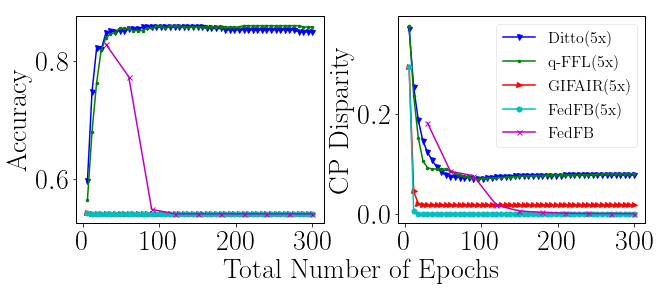

In [3]:
width = 9.3
height = width/2.2

### marker, color, lty ###
ditto_marker = 'v'
qffl_marker = '.'
fedfb5x_marker = 'o'
gifair_marker = '>'
fedfb_marker = 'x'

ditto_c = 'b'
qffl_c = 'g'
gifair_c = 'r'
fedfb5x_c = 'c'
fedfb_c = 'm'

# r3_lty = '-'
# r12_lty = '--'
# r1_12_lty = '-.'
# r1_3_lty = ':'

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend
mpl.rcParams['lines.markersize'] = 5

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.12, bottom=.22, right=0.97, top=0.9, wspace=0.3) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

ditto_result5x.plot(x = 'iteration', y = 'accuracy', ax = ax1, label = 'Ditto', marker = ditto_marker, color = ditto_c)
gifair_result5x.plot(x = 'iteration', y = 'accuracy', ax = ax1, label = 'GIFAIR', marker = gifair_marker, color = gifair_c)
qffl_result5x.plot(x = 'iteration', y = 'accuracy', ax = ax1, label = 'qFFL', marker = qffl_marker, color = qffl_c)
fedfb_result5x.plot(x = 'iteration', y = 'accuracy', ax = ax1, label = 'FedFB5x', marker = fedfb5x_marker, color = fedfb5x_c)
fedfb_result.plot(x = 'iteration', y = 'accuracy', ax = ax1, label = 'FedFB', marker = fedfb_marker, color = fedfb_c)
ax1.set_xlabel('')
ax1.get_legend().remove()
ax1.set_ylabel('Accuracy')
ax1.set_xticks([0,100,200,300])

# r3df.plot(x = 'iteration', y = 'disp', ax = ax2, label = r'$\gamma=3$', marker = r3_marker, color = r3_c)
# r12df.plot(x = 'iteration', y = 'disp', ax = ax2, label = r'$\gamma=12$', marker = r12_marker, color = r12_c)
# r1_12df.plot(x = 'iteration', y = 'disp', ax = ax2, label = r'$\gamma = \frac{1}{12}$', marker = r1_12_marker, color = r1_12_c)
# r1_3df.plot(x = 'iteration', y = 'disp', ax = ax2, label = r'$\gamma = \frac{1}{3}$', marker = r1_3_marker, color = r1_3_c)
ditto_result5x.plot(x = 'iteration', y = 'rp', ax = ax2, label = 'Ditto(5x)', marker = ditto_marker, color = ditto_c)
qffl_result5x.plot(x = 'iteration', y = 'rp', ax = ax2, label = 'q-FFL(5x)', marker = qffl_marker, color = qffl_c)
gifair_result5x.plot(x = 'iteration', y = 'rp', ax = ax2, label = 'GIFAIR(5x)', marker = gifair_marker, color = gifair_c)
fedfb_result5x.plot(x = 'iteration', y = 'rp', ax = ax2, label = 'FedFB(5x)', marker = fedfb5x_marker, color = fedfb5x_c)
fedfb_result.plot(x = 'iteration', y = 'rp', ax = ax2, label = 'FedFB', marker = fedfb_marker, color = fedfb_c)

ax2.set_xlabel('')
ax2.get_legend().remove()
ax2.set_ylabel('CP Disparity')
ax2.legend(fontsize = 16, bbox_to_anchor=(1, 1))


# x_text = 360
# valid_digit = 4
# fedfb_10_30_y = fedfb_result_10_30.iloc[-1]['rp']
# fedfb_100_3_y = fedfb_result_100_3.iloc[-1]['rp']
# gifair_y = gifair_result.iloc[-1]['rp']
# qffl_y = qffl_result.iloc[-1]['rp']
# ditto_y = ditto_result.iloc[-1]['rp']

# ax2.text(x_text,-0.02, '0.0000', horizontalalignment='right', size = 16, color = fedfb_100_3_c)
# ax2.text(x_text,0.03, str(round(fedfb_10_30_y, valid_digit)), horizontalalignment='right', size = 16, color = fedfb_10_30_c)
# ax2.text(x_text,0.08, str(round(gifair_y, valid_digit)), horizontalalignment='right', size = 16, color = gifair_c)
# ax2.text(x_text,0.13, str(round(qffl_y, valid_digit)), horizontalalignment='right', size = 16, color = qffl_c)
# ax2.text(x_text,0.18, str(round(ditto_y, valid_digit)), horizontalalignment='right', size = 16, color = ditto_c)
# ax2.annotate("", xytext=(300, fedfb_100_3_y), xy=(x_text-20, -0.02), arrowprops=dict(arrowstyle="->"), color = fedfb_100_3_c)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Total Number of Epochs")

plt.savefig('new_figure5_5x.pdf')
None